In [1]:
import pandas as pd
import numpy as np

In [2]:
anot_df = pd.read_parquet('../data/annotation_table_with_uniprot.parquet')
anot_df.head()

,entry_pdb_id,entry_release_date,entry_oligomeric_state,entry_determination_method,entry_keywords,entry_pH,entry_resolution,entry_validation_resolution,entry_validation_rfree,entry_validation_r,...,system_protein_chains_total_length,system_unique_ccd_codes,system_proper_unique_ccd_codes,pdb_id,receptor_chain,ligand_chain,assembly_id,pdb_chain_key,uniprot_ids,uniprot_ids_str
0,8grd,2022-09-01,dimeric,X-RAY DIFFRACTION,OXIDOREDUCTASE,5.1,2.699,2.7,0.2418,0.194,...,691,ADP,ADP,8grd,B,1.D,1,8grd_B,[O43837],O43837
1,2grj,2006-04-24,monomeric,X-RAY DIFFRACTION,TRANSFERASE,5.2,2.600,2.6,0.2400,0.190,...,192,ADP,ADP,2grj,A,1.I,1,2grj_A,[Q9X1A7],Q9X1A7
2,2grj,2006-04-24,monomeric,X-RAY DIFFRACTION,TRANSFERASE,5.2,2.600,2.6,0.2400,0.190,...,192,ADP,ADP,2grj,B,1.K,2,2grj_B,[Q9X1A7],Q9X1A7
3,2grj,2006-04-24,monomeric,X-RAY DIFFRACTION,TRANSFERASE,5.2,2.600,2.6,0.2400,0.190,...,192,ADP,ADP,2grj,C,1.N,3,2grj_C,[Q9X1A7],Q9X1A7
4,2grj,2006-04-24,monomeric,X-RAY DIFFRACTION,TRANSFERASE,5.2,2.600,2.6,0.2400,0.190,...,192,ADP,ADP,2grj,D,1.P,4,2grj_D,[Q9X1A7],Q9X1A7


In [3]:
qcov_col = []
for col in anot_df.columns:
    if 'qcov' in col:
        qcov_col.append(col)
qcov_df = anot_df[qcov_col]
qcov_df.head()

,pli_qcov__50__community,pli_qcov__70__community,pli_qcov__95__community,pli_qcov__100__community,pli_qcov__50__weak__component,pli_qcov__70__weak__component,pli_qcov__95__weak__component,pli_qcov__100__weak__component,pli_qcov__50__strong__component,pli_qcov__70__strong__component,...,protein_seqsim_qcov_weighted_sum__95__community,protein_seqsim_qcov_weighted_sum__100__community,protein_seqsim_qcov_weighted_sum__50__weak__component,protein_seqsim_qcov_weighted_sum__70__weak__component,protein_seqsim_qcov_weighted_sum__95__weak__component,protein_seqsim_qcov_weighted_sum__100__weak__component,protein_seqsim_qcov_weighted_sum__50__strong__component,protein_seqsim_qcov_weighted_sum__70__strong__component,protein_seqsim_qcov_weighted_sum__95__strong__component,protein_seqsim_qcov_weighted_sum__100__strong__component
0,c224,c226,c148187,c109343,c134,c158,c148089,c109242,c937,c97150,...,c3057,c3353,c233,c2613,c3001,c3310,c339,c3316,c5256,c5533
1,c136,c1750,c85225,c116277,c0,c0,c85127,c116176,c871,c2461,...,c4056,c4335,c1993,c3201,c3999,c4289,c2639,c3912,c4569,c4619
2,c136,c1750,c156250,c93622,c0,c0,c156152,c93521,c871,c2461,...,c4056,c4335,c1993,c3201,c3999,c4289,c2639,c3912,c4569,c4619
3,c136,c1750,c35529,c54307,c0,c0,c35431,c54206,c871,c2461,...,c4056,c4335,c1993,c3201,c3999,c4289,c2639,c3912,c4569,c4619
4,c136,c1750,c173818,c29889,c0,c0,c173720,c29788,c871,c2461,...,c4056,c4335,c1993,c3201,c3999,c4289,c2639,c3912,c4569,c4619


In [5]:
similarity_df = pd.read_parquet("../data/train_similarity_scores.parquet")
similarity_df.head()

,query_system,target_system,pli_qcov,pli_unique_qcov,pocket_fident,pocket_fident_qcov,pocket_lddt,pocket_lddt_qcov,pocket_qcov,protein_fident_max,protein_fident_qcov_max,protein_fident_qcov_weighted_max,protein_fident_qcov_weighted_sum,protein_fident_weighted_max,protein_fident_weighted_sum,protein_lddt_max,protein_lddt_qcov_max,protein_lddt_qcov_weighted_max,protein_lddt_qcov_weighted_sum,protein_lddt_weighted_max,protein_lddt_weighted_sum,protein_qcov_max,protein_qcov_weighted_max,protein_qcov_weighted_sum,protein_seqsim_max,protein_seqsim_qcov_max,protein_seqsim_qcov_weighted_max,protein_seqsim_qcov_weighted_sum,protein_seqsim_weighted_max,protein_seqsim_weighted_sum,query_ligand_instance_chain,color,shape,sucos_protein,sucos_shape,tanimoto,sucos_protein_pocket_qcov,sucos_protein_pocket_lddt_qcov,sucos_shape_pocket_qcov,sucos_shape_pocket_lddt_qcov,shape_pocket_qcov,shape_pocket_lddt_qcov,color_pocket_qcov,color_pocket_lddt_qcov,target_release_date,release_date_before_cutoff,group_key
0,8czl__1__1.A__1.C_1.D,3e73__1__1.A__1.C_1.D,47.0,50.0,100.0,89.0,97.0,87.0,89.0,100.0,100.0,100.0,100.0,100.0,100.0,98.0,98.0,98.0,98.0,98.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.D,26.410107,84.950772,63.322849,64.636239,0.913793,56.357336,55.090879,57.526253,56.233528,75.606187,73.907171,23.504995,22.976793,2009-06-30,True,8czl__1__1.A__1.C_1.D__1.D
1,8czl__1__1.A__1.C_1.D,3e73__2__1.B__1.E_1.F,53.0,42.0,100.0,89.0,99.0,89.0,89.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,98.0,98.0,98.0,99.0,99.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.D,11.276309,76.960037,47.326054,51.206992,0.913793,42.120188,42.120188,45.574223,45.574223,68.494433,68.494433,10.035915,10.035915,2009-06-30,True,8czl__1__1.A__1.C_1.D__1.D
2,7oj6__1__1.A_1.C__1.Y,1sst__1__1.A_1.B__1.D,NaN,NaN,NaN,NaN,31.0,NaN,NaN,20.0,8.0,8.0,4.0,20.0,10.0,53.0,22.0,22.0,11.0,53.0,27.0,41.0,41.0,21.0,37.0,15.0,15.0,8.0,37.0,19.0,1.Y,4.397016,38.958164,0.000000,33.612147,0.300995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004-06-01,True,7oj6__1__1.A_1.C__1.Y__1.Y
3,7oj6__1__1.A_1.C__1.Y,1sst__1__1.B_1.C__1.E,17.0,20.0,NaN,NaN,31.0,23.0,32.0,20.0,8.0,8.0,4.0,20.0,10.0,53.0,22.0,22.0,11.0,53.0,27.0,41.0,41.0,21.0,37.0,15.0,15.0,8.0,37.0,19.0,1.Y,3.145782,39.706022,8.870252,32.765348,0.300995,2.838481,2.040158,10.484911,7.536030,12.705927,9.132385,1.006650,0.723530,2004-06-01,True,7oj6__1__1.A_1.C__1.Y__1.Y
4,7oj6__1__1.A_1.C__1.Y,1sst__1__2.A_2.B__2.D,NaN,NaN,NaN,NaN,31.0,NaN,NaN,20.0,8.0,8.0,4.0,20.0,10.0,53.0,22.0,22.0,11.0,53.0,27.0,41.0,41.0,21.0,37.0,15.0,15.0,8.0,37.0,19.0,1.Y,4.397016,38.958164,0.000000,33.612147,0.300995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004-06-01,True,7oj6__1__1.A_1.C__1.Y__1.Y


In [6]:
similarity_df['group_key']

0          8czl__1__1.A__1.C_1.D__1.D
1          8czl__1__1.A__1.C_1.D__1.D
2          7oj6__1__1.A_1.C__1.Y__1.Y
3          7oj6__1__1.A_1.C__1.Y__1.Y
4          7oj6__1__1.A_1.C__1.Y__1.Y
                      ...            
2561476    8p5c__1__1.A_1.B__1.C__1.C
2561477    8p5c__1__1.A_1.B__1.C__1.C
2561478    8p5c__1__1.A_1.B__1.C__1.C
2561479    8p5c__1__1.A_1.B__1.C__1.C
2561480    8p5c__1__1.A_1.B__1.C__1.C
Name: group_key, Length: 2561481, dtype: object

In [7]:
similarity_df['group_key']

0          8czl__1__1.A__1.C_1.D__1.D
1          8czl__1__1.A__1.C_1.D__1.D
2          7oj6__1__1.A_1.C__1.Y__1.Y
3          7oj6__1__1.A_1.C__1.Y__1.Y
4          7oj6__1__1.A_1.C__1.Y__1.Y
                      ...            
2561476    8p5c__1__1.A_1.B__1.C__1.C
2561477    8p5c__1__1.A_1.B__1.C__1.C
2561478    8p5c__1__1.A_1.B__1.C__1.C
2561479    8p5c__1__1.A_1.B__1.C__1.C
2561480    8p5c__1__1.A_1.B__1.C__1.C
Name: group_key, Length: 2561481, dtype: object

In [ ]:
boltz_training_cutoff = pd.to_datetime("2023-01-01")
similarity_df_boltz2 = similarity_df[similarity_df["target_release_date"] < boltz_training_cutoff].sort_values(by="sucos_shape_pocket_qcov", ascending=False).groupby("group_key").head(1).reset_index(drop=True)
usable_systems = set(anot_df[anot_df["entry_release_date"].to_timestamp() > boltz_training_cutoff]["system_id"])
similarity_2023 = dict(zip(similarity_df_boltz2["group_key"], similarity_df_boltz2["sucos_shape_pocket_qcov"]))
anot_df["sucos_shape_pocket_qcov_2023"] = anot_df["group_key"].map(similarity_2023)

In [9]:
similarity_df.shape

(2561481, 47)

In [10]:
uniprot_df = pd.read_parquet("../data/filtered_chembl_affinity.parquet")
uniprot_df.shape

(333611, 73)

In [11]:
uniprot_ids = set(uniprot_df['source_uniprot_id'].unique().tolist())

In [12]:
len(uniprot_ids)

837

In [13]:
for col in anot_df.columns:
    if 'uniprot' in col:
        print(col)

uniprot_ids
uniprot_ids_str


In [14]:
print(anot_df.columns)
# After checking the output above, replace 'uniprot_id' with the correct column name below.
# For example, if the column is named 'uniprot', the code would be:
systems_df = anot_df[anot_df['uniprot_ids_str'].isin(uniprot_ids)]
systems_df.shape

Index(['entry_pdb_id', 'entry_release_date', 'entry_oligomeric_state', 'entry_determination_method', 'entry_keywords', 'entry_pH', 'entry_resolution', 'entry_validation_resolution', 'entry_validation_rfree', 'entry_validation_r',
       ...
       'system_protein_chains_total_length', 'system_unique_ccd_codes', 'system_proper_unique_ccd_codes', 'pdb_id', 'receptor_chain', 'ligand_chain', 'assembly_id', 'pdb_chain_key', 'uniprot_ids', 'uniprot_ids_str'], dtype='object', length=750)


(25823, 750)

In [15]:
print(systems_df['uniprot_ids_str'].nunique(), systems_df['system_id'].nunique())

782 24034


In [21]:
systems_df['uniprot_ids_str']

9         P68400
12        O14965
14        P16234
37        P07900
48        Q9UQB9
           ...  
114529    P14410
114530    P14410
114531    P14410
114532    P14410
114533    P14410
Name: uniprot_ids_str, Length: 25823, dtype: object

In [16]:
similarity_df['query_system'].isin(systems_df['system_id']).sum()

843302

In [17]:
systems_df['system_id'].isin(similarity_df['target_system']).sum()

17921

In [18]:
print(similarity_df['target_system'].nunique(), systems_df['system_id'].nunique())

167723 24034


In [22]:
# Find systems in systems_df that have a corresponding entry in similarity_df['query_system']
# Get all similarity information for these systems

# Filter similarity_df to only include rows where query_system is in systems_df
systems_with_similarity = similarity_df[similarity_df['query_system'].isin(systems_df['system_id'])].copy()

print(f"Number of systems in systems_df: {systems_df['system_id'].nunique()}")
print(f"Number of systems with similarity scores: {systems_with_similarity['query_system'].nunique()}")
print(f"Total similarity entries: {len(systems_with_similarity)}")
print(f"\nColumns in new dataframe: {systems_with_similarity.columns.tolist()}")
systems_with_similarity.head()

Number of systems in systems_df: 24034
Number of systems with similarity scores: 527
Total similarity entries: 843302

Columns in new dataframe: ['query_system', 'target_system', 'pli_qcov', 'pli_unique_qcov', 'pocket_fident', 'pocket_fident_qcov', 'pocket_lddt', 'pocket_lddt_qcov', 'pocket_qcov', 'protein_fident_max', 'protein_fident_qcov_max', 'protein_fident_qcov_weighted_max', 'protein_fident_qcov_weighted_sum', 'protein_fident_weighted_max', 'protein_fident_weighted_sum', 'protein_lddt_max', 'protein_lddt_qcov_max', 'protein_lddt_qcov_weighted_max', 'protein_lddt_qcov_weighted_sum', 'protein_lddt_weighted_max', 'protein_lddt_weighted_sum', 'protein_qcov_max', 'protein_qcov_weighted_max', 'protein_qcov_weighted_sum', 'protein_seqsim_max', 'protein_seqsim_qcov_max', 'protein_seqsim_qcov_weighted_max', 'protein_seqsim_qcov_weighted_sum', 'protein_seqsim_weighted_max', 'protein_seqsim_weighted_sum', 'query_ligand_instance_chain', 'color', 'shape', 'sucos_protein', 'sucos_shape', 'tani

,query_system,target_system,pli_qcov,pli_unique_qcov,pocket_fident,pocket_fident_qcov,pocket_lddt,pocket_lddt_qcov,pocket_qcov,protein_fident_max,protein_fident_qcov_max,protein_fident_qcov_weighted_max,protein_fident_qcov_weighted_sum,protein_fident_weighted_max,protein_fident_weighted_sum,protein_lddt_max,protein_lddt_qcov_max,protein_lddt_qcov_weighted_max,protein_lddt_qcov_weighted_sum,protein_lddt_weighted_max,protein_lddt_weighted_sum,protein_qcov_max,protein_qcov_weighted_max,protein_qcov_weighted_sum,protein_seqsim_max,protein_seqsim_qcov_max,protein_seqsim_qcov_weighted_max,protein_seqsim_qcov_weighted_sum,protein_seqsim_weighted_max,protein_seqsim_weighted_sum,query_ligand_instance_chain,color,shape,sucos_protein,sucos_shape,tanimoto,sucos_protein_pocket_qcov,sucos_protein_pocket_lddt_qcov,sucos_shape_pocket_qcov,sucos_shape_pocket_lddt_qcov,shape_pocket_qcov,shape_pocket_lddt_qcov,color_pocket_qcov,color_pocket_lddt_qcov,target_release_date,release_date_before_cutoff,group_key
199,7z6c__1__1.A__1.B_1.C_1.D,1d3g__1__1.A__1.D_1.E_1.F_1.G,75.0,60.0,100.0,93.0,98.0,91.0,93.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,97.0,97.0,97.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.B,80.040455,99.562101,95.896969,96.363796,1.000000,89.184181,87.266242,89.618330,87.691054,92.592754,90.601512,74.437624,72.836814,2000-09-13,True,7z6c__1__1.A__1.B_1.C_1.D__1.B
200,7z6c__1__1.A__1.B_1.C_1.D,1d3g__1__1.A__1.D_1.E_1.F_1.G,75.0,60.0,100.0,93.0,98.0,91.0,93.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,97.0,97.0,97.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.C,76.777744,99.682597,90.424944,93.092495,1.000000,84.095198,82.286699,86.576020,84.714170,92.704815,90.711163,71.403302,69.867747,2000-09-13,True,7z6c__1__1.A__1.B_1.C_1.D__1.C
201,7z6c__1__1.A__1.B_1.C_1.D,1d3g__1__1.A__1.D_1.E_1.F_1.G,75.0,60.0,100.0,93.0,98.0,91.0,93.0,98.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,97.0,97.0,97.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.D,14.700632,71.992426,43.597926,47.740541,0.423392,40.546071,39.674113,44.398703,43.443893,66.952956,65.513108,13.671588,13.377575,2000-09-13,True,7z6c__1__1.A__1.B_1.C_1.D__1.D
202,7z6c__1__1.A__1.B_1.C_1.D,1d3h__1__1.A__1.D,10.0,16.0,100.0,35.0,98.0,34.0,35.0,99.0,99.0,99.0,99.0,99.0,99.0,97.0,97.0,97.0,97.0,97.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.B,4.029312,54.953592,0.000000,33.441626,0.197945,0.000000,0.000000,11.704569,11.370153,19.233757,18.684221,1.410259,1.369966,2000-08-13,True,7z6c__1__1.A__1.B_1.C_1.D__1.B
203,7z6c__1__1.A__1.B_1.C_1.D,1d3h__1__1.A__1.D,10.0,16.0,100.0,35.0,98.0,34.0,35.0,99.0,99.0,99.0,99.0,99.0,99.0,97.0,97.0,97.0,97.0,97.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.C,7.591138,53.961657,0.000000,47.358181,0.139800,0.000000,0.000000,16.575363,16.101781,18.886580,18.346963,2.656898,2.580987,2000-08-13,True,7z6c__1__1.A__1.B_1.C_1.D__1.C


In [23]:
# Step 1: Get uniprot_ids from systems_with_similarity
# First, merge with systems_df to get the uniprot_ids_str column
systems_with_similarity_merged = systems_with_similarity.merge(
    systems_df[['system_id', 'uniprot_ids_str']].drop_duplicates(),
    left_on='query_system',
    right_on='system_id',
    how='left'
)

# Get unique uniprot IDs from systems with similarity scores
uniprot_ids_with_similarity = systems_with_similarity_merged['uniprot_ids_str'].dropna().unique()
print(f"Number of unique UniProt IDs with similarity scores: {len(uniprot_ids_with_similarity)}")
print(f"Sample UniProt IDs: {uniprot_ids_with_similarity[:5]}")

Number of unique UniProt IDs with similarity scores: 181
Sample UniProt IDs: ['Q02127' 'P00533' 'Q9Y233' 'P42336' 'Q08499']


In [24]:
# Step 2: Load affinity data for each UniProt ID from data/chembl_affinity
import os
from pathlib import Path

affinity_data = []
chembl_affinity_dir = Path("../data/chembl_affinity")

for uniprot_id in uniprot_ids_with_similarity:
    uniprot_folder = chembl_affinity_dir / f"uniprot_{uniprot_id}"
    if uniprot_folder.exists():
        # Try filtered first, then regular
        filtered_file = uniprot_folder / f"{uniprot_id}_chembl_activities_filtered.parquet"
        regular_file = uniprot_folder / f"{uniprot_id}_chembl_activities.parquet"
        
        if filtered_file.exists():
            df = pd.read_parquet(filtered_file)
            df['source_uniprot_id'] = uniprot_id
            affinity_data.append(df)
        elif regular_file.exists():
            df = pd.read_parquet(regular_file)
            df['source_uniprot_id'] = uniprot_id
            affinity_data.append(df)

# Combine all affinity data
if affinity_data:
    combined_affinity_df = pd.concat(affinity_data, ignore_index=True)
    print(f"Total affinity entries loaded: {len(combined_affinity_df)}")
    print(f"UniProt IDs with affinity data: {combined_affinity_df['source_uniprot_id'].nunique()}")
    print(f"\nColumns: {combined_affinity_df.columns.tolist()}")
    combined_affinity_df.head()

Total affinity entries loaded: 94719
UniProt IDs with affinity data: 181

Columns: ['action_type', 'activity_comment', 'activity_id', 'activity_properties', 'assay_chembl_id', 'assay_description', 'assay_type', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'document_year', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value', 'value', 'assay_description_enriched', 'assay_type_description', 'assay_organism_enriched', 'assa

In [30]:
# Step 3: Convert standard_value to numeric and calculate statistics
combined_affinity_df['standard_value_numeric'] = pd.to_numeric(combined_affinity_df['standard_value'], errors='coerce')
pchembl_values = combined_affinity_df['pchembl_value'].dropna()
standard_values = combined_affinity_df['standard_value_numeric'].dropna()
standard_values_positive = standard_values[standard_values > 0]
entries_per_uniprot = combined_affinity_df.groupby('source_uniprot_id').size().sort_values(ascending=False)
type_counts = combined_affinity_df['standard_type'].value_counts().head(10)

print("Data prepared for plotting")

Data prepared for plotting


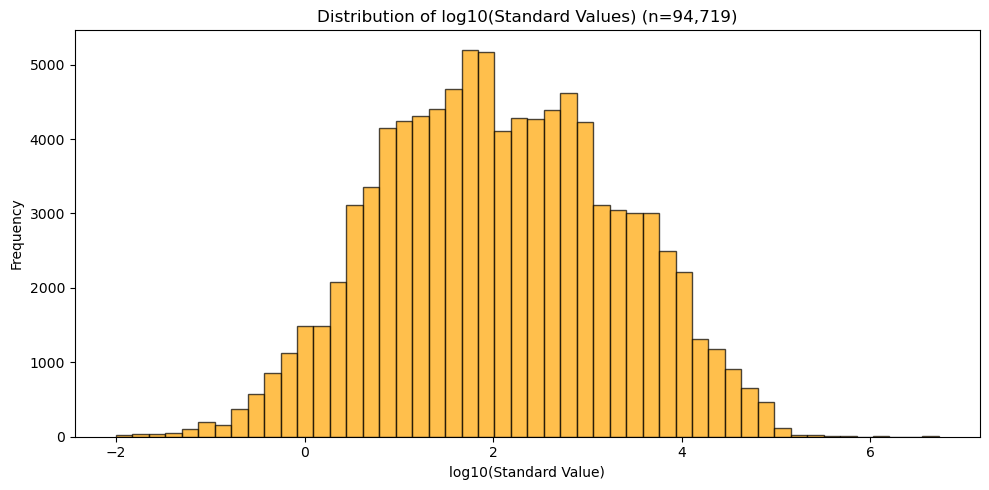

In [40]:
# Plot 2: Distribution of log10(standard_value)
plt.close('all')
log_values = np.log10(standard_values_positive)

plt.figure(figsize=(10, 5))
plt.hist(log_values, bins=50, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('log10(Standard Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of log10(Standard Values) (n={len(log_values):,})')
plt.tight_layout()
plt.show()

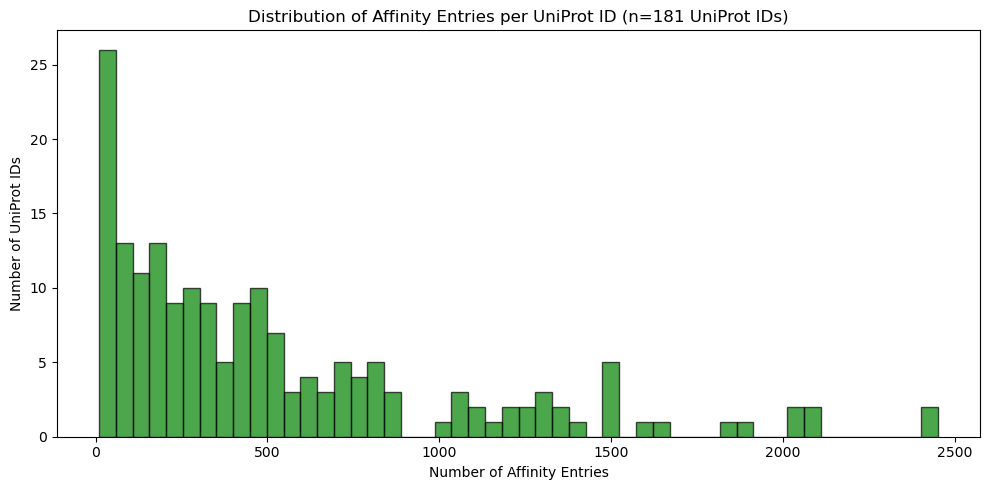

In [41]:
# Plot 3: Distribution of affinity entries per UniProt ID
plt.close('all')

plt.figure(figsize=(10, 5))
plt.hist(entries_per_uniprot.values, bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Number of Affinity Entries')
plt.ylabel('Number of UniProt IDs')
plt.title(f'Distribution of Affinity Entries per UniProt ID (n={len(entries_per_uniprot)} UniProt IDs)')
plt.tight_layout()
plt.show()

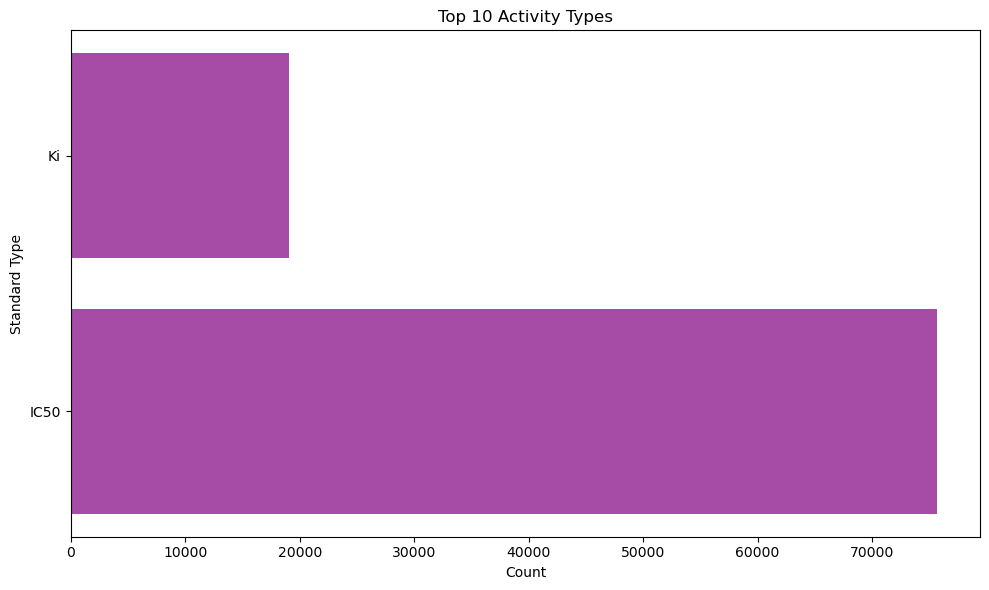

In [35]:
# Plot 4: Top 10 activity types
plt.close('all')

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(type_counts)), type_counts.values, color='purple', alpha=0.7)
plt.yticks(range(len(type_counts)), type_counts.index)
plt.xlabel('Count')
plt.ylabel('Standard Type')
plt.title('Top 10 Activity Types')
plt.tight_layout()
plt.show()

In [49]:
# Affinity Data Statistics Summary
print("="*60)
print("AFFINITY DATA STATISTICS")
print("="*60)
print(f"\nTotal entries: {len(combined_affinity_df):,}")
print(f"UniProt IDs: {combined_affinity_df['source_uniprot_id'].nunique()}")
print(f"Unique molecules: {combined_affinity_df['molecule_chembl_id'].nunique():,}")
print(f"Unique assays: {combined_affinity_df['assay_chembl_id'].nunique():,}")

print(f"\npChEMBL Value Statistics:")
print(f"  - Count: {pchembl_values.count():,}")
print(f"  - Mean: {pchembl_values.mean():.3f}")
print(f"  - Std: {pchembl_values.std():.3f}")
print(f"  - Min: {pchembl_values.min():.3f}")
print(f"  - 25%: {pchembl_values.quantile(0.25):.3f}")
print(f"  - Median: {pchembl_values.median():.3f}")
print(f"  - 75%: {pchembl_values.quantile(0.75):.3f}")
print(f"  - Max: {pchembl_values.max():.3f}")

print(f"\nEntries per UniProt ID:")
print(f"  - Mean: {entries_per_uniprot.mean():.1f}")
print(f"  - Std: {entries_per_uniprot.std():.1f}")
print(f"  - Min: {entries_per_uniprot.min()}")
print(f"  - Median: {entries_per_uniprot.median():.1f}")
print(f"  - Max: {entries_per_uniprot.max()}")

AFFINITY DATA STATISTICS

Total entries: 94,719
UniProt IDs: 181
Unique molecules: 76,248
Unique assays: 3,116

pChEMBL Value Statistics:
  - Count: 94,719


TypeError: Could not convert string '6.396.185.426.876.446.887.967.486.697.828.157.248.405.706.906.766.987.967.396.966.175.846.386.398.106.477.808.008.006.007.929.008.058.527.366.528.106.877.926.517.758.228.155.688.308.158.228.008.154.504.254.395.314.144.376.686.575.404.584.296.664.774.924.536.585.444.224.824.754.457.574.894.294.197.527.857.506.896.506.896.706.727.664.065.824.786.486.706.776.757.287.056.936.587.968.157.667.687.607.405.706.724.978.577.647.607.807.417.805.966.827.037.146.967.287.517.357.576.707.517.407.316.827.016.867.187.237.127.587.187.477.514.744.754.794.814.894.915.175.225.405.485.565.745.906.036.116.266.476.896.967.894.894.527.294.755.194.055.024.204.504.344.544.924.417.968.528.108.408.228.308.408.228.307.777.287.647.927.007.927.486.966.707.857.727.827.727.056.827.066.709.007.807.727.447.025.235.806.516.587.927.826.035.965.825.645.555.495.465.345.215.967.586.416.766.896.886.556.396.625.846.117.467.317.246.266.196.296.436.196.495.045.225.686.056.015.705.875.046.255.715.635.425.445.417.757.546.346.516.796.685.864.506.527.557.894.335.015.114.704.724.554.304.434.554.294.384.254.704.404.264.514.324.424.647.926.875.806.365.885.495.297.246.188.018.136.867.097.547.186.458.107.238.057.036.377.627.727.827.557.967.068.108.707.858.106.404.765.556.306.385.005.104.774.895.894.915.725.445.055.026.046.255.135.825.578.405.545.086.315.244.385.084.645.684.474.994.645.184.704.954.994.624.804.654.414.654.704.134.584.924.128.246.307.789.015.596.536.556.147.947.087.786.015.605.976.125.555.625.686.416.367.348.385.587.177.697.337.887.407.657.697.326.567.507.355.406.287.117.355.755.656.335.896.537.396.696.836.366.207.287.625.716.826.086.846.987.017.247.317.757.246.957.218.006.947.557.396.926.966.727.527.116.867.687.727.047.287.557.967.856.727.017.927.487.508.308.227.708.008.307.438.708.156.848.407.057.728.527.248.057.928.008.057.927.427.688.107.117.346.707.066.827.057.727.827.727.856.706.967.487.927.007.927.647.287.778.308.228.408.308.228.408.108.527.966.105.306.216.436.245.805.145.546.526.315.425.905.526.017.426.016.766.436.046.396.216.005.856.008.176.186.025.936.755.636.055.154.575.806.366.396.225.745.476.565.365.426.468.257.114.947.256.095.525.796.165.436.195.185.327.115.227.805.675.665.517.226.156.355.927.877.875.827.584.805.786.966.815.696.945.765.926.066.465.895.656.126.405.928.526.307.558.057.326.687.705.917.756.426.096.935.806.555.655.427.308.467.505.985.916.366.507.685.076.665.788.146.605.095.475.987.295.006.415.126.786.905.096.835.846.437.664.905.857.496.635.087.126.305.617.266.747.106.787.275.488.017.447.587.135.917.555.557.676.595.286.707.936.515.577.435.586.095.006.976.485.985.446.046.276.915.175.345.757.005.005.106.154.476.775.197.267.477.827.587.587.517.685.275.127.777.647.408.055.288.427.928.578.928.157.727.027.968.207.525.148.286.256.387.726.647.687.608.517.708.357.256.268.397.007.128.058.358.578.168.928.808.349.308.927.016.826.288.296.789.326.806.097.136.655.817.336.945.907.508.859.928.388.115.415.235.725.426.305.685.805.896.306.306.526.305.625.436.166.005.515.575.775.776.107.134.824.964.475.415.334.514.384.965.725.895.194.895.276.145.035.106.414.504.524.705.305.435.805.968.305.344.955.075.125.855.335.225.995.946.645.676.444.694.866.245.034.925.986.145.575.636.106.236.806.536.766.378.748.227.468.928.377.468.478.247.048.878.216.827.758.697.148.208.568.648.568.397.657.367.337.387.447.747.888.387.517.537.367.407.767.808.168.178.248.218.147.306.408.146.945.285.415.665.165.555.145.667.167.757.287.387.467.868.047.847.797.527.377.366.397.547.407.547.517.567.577.427.527.657.697.587.667.707.487.658.107.968.018.187.897.995.858.925.446.529.307.507.669.708.218.288.337.648.557.858.248.968.729.228.629.528.628.648.967.809.259.528.007.969.107.009.627.527.897.406.806.226.659.527.008.408.628.858.558.468.397.248.648.057.328.428.225.988.277.437.457.546.397.627.207.147.967.267.157.166.757.187.207.467.367.996.216.406.057.195.704.297.286.147.667.895.775.436.826.517.306.705.116.226.196.526.576.026.436.425.935.779.449.669.578.068.929.388.729.409.289.179.118.928.669.349.219.369.219.598.929.707.358.057.377.856.376.835.645.967.707.725.426.127.287.777.147.285.305.686.857.687.328.107.007.777.467.965.636.136.106.188.274.898.229.007.288.526.827.196.497.256.127.076.307.147.525.777.828.276.824.806.677.557.266.126.076.607.106.727.807.006.396.806.387.968.557.707.657.547.426.728.266.356.666.055.965.707.166.547.826.826.165.467.778.126.807.307.856.407.908.227.006.927.366.307.057.826.406.826.355.707.898.307.057.897.826.808.117.587.375.605.965.144.706.006.067.676.004.895.234.526.057.847.267.305.526.957.225.076.166.057.196.827.827.887.845.967.806.627.466.226.305.606.826.805.405.078.018.218.387.827.107.727.606.857.718.358.267.708.368.528.358.468.498.308.357.827.647.828.128.158.357.227.897.665.304.704.704.755.805.154.704.725.525.065.124.964.705.005.035.164.704.704.706.826.537.036.407.387.057.096.266.617.758.747.606.987.268.417.608.227.687.387.778.558.158.608.006.926.607.357.708.307.628.378.288.287.557.356.386.776.077.166.667.356.807.267.167.195.547.516.195.058.228.828.058.078.826.527.308.197.607.409.008.157.858.128.707.897.208.526.666.127.705.827.637.606.774.527.968.056.138.056.916.346.876.456.057.507.187.857.026.957.758.308.058.407.527.068.525.577.517.415.687.605.707.117.336.367.488.227.308.107.776.927.507.966.668.017.238.077.037.617.726.377.068.088.747.878.067.456.457.187.097.557.617.977.818.367.677.506.638.075.635.855.735.455.335.555.715.478.008.706.667.526.647.485.236.779.007.958.528.357.807.778.246.196.727.928.578.296.517.467.056.356.075.105.227.248.828.057.968.778.747.038.707.558.526.326.855.824.528.146.377.417.407.307.076.826.776.686.347.705.354.526.225.806.966.668.465.855.076.545.107.267.756.665.555.177.858.708.528.078.377.827.056.928.058.227.949.008.208.706.316.636.927.967.378.026.777.777.826.806.055.607.027.127.466.705.606.526.605.755.755.625.824.524.525.426.665.194.526.075.355.517.356.806.755.667.264.526.306.525.827.416.008.487.708.607.007.607.306.666.106.647.107.196.526.826.166.466.756.707.127.758.546.726.307.318.628.306.897.356.957.847.106.766.826.338.708.607.307.527.197.548.208.706.687.197.928.527.707.778.228.028.166.756.407.447.647.057.607.407.707.807.637.706.706.806.127.806.827.057.397.527.926.506.167.167.527.358.288.158.057.407.227.127.807.227.506.726.688.156.646.226.357.506.606.007.006.777.007.226.257.607.347.127.967.716.467.215.768.927.778.306.456.136.858.227.307.586.327.546.927.265.358.427.649.005.876.257.758.008.527.647.528.528.548.497.828.308.396.525.117.406.367.005.305.377.405.696.705.127.007.006.127.406.216.705.895.596.705.716.307.006.705.854.896.357.306.406.526.226.826.705.337.007.106.827.006.826.707.007.056.406.776.826.055.165.347.005.466.525.215.137.105.166.406.706.707.007.165.897.055.166.436.488.018.725.206.597.435.425.697.847.707.687.577.156.647.898.058.096.997.647.348.237.728.207.897.556.357.808.047.807.378.108.705.036.258.578.687.758.258.008.477.966.977.857.967.758.408.378.518.088.488.527.756.415.965.056.145.805.756.117.105.766.095.416.446.246.856.515.394.949.777.369.548.917.5411.009.366.5710.608.777.579.927.167.304.464.005.524.305.166.447.507.104.576.267.927.005.925.525.404.307.807.685.305.687.706.225.527.825.894.005.307.525.647.804.516.007.055.226.006.967.056.406.166.896.406.525.307.287.525.166.406.967.856.006.405.256.065.705.646.405.775.895.965.777.115.006.466.165.684.304.406.066.016.075.605.514.975.295.064.906.436.035.816.256.415.965.375.804.225.826.145.875.164.586.306.167.097.477.626.736.968.157.516.246.566.426.404.896.606.466.786.796.126.407.196.446.857.296.716.056.966.547.046.477.646.736.628.007.827.006.117.357.476.407.146.687.177.706.147.016.827.516.666.556.617.707.806.447.586.466.497.117.626.005.806.597.356.657.125.927.967.526.116.197.397.386.294.907.286.397.506.906.676.306.357.107.006.896.476.606.766.8210.157.509.929.969.399.035.224.899.686.405.895.407.106.807.476.928.407.757.005.727.688.228.527.758.708.707.668.408.227.809.008.009.528.528.708.308.226.928.158.408.528.708.157.467.467.527.356.855.625.645.986.025.926.336.326.316.146.216.426.276.766.546.616.426.556.656.686.696.576.836.846.886.946.416.217.047.097.267.276.497.447.477.257.197.097.207.497.617.057.297.677.347.417.647.607.967.638.027.917.827.888.148.138.148.087.808.558.858.877.127.779.747.927.327.146.896.967.087.006.807.127.307.287.307.807.437.516.377.117.807.687.557.317.317.267.267.236.956.706.706.626.616.616.616.586.526.336.306.068.148.137.628.728.138.377.697.846.738.747.227.366.766.997.066.946.718.148.228.557.747.857.898.217.348.437.187.888.387.967.138.108.288.447.867.836.956.807.317.847.547.967.627.348.087.458.138.177.107.668.709.159.268.829.079.468.728.127.946.997.199.309.709.858.7710.0010.3010.2210.059.109.157.938.418.828.468.268.248.546.097.246.706.456.067.628.527.509.008.529.226.777.587.318.057.528.306.826.988.709.008.107.727.857.397.435.926.587.346.647.228.517.397.827.266.558.306.896.397.287.927.168.229.227.547.578.529.307.859.008.028.487.826.718.447.646.446.387.466.266.237.966.0710.157.278.0010.228.308.527.689.409.007.417.969.709.529.008.408.707.927.088.707.308.707.689.227.447.468.105.766.257.926.507.197.899.008.707.668.108.527.688.058.526.976.847.176.347.287.017.579.007.516.135.756.227.898.067.467.708.008.828.377.406.737.587.588.188.426.077.516.296.586.706.926.207.486.746.677.526.947.508.108.196.627.547.007.407.607.926.417.297.047.197.327.347.887.827.887.288.016.945.617.378.007.918.488.629.558.298.478.838.388.698.819.078.408.198.048.457.598.148.117.888.787.938.838.298.738.158.088.038.556.868.388.627.719.709.2910.2510.045.219.2810.1210.019.036.387.707.397.487.547.707.397.487.547.487.707.397.487.547.487.487.807.036.896.856.626.406.027.216.045.805.807.927.896.967.627.067.067.516.346.186.186.126.607.508.597.196.687.618.558.298.778.398.147.698.298.137.908.356.787.448.378.967.358.016.186.458.058.176.808.168.297.738.139.057.868.068.317.807.146.786.317.006.516.686.076.676.757.046.826.526.116.527.057.606.225.345.295.376.195.526.206.215.736.707.028.757.099.449.624.965.135.124.866.206.406.386.787.387.348.747.229.409.559.438.856.917.386.727.957.177.166.237.987.625.235.496.017.486.235.176.687.048.048.088.047.558.206.667.437.016.708.147.556.968.025.777.829.308.246.947.408.396.396.987.437.297.677.337.688.176.578.668.479.106.704.684.524.895.624.524.345.196.005.335.174.754.274.444.394.504.545.394.964.994.504.414.354.424.354.964.924.015.075.244.374.425.115.174.544.196.266.878.599.528.897.158.206.897.728.076.826.756.577.547.746.996.947.687.406.776.665.896.727.387.407.266.326.056.007.309.528.438.107.737.106.298.266.468.018.548.825.184.975.817.855.377.745.285.685.345.445.925.556.066.175.856.757.435.826.706.056.667.426.278.325.897.296.096.896.007.585.806.008.007.755.178.298.077.928.706.238.056.4010.7010.4010.3310.269.969.435.065.667.899.4310.605.956.967.066.556.916.587.317.217.196.776.797.357.417.826.668.117.528.208.217.708.709.009.828.088.7410.149.179.158.749.499.199.579.629.489.288.519.599.547.478.948.959.449.339.529.438.309.125.615.566.446.466.926.646.718.958.798.968.578.918.858.308.738.198.727.738.917.677.666.876.039.689.489.529.278.769.147.925.537.547.387.438.488.325.155.475.135.557.805.415.495.135.418.475.429.586.548.605.115.507.735.778.405.475.636.528.896.008.638.755.008.547.216.595.009.095.596.235.245.745.008.519.008.286.588.895.046.209.228.489.429.829.376.258.106.155.409.555.008.236.278.395.679.115.035.279.965.008.998.245.749.748.485.855.835.965.608.059.485.095.006.785.415.835.678.125.295.649.205.085.865.926.265.206.316.628.205.627.828.566.528.225.449.745.998.795.689.565.125.069.107.219.557.515.358.889.245.965.007.355.016.188.599.398.606.055.555.285.618.715.008.445.2710.355.595.175.238.558.356.595.228.125.135.527.118.956.085.545.587.786.735.217.668.4010.415.005.785.257.6710.115.605.006.174.995.059.685.899.305.235.369.128.565.957.866.266.527.367.189.928.598.606.009.668.236.188.239.469.238.859.339.058.719.275.155.959.198.009.535.875.679.015.065.818.309.065.718.948.779.466.105.677.546.037.048.418.606.029.575.829.169.005.829.787.485.458.446.078.126.458.705.606.059.565.855.815.568.345.575.065.549.059.188.856.919.219.319.595.166.778.538.489.9210.328.508.809.967.587.999.399.489.009.0610.439.347.698.777.809.648.047.244.629.367.276.998.448.857.698.0810.7011.0010.7011.0011.0010.528.078.7710.157.818.968.517.728.399.408.518.969.128.396.129.097.606.265.556.776.896.005.626.857.778.098.557.608.148.898.369.167.897.967.547.107.508.967.056.437.327.648.008.306.918.708.309.006.599.008.408.708.307.898.709.008.408.708.709.008.708.529.008.708.309.009.006.779.007.688.408.708.528.527.628.405.735.206.215.846.366.139.008.407.487.707.068.405.846.115.618.158.227.558.706.495.697.266.739.057.509.039.049.007.907.789.377.858.049.229.088.009.207.808.349.107.057.487.106.227.857.197.056.756.966.706.586.186.727.217.466.777.508.348.126.918.287.906.476.866.836.698.926.306.597.947.978.127.907.048.067.668.157.737.067.865.737.557.948.228.897.478.518.148.518.357.348.497.748.148.098.128.168.098.517.567.777.717.888.088.417.507.248.097.137.606.947.188.688.967.076.638.897.037.065.968.857.328.388.488.398.687.258.387.728.148.068.108.478.707.536.989.407.238.268.727.616.676.756.249.309.407.568.198.376.418.747.028.969.408.598.608.827.797.237.958.968.596.937.407.729.227.827.108.808.966.778.357.577.058.359.408.247.348.028.688.256.918.078.898.228.857.778.177.678.188.447.237.607.948.528.468.967.638.688.548.778.927.848.828.078.578.477.798.607.907.957.499.109.408.547.896.918.218.288.666.478.367.487.657.058.557.897.717.837.607.579.7010.006.838.269.408.469.526.795.578.097.207.296.847.626.338.517.938.267.797.668.418.608.216.377.948.427.477.287.047.918.968.898.439.305.587.099.159.009.309.107.958.287.288.648.317.377.747.749.307.267.197.427.906.937.388.407.607.117.478.177.037.287.326.727.547.168.859.707.456.376.548.097.577.806.868.247.807.508.548.487.176.758.748.808.469.157.268.497.697.928.157.837.907.279.408.079.529.409.407.918.578.728.168.469.228.708.967.557.717.377.829.107.628.557.519.158.227.718.648.418.398.119.527.789.409.006.436.848.358.857.169.058.968.017.699.107.287.467.967.628.578.347.817.069.228.777.458.966.478.578.749.408.548.968.517.896.168.669.108.286.908.687.316.607.556.958.407.356.196.169.599.128.208.218.798.808.167.746.958.896.617.147.417.628.739.527.508.987.588.307.998.186.937.437.645.799.027.006.567.658.768.167.897.367.378.007.498.139.579.599.757.257.137.845.417.567.237.149.017.887.857.899.088.839.478.569.129.179.788.147.357.828.788.858.328.447.628.568.669.668.618.508.548.518.538.799.609.479.757.259.449.718.579.579.008.008.058.878.387.349.778.557.279.808.678.309.639.368.067.657.508.989.398.169.769.319.518.947.409.789.399.689.717.949.169.299.178.448.427.628.949.267.899.878.899.218.909.278.179.099.269.008.798.917.908.798.858.359.288.609.009.679.139.578.589.549.1910.308.668.606.798.438.928.608.177.889.239.048.208.799.069.358.876.299.5110.008.837.909.9110.1910.556.638.639.148.599.178.8010.139.279.198.028.729.189.129.287.779.509.519.709.679.388.7910.628.818.3910.688.0610.2310.308.799.108.547.978.649.059.1310.118.049.669.849.038.979.588.548.009.238.777.997.998.218.088.559.288.777.5010.026.386.928.606.389.798.939.329.168.948.979.207.927.248.689.929.139.4310.148.649.048.499.778.818.398.758.739.158.869.098.899.038.949.137.648.687.067.807.197.876.386.408.405.966.725.657.467.146.186.156.687.695.846.966.657.846.697.677.117.916.127.627.967.717.487.428.778.517.076.528.258.427.347.567.737.866.636.597.786.878.436.187.846.437.356.406.847.137.516.759.418.479.339.159.289.177.278.137.256.598.746.859.929.305.174.977.286.657.037.307.007.017.167.855.857.967.476.486.486.897.076.587.627.778.227.547.687.898.407.898.728.826.168.228.578.809.408.309.308.468.107.527.547.969.478.349.557.268.829.107.648.366.767.336.667.578.578.668.966.258.926.017.808.746.708.828.627.036.358.578.218.648.707.577.068.498.128.858.008.809.409.528.418.7410.728.6810.6410.4010.729.369.777.467.009.777.2810.248.198.099.318.669.119.409.168.218.368.169.749.098.628.519.547.688.929.108.169.369.409.365.286.587.067.668.708.749.089.559.826.8510.0010.627.417.857.117.217.587.489.158.927.417.329.259.7210.2610.119.3210.145.726.669.108.899.008.689.0210.007.968.237.107.648.387.358.059.008.118.198.517.668.968.468.469.129.478.809.219.199.409.209.579.018.467.967.926.827.345.767.047.927.497.758.088.567.808.159.386.607.187.078.828.587.347.718.509.127.897.747.827.578.278.468.848.618.458.377.698.478.398.498.128.138.718.567.718.088.618.118.897.447.359.258.538.538.429.899.598.378.187.768.318.308.898.508.889.028.507.658.168.977.538.447.967.738.167.857.768.646.918.656.507.967.588.558.498.109.148.288.037.628.906.236.066.366.976.236.067.587.086.236.068.828.127.666.077.046.357.577.946.047.087.668.016.085.434.925.695.337.476.856.746.057.617.737.317.457.257.527.456.377.036.197.897.707.416.717.896.677.477.407.617.827.357.586.276.606.237.437.836.656.876.466.246.027.667.697.207.807.577.328.147.257.428.287.738.057.838.177.377.336.797.447.416.776.137.238.517.697.457.477.056.986.886.048.037.205.377.077.437.187.156.777.067.807.787.926.727.147.207.977.637.566.886.3110.8510.9110.919.9110.6410.5810.7910.6110.8310.9710.7710.9110.9610.058.928.708.708.008.408.408.528.529.708.708.708.008.408.527.477.578.528.709.159.158.708.228.157.758.707.878.418.918.178.187.978.477.777.768.298.008.217.927.768.148.137.487.679.008.008.307.018.707.218.528.109.008.159.008.529.008.526.658.227.488.227.687.647.806.187.468.526.637.467.798.307.076.727.817.067.847.526.098.407.667.898.188.199.898.077.838.857.687.578.017.187.708.258.228.308.827.046.578.668.007.898.407.428.707.969.008.369.288.258.708.328.217.517.758.138.879.208.478.028.288.228.538.027.758.388.178.157.767.928.367.547.117.258.757.927.687.508.528.038.318.216.068.288.768.948.597.495.666.238.616.747.498.408.819.008.657.478.338.366.887.968.288.538.368.419.109.328.458.607.548.306.146.039.006.226.476.005.875.907.006.306.226.666.266.346.686.726.206.734.705.445.756.488.108.527.365.616.998.158.008.408.527.688.227.998.858.308.308.228.027.987.987.988.198.608.528.107.638.468.628.447.637.608.528.858.229.008.178.498.627.357.087.207.195.827.165.127.707.685.705.386.456.476.757.107.377.387.126.857.808.107.626.657.277.558.007.778.707.527.287.447.388.158.309.058.858.628.228.748.579.107.007.926.265.486.164.995.145.665.785.297.186.006.167.894.234.644.604.084.854.534.564.375.444.994.894.977.216.586.856.166.706.056.146.006.606.586.856.006.066.076.756.606.646.966.075.896.186.116.305.055.145.045.966.096.365.285.215.877.287.407.336.996.985.217.076.226.007.347.517.367.517.287.236.847.327.757.217.337.756.857.247.246.896.946.957.506.835.816.487.625.506.937.127.217.397.197.086.087.097.427.898.808.057.328.858.928.858.968.929.409.009.708.709.409.229.108.928.859.228.529.008.529.008.858.858.778.497.828.928.257.898.857.968.218.928.557.648.486.927.177.338.147.587.297.129.059.159.108.929.058.859.159.109.229.057.429.059.109.009.108.749.109.009.008.518.518.518.728.858.688.298.899.009.228.488.778.598.247.928.928.278.348.258.348.278.197.897.166.436.706.078.437.927.807.706.118.207.366.426.115.847.645.725.996.656.306.827.556.877.756.907.217.277.256.556.595.576.627.757.367.366.896.726.617.347.777.626.255.284.646.015.975.694.844.584.435.124.765.405.005.605.905.704.906.206.105.905.506.106.006.406.107.897.467.477.467.167.587.858.067.528.746.379.057.957.887.988.008.498.579.228.349.407.464.904.606.505.305.004.805.805.206.705.405.006.805.405.605.605.505.485.365.115.155.015.115.346.505.265.245.175.086.005.005.255.265.676.966.707.467.966.917.357.557.526.726.737.307.708.306.966.825.675.725.856.026.287.426.306.665.456.136.766.857.016.125.746.026.705.445.477.056.496.506.546.146.766.326.856.156.686.016.496.266.468.188.126.698.248.326.377.968.176.438.138.085.587.828.116.478.058.106.347.897.886.668.188.435.747.487.716.457.978.186.598.308.376.118.198.146.618.528.266.518.108.315.376.248.007.996.388.158.205.578.058.185.356.196.235.306.316.495.076.426.435.065.546.766.856.388.248.396.598.158.296.538.228.296.468.258.095.376.946.645.755.816.006.336.134.805.795.805.825.845.775.885.774.915.994.824.244.694.854.406.506.095.955.624.245.204.095.154.154.524.404.654.724.824.724.654.924.105.134.984.275.484.624.774.584.434.424.675.254.004.924.264.835.374.644.444.354.894.914.024.964.824.494.604.594.464.354.714.585.235.235.064.484.048.688.708.648.728.929.309.159.229.309.709.309.709.729.228.367.357.428.708.609.408.648.779.309.158.158.748.858.178.729.108.0010.009.5210.0010.0010.009.529.309.158.528.007.138.556.265.005.224.034.544.224.154.624.004.355.466.146.666.375.725.585.584.406.467.585.966.757.216.095.284.367.555.666.186.206.396.726.425.224.105.006.265.004.034.544.224.154.624.355.466.146.706.405.645.725.595.594.406.467.745.966.747.216.305.284.367.665.666.186.206.396.756.425.224.105.004.975.517.554.436.407.156.195.806.707.077.848.289.409.159.058.898.098.708.019.058.858.897.347.798.379.009.528.067.166.857.167.056.897.227.707.527.407.527.898.227.527.437.577.386.897.007.447.327.347.506.727.687.757.347.407.507.406.927.337.086.828.057.406.807.557.367.647.416.707.007.607.547.507.007.277.197.177.368.608.928.039.408.307.927.318.707.657.777.988.357.749.059.109.709.227.575.725.475.685.125.825.825.107.095.625.896.004.924.825.525.555.825.705.896.124.965.005.325.065.285.825.805.775.545.517.898.038.647.878.577.859.408.827.7710.006.628.899.309.577.357.527.297.527.727.297.197.627.507.398.226.226.095.895.855.896.256.225.896.245.896.216.005.966.406.366.546.106.285.895.475.925.426.075.685.826.375.665.805.136.006.105.756.556.546.386.006.175.476.526.755.896.264.785.116.855.735.666.025.825.625.004.945.174.995.266.235.456.065.835.935.254.655.686.146.076.145.646.606.686.666.057.706.576.576.176.677.898.156.887.206.807.026.226.225.855.265.335.445.235.144.774.924.975.437.775.427.896.967.096.675.707.207.827.358.107.967.775.428.529.007.217.777.898.308.307.706.899.157.758.147.325.645.148.268.008.186.828.748.356.777.505.828.527.667.898.107.197.527.397.297.727.508.825.546.216.646.506.055.546.025.975.685.525.705.056.125.435.925.646.215.045.125.365.075.315.295.736.586.515.005.665.905.636.056.576.207.525.456.067.406.407.706.608.274.794.885.194.034.734.744.364.934.744.495.848.967.218.227.827.757.627.067.507.377.895.626.425.254.604.314.054.254.994.744.054.014.674.394.114.304.994.814.095.554.954.534.414.484.434.445.245.184.864.954.584.994.805.776.704.864.615.555.274.634.534.714.494.474.875.535.375.385.755.115.024.855.055.215.375.267.396.976.326.305.975.887.607.066.516.576.035.976.176.606.627.016.166.896.096.296.574.234.684.586.195.375.436.386.276.327.367.007.127.777.807.246.216.707.005.886.839.919.639.068.619.178.619.659.299.508.599.4510.219.779.509.817.529.929.528.797.209.189.798.939.259.419.079.179.817.966.058.468.627.168.686.417.528.576.785.966.7010.706.009.176.326.215.395.335.175.385.095.376.375.426.406.225.506.315.135.126.805.706.574.096.417.689.1710.687.966.268.056.478.157.005.157.006.225.054.686.827.777.757.827.927.927.757.438.608.708.608.108.058.428.248.358.107.857.897.166.777.777.105.704.668.297.387.006.899.107.826.895.686.686.708.136.968.687.707.757.726.585.895.976.666.776.516.548.107.775.607.476.925.506.116.006.587.857.827.806.007.897.777.378.418.548.478.047.928.228.198.358.227.927.927.226.687.516.475.297.577.247.006.409.177.777.307.626.607.856.858.447.277.857.446.685.855.966.776.406.427.626.685.095.706.966.356.066.005.645.805.725.204.234.484.004.584.254.264.734.054.574.344.174.804.015.556.856.415.745.956.057.127.386.775.625.456.446.216.266.445.996.525.946.216.096.205.856.206.387.777.627.606.526.317.527.327.517.627.828.387.707.628.197.807.757.726.234.445.395.515.205.475.285.384.645.064.795.736.895.285.146.756.405.125.774.104.175.335.514.005.245.524.144.925.216.687.386.025.314.964.804.755.224.774.685.205.045.325.476.386.697.607.937.998.288.468.857.978.858.117.917.708.038.198.096.235.945.495.556.545.895.945.894.906.775.267.337.036.496.647.157.437.597.787.707.417.296.426.727.647.427.487.568.007.987.877.707.656.385.655.756.396.005.686.035.765.755.617.499.416.346.894.997.555.367.295.626.256.686.495.318.637.467.195.267.395.838.166.236.487.055.287.766.176.976.386.676.835.097.016.197.136.316.777.155.727.345.387.226.825.306.965.426.125.257.316.417.866.397.615.405.246.336.905.637.335.687.435.917.686.596.795.594.957.175.427.245.047.786.336.456.507.936.807.416.017.626.486.677.726.276.635.505.556.955.266.825.516.877.075.416.086.136.546.905.714.966.416.075.435.475.657.605.585.487.055.248.706.955.185.844.987.606.987.657.036.735.196.537.596.077.367.257.406.307.356.017.335.177.606.756.405.176.874.985.427.595.587.105.657.376.875.397.195.274.837.546.047.706.975.486.865.816.125.937.125.306.695.818.336.845.336.516.015.294.905.325.205.514.734.935.455.675.195.664.965.786.155.924.906.256.516.475.084.846.876.814.525.336.516.015.294.905.325.205.514.734.935.455.675.195.664.965.786.155.924.906.256.516.475.084.846.876.814.526.687.227.825.775.965.926.075.855.966.757.859.009.007.548.748.899.229.008.709.158.926.556.425.504.994.494.996.485.604.664.775.674.835.285.636.105.245.925.944.254.824.895.385.604.884.484.444.744.434.894.295.555.506.105.726.476.406.006.805.486.266.296.546.706.385.756.796.036.146.826.706.106.846.706.167.226.756.145.354.305.645.346.366.925.404.707.167.055.466.737.515.636.706.756.406.056.075.197.857.756.897.828.006.777.626.535.656.416.316.547.157.295.315.776.265.195.105.215.216.285.215.775.755.855.545.545.585.375.435.376.005.555.225.705.245.305.527.315.677.107.356.049.007.648.708.529.009.009.008.528.525.428.408.525.245.356.056.584.825.395.196.685.336.487.087.085.575.206.687.077.007.067.296.926.965.756.666.285.426.686.806.366.585.565.505.575.336.586.666.686.667.125.536.709.006.336.877.547.486.198.306.967.709.008.708.707.387.216.605.426.295.176.165.366.026.145.886.245.996.015.548.105.986.687.587.927.317.317.116.946.977.226.926.996.537.577.727.777.087.897.416.507.757.757.968.308.707.126.607.687.006.986.707.245.836.385.706.825.986.116.985.755.985.895.845.865.966.235.895.775.956.906.925.326.125.625.785.405.717.045.536.675.685.626.895.895.576.205.806.087.305.697.046.826.715.346.345.925.725.526.995.546.576.556.566.506.606.135.277.626.426.497.577.897.827.427.157.606.876.506.406.866.655.106.755.826.717.427.177.727.207.218.228.227.828.227.236.387.755.958.307.928.228.527.056.276.116.486.486.426.557.306.405.615.037.056.856.166.177.107.107.056.756.547.106.556.146.548.708.159.007.228.156.367.826.488.157.777.827.037.967.287.807.646.097.094.778.227.425.466.415.104.846.576.256.827.205.294.926.445.066.625.965.686.467.374.685.646.807.377.706.527.035.965.966.685.807.146.367.047.667.587.777.307.307.337.587.146.796.157.176.867.067.217.267.326.046.606.576.846.946.716.726.787.007.296.516.766.806.957.007.757.177.307.417.467.577.017.027.438.106.637.896.596.908.108.107.777.928.307.708.107.338.058.158.156.946.697.927.927.828.008.058.307.177.807.467.707.066.326.015.826.466.287.227.346.035.966.256.676.626.555.545.926.126.556.646.325.485.345.645.756.276.847.176.746.966.646.116.876.666.596.178.107.757.057.325.005.006.215.005.007.756.606.306.186.076.015.885.097.806.895.865.126.156.675.595.935.976.596.565.804.964.555.405.556.234.665.516.735.705.586.594.924.924.285.555.664.586.537.545.395.215.306.325.505.966.707.006.857.066.086.375.405.205.306.305.505.906.707.006.907.106.106.405.704.805.205.005.405.475.275.475.345.355.185.775.416.075.856.005.605.684.436.175.725.926.576.005.856.326.156.406.376.586.196.126.827.016.726.105.466.036.406.516.486.897.076.706.416.026.156.646.285.575.255.935.585.675.745.886.055.826.066.466.266.605.575.974.626.105.986.066.706.857.096.386.507.147.277.347.587.586.685.236.175.265.686.245.415.575.205.007.925.257.585.215.896.318.415.806.006.325.967.415.705.515.376.217.114.725.966.895.667.035.895.688.448.398.828.348.467.027.076.626.288.548.488.448.668.548.008.228.528.607.447.617.897.927.968.546.436.464.218.057.347.206.925.476.076.126.285.686.535.886.576.826.816.676.486.786.796.246.426.316.084.895.515.967.106.855.966.226.967.625.186.416.787.826.096.126.178.107.056.746.298.498.858.529.058.728.898.268.438.008.308.248.327.897.738.227.689.009.009.009.009.009.009.008.709.009.008.709.0010.707.106.907.298.105.979.809.409.608.908.208.408.708.208.528.057.897.806.496.397.507.447.436.756.364.844.724.164.944.245.244.974.945.124.955.897.225.376.044.024.525.246.155.546.526.296.176.506.157.305.525.406.005.705.525.706.005.406.965.616.087.217.217.007.107.478.108.056.497.808.407.197.968.228.105.826.937.968.308.527.167.965.015.505.055.055.495.186.085.985.356.185.926.257.927.008.008.008.008.008.007.007.008.008.007.007.008.007.007.007.007.008.007.008.007.008.007.007.007.007.007.007.007.007.007.007.007.007.007.008.007.008.008.008.007.007.007.008.008.007.008.008.007.008.007.008.007.007.008.007.007.008.007.007.007.008.007.008.007.008.007.007.008.007.008.007.008.007.008.008.007.008.007.007.007.007.008.007.007.007.008.007.008.007.008.007.007.007.007.007.007.007.008.008.007.007.008.008.008.308.107.777.777.606.586.958.308.406.418.708.057.548.707.687.777.419.007.317.307.857.087.237.267.357.947.948.107.857.567.157.407.297.057.297.667.987.787.657.766.956.927.367.327.627.436.947.467.526.997.666.636.807.107.486.717.627.094.134.144.334.064.104.187.334.224.314.494.374.254.674.124.434.384.154.334.634.819.388.217.966.328.817.658.208.966.487.527.256.307.886.147.547.756.638.057.056.456.657.056.456.656.046.346.467.046.906.447.396.556.476.427.777.098.487.065.465.465.357.777.546.967.146.408.008.008.156.807.897.397.856.548.157.218.107.047.277.267.967.707.928.056.186.176.426.827.227.127.185.105.116.246.425.196.858.406.625.896.525.328.408.308.226.075.895.495.756.215.195.685.304.925.925.385.346.515.774.734.655.096.286.425.607.338.104.834.394.296.924.484.446.264.215.616.965.494.507.167.107.107.166.897.107.057.107.106.476.856.516.587.006.756.546.576.966.967.227.007.307.167.527.407.227.407.526.807.527.407.167.707.527.407.307.007.407.007.106.776.926.756.546.426.346.296.606.326.416.586.367.006.826.927.056.857.107.007.006.966.827.166.897.106.808.007.407.057.307.407.707.056.857.227.406.577.167.166.727.407.407.306.966.627.226.807.056.466.858.006.926.686.856.666.225.827.897.287.926.486.807.966.897.357.187.116.586.217.647.117.316.647.237.156.427.257.758.598.598.689.198.288.349.529.549.359.139.005.225.397.528.156.007.218.057.284.694.856.585.455.667.897.707.038.057.726.826.547.166.117.166.896.296.825.654.914.667.315.637.284.667.314.837.037.668.706.179.008.407.757.388.529.526.025.828.106.357.046.968.006.548.007.108.527.927.759.158.529.526.225.895.415.575.894.024.404.464.376.375.105.555.685.604.027.756.947.237.046.927.077.306.866.847.406.687.547.757.647.549.158.449.409.409.058.749.409.709.709.529.109.309.409.307.928.118.107.648.558.517.737.719.307.869.159.109.228.398.928.049.158.449.159.407.957.889.229.229.708.829.108.808.858.499.108.809.159.008.968.749.229.008.807.918.328.328.306.506.506.006.006.706.706.356.306.006.006.576.606.146.106.156.107.447.407.627.607.357.306.556.607.447.407.227.206.286.306.826.807.017.006.826.807.007.007.707.706.926.907.377.407.397.406.076.107.547.506.756.707.367.406.366.405.645.607.317.305.235.207.687.706.686.706.926.907.707.707.417.407.827.807.857.908.228.207.897.907.727.707.777.807.167.208.408.407.127.108.528.507.607.608.108.108.058.107.855.287.947.957.798.148.026.577.507.467.387.677.807.107.937.267.847.597.586.715.015.144.764.976.857.697.658.566.826.705.106.105.106.605.895.006.605.305.896.007.207.807.807.307.208.207.605.106.806.506.407.106.506.806.226.205.705.605.606.206.207.807.506.708.005.607.506.707.897.206.308.008.227.307.508.008.008.408.006.307.108.008.207.507.807.896.408.006.206.805.408.007.606.897.607.506.507.006.807.606.806.607.206.896.807.707.807.508.897.207.808.108.495.706.707.897.507.507.807.705.897.805.507.406.506.807.897.706.305.206.906.605.807.004.909.498.309.109.7010.207.809.006.609.499.209.009.3010.309.409.409.109.309.007.205.906.106.206.705.507.507.809.2010.108.708.206.705.108.708.207.407.706.208.108.007.898.208.499.006.105.605.708.206.208.008.108.307.608.808.606.407.407.209.016.937.266.978.416.608.768.298.108.947.867.477.425.165.378.599.398.948.609.079.049.048.468.538.758.696.988.007.518.007.967.896.336.207.556.587.756.416.156.896.726.947.258.007.587.247.217.777.315.525.467.856.286.976.376.877.317.037.107.116.906.507.607.806.706.906.705.407.108.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.328.809.308.708.898.208.208.055.405.706.506.805.305.405.406.106.906.707.106.207.808.806.906.506.006.405.705.607.896.907.467.806.906.108.006.808.608.208.607.607.107.507.707.808.608.808.307.707.308.108.708.609.007.706.406.508.108.407.106.806.406.908.408.608.198.407.897.206.406.905.306.006.106.106.806.307.207.896.706.106.105.705.705.107.106.306.906.806.505.607.106.506.508.108.007.006.606.807.807.607.808.007.507.306.907.608.108.708.407.207.626.247.017.387.005.777.807.266.128.155.198.228.307.557.178.307.326.047.197.205.475.685.965.315.936.775.446.776.646.025.976.627.056.666.965.596.925.415.585.056.646.466.575.937.036.756.206.307.056.896.856.927.007.067.006.705.706.046.508.247.507.027.726.607.056.445.676.216.996.806.957.227.376.976.726.036.046.756.876.327.016.966.857.186.887.076.926.987.196.947.156.967.017.177.027.137.107.097.096.296.836.547.356.967.226.907.317.465.727.547.236.985.467.807.707.467.557.776.167.646.397.156.807.467.067.587.327.547.827.807.647.627.757.507.057.107.727.687.287.777.807.447.687.487.607.116.627.607.647.367.317.127.027.118.787.237.367.506.876.708.727.256.676.106.247.285.847.666.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.305.266.306.306.306.306.306.306.306.306.306.306.305.266.306.306.305.266.305.266.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.305.266.306.306.306.305.266.305.266.306.306.306.306.306.306.305.266.306.306.305.266.306.306.306.306.306.306.306.306.305.266.306.306.306.306.306.306.305.266.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.305.266.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.305.266.306.306.306.306.306.306.306.306.306.306.305.266.306.306.305.266.305.266.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.305.266.306.306.306.305.266.305.266.306.306.306.306.306.306.305.266.306.306.305.266.306.306.306.306.306.306.306.306.305.266.306.306.306.306.306.306.305.266.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.305.266.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.305.265.265.265.265.265.265.265.265.265.265.265.266.636.816.316.547.107.316.766.966.647.097.257.415.165.166.966.965.335.197.165.265.826.435.526.336.555.586.486.787.205.066.385.485.095.095.096.135.236.466.055.707.555.825.025.027.086.866.936.686.855.475.467.827.347.348.066.738.297.065.416.305.527.206.876.465.075.125.415.055.925.355.116.996.046.566.925.777.817.326.596.137.136.397.436.977.277.076.667.727.177.577.896.646.277.247.687.477.196.256.417.248.106.328.056.696.126.145.705.065.588.056.865.956.637.186.985.876.466.336.575.876.297.366.715.446.285.665.055.275.195.157.185.855.475.898.405.857.327.506.045.105.685.305.325.646.046.717.155.305.807.008.308.057.965.416.286.296.245.667.775.506.895.648.407.447.828.307.317.286.826.165.417.097.626.547.517.217.226.107.006.606.356.466.526.488.306.827.276.896.217.387.007.526.807.757.247.247.447.896.577.096.625.177.517.257.688.057.857.827.897.467.667.627.397.857.757.377.967.727.547.558.407.967.547.387.437.367.517.827.527.508.057.667.487.857.927.317.667.757.587.347.897.857.807.627.578.307.468.307.558.157.246.066.796.826.267.006.606.545.987.058.007.327.386.015.807.257.308.107.827.627.008.528.307.707.505.507.487.058.408.408.008.528.308.008.306.068.228.008.228.306.857.417.687.707.177.927.776.858.527.897.777.807.268.057.478.158.157.416.587.477.757.168.308.228.307.648.526.856.556.726.546.896.757.007.508.008.106.827.727.048.406.728.526.728.526.288.527.337.756.827.857.347.667.477.967.727.857.367.227.557.157.516.777.928.408.157.928.228.008.528.407.968.408.528.408.408.306.277.518.058.308.406.858.157.807.686.147.528.008.158.326.577.647.897.827.757.587.858.157.607.377.926.287.288.227.726.516.666.967.248.226.686.528.408.228.406.897.727.708.106.296.128.108.306.467.646.347.508.107.178.107.327.607.417.807.708.007.438.157.267.927.968.227.547.508.226.857.607.007.757.216.726.756.528.038.227.857.287.645.477.916.947.117.676.717.957.527.636.036.637.366.707.485.667.057.426.626.877.678.136.135.638.447.735.558.386.657.577.337.927.947.845.928.456.387.637.128.528.307.657.556.667.377.548.497.749.528.408.006.116.178.487.577.896.107.777.858.318.477.758.438.467.857.708.477.487.558.008.436.828.056.807.896.757.828.478.476.067.398.518.578.448.086.968.548.468.448.448.108.497.898.518.418.436.826.518.097.157.377.756.108.406.257.507.446.046.448.007.218.407.247.806.197.338.106.666.757.506.856.828.058.056.646.587.166.356.147.418.006.647.526.427.506.017.706.936.198.308.527.307.808.406.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.267.548.779.408.648.859.006.778.969.227.069.158.859.058.446.518.779.008.369.309.107.436.818.448.899.228.607.507.416.407.347.038.527.488.228.058.707.758.899.009.107.687.828.408.308.408.409.108.629.108.858.678.859.309.147.357.429.187.858.859.019.078.588.569.349.119.108.868.528.409.578.829.058.898.767.848.679.668.459.379.558.978.899.058.608.829.529.158.899.109.309.408.778.898.779.109.158.598.529.009.159.109.058.969.409.529.009.059.157.347.797.037.727.787.408.747.548.597.258.827.517.727.157.709.309.159.159.309.158.608.209.108.928.748.897.687.979.157.418.527.188.547.318.358.467.558.547.518.807.428.727.578.487.466.758.517.368.597.158.287.519.227.478.827.926.326.007.686.479.109.229.229.059.158.899.229.229.309.159.109.529.008.929.408.748.899.107.808.708.748.668.148.668.599.308.778.708.418.748.898.828.708.606.095.576.256.945.788.176.946.965.945.986.686.206.997.316.587.347.648.496.408.007.477.147.967.967.928.216.857.728.067.857.347.036.117.096.045.635.625.075.305.565.305.215.915.805.286.866.726.335.745.925.296.755.596.816.585.737.337.366.395.846.865.535.585.115.026.276.415.926.306.326.145.967.016.355.926.426.115.336.716.276.646.326.605.395.955.896.095.705.995.876.005.997.625.215.526.095.396.096.566.586.746.796.376.327.306.686.296.145.627.527.487.197.897.668.496.408.107.626.446.337.318.225.766.937.465.725.736.436.366.826.795.428.496.547.267.928.008.056.706.158.706.247.338.285.758.228.516.328.007.518.525.335.337.127.126.926.924.074.075.635.637.247.576.937.997.468.007.446.767.407.407.046.846.976.457.046.297.667.687.406.907.527.376.986.686.886.966.526.516.646.596.636.616.467.586.737.356.267.087.026.946.066.397.017.267.146.757.146.286.956.408.496.685.847.666.645.876.365.585.476.207.046.587.115.855.916.556.056.157.627.207.637.167.467.427.196.796.296.737.266.977.337.067.346.796.826.977.516.777.747.087.756.927.506.916.917.716.757.666.547.727.787.558.408.516.217.668.626.907.808.008.007.605.507.005.808.108.708.608.607.758.487.297.757.247.516.908.009.057.418.557.578.226.748.078.777.628.689.177.238.388.1410.4010.528.496.406.685.756.205.946.676.616.676.556.116.306.426.205.765.825.885.326.345.985.505.475.745.188.598.528.898.898.749.229.709.229.309.408.859.309.229.125.087.627.025.166.398.075.765.945.535.757.535.656.835.985.206.685.336.375.295.635.765.525.935.715.475.405.255.175.385.378.858.707.106.506.608.007.899.007.606.707.008.406.397.055.716.526.576.486.066.085.866.306.066.396.506.637.406.607.137.227.588.157.857.808.307.587.627.277.297.386.966.326.058.876.626.806.336.206.626.206.367.006.475.925.995.346.226.284.946.146.116.235.755.726.645.806.646.325.895.605.736.315.936.186.806.655.385.015.005.005.515.435.965.005.165.516.225.374.846.005.525.266.235.346.894.965.584.364.265.364.594.174.014.465.205.134.156.755.274.714.484.124.364.274.974.824.366.924.094.885.024.814.324.154.954.255.717.548.004.565.655.765.545.516.715.396.256.896.066.416.956.916.946.895.787.397.156.716.567.526.586.857.106.506.056.326.205.856.345.925.925.435.195.605.378.895.856.855.365.875.986.657.036.335.706.606.186.646.385.686.336.015.836.646.446.757.346.216.866.457.247.405.625.237.096.717.297.647.318.896.346.256.107.016.386.846.517.086.225.925.825.476.216.426.666.586.155.925.968.806.858.897.475.956.055.725.906.665.325.225.486.466.215.215.785.297.095.956.456.195.885.728.926.306.677.106.855.996.366.416.426.815.284.127.245.947.327.707.237.037.757.757.437.288.527.407.606.397.026.716.987.517.827.307.417.406.356.957.216.786.526.217.697.456.187.717.577.967.577.768.117.679.408.968.728.999.709.749.629.249.499.689.629.148.919.3310.049.329.208.447.447.286.107.685.586.105.615.485.575.547.088.017.026.578.496.406.536.575.725.886.817.437.706.837.969.007.439.007.517.406.425.959.008.708.408.318.116.767.707.897.647.166.368.047.668.007.898.108.185.658.856.966.196.756.825.985.735.365.245.515.845.285.165.165.265.365.015.025.625.175.245.395.755.145.685.085.514.895.725.355.014.925.688.708.706.166.016.146.807.287.228.407.558.707.268.068.728.177.998.087.797.987.856.908.198.257.167.409.708.007.597.597.507.467.397.377.217.177.127.127.097.067.056.956.956.916.896.886.876.826.826.806.796.786.716.596.596.546.536.396.386.235.765.575.058.008.007.966.826.826.826.766.666.666.536.406.376.166.166.095.925.925.925.925.915.915.895.875.875.875.845.815.805.805.785.755.725.615.006.845.738.107.726.926.557.626.656.356.497.246.797.446.827.757.507.508.157.667.628.526.457.097.517.197.627.827.807.827.466.977.087.778.786.367.268.507.778.147.777.426.967.857.858.368.347.825.405.467.855.005.005.005.006.478.725.815.395.285.006.776.498.308.595.336.316.796.745.086.926.367.268.507.768.147.787.426.967.867.858.368.347.835.405.467.875.005.005.005.006.478.725.815.395.285.006.776.498.308.595.336.316.796.745.086.929.437.056.477.757.216.727.106.807.408.467.678.348.899.128.776.986.757.867.567.967.958.928.098.857.567.858.179.307.907.576.417.677.507.226.847.545.909.158.438.747.977.667.496.936.257.686.797.086.465.746.876.936.986.016.657.128.556.508.268.017.478.067.458.749.306.148.287.546.797.137.968.528.948.299.058.588.608.578.728.327.457.396.006.007.007.007.007.007.006.007.007.006.007.006.007.006.007.007.007.007.007.007.007.007.007.007.007.006.007.006.007.006.007.006.007.007.007.007.007.007.007.007.007.007.007.007.006.006.006.006.006.006.006.006.006.006.007.005.825.155.445.946.176.586.186.585.824.304.104.915.725.876.826.805.887.248.107.357.087.287.487.187.606.807.016.996.925.445.394.786.578.157.898.308.408.157.968.408.008.157.557.853.693.515.084.266.134.095.304.124.283.735.145.057.667.804.707.687.897.756.506.605.146.216.286.295.706.165.116.397.277.327.477.666.495.487.476.957.107.347.517.687.857.967.007.507.897.648.005.746.396.337.117.175.437.056.566.526.696.896.765.887.296.916.847.177.347.507.417.477.147.207.756.417.707.647.777.707.777.647.287.197.857.577.437.477.856.496.887.297.557.586.575.596.607.316.847.287.317.197.177.357.197.387.226.976.706.466.287.106.926.926.726.927.347.407.517.517.366.917.547.667.857.157.066.747.747.667.237.377.367.057.407.297.297.227.607.407.527.746.177.047.367.526.937.117.407.337.387.967.777.797.336.367.916.496.105.495.885.956.015.547.475.526.076.606.477.165.517.928.225.756.227.447.327.136.746.546.406.776.107.206.605.706.807.908.009.309.109.405.705.705.806.506.808.206.808.807.707.307.808.606.008.408.508.908.408.507.707.606.907.707.406.507.508.008.008.408.207.108.208.006.466.465.265.266.466.466.466.466.465.266.465.266.466.125.266.465.266.466.125.266.465.266.466.466.126.125.266.466.125.266.465.266.466.465.265.265.265.266.465.266.466.466.126.125.265.266.125.266.125.266.466.465.265.265.265.266.466.126.125.265.266.466.466.126.465.266.465.266.466.466.126.466.465.265.266.466.466.466.466.465.266.465.266.466.125.266.465.266.466.466.466.125.266.465.265.265.266.466.466.126.126.466.465.266.466.466.465.266.125.266.466.125.266.466.465.265.265.265.265.266.126.125.265.265.265.266.125.266.465.266.126.466.465.266.125.266.466.466.125.266.466.125.007.706.207.207.605.805.605.106.506.605.407.405.705.425.725.105.525.306.005.065.045.435.686.286.406.606.406.106.396.526.405.855.965.965.895.406.166.165.666.266.056.306.166.005.896.445.646.056.225.916.005.705.975.825.856.405.925.825.966.336.226.166.106.006.166.756.556.305.856.306.326.526.687.216.166.586.405.605.806.265.515.855.895.706.056.105.686.406.466.727.445.705.645.876.006.166.516.625.706.006.355.705.705.706.165.405.225.055.895.645.475.006.306.106.025.775.485.365.475.304.985.626.607.586.685.926.195.534.964.796.004.985.575.035.856.684.905.526.486.576.356.305.556.166.207.076.585.625.625.395.756.126.336.145.395.525.506.445.645.966.777.577.667.417.576.245.895.926.554.516.275.197.667.807.407.237.167.857.287.805.886.926.925.127.555.966.286.486.367.036.008.157.927.707.758.227.588.157.828.407.967.666.325.525.064.587.315.646.926.967.416.826.476.927.276.856.926.484.676.686.475.507.117.267.627.377.366.365.295.755.055.855.335.008.168.807.897.389.007.857.856.644.475.394.525.324.686.825.416.396.476.896.215.706.306.686.196.336.925.804.855.125.416.075.775.144.925.756.346.556.626.686.625.665.895.475.775.145.344.925.166.526.927.036.166.347.136.406.365.847.856.966.607.828.167.856.827.756.928.056.125.805.515.365.705.586.225.376.706.705.224.758.158.108.007.217.047.775.685.925.928.707.967.807.238.405.405.308.304.708.709.007.708.006.826.827.308.008.228.708.229.008.008.008.008.009.006.518.528.106.805.705.907.226.726.307.706.726.107.007.306.727.708.225.605.405.756.586.606.926.576.405.136.146.464.967.104.585.296.308.708.228.527.827.896.358.157.085.695.665.507.297.626.056.496.225.755.206.926.006.008.108.407.308.529.528.708.708.527.807.407.407.406.646.357.006.998.397.884.675.005.005.005.985.215.766.615.005.005.005.005.005.005.008.306.055.806.477.897.857.408.228.107.487.898.227.928.005.467.344.004.485.104.244.194.354.754.855.385.424.474.706.026.134.434.415.355.275.005.005.066.104.084.855.064.685.895.574.585.425.324.135.109.827.167.178.828.367.177.807.748.518.548.688.396.366.019.649.078.929.669.4710.529.339.418.408.629.259.0610.309.898.9410.0510.409.488.418.469.249.3210.704.534.954.244.764.435.434.245.344.965.764.964.525.687.429.806.775.205.235.155.846.396.626.446.445.446.275.375.996.305.805.816.576.808.747.577.666.577.547.587.367.467.477.287.577.829.057.778.018.708.829.009.319.429.299.307.929.368.068.097.689.005.825.826.266.086.517.246.867.477.406.507.397.586.937.367.627.707.426.956.957.527.366.037.086.416.496.446.667.757.387.017.525.466.475.785.426.546.937.468.108.008.226.536.467.467.728.107.777.756.536.536.005.606.495.816.486.996.265.695.006.166.966.706.577.604.934.866.674.845.165.025.425.015.104.755.324.545.554.694.665.794.044.354.624.645.045.564.875.055.425.135.675.604.236.105.705.406.406.055.526.586.645.056.356.476.776.466.506.245.836.576.725.685.785.246.236.176.666.407.787.677.606.037.718.027.867.687.516.165.107.357.728.297.317.035.815.387.356.505.355.987.006.825.727.057.705.765.478.527.897.307.187.517.927.317.117.097.096.025.777.157.066.876.136.126.968.308.005.705.965.317.606.007.007.007.007.007.007.007.006.007.004.875.485.374.704.064.964.574.434.365.515.345.885.054.324.877.117.307.187.517.927.317.117.097.096.025.777.157.066.876.136.126.968.308.007.605.705.965.315.325.705.755.756.036.206.336.897.107.227.237.317.397.417.517.527.557.577.587.607.627.627.727.777.807.857.927.967.968.008.058.058.158.158.158.158.308.308.408.408.528.528.708.408.108.406.858.108.527.967.007.358.308.227.576.997.337.488.007.288.407.856.225.897.927.898.527.896.175.806.035.827.927.408.155.857.236.847.558.529.009.008.708.228.108.308.528.528.528.528.307.858.157.688.108.007.778.307.808.107.628.107.927.397.375.726.216.436.828.708.525.755.775.827.757.556.517.436.686.408.106.828.157.967.827.406.855.726.395.156.006.017.548.058.528.708.137.707.667.237.426.117.557.367.157.247.328.007.517.577.087.367.587.118.707.707.777.777.968.157.828.106.517.927.227.127.858.057.707.727.936.888.097.317.308.447.648.628.499.528.628.369.707.428.967.748.667.548.128.278.368.368.448.608.628.628.668.708.728.779.224.855.217.825.435.854.684.685.394.585.475.045.827.724.444.106.547.724.215.516.197.854.084.405.826.684.606.215.305.484.894.996.386.006.004.894.894.304.424.474.048.188.427.966.348.308.008.708.298.148.008.057.928.008.028.367.928.128.335.827.448.067.685.897.316.018.418.118.528.528.705.807.217.207.556.128.358.218.118.108.098.008.007.967.927.757.557.278.307.007.006.966.726.526.436.416.406.396.396.365.895.775.728.108.157.087.417.476.488.007.447.418.007.826.826.778.008.007.968.307.317.827.725.808.107.667.587.227.967.727.727.377.157.067.337.687.067.508.528.007.856.627.385.305.425.505.726.036.116.176.506.668.308.158.228.407.967.418.708.528.527.238.528.228.008.008.107.197.857.137.827.016.406.337.687.856.378.706.087.137.237.627.758.058.008.157.897.467.677.898.227.797.667.237.327.587.688.217.397.857.567.698.077.388.367.326.257.827.417.658.177.777.928.267.128.707.508.408.227.967.969.009.006.847.167.128.228.228.307.247.826.428.056.087.807.577.897.007.166.926.697.448.809.007.478.808.369.408.248.167.887.957.618.468.287.518.428.198.408.218.128.807.686.128.377.538.328.808.669.009.228.528.528.057.965.666.956.256.987.856.807.727.857.247.727.897.626.467.648.107.898.317.778.337.647.808.128.277.247.757.686.318.807.728.529.007.828.378.298.038.258.608.828.778.418.728.157.727.757.857.857.827.706.336.668.057.755.237.557.847.796.637.787.987.508.178.018.297.917.937.508.027.978.048.017.617.887.506.155.856.066.266.746.006.116.156.677.177.286.547.006.837.086.926.426.447.266.717.604.935.425.526.026.035.616.386.744.786.285.687.465.455.204.886.927.006.826.726.646.516.806.826.896.896.726.926.727.037.086.016.967.927.216.756.926.445.614.984.614.395.424.596.214.875.004.955.794.596.086.466.707.226.006.385.926.316.196.297.225.285.645.966.647.706.116.666.665.485.755.775.856.246.856.806.576.778.007.548.748.409.009.159.408.008.898.288.129.668.248.828.807.468.056.567.308.017.197.784.987.758.057.708.929.228.058.868.998.807.728.267.898.288.428.547.908.198.168.667.407.287.386.706.897.407.306.406.308.307.305.107.668.408.407.287.309.227.807.307.707.407.526.406.588.407.856.468.307.517.285.705.775.605.726.526.628.306.136.407.277.577.098.708.056.347.477.038.228.407.898.006.736.137.226.067.757.827.286.516.256.508.147.528.217.476.696.746.506.506.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.306.305.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.605.604.654.694.725.735.204.685.574.484.425.864.964.985.094.874.995.195.115.145.034.815.005.945.545.025.575.194.415.495.515.205.164.955.074.854.895.265.394.425.324.445.124.894.435.234.895.245.284.615.244.985.095.065.155.115.195.205.205.195.195.355.375.124.754.415.475.165.374.965.025.077.858.558.358.148.577.008.688.467.277.477.418.558.627.898.826.759.368.516.756.307.068.307.778.108.405.809.008.526.366.736.405.605.575.855.465.106.166.166.005.705.527.508.057.558.227.177.087.307.727.827.577.486.967.667.547.307.326.857.377.726.766.746.806.406.036.246.107.096.106.027.436.447.586.097.576.706.757.427.277.556.666.216.366.206.036.706.637.107.726.826.527.167.577.667.167.074.627.777.897.577.424.836.864.575.247.607.255.667.125.016.874.765.327.006.177.577.027.757.427.237.727.557.446.047.625.866.627.775.136.826.077.387.777.364.956.827.388.007.807.327.397.167.897.387.777.077.707.827.476.546.407.507.287.307.587.217.197.418.307.558.005.395.855.895.894.094.004.965.554.338.027.927.227.436.696.577.757.427.688.006.626.758.056.615.826.136.386.396.566.126.738.626.596.557.087.736.936.676.597.008.038.727.087.538.315.088.588.526.347.906.706.307.787.178.968.779.157.677.669.008.357.527.548.248.468.598.127.688.488.218.147.168.058.078.118.688.397.978.248.007.428.858.188.138.248.706.747.376.406.598.167.458.398.648.578.626.446.146.517.005.755.728.217.896.226.295.485.525.406.405.726.286.605.926.426.605.606.526.925.625.806.286.057.137.217.087.117.147.027.057.157.407.067.147.107.016.995.975.486.436.855.945.045.564.975.267.255.895.075.827.507.298.076.285.657.825.655.937.587.507.807.667.506.287.647.085.006.766.036.585.005.045.406.675.707.145.215.445.875.584.395.384.575.355.166.175.354.784.745.004.714.104.014.074.484.744.484.824.965.075.125.604.874.675.025.606.325.876.124.655.286.216.524.344.644.114.064.364.504.224.474.894.705.105.006.526.626.526.486.257.467.527.055.856.827.627.417.527.126.607.307.408.224.645.385.724.055.556.925.146.414.925.855.967.057.665.625.256.036.357.056.897.377.148.057.577.607.589.747.899.428.968.928.348.108.828.478.688.969.749.597.508.189.499.808.829.419.366.688.629.118.895.095.055.015.475.105.515.175.095.355.805.485.726.106.106.054.946.927.396.806.687.714.474.624.624.805.104.424.324.384.584.414.575.065.285.314.825.014.334.915.174.564.434.795.225.815.956.777.147.136.937.226.347.417.006.726.646.636.546.596.757.746.125.427.117.227.748.126.887.827.547.367.278.097.187.687.345.697.187.067.097.376.757.196.846.286.125.875.604.874.675.025.606.324.655.286.215.075.127.055.144.186.405.464.994.755.144.905.375.595.654.666.576.724.966.326.896.626.464.925.896.384.406.256.425.165.665.705.775.116.426.376.404.726.895.896.126.445.705.926.466.336.315.856.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.004.544.745.005.345.685.824.844.874.724.124.034.734.714.704.744.754.704.944.854.714.934.744.904.964.804.755.154.895.175.585.115.115.445.485.685.025.275.145.004.865.955.145.845.785.087.097.307.066.746.696.136.926.477.636.836.225.946.255.866.386.477.197.685.675.365.987.387.257.186.797.076.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.206.205.434.485.354.894.965.855.165.165.756.125.095.255.105.364.625.115.124.825.725.886.286.896.567.307.217.157.167.507.286.415.926.857.427.547.317.137.257.386.397.287.197.317.416.977.716.996.076.997.027.057.057.137.087.054.704.704.704.704.704.704.704.704.704.704.704.194.704.704.704.704.704.704.704.704.704.704.705.434.485.354.894.965.855.165.165.756.125.095.255.105.364.625.115.124.825.725.886.285.796.186.706.336.416.986.136.896.696.686.896.474.946.346.366.617.336.555.936.586.326.796.097.587.237.126.987.098.128.076.957.526.997.307.117.825.817.207.127.027.096.386.477.155.246.704.876.545.967.056.545.875.507.167.747.327.037.116.686.696.986.338.776.474.664.624.604.665.024.624.324.424.664.644.894.524.664.894.877.026.358.127.036.906.756.836.417.227.397.175.997.477.957.808.058.078.057.697.167.007.147.257.808.196.516.855.375.384.855.315.935.064.905.804.874.805.737.106.005.915.545.986.076.135.285.816.005.415.485.675.304.805.5210.4810.4610.4410.2610.6610.5410.3410.649.6810.608.1910.558.4710.559.6410.4110.709.2310.1910.5410.5510.319.2410.4310.2910.1010.5910.6410.0010.3310.7010.4810.4110.5710.705.555.215.405.124.124.965.305.154.964.604.094.574.004.234.464.664.675.314.904.965.044.914.774.684.765.026.504.484.396.506.596.556.436.506.304.664.475.815.595.455.815.854.965.355.565.525.345.035.265.535.385.065.155.024.894.945.085.565.355.675.746.075.705.415.295.075.514.915.625.485.205.425.395.605.785.615.435.375.655.655.345.635.735.765.694.895.325.365.635.285.575.634.865.485.434.975.334.805.245.175.155.674.935.505.295.765.385.165.015.205.635.295.215.224.905.365.014.945.345.605.875.435.415.326.154.855.475.475.535.155.305.345.596.365.615.575.805.325.295.935.595.174.935.365.585.995.875.194.815.015.464.995.345.575.395.465.665.425.395.605.605.385.515.395.365.095.075.095.655.495.765.625.675.565.415.615.525.465.425.065.525.535.495.485.595.005.565.595.125.395.795.735.615.175.165.035.195.595.325.355.305.445.575.115.455.104.935.105.826.164.985.075.415.365.356.275.055.795.725.695.545.604.854.965.235.575.494.915.135.716.035.166.475.587.106.346.357.805.495.755.937.226.204.896.195.054.674.017.237.056.777.607.967.407.506.807.227.607.757.667.477.517.477.897.858.007.707.427.247.627.667.827.726.966.757.066.667.096.796.626.816.896.626.617.057.036.767.137.106.686.617.077.436.036.036.016.006.006.176.066.036.017.177.236.776.856.897.217.667.006.606.897.007.667.687.196.826.667.417.407.115.996.195.576.136.145.927.026.977.206.987.176.787.177.166.897.167.336.996.896.356.596.556.526.436.586.566.756.256.706.836.926.386.846.586.566.586.667.046.477.076.927.006.926.307.228.157.426.827.856.807.627.727.627.587.367.266.506.487.306.826.926.604.816.216.727.807.587.307.267.026.686.446.356.296.025.995.985.875.856.065.825.755.675.575.395.295.285.215.125.074.704.707.197.106.896.686.235.645.535.475.234.707.727.897.287.377.527.557.587.807.827.827.857.967.968.008.008.108.228.228.227.137.167.187.217.347.467.477.487.607.667.757.807.857.927.968.156.976.977.247.277.357.427.487.607.707.827.966.897.007.507.667.805.295.736.186.306.477.805.705.796.016.227.215.666.396.784.964.706.345.956.056.687.117.147.197.217.287.287.297.407.467.467.507.527.527.587.647.667.687.727.857.967.607.587.557.527.507.507.437.417.407.587.667.707.647.486.326.316.235.806.787.197.386.927.197.227.315.046.096.165.134.824.385.535.014.125.086.376.076.465.235.215.655.885.385.755.796.026.395.806.446.236.526.626.075.925.716.114.706.116.106.126.387.177.276.676.796.756.687.477.086.656.617.166.566.396.336.386.666.756.316.636.266.666.476.546.036.547.256.946.617.185.496.456.705.116.396.125.696.426.065.786.666.887.086.716.576.806.956.117.116.936.417.337.006.646.417.096.176.526.976.166.276.466.116.826.528.006.688.408.058.008.108.057.898.408.307.897.968.227.507.448.108.308.307.967.407.428.528.308.407.757.467.297.017.808.008.008.057.117.927.427.667.438.056.257.417.267.577.447.437.827.196.597.517.668.057.898.007.897.177.057.608.157.646.348.227.856.418.407.358.227.898.526.736.607.038.108.528.108.158.407.926.797.757.776.477.506.476.397.756.857.026.977.606.737.757.427.757.466.858.407.856.477.278.408.227.777.778.058.227.608.528.408.406.917.398.157.248.156.818.307.138.107.577.467.898.307.217.858.227.928.308.707.057.708.158.058.307.428.227.858.058.226.586.997.727.708.707.668.107.347.198.308.307.858.227.708.408.308.007.468.228.158.108.157.377.338.008.156.306.618.157.407.357.777.708.056.366.437.858.307.447.317.688.158.228.057.687.967.646.667.807.508.057.758.107.317.297.118.707.088.007.687.378.708.408.228.158.228.227.898.228.056.988.227.357.547.467.007.168.307.317.967.758.228.057.927.828.107.857.727.827.527.387.437.858.157.478.307.318.057.197.686.687.897.607.708.058.057.728.308.227.968.307.187.928.157.667.227.607.758.057.707.897.558.007.757.777.687.017.197.576.887.777.857.627.757.897.967.518.107.897.827.928.007.807.647.897.927.307.508.008.157.897.387.557.607.578.408.308.157.927.097.286.587.586.386.638.308.058.408.107.858.408.227.898.158.408.228.526.937.217.077.576.878.407.967.777.828.308.058.158.058.708.308.308.157.858.228.007.586.947.707.447.557.007.217.377.927.127.307.286.638.157.557.587.106.917.607.417.177.427.376.837.327.706.997.858.107.826.718.108.108.228.057.708.107.928.158.158.107.728.008.157.927.627.967.897.247.248.308.528.228.158.708.528.528.006.617.858.008.228.228.228.008.528.708.408.228.528.228.307.507.117.507.667.008.157.606.877.106.897.417.097.728.056.426.757.297.407.408.056.957.057.927.197.586.518.307.487.758.307.827.248.227.647.297.897.857.806.626.526.466.446.396.376.236.126.116.086.075.706.025.975.925.885.705.815.805.795.755.715.705.655.575.535.395.385.385.235.215.135.085.045.025.014.974.844.824.704.684.604.484.374.204.126.116.386.476.706.395.116.756.666.546.636.036.316.677.177.477.277.086.686.126.656.796.105.696.126.666.886.946.387.256.337.166.266.396.546.616.566.666.756.115.855.706.116.386.476.706.395.116.756.666.546.636.036.316.677.177.477.277.086.686.126.656.796.105.696.126.666.886.946.387.256.337.166.266.396.546.616.566.666.756.115.855.707.446.536.006.246.256.175.826.945.746.557.015.066.366.696.907.046.586.436.356.736.715.946.516.036.136.396.686.685.625.895.555.566.026.135.574.714.795.635.695.734.715.465.545.375.715.715.655.425.946.026.146.025.895.005.577.177.287.627.277.607.247.156.046.355.866.426.275.695.916.016.176.286.586.766.796.957.197.207.387.397.157.327.376.356.596.656.746.826.877.007.057.067.156.236.216.666.226.786.856.435.506.286.426.556.555.895.065.715.255.544.736.364.954.574.935.116.336.316.346.967.097.137.157.216.526.616.656.976.997.057.236.626.746.836.876.977.067.345.295.305.465.615.665.125.345.255.566.325.785.055.155.165.775.036.016.586.886.356.905.377.447.575.665.785.926.246.827.226.955.665.966.046.666.136.246.066.706.946.266.326.266.245.526.166.856.176.525.085.585.575.324.945.065.584.814.694.675.325.976.646.636.096.826.846.046.526.435.526.756.377.017.125.507.337.376.356.197.176.106.826.836.436.616.725.415.056.195.686.846.476.205.417.027.827.406.675.328.227.157.967.647.057.007.704.725.325.955.376.757.306.726.107.166.426.686.806.005.585.985.976.486.556.707.007.466.877.445.296.356.416.357.236.516.897.576.796.927.086.046.717.487.687.507.577.377.487.427.377.737.397.437.627.617.557.517.497.587.547.586.705.775.415.005.514.895.445.475.706.165.925.625.776.225.965.355.525.895.005.556.055.475.805.435.244.334.755.725.175.245.375.245.545.775.575.755.805.274.515.705.605.445.685.217.266.726.787.237.046.166.596.366.337.246.627.347.057.036.936.937.047.056.946.797.507.017.367.017.587.025.465.617.316.736.677.467.286.637.327.516.067.277.145.916.817.366.446.555.036.767.756.917.097.838.077.977.857.728.098.088.367.598.137.718.148.447.497.895.497.809.468.877.649.447.867.927.817.377.737.547.257.786.346.506.527.337.705.707.477.227.367.507.267.397.467.136.827.407.687.647.547.708.107.967.778.017.927.826.406.445.426.526.476.706.526.105.227.356.405.227.926.586.964.577.706.315.707.897.724.566.137.587.967.136.686.806.044.777.406.604.725.665.516.505.385.337.666.897.167.407.707.107.668.007.707.307.407.706.606.826.666.926.007.245.926.547.966.216.586.326.507.556.146.256.186.146.017.576.485.145.805.676.346.145.655.798.546.896.837.327.554.745.684.666.767.758.168.358.167.798.188.228.308.218.428.848.357.577.727.777.668.157.927.808.057.857.926.015.626.396.177.527.177.757.447.627.417.647.148.108.007.807.558.308.058.057.857.357.367.857.757.778.287.805.867.746.957.286.907.808.237.945.997.536.757.867.107.296.066.205.497.125.867.066.675.296.845.536.884.595.844.676.094.575.956.765.316.124.806.824.485.964.476.108.347.836.466.877.966.857.557.546.357.257.757.117.926.787.707.807.236.957.177.777.728.156.917.317.295.146.827.298.108.406.225.495.756.255.476.416.336.006.576.507.555.816.777.017.086.307.026.546.086.485.167.257.588.308.946.429.309.778.689.649.729.339.469.109.279.009.309.448.808.438.969.779.469.309.489.008.929.529.409.406.329.059.228.829.309.706.609.228.709.199.119.6610.059.579.669.288.687.807.078.057.895.547.808.208.448.607.397.827.057.217.227.357.577.547.247.425.946.556.777.417.927.727.517.327.147.005.935.937.247.578.007.928.409.008.408.108.528.108.308.708.305.675.545.855.677.336.716.878.828.105.976.425.798.858.528.258.899.109.058.748.528.519.198.968.859.156.756.686.316.936.967.217.217.196.466.977.056.757.308.908.407.588.527.076.326.508.168.018.137.397.166.627.657.467.377.195.665.986.165.866.345.826.356.106.235.885.716.305.846.136.416.216.495.985.576.215.196.016.216.026.006.125.098.409.309.107.436.877.646.466.926.916.646.457.967.377.127.977.657.497.356.977.247.438.237.088.898.968.387.257.897.827.807.427.927.707.557.668.487.759.107.439.108.408.406.357.415.876.717.086.005.776.247.165.636.055.906.005.926.396.608.527.778.528.228.308.408.528.408.228.527.437.607.708.407.707.317.366.777.127.687.057.758.088.306.706.609.155.916.146.176.316.356.406.927.247.287.407.487.507.557.577.687.777.827.928.008.428.438.926.827.517.626.426.817.067.057.276.936.676.786.946.356.765.705.856.936.727.487.277.147.669.309.309.228.969.309.158.859.409.228.778.708.528.327.718.808.308.047.157.399.228.969.529.058.709.225.665.667.756.688.107.087.237.225.505.505.505.505.515.525.545.555.575.605.625.625.705.705.755.775.775.855.855.895.926.076.216.296.426.516.606.646.897.167.207.227.267.467.557.705.505.505.825.856.126.166.246.246.256.266.426.426.706.726.806.826.846.896.917.207.237.277.407.647.687.898.058.408.528.749.009.225.835.915.005.904.966.315.795.675.015.905.429.157.978.407.827.307.577.577.926.106.317.487.626.178.526.927.006.706.957.587.437.757.927.057.316.857.627.857.057.826.777.409.829.709.009.309.228.059.008.528.709.108.159.058.009.007.217.196.006.506.766.576.406.846.796.646.757.806.057.446.816.856.757.107.036.516.166.427.477.708.125.768.226.926.986.725.747.086.546.016.026.745.825.916.176.527.527.806.246.896.606.897.387.007.516.467.216.776.896.557.216.826.406.966.427.516.927.756.896.684.846.306.455.384.346.046.565.435.187.216.828.708.527.287.687.628.108.006.517.927.667.236.417.375.915.817.187.346.616.816.426.576.947.367.246.965.517.467.706.736.216.216.165.505.367.447.336.658.156.637.046.747.327.007.117.337.807.257.096.977.628.057.298.406.747.156.896.756.997.357.776.505.447.414.284.644.274.314.715.304.614.475.744.504.884.945.775.634.295.095.184.724.445.654.244.695.694.004.305.125.184.564.564.224.484.764.624.514.704.314.156.335.756.516.295.924.544.824.854.894.034.625.205.395.926.245.835.606.146.125.646.146.176.216.526.025.496.706.806.776.356.646.505.204.055.374.325.224.655.055.395.305.454.304.407.307.307.307.307.307.307.307.307.307.307.307.307.306.006.007.307.307.307.307.307.307.306.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.007.307.307.307.307.307.307.306.007.306.006.006.006.006.006.007.307.307.307.307.307.306.006.006.006.006.006.007.307.307.306.007.307.307.306.007.306.006.006.006.006.006.006.006.006.006.006.006.006.007.306.006.007.306.007.307.307.306.006.007.307.307.307.307.307.306.007.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.306.006.006.007.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.306.006.007.307.306.007.307.307.306.006.007.307.307.307.306.007.307.307.307.307.307.307.306.007.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.307.306.007.307.307.306.007.307.307.307.307.307.307.307.307.307.307.307.306.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.008.558.246.947.095.515.586.806.096.657.416.686.576.037.089.276.587.587.087.257.008.708.058.286.275.618.178.327.898.828.267.467.848.558.248.248.518.297.827.688.037.977.108.198.128.286.457.577.516.286.286.286.286.286.286.286.286.286.286.286.284.984.986.286.286.286.286.286.286.284.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.986.286.286.286.286.286.286.284.986.284.984.984.984.984.984.986.286.286.286.286.286.284.984.984.984.984.984.986.286.286.284.986.286.286.284.986.284.984.984.984.984.984.984.984.984.984.984.984.984.986.284.984.986.284.986.286.286.284.984.986.286.286.286.286.286.284.986.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.284.984.984.986.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.284.984.986.286.284.986.286.286.284.984.986.286.286.286.284.986.286.286.286.286.286.286.284.986.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.286.284.986.286.286.284.986.286.286.286.286.286.286.286.286.286.286.284.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.984.985.766.376.376.026.106.946.596.075.215.486.155.634.905.925.766.326.305.234.075.654.426.307.528.228.007.357.207.036.926.606.076.325.154.964.964.964.965.575.004.964.965.404.964.965.174.965.014.965.104.964.964.965.416.946.479.419.706.649.239.149.529.169.009.198.127.586.276.336.686.816.966.967.107.197.327.437.828.825.716.087.218.417.645.628.076.967.605.795.515.166.015.849.529.528.528.528.408.056.266.565.966.406.825.546.466.237.525.876.205.956.306.106.646.929.708.435.978.087.895.217.687.388.496.326.026.956.076.646.696.507.926.036.484.945.605.975.776.366.486.424.526.929.518.838.948.998.678.598.607.727.246.905.547.176.516.416.706.557.196.287.277.517.286.627.127.247.648.248.826.357.348.478.728.578.178.9210.409.529.409.229.159.749.499.307.927.728.437.398.197.958.707.777.767.336.767.348.857.378.267.858.708.248.778.157.948.708.749.445.575.788.478.809.518.628.177.967.648.178.628.048.108.087.778.207.927.627.256.698.286.967.068.438.127.217.286.848.008.428.047.017.067.898.148.496.775.856.306.307.165.856.106.196.146.065.855.856.305.825.896.066.145.856.046.876.005.606.045.856.225.535.628.095.097.156.845.887.115.136.976.995.477.917.388.178.135.617.616.487.548.137.885.718.027.168.026.015.216.207.476.608.227.025.345.987.606.026.727.706.805.736.666.515.546.468.186.216.696.576.546.245.415.886.367.627.545.416.536.136.745.537.685.785.305.666.346.026.176.888.055.766.997.728.056.967.645.386.246.037.685.535.767.995.555.295.176.058.156.767.636.258.307.296.597.417.676.246.486.267.675.476.477.316.277.706.026.886.547.617.437.005.455.418.246.207.067.386.746.227.175.416.807.128.499.338.289.8010.528.429.066.297.579.006.587.645.777.967.296.806.196.575.705.857.547.106.526.546.066.057.247.086.968.437.777.418.226.857.576.646.407.555.667.137.607.577.777.757.928.227.687.647.607.778.249.429.318.708.6610.0110.158.858.708.859.1510.709.499.288.827.158.097.775.095.197.046.309.008.499.809.337.689.1610.2210.528.709.899.4110.158.969.748.159.857.688.007.367.927.808.237.759.488.577.447.468.197.518.577.648.158.398.007.668.218.008.028.727.447.967.518.038.007.927.057.588.188.406.648.687.478.929.749.418.158.398.668.477.967.428.266.787.359.709.746.706.257.777.008.328.288.338.748.666.488.368.688.749.029.579.809.009.807.328.297.928.226.618.446.438.968.898.087.807.289.349.669.179.519.218.707.627.808.478.608.599.159.228.748.808.579.309.058.357.858.319.596.205.556.406.708.526.928.407.308.406.778.057.177.006.378.527.078.226.588.007.925.928.526.625.608.226.667.775.187.825.269.408.007.405.098.706.777.356.017.017.046.657.227.806.466.636.775.876.386.315.865.485.576.476.107.007.126.586.365.637.315.966.867.687.067.558.007.667.927.827.347.116.803.613.923.644.624.724.844.934.584.655.165.556.316.456.025.135.516.416.817.587.287.516.598.057.657.477.256.446.817.098.829.596.486.266.778.008.577.968.748.898.968.157.969.069.929.7710.159.967.596.137.057.136.887.597.517.128.117.948.117.177.527.857.587.739.058.598.628.556.578.117.147.517.006.587.219.608.118.827.218.898.628.519.158.199.528.809.409.709.899.899.929.668.969.779.599.389.524.224.124.034.244.054.314.284.474.464.644.705.094.784.844.294.414.474.664.524.464.434.293.439.008.158.229.059.058.198.428.608.768.748.778.709.499.498.488.808.748.529.057.988.418.218.528.229.405.345.135.856.558.627.826.038.055.728.405.606.258.107.287.237.416.826.777.137.577.387.376.338.238.007.346.205.468.708.746.928.338.809.007.508.899.008.899.308.859.159.526.827.176.925.308.178.668.428.248.628.198.378.358.648.547.418.409.598.328.748.479.029.098.859.118.729.078.969.108.098.238.387.127.559.159.059.019.099.199.019.139.058.859.048.778.518.807.757.686.295.086.416.755.676.287.007.004.837.937.827.757.907.687.717.707.778.576.927.898.277.037.297.547.557.337.367.487.427.758.519.429.117.527.005.586.679.169.497.608.748.238.208.748.799.289.029.287.219.009.287.037.246.008.277.948.126.229.257.038.839.257.287.446.007.486.279.427.357.579.318.917.249.777.548.597.118.176.926.008.047.116.008.418.747.726.466.197.676.187.376.007.887.047.386.006.006.677.067.146.576.966.007.856.007.946.006.849.108.716.998.145.647.366.836.686.397.045.738.697.416.009.478.887.187.807.506.009.477.346.526.618.338.488.998.226.099.026.779.219.557.719.689.228.026.006.608.858.786.926.709.196.496.008.056.638.367.755.667.385.836.086.206.155.875.685.587.137.097.466.476.097.136.987.266.225.037.856.806.827.197.416.475.855.666.097.768.216.675.466.615.308.025.305.306.155.066.276.147.518.557.557.487.287.297.287.926.667.819.228.128.388.609.146.617.027.995.315.305.845.307.475.335.306.446.686.455.736.816.506.447.045.305.306.455.306.285.096.035.805.307.127.006.847.208.645.065.065.067.748.059.156.438.495.305.305.005.007.778.497.897.117.967.857.578.138.368.198.008.277.758.278.388.648.668.928.078.425.705.545.628.447.988.078.388.548.576.986.708.436.667.857.075.355.038.226.056.756.336.306.165.776.096.346.286.705.315.866.386.556.756.146.467.557.367.446.858.117.808.727.577.758.097.967.367.688.087.337.478.407.007.468.607.477.758.748.358.358.558.288.928.687.419.446.788.126.018.057.448.167.339.257.627.009.357.086.629.057.808.556.538.378.128.526.338.467.479.857.589.487.288.688.496.649.356.528.576.899.258.008.426.649.036.816.439.429.426.486.547.217.269.689.726.758.747.966.708.689.519.336.718.488.898.488.708.646.887.196.328.927.109.226.888.597.039.409.109.228.967.556.618.489.409.406.306.829.528.686.846.008.746.826.009.218.428.496.998.926.006.809.406.006.006.006.057.239.227.0910.006.218.007.619.107.707.707.547.807.927.706.807.968.056.687.326.686.666.417.647.507.667.588.348.298.248.228.158.138.248.108.258.078.007.707.967.927.507.857.727.727.647.647.527.627.407.297.267.006.926.826.666.826.806.726.706.526.426.377.667.807.006.856.927.666.318.228.106.337.286.196.606.807.287.057.626.968.378.518.408.198.158.078.218.168.218.348.097.777.217.967.417.727.037.857.857.807.577.647.217.527.196.126.446.966.756.926.895.967.106.516.406.706.607.178.057.776.847.856.468.705.998.407.286.626.826.367.096.966.776.146.126.306.226.486.376.046.026.087.234.577.585.776.826.626.668.127.387.317.447.304.627.197.487.137.574.777.856.645.967.467.277.857.406.857.895.488.017.387.376.336.306.166.205.468.235.478.708.416.028.808.326.548.045.408.338.335.778.748.467.627.507.478.217.778.378.805.708.898.495.409.157.758.248.365.728.628.558.897.128.076.338.498.408.266.288.628.386.056.048.828.896.189.308.148.858.648.288.197.518.047.477.508.376.228.528.648.727.287.557.347.777.287.206.778.448.158.007.967.627.307.098.706.899.528.578.805.929.008.608.426.728.419.227.017.776.897.857.238.308.337.858.275.968.628.706.229.107.667.756.925.705.968.228.667.968.177.558.416.807.318.287.688.597.727.828.358.478.528.647.897.967.517.858.008.268.288.558.357.187.107.318.528.598.176.826.967.777.928.898.548.406.226.236.486.196.666.316.086.206.316.926.226.287.176.116.246.466.216.106.506.516.296.566.265.806.966.646.856.706.827.517.777.347.817.547.177.607.517.847.967.807.777.547.808.007.557.928.397.828.127.357.827.407.787.858.106.077.277.467.757.327.727.587.827.728.237.177.897.687.257.236.667.116.666.707.417.807.967.926.686.706.666.165.967.647.196.806.756.415.897.758.247.728.038.198.037.505.807.758.346.007.015.827.166.377.577.756.967.127.358.008.287.547.806.625.826.608.448.728.098.208.088.517.276.177.056.447.277.557.707.246.927.487.627.117.356.897.216.967.407.517.857.517.207.467.467.217.348.207.237.688.007.417.477.097.175.767.995.555.295.176.058.156.767.636.258.307.296.598.197.828.628.147.858.418.347.338.828.558.427.968.327.778.217.968.248.608.088.318.388.858.808.968.688.967.898.808.777.828.198.628.447.406.897.875.258.196.266.787.928.047.367.107.718.255.458.157.237.697.057.268.057.487.327.137.727.536.048.046.947.376.418.187.637.837.698.048.186.547.757.317.847.148.227.557.677.877.425.355.415.987.788.118.027.556.917.908.166.887.408.227.258.285.528.105.925.577.165.145.586.338.247.887.528.048.238.286.397.017.878.007.707.247.408.157.305.647.388.016.047.686.157.826.146.116.757.525.586.875.388.267.636.347.826.208.196.768.066.737.417.837.968.157.906.905.616.027.947.886.386.995.847.477.696.017.977.447.898.086.586.817.876.817.137.607.337.197.207.096.187.626.788.227.097.745.327.376.806.638.287.435.626.486.095.717.585.455.157.747.977.556.906.898.057.477.097.557.857.527.207.357.057.087.476.667.018.227.035.636.848.155.827.197.376.166.717.007.276.427.146.046.696.857.126.527.487.527.226.545.465.397.548.108.005.265.155.155.015.285.295.175.145.575.355.296.006.477.057.228.527.527.055.267.529.009.006.005.395.725.646.315.124.985.135.304.855.165.505.496.195.125.355.595.276.655.627.025.626.875.496.226.135.335.625.965.875.875.955.935.398.406.275.856.827.417.167.107.625.757.247.037.066.518.108.405.077.318.228.408.408.308.308.308.408.408.108.058.226.748.528.158.308.776.546.967.217.988.776.456.727.166.906.836.927.058.006.236.506.877.707.727.128.518.557.047.896.137.518.177.097.628.447.827.376.617.017.436.437.437.647.246.627.607.097.857.968.116.188.598.228.308.308.528.528.528.308.058.408.528.527.928.308.528.528.228.308.527.197.927.278.228.408.407.507.408.528.408.528.408.528.528.528.528.408.708.307.897.928.528.308.308.527.858.058.108.308.306.907.908.108.107.608.308.307.907.708.408.008.007.807.607.808.208.008.008.007.706.808.007.207.508.407.807.307.708.207.907.907.806.926.825.926.187.968.108.407.967.807.467.447.337.166.578.158.228.307.668.709.228.228.058.407.807.466.927.447.558.156.806.707.006.706.006.506.806.906.907.305.908.305.907.307.907.206.806.806.207.607.807.106.806.606.306.205.306.906.106.006.106.305.908.107.607.206.706.405.505.805.505.305.006.206.905.807.807.107.107.007.808.205.405.515.376.124.805.004.525.285.024.524.525.225.134.624.524.529.2110.998.588.628.538.509.808.609.3710.325.456.216.717.105.564.594.656.366.366.917.187.757.526.867.407.086.297.477.337.216.655.796.095.916.884.607.604.566.186.504.315.355.435.716.555.276.175.245.006.825.807.705.965.035.145.034.967.217.607.647.227.417.777.757.517.345.106.687.687.725.586.145.017.667.707.727.777.668.227.547.667.896.825.557.076.416.466.136.895.257.687.858.808.157.968.107.687.928.007.927.777.477.237.307.467.547.897.558.107.777.967.167.807.187.897.188.227.897.857.518.055.526.467.246.857.188.406.967.277.967.087.857.576.157.067.106.367.406.667.007.607.727.526.646.777.407.526.066.517.707.407.407.527.227.166.707.006.665.827.306.257.756.466.646.577.167.157.096.806.726.684.414.123.983.983.843.773.693.673.633.613.513.493.443.213.022.972.882.842.832.822.782.442.276.877.167.037.327.367.026.947.036.766.506.366.966.066.676.977.285.167.257.227.037.316.186.476.986.687.226.906.547.547.376.767.057.407.648.229.008.229.308.708.308.228.158.057.967.827.757.607.527.487.377.307.066.966.856.726.666.526.356.236.095.925.755.407.526.176.336.436.116.245.375.606.666.276.417.107.406.966.206.166.505.476.115.165.856.166.756.174.476.145.706.006.146.546.966.017.545.689.008.308.528.229.527.858.227.857.968.528.408.158.158.227.808.107.547.407.485.756.218.526.138.225.285.005.156.175.035.245.174.385.895.055.684.525.064.894.766.526.478.145.675.627.216.476.478.158.147.478.808.148.527.248.437.588.087.857.606.858.347.297.187.176.376.488.015.377.036.195.796.225.596.436.766.205.455.975.065.005.124.254.674.344.255.034.664.905.315.524.744.914.234.824.174.184.534.564.614.954.115.146.586.646.686.406.706.626.705.425.926.058.445.065.358.406.955.747.926.827.556.287.927.898.528.368.518.528.467.776.926.896.525.986.927.206.876.817.116.846.916.476.856.746.566.606.786.715.267.287.336.927.086.476.807.167.056.927.297.065.696.717.587.446.597.227.096.828.227.388.528.228.528.529.379.349.309.329.229.249.409.079.309.329.289.479.108.929.009.159.129.129.209.129.179.199.058.708.778.648.858.748.748.898.828.969.049.098.578.729.378.928.668.749.019.048.708.578.628.608.728.548.669.169.149.119.188.898.779.289.379.359.279.488.929.119.189.028.348.778.548.969.128.778.779.339.148.859.068.779.069.049.009.078.668.899.078.898.899.109.008.929.188.828.668.969.049.069.238.929.249.149.079.048.709.189.319.259.099.429.159.159.449.669.178.729.389.259.379.068.439.178.078.238.318.419.068.598.929.008.649.259.078.608.648.548.548.518.278.228.608.778.529.248.578.608.748.648.898.477.928.109.338.478.219.429.229.4310.388.618.759.049.548.598.109.149.329.139.088.619.968.538.949.809.239.348.759.749.628.559.219.9210.159.4910.009.199.068.839.229.649.809.129.249.2910.058.538.738.768.797.998.749.049.379.448.448.768.279.579.009.339.829.448.359.338.808.638.729.729.419.119.749.598.578.948.859.748.649.149.2910.007.408.899.159.429.928.359.519.598.806.709.709.777.638.289.899.528.538.238.579.859.829.129.3510.057.569.379.049.549.728.929.169.469.078.479.279.557.678.698.859.627.918.759.119.687.728.819.2710.009.168.747.449.779.318.508.709.099.098.729.359.709.339.599.319.559.158.359.669.049.898.988.549.748.648.949.219.899.438.679.439.809.319.098.639.749.338.438.729.399.809.168.579.859.858.368.629.779.809.169.749.089.899.059.299.898.287.619.349.177.378.768.879.578.859.809.069.519.219.499.779.488.419.228.679.338.919.098.659.359.549.128.979.288.569.388.609.149.668.239.119.229.858.448.529.6610.108.229.099.628.227.869.648.849.098.879.359.469.267.0510.009.809.827.519.299.929.259.309.229.389.599.499.549.779.779.609.259.809.829.159.629.779.319.329.439.529.248.609.299.3110.059.809.669.529.969.709.859.1910.059.809.829.158.929.529.599.478.629.779.779.448.419.009.469.729.069.409.709.729.809.628.249.109.494.204.704.904.504.104.904.804.304.304.504.405.105.304.003.304.604.805.204.904.605.005.505.605.905.905.504.704.404.804.305.405.905.905.305.905.705.905.806.105.905.805.404.005.004.204.604.805.505.105.704.305.606.705.406.905.105.305.204.205.405.604.306.105.304.806.606.906.506.906.606.906.006.807.207.007.106.505.406.507.405.806.006.306.707.006.607.506.507.006.107.407.407.207.307.005.606.906.706.906.907.304.804.904.304.506.506.706.606.607.407.006.606.805.004.605.905.905.505.005.005.305.105.004.904.305.004.904.505.905.905.006.504.104.806.005.605.904.906.106.005.506.006.605.706.206.006.305.605.905.806.005.905.904.304.506.607.207.007.605.905.705.706.005.605.405.205.805.605.905.506.005.405.705.705.605.705.605.805.605.705.505.505.205.805.705.605.905.706.005.005.004.904.706.208.204.704.704.604.504.905.805.305.205.506.406.706.407.106.606.407.507.407.807.707.705.508.154.704.674.584.464.935.835.315.225.456.386.686.367.116.556.436.527.397.857.707.666.285.806.706.236.986.335.216.754.835.244.585.284.878.098.706.227.146.525.867.327.177.777.967.497.297.596.146.888.225.318.107.626.966.384.714.245.126.576.266.476.946.756.156.294.846.156.705.877.517.265.575.004.264.944.726.455.036.106.826.116.485.616.067.909.306.339.108.647.987.405.735.267.368.098.706.225.806.236.706.285.245.214.836.746.346.987.146.524.585.285.877.368.098.706.225.806.236.706.285.245.214.836.756.336.987.146.525.875.284.585.225.225.035.206.888.226.946.476.575.126.264.244.846.156.756.295.318.107.626.966.384.717.909.307.967.497.596.147.295.265.867.177.777.326.339.108.647.987.405.735.816.216.516.026.156.706.826.106.454.725.034.946.066.486.115.615.877.517.265.575.004.265.184.994.755.266.126.166.656.925.255.935.815.545.385.165.654.704.875.175.455.344.784.955.134.704.547.175.088.006.438.105.286.747.288.308.008.106.165.395.927.965.627.547.928.308.408.308.408.308.308.228.106.897.166.426.046.256.446.725.866.447.687.446.926.266.706.776.527.476.505.987.706.207.146.316.977.387.587.607.307.477.627.778.308.157.855.184.994.755.266.126.166.656.925.255.935.815.545.385.165.654.704.875.175.455.344.784.955.134.704.546.704.605.605.465.465.826.005.105.406.356.406.526.226.405.525.606.126.225.605.526.126.405.606.465.075.525.405.265.525.606.405.705.526.106.166.526.126.105.606.466.106.306.165.525.525.075.826.405.605.526.525.526.706.406.126.706.706.356.526.546.036.646.046.035.575.965.895.805.645.215.244.965.665.925.408.248.268.227.658.198.077.988.088.218.437.807.708.048.047.956.967.524.584.604.624.774.925.005.005.005.105.105.305.525.605.826.006.006.896.306.406.546.576.646.707.126.705.506.755.745.855.226.016.006.356.436.145.317.106.095.565.755.585.046.256.385.546.196.435.545.595.576.195.465.805.925.885.645.246.096.804.925.025.525.084.386.414.974.955.004.915.094.385.415.044.924.724.714.524.674.304.715.394.955.475.105.095.106.406.406.405.056.705.006.606.706.304.324.704.706.704.194.445.525.004.774.775.056.706.406.606.705.106.406.406.706.305.105.825.605.525.526.006.406.225.355.606.106.226.406.055.525.526.356.126.706.405.525.405.895.525.306.006.606.405.225.706.305.606.705.525.705.706.106.365.475.705.876.136.236.335.965.765.805.865.006.915.455.474.985.465.507.047.257.527.097.367.437.077.547.587.687.397.706.128.827.436.006.826.366.057.356.756.726.366.006.076.395.856.587.406.827.307.526.856.897.406.117.167.526.296.726.807.167.057.057.527.407.059.007.307.106.306.306.005.555.196.005.305.106.405.168.528.706.756.897.406.486.475.805.715.685.595.255.007.346.888.708.707.548.228.708.527.808.157.857.586.407.707.385.896.194.705.285.894.714.555.415.555.304.225.825.755.306.056.104.895.706.416.776.485.725.965.157.466.277.266.507.776.147.516.425.255.466.057.005.696.327.167.705.345.364.605.765.936.707.125.096.517.096.527.707.707.667.827.648.057.807.967.927.857.467.628.058.007.827.577.724.926.607.725.987.486.096.705.896.326.436.245.776.966.315.445.716.835.755.515.886.895.666.376.306.245.777.056.245.556.926.355.735.487.968.108.158.227.626.727.477.688.057.757.898.055.466.577.167.267.668.056.928.008.007.427.367.217.197.107.077.077.006.996.706.675.787.558.598.707.858.708.528.308.007.247.528.708.408.708.526.899.708.708.529.008.528.528.408.708.708.407.895.587.517.006.416.897.577.968.307.729.158.406.777.858.007.196.757.137.527.347.356.557.807.627.507.056.367.347.035.525.215.966.426.115.966.115.555.647.516.215.688.058.058.408.528.708.408.526.006.008.097.168.428.478.648.898.228.238.479.009.009.008.109.008.967.927.547.686.317.147.158.028.317.207.356.878.406.195.895.415.555.825.755.306.056.416.776.485.965.157.267.776.147.516.427.357.256.085.256.055.698.057.107.687.377.556.007.467.607.477.467.587.627.547.556.707.387.587.625.706.776.896.957.196.947.276.717.286.977.627.216.906.747.227.317.206.117.006.967.367.968.308.408.158.708.408.308.707.705.345.367.057.407.057.166.806.727.406.896.857.526.826.586.396.006.366.726.756.826.007.435.765.936.707.127.096.527.708.705.165.106.005.195.556.006.307.106.325.685.005.596.475.806.486.895.257.627.558.309.158.309.159.308.708.807.196.185.336.807.827.647.807.965.756.666.806.005.945.028.156.057.115.976.306.057.246.376.606.827.117.116.417.626.896.507.075.685.387.546.966.375.895.236.645.296.135.235.216.276.015.985.125.185.145.256.647.525.516.285.207.705.847.827.277.827.667.896.625.757.277.666.967.667.437.776.687.687.177.357.197.067.705.846.777.057.826.966.827.237.045.706.205.225.516.507.057.356.726.756.106.385.485.607.336.707.927.668.407.008.707.927.857.628.007.827.577.727.725.985.515.005.285.025.185.006.645.366.528.227.179.007.528.308.748.008.479.007.776.976.277.687.407.527.357.198.057.687.466.928.158.159.007.548.746.008.555.858.358.428.418.598.898.577.487.286.435.895.285.307.246.105.705.727.466.508.407.305.467.007.607.556.527.177.687.667.807.487.576.886.897.106.907.547.167.197.167.137.427.928.228.728.008.516.338.578.497.418.047.527.777.857.707.897.437.417.646.947.327.297.468.527.407.529.007.587.628.107.646.327.197.727.968.708.307.166.127.527.056.297.167.305.856.076.056.368.825.096.517.706.405.306.305.717.406.757.779.007.666.826.777.376.856.966.645.916.246.586.705.237.545.677.807.447.707.807.897.347.097.507.275.797.268.608.056.606.376.859.005.755.185.235.155.076.395.096.256.416.857.705.155.005.545.917.396.947.165.585.946.136.286.227.216.487.367.457.187.127.397.347.287.237.367.607.407.748.058.106.345.105.555.775.195.596.015.995.296.066.587.177.925.145.185.125.705.997.467.127.395.506.626.116.706.467.096.647.347.437.227.317.347.157.627.457.587.857.427.718.705.425.616.797.008.007.367.807.927.967.757.667.807.707.927.777.477.587.587.478.157.925.525.525.526.526.525.525.525.525.525.525.525.525.525.526.525.526.526.526.525.526.526.525.527.005.525.525.525.525.525.525.525.525.525.525.526.525.526.006.526.525.526.525.526.006.527.006.526.526.527.006.006.006.525.525.525.526.005.526.526.005.527.005.525.526.526.526.007.005.526.006.007.007.005.526.526.007.006.527.007.006.006.526.526.527.005.526.007.006.006.006.527.005.526.006.006.006.006.526.005.526.006.006.526.526.006.526.526.526.006.006.005.526.525.526.526.525.525.525.526.006.006.527.005.526.006.006.006.006.005.526.006.525.526.006.005.525.527.005.525.525.526.005.525.526.525.525.526.525.525.525.526.005.525.525.525.525.525.525.526.525.527.006.006.527.006.526.006.006.525.525.526.005.526.525.526.525.526.006.006.527.006.006.526.527.007.007.007.006.526.007.005.527.007.006.526.006.526.526.525.526.527.005.526.006.525.526.525.526.526.525.527.006.005.526.005.526.005.526.006.005.526.006.006.005.526.006.007.005.525.526.526.006.006.005.525.526.006.006.525.526.005.526.006.007.007.007.006.525.526.525.525.526.525.526.005.526.526.006.525.526.006.527.006.005.527.006.526.526.527.007.007.005.526.526.005.526.007.006.525.526.527.005.525.527.006.006.526.526.525.526.527.005.527.006.006.006.527.007.006.007.006.526.526.526.526.527.007.006.527.006.527.007.006.527.006.527.007.007.007.007.007.006.526.527.007.006.527.006.526.527.006.527.007.006.007.006.526.527.007.006.526.527.007.007.006.527.007.006.527.007.007.007.007.007.005.526.526.526.006.527.007.006.006.527.007.007.006.527.006.527.007.007.007.006.527.007.007.007.007.007.007.006.527.007.006.526.527.006.526.526.526.526.526.527.006.525.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.687.035.105.725.327.517.585.415.756.526.156.465.895.826.445.704.964.707.898.007.897.897.828.056.476.055.466.525.166.116.426.275.314.925.446.365.425.216.426.196.056.776.826.386.725.687.236.055.836.445.576.516.806.477.086.847.477.527.407.307.137.307.407.527.167.407.528.057.966.645.685.195.185.924.436.804.554.485.325.856.778.155.117.045.099.5910.0210.727.688.688.9610.3210.609.829.966.046.225.294.505.725.244.755.826.106.115.756.446.096.729.598.965.678.056.267.898.748.749.529.527.668.147.549.529.595.585.857.927.586.549.229.119.159.578.238.898.5710.028.969.597.357.807.338.377.746.858.467.179.338.078.327.437.748.179.218.387.468.227.337.087.228.028.968.128.228.117.557.176.917.396.867.067.127.308.479.117.967.688.407.179.038.549.959.788.998.708.759.718.768.289.119.069.198.958.897.1210.259.448.896.726.096.445.746.116.105.825.745.245.724.495.296.046.229.828.967.6810.028.6810.6010.729.9610.329.555.824.824.904.925.375.385.415.575.705.804.635.124.755.824.164.075.094.254.214.164.944.984.734.364.474.184.004.754.694.725.524.645.214.466.647.067.646.097.226.726.806.446.926.709.179.339.499.626.577.447.058.018.536.978.186.847.067.508.046.897.287.818.609.087.588.609.017.597.528.827.386.406.306.226.226.226.226.226.226.226.166.166.166.166.166.166.166.106.106.106.106.106.106.106.106.106.106.106.056.056.056.056.056.006.006.005.965.965.965.965.965.925.925.925.925.925.925.895.895.895.855.855.825.825.825.825.805.806.165.775.775.775.775.775.775.755.755.755.725.725.705.705.705.705.685.685.685.645.645.625.625.585.575.575.575.545.525.465.445.445.425.405.405.405.395.385.375.345.335.335.325.315.305.305.305.305.295.285.285.275.275.255.235.195.165.155.095.085.045.004.984.954.914.854.784.724.724.664.605.028.649.378.008.817.698.118.926.528.597.826.677.717.235.396.516.185.895.855.805.775.755.685.625.555.485.475.385.285.155.135.095.077.247.097.277.407.397.528.227.926.656.366.918.097.407.858.436.628.667.777.507.407.275.788.644.234.974.304.514.425.444.624.414.705.185.244.344.805.966.375.856.546.126.626.646.777.275.827.408.548.108.508.969.199.279.5210.059.7410.409.8510.159.599.428.958.986.757.927.337.406.367.576.457.468.006.927.606.725.145.166.246.526.775.297.326.106.925.095.416.337.187.357.898.109.578.378.667.859.309.408.008.408.228.708.607.548.108.067.288.0310.059.159.526.766.656.337.216.706.677.157.466.986.026.665.906.304.006.005.906.006.006.006.005.306.105.905.805.505.705.206.105.504.906.206.306.106.006.405.906.206.306.206.405.204.606.504.606.306.506.306.506.406.006.106.106.306.305.906.306.006.405.605.806.806.707.727.727.687.607.287.448.007.858.058.007.757.807.857.647.927.897.687.417.687.897.967.367.075.206.395.266.856.527.006.367.146.246.386.666.206.316.826.426.686.686.396.286.776.776.506.066.136.337.705.075.114.854.855.555.645.285.665.445.525.505.515.365.465.125.385.195.355.355.395.825.895.425.315.028.147.117.427.537.488.107.617.657.327.927.827.737.927.818.178.107.777.886.578.288.288.308.188.208.098.328.248.308.328.238.618.618.278.678.658.558.657.335.646.828.708.228.157.667.626.627.367.857.205.405.646.297.466.187.006.776.486.296.317.406.366.806.647.075.706.376.066.706.246.664.996.034.866.666.476.706.756.206.576.776.756.826.686.386.825.825.805.885.625.995.765.725.465.895.825.885.925.755.125.215.214.965.665.965.725.755.705.435.555.016.006.296.185.515.755.966.486.585.775.685.805.235.824.945.105.075.274.505.384.585.195.805.275.235.245.245.275.175.615.085.035.094.895.094.617.178.007.348.008.378.408.438.598.528.968.727.928.627.148.128.388.408.628.898.748.007.527.855.855.525.665.306.215.775.135.805.005.135.555.805.075.365.165.275.245.345.705.755.015.225.625.075.825.396.176.336.726.706.545.956.245.936.645.716.076.256.805.325.145.435.226.645.025.685.154.575.274.604.244.904.814.605.415.664.734.785.404.757.204.467.407.446.247.016.287.777.686.927.725.576.346.118.094.434.464.454.744.725.545.584.975.034.935.318.609.029.258.668.409.316.377.968.777.928.078.008.017.898.077.824.334.205.245.114.935.005.005.004.755.005.555.855.647.177.017.327.086.837.036.816.056.956.587.327.317.096.216.856.897.306.726.666.776.757.256.046.586.825.656.216.426.896.005.306.386.166.345.845.996.358.107.107.008.007.707.307.408.309.209.105.909.109.409.007.708.709.807.809.8010.009.909.609.609.509.7010.106.808.006.756.596.306.787.216.677.627.627.307.667.517.897.627.557.327.857.477.257.927.447.127.266.166.045.556.386.526.157.287.686.977.577.007.117.707.277.287.807.827.687.897.246.857.024.875.045.285.054.735.204.584.545.805.344.684.844.644.656.725.105.825.435.325.235.175.475.014.764.995.334.944.955.035.165.057.367.948.058.687.978.328.358.376.837.416.957.907.518.047.968.488.248.428.428.418.487.196.446.256.226.195.586.115.005.705.115.966.196.326.105.855.575.116.375.346.066.286.256.625.386.025.675.905.235.795.316.756.446.436.626.686.115.946.606.475.725.346.146.925.405.845.306.896.925.566.715.415.305.866.625.787.687.586.426.515.875.917.716.886.246.556.327.186.727.386.216.186.245.516.037.865.795.467.716.386.225.807.055.736.247.345.557.645.567.157.736.485.756.348.086.445.497.185.436.697.756.526.727.995.757.275.526.737.387.585.996.316.357.626.377.385.817.106.557.826.626.217.516.926.427.625.717.726.386.097.395.827.417.495.627.505.876.257.287.076.256.326.846.677.167.456.617.067.076.716.846.837.067.415.706.537.016.706.866.227.946.307.696.407.797.506.336.776.587.185.846.688.025.806.338.195.996.406.057.946.226.387.447.077.386.007.176.726.248.185.846.065.997.556.177.777.776.616.457.515.817.846.005.868.046.385.997.797.597.147.627.217.587.446.598.037.425.825.757.996.287.987.496.355.726.435.804.317.966.125.787.767.717.687.667.666.247.607.127.707.856.437.426.037.885.917.847.496.078.037.586.118.066.368.227.586.827.026.687.676.775.976.116.008.115.738.217.296.857.726.196.216.017.505.717.687.385.967.757.556.307.356.215.735.816.176.336.787.147.807.924.626.927.626.027.727.577.826.666.607.826.407.427.437.546.156.217.057.186.755.417.245.866.415.775.806.647.327.807.407.556.226.626.966.857.228.156.095.776.516.836.887.387.686.715.816.306.787.196.436.417.136.827.146.897.006.266.585.856.077.136.646.107.296.806.896.105.215.525.806.806.587.197.247.645.417.377.055.996.946.386.335.985.976.325.356.246.955.356.307.526.177.726.907.705.217.316.807.556.277.668.708.527.528.008.527.387.008.226.947.668.306.586.896.816.686.556.856.066.225.086.355.366.116.405.825.587.806.517.726.646.436.906.126.136.907.146.686.746.406.927.166.786.936.766.746.386.606.836.447.407.216.666.455.855.165.575.365.986.055.285.424.965.055.375.085.885.436.474.395.145.465.965.926.826.086.085.755.805.325.706.365.836.357.285.006.295.466.845.475.308.335.435.515.465.385.815.305.415.926.516.376.106.896.246.176.326.766.256.756.086.265.625.606.646.025.335.115.875.835.425.246.515.986.175.855.626.176.585.426.335.465.034.995.685.365.315.135.955.006.426.146.486.506.735.385.315.145.766.335.834.995.806.195.915.955.755.375.215.135.234.985.305.395.085.355.045.227.055.757.056.176.855.986.017.065.755.755.985.856.616.837.476.417.086.967.297.125.546.466.727.066.886.546.895.885.335.865.115.517.477.315.226.355.905.356.965.525.135.705.005.305.405.205.805.305.105.405.305.005.205.105.006.005.905.906.005.705.105.605.505.405.805.505.506.105.505.805.507.557.666.766.626.926.537.217.166.377.427.287.357.327.286.417.227.207.686.717.435.625.346.706.046.376.047.556.486.205.395.585.265.235.105.926.685.895.926.035.895.895.965.926.025.966.065.725.775.775.545.705.776.005.896.035.706.105.966.706.705.245.124.726.055.925.855.396.166.526.805.325.725.896.826.266.546.705.145.475.855.775.895.605.426.926.757.337.627.237.078.147.577.967.436.825.625.006.776.216.966.007.216.857.436.238.688.378.287.858.208.177.857.417.547.826.648.107.898.398.085.608.055.237.177.644.907.407.757.366.666.507.856.967.084.786.427.367.727.306.776.275.576.225.956.706.807.147.477.758.358.745.909.098.899.168.479.169.158.778.967.757.928.778.418.558.204.826.027.776.245.945.705.744.995.145.317.085.385.915.545.765.115.455.695.655.466.175.977.197.037.107.897.277.507.527.968.097.806.776.807.076.826.858.318.518.308.398.598.528.408.108.028.748.258.399.108.668.057.527.778.415.606.327.047.825.275.705.055.645.065.216.198.398.708.468.317.149.378.628.497.628.448.595.977.707.668.377.118.288.468.897.897.728.288.468.367.218.608.318.518.928.317.898.667.668.806.607.009.107.307.306.406.106.907.308.207.608.308.307.907.207.607.606.907.006.106.206.207.758.108.177.667.807.967.857.828.007.447.607.897.557.607.197.107.426.806.637.967.178.018.097.368.308.497.927.897.187.076.956.826.807.216.496.527.577.126.286.576.646.807.487.477.166.306.776.627.066.686.707.137.517.477.117.576.086.826.967.067.217.296.576.727.428.304.806.107.407.807.507.607.907.307.506.707.908.607.808.504.007.007.207.408.708.807.506.307.408.598.288.388.148.328.408.108.348.558.518.808.648.898.478.528.028.929.058.078.628.268.198.728.218.308.648.368.929.058.828.358.528.217.897.528.246.207.638.007.356.757.117.927.806.757.467.238.398.687.857.477.947.388.628.648.248.017.036.106.217.136.185.446.155.948.096.046.376.677.978.358.235.987.118.356.769.008.927.878.128.308.328.088.128.688.929.408.808.809.157.555.237.897.148.027.968.057.757.547.527.557.667.778.316.927.487.466.326.177.727.077.347.686.047.277.328.258.337.808.518.498.528.498.298.688.648.628.968.495.706.125.706.126.125.706.125.705.706.125.705.706.125.705.705.705.705.705.706.125.705.706.125.705.705.705.705.705.705.705.705.705.705.705.705.705.707.266.266.267.267.267.267.266.267.266.267.267.267.267.267.267.267.267.266.267.267.266.266.266.266.266.266.266.266.266.266.267.266.266.266.266.266.266.266.266.266.266.266.267.266.267.266.267.266.267.266.267.266.266.266.266.266.266.266.266.267.266.267.267.267.267.267.267.267.267.266.267.266.267.267.266.266.267.267.267.266.267.266.266.267.267.267.267.267.267.267.267.266.267.266.266.266.266.266.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.266.266.267.267.267.267.267.266.266.266.267.266.267.267.267.267.267.267.266.267.267.266.266.266.267.267.267.267.267.267.266.267.267.267.267.267.267.267.267.267.267.266.266.266.267.267.267.267.267.267.267.267.267.267.267.267.267.266.267.267.267.267.267.267.267.267.266.267.267.266.266.266.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.266.267.267.267.267.267.857.827.578.067.688.076.687.898.248.027.777.807.548.048.357.687.648.068.118.598.098.808.518.357.928.087.727.728.037.547.898.178.388.378.087.758.287.927.927.928.398.107.927.668.308.598.128.357.466.558.077.417.828.288.498.376.618.158.068.148.448.408.388.258.138.378.328.358.497.857.858.347.407.118.607.778.148.247.108.427.587.858.347.418.408.058.327.707.708.097.428.177.967.478.017.118.428.038.547.757.857.897.808.749.168.968.028.308.829.318.899.209.258.778.929.099.339.128.307.928.899.087.728.559.169.008.668.167.858.158.048.477.928.227.928.028.278.287.417.307.507.477.489.379.008.829.088.928.828.186.788.355.956.424.707.477.146.225.627.687.778.747.755.906.794.527.898.217.198.027.608.418.318.148.148.308.068.928.198.708.628.308.397.046.018.966.478.407.828.778.648.208.357.477.516.548.168.077.727.585.778.088.778.648.898.348.608.498.558.777.477.077.587.398.648.648.178.517.928.547.857.727.778.118.438.926.119.039.218.708.147.726.427.094.787.808.284.757.514.526.818.048.498.558.899.008.348.468.778.898.808.778.348.498.548.648.608.488.629.179.009.078.928.329.097.778.178.347.968.547.098.288.728.548.488.858.898.667.148.607.267.266.266.267.267.266.267.267.267.267.266.267.264.787.264.784.786.266.267.267.266.267.264.787.266.266.266.264.786.266.266.266.266.266.266.266.266.264.784.786.266.264.786.264.786.266.267.267.267.267.267.267.266.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.266.267.267.266.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.264.786.267.267.266.264.787.266.267.264.786.266.267.266.267.267.266.266.266.264.787.267.267.267.267.267.267.266.266.267.266.266.266.267.266.266.264.787.267.264.786.266.266.266.266.266.266.267.267.266.267.267.266.266.267.267.267.267.266.267.266.266.267.267.266.267.266.267.264.706.267.266.267.267.266.266.266.266.267.267.266.266.266.267.266.266.264.704.706.266.266.267.267.267.264.707.267.267.267.267.267.267.266.267.267.267.267.266.266.267.267.267.266.266.266.264.706.266.266.266.266.266.266.267.264.706.266.266.266.264.704.704.704.707.266.267.267.266.264.704.706.266.267.267.267.266.267.266.264.707.267.267.266.266.267.267.267.267.267.266.266.264.704.704.704.704.704.704.704.704.706.267.266.264.704.704.704.706.267.267.267.267.267.267.267.267.267.267.266.267.266.267.267.267.266.267.267.267.267.267.266.266.267.267.267.267.266.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.267.264.707.267.267.267.267.267.267.267.267.267.267.268.128.128.128.128.128.128.128.128.127.268.128.128.128.128.128.128.127.268.127.267.267.267.267.268.127.268.127.268.128.128.127.267.268.128.128.128.128.128.128.128.128.128.128.128.128.128.128.128.969.149.148.968.748.899.278.419.049.058.808.808.689.018.858.728.808.648.649.018.809.038.278.118.859.388.649.248.966.408.098.128.128.597.927.608.478.467.147.107.267.267.267.267.268.128.128.128.128.128.128.128.128.127.268.128.128.128.128.128.128.127.268.127.267.267.267.267.268.127.268.127.268.128.128.127.267.268.128.128.128.128.128.128.128.128.128.128.128.128.128.128.125.706.125.706.126.125.706.125.705.706.125.705.706.125.705.705.705.705.705.706.125.705.706.125.705.705.705.705.705.705.705.705.705.705.705.705.705.707.267.267.267.267.268.128.128.128.128.128.128.128.128.127.268.128.128.128.128.128.128.127.268.127.267.267.267.267.268.127.268.127.268.128.128.127.267.268.128.128.128.128.128.128.128.128.128.128.128.128.128.128.126.967.708.297.857.548.037.826.148.148.408.828.898.858.597.588.929.669.558.668.408.007.808.596.406.346.826.336.286.267.507.726.206.216.426.036.548.705.837.558.968.727.967.507.777.408.926.677.896.966.297.477.506.998.748.428.177.228.597.516.397.005.965.986.257.056.716.926.556.396.086.925.665.847.828.049.069.5410.039.529.239.899.709.969.5910.5710.4310.1710.439.6610.289.169.8010.217.947.858.089.809.609.347.198.118.365.825.305.705.525.775.104.855.135.966.364.825.775.929.408.688.828.628.558.598.288.489.338.577.487.187.557.378.668.608.088.098.097.968.088.747.208.709.107.077.857.045.946.316.657.558.528.608.707.928.528.278.468.578.408.348.308.395.566.406.596.846.836.196.666.936.897.047.036.866.866.847.668.598.529.008.708.808.748.488.669.008.668.418.828.668.728.159.008.778.705.345.966.686.987.007.197.447.646.276.456.396.576.566.896.917.226.637.027.195.926.405.855.936.226.447.236.436.606.908.436.449.227.397.767.228.598.709.709.109.307.028.268.247.908.117.817.928.107.287.458.248.197.828.517.217.757.307.217.487.988.218.308.378.228.258.528.378.578.328.148.168.289.106.506.196.206.346.416.907.088.128.358.608.157.149.008.827.907.766.456.468.408.528.058.467.388.028.467.928.057.537.857.358.358.708.828.227.927.016.118.308.358.269.526.245.645.378.857.297.548.668.199.057.049.528.346.898.556.859.009.108.158.188.419.007.5710.008.579.229.409.526.729.529.109.528.778.689.059.409.709.529.709.709.409.309.529.709.408.858.669.229.109.308.689.009.308.008.809.0510.016.896.515.775.306.097.147.226.466.247.826.767.527.287.856.926.727.427.968.528.308.308.527.777.528.528.708.057.085.776.627.967.647.237.007.648.268.777.428.257.137.377.528.237.737.437.197.758.057.559.227.367.527.218.967.629.057.778.547.757.027.436.956.568.927.686.729.449.238.778.289.248.669.407.018.138.775.716.096.385.846.856.876.445.976.506.336.827.045.035.576.818.928.208.017.648.408.849.448.128.447.807.137.967.657.777.369.497.657.148.398.328.619.378.478.688.076.876.086.646.786.906.545.996.546.836.926.046.086.436.856.356.465.966.806.576.798.146.736.196.686.018.236.597.916.857.887.087.286.247.716.466.256.158.748.358.698.628.867.027.878.537.477.557.788.448.536.217.717.596.266.266.266.266.266.266.266.266.266.265.266.266.265.265.265.265.266.266.266.265.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.265.266.266.266.266.265.265.266.266.266.266.265.266.266.265.266.266.265.265.266.265.265.266.265.266.266.266.266.266.265.265.265.265.266.266.265.265.266.265.265.265.266.266.266.266.265.265.268.708.529.057.828.707.827.487.177.127.507.897.625.777.777.127.095.898.409.007.777.058.036.807.507.517.928.576.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.267.967.415.196.516.526.757.255.166.325.646.387.245.407.757.477.605.315.895.465.466.305.515.605.965.665.825.895.807.167.707.576.516.166.187.576.507.227.237.757.686.607.406.836.296.806.465.265.215.895.475.056.655.546.356.306.646.886.347.087.005.946.657.275.976.256.515.306.806.624.945.725.775.995.275.265.675.955.445.815.265.545.885.285.485.646.305.775.896.135.185.265.445.556.215.105.635.686.826.005.466.366.065.245.767.925.775.665.115.125.145.585.265.425.705.775.815.606.475.626.165.316.516.366.155.766.175.586.405.875.685.508.228.407.728.308.157.197.665.676.526.237.517.557.756.735.856.578.166.858.115.416.355.516.386.577.538.157.977.607.628.147.147.516.186.046.414.885.986.105.546.016.245.896.256.145.946.655.746.195.926.155.556.585.976.257.696.896.716.986.556.837.947.427.787.217.027.447.306.837.186.177.247.006.986.715.936.117.276.966.916.506.746.676.836.806.606.495.275.966.105.485.646.305.775.896.135.185.265.445.556.215.105.635.686.826.005.466.366.065.245.767.925.775.665.116.186.046.414.885.986.105.546.016.245.896.256.145.946.655.745.926.155.556.585.976.257.696.896.716.986.556.837.947.427.787.217.027.447.306.837.186.177.247.006.986.715.936.117.276.966.916.506.746.676.836.806.606.495.275.966.106.256.706.646.086.106.066.177.086.606.146.626.937.186.216.847.577.806.245.014.084.224.425.554.374.024.044.824.754.645.484.965.055.084.366.165.124.525.344.524.524.524.527.225.944.524.524.525.806.405.964.524.524.525.924.524.524.524.524.524.524.526.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.005.526.006.405.625.825.195.146.706.305.776.056.226.165.725.856.056.055.805.665.475.965.475.376.466.966.086.006.065.665.896.176.466.027.166.096.575.776.805.605.526.006.366.055.825.685.705.405.705.895.895.964.454.965.644.635.824.914.225.165.245.214.264.905.484.644.755.554.424.084.224.794.824.045.665.925.345.595.865.107.225.585.525.485.305.326.475.555.865.795.666.316.075.945.775.905.915.495.445.185.765.385.325.185.185.355.656.405.405.195.175.586.105.646.164.785.125.205.005.218.177.827.468.107.688.287.477.936.967.447.645.195.575.565.615.595.505.535.625.235.375.255.195.315.225.255.455.205.128.106.687.167.026.796.007.467.125.976.906.436.856.517.036.617.106.466.537.526.355.755.555.175.805.755.514.855.215.605.705.575.825.825.385.825.175.355.485.227.447.527.896.847.226.026.976.196.616.615.626.207.215.047.317.007.115.305.795.446.425.635.966.195.405.504.916.755.665.556.416.624.885.385.155.065.555.755.475.205.315.355.525.555.005.625.805.405.436.585.475.245.775.305.725.475.114.705.065.275.225.705.755.315.264.806.227.896.895.446.025.815.975.885.756.367.546.375.645.596.476.687.075.596.397.206.375.218.275.857.897.925.625.756.036.095.055.625.177.306.527.326.826.296.586.857.186.517.286.267.627.387.427.687.187.447.225.114.754.965.245.175.115.755.334.555.106.245.926.165.895.625.726.436.506.435.726.426.376.016.306.116.166.066.446.176.196.365.655.916.416.486.806.305.756.506.557.307.445.807.526.365.265.806.015.856.036.235.826.365.506.095.006.005.727.646.728.106.577.858.709.009.829.249.259.216.929.497.186.804.545.546.005.175.265.544.725.965.415.625.894.724.895.045.036.855.777.385.857.707.897.648.307.898.227.488.155.337.777.627.627.687.307.647.647.627.387.344.544.614.674.884.284.944.574.484.745.484.994.866.206.485.584.096.606.987.375.945.725.767.166.947.076.646.846.977.086.787.058.227.175.425.144.805.705.505.955.065.015.996.155.526.677.036.305.525.705.645.605.515.745.755.755.955.185.915.925.955.715.495.755.735.715.755.756.246.546.295.916.086.046.005.895.915.815.585.855.878.017.407.777.607.287.096.707.857.556.476.896.297.857.086.177.486.576.546.206.957.665.395.165.145.015.365.375.125.975.005.105.295.306.025.996.156.176.585.366.376.095.734.767.924.565.305.825.305.305.305.305.305.305.305.305.305.825.305.305.305.305.305.305.305.306.305.306.005.604.706.106.224.245.705.896.408.007.226.827.528.156.896.667.227.706.056.708.527.227.526.646.226.377.895.906.046.126.396.406.436.576.656.666.686.716.726.786.987.047.057.087.147.167.337.365.896.406.927.707.006.706.366.147.405.706.707.107.106.406.305.146.525.325.925.826.406.406.406.406.246.966.016.666.476.706.666.406.416.526.306.486.606.286.557.006.066.506.265.856.066.016.726.576.506.556.807.896.284.024.604.134.585.004.405.244.644.214.434.234.224.644.704.604.894.144.627.327.427.406.826.707.226.466.826.436.226.966.506.586.406.505.157.106.607.006.527.056.966.896.648.447.928.648.338.557.668.318.608.308.288.857.897.687.528.098.648.328.128.598.807.527.647.558.648.197.587.357.588.058.057.627.117.827.898.047.647.257.727.317.857.667.727.758.167.387.168.648.077.857.928.647.517.397.388.628.287.727.727.277.106.416.586.477.056.246.576.926.825.805.686.185.925.706.146.667.897.927.548.378.327.768.447.267.768.447.146.896.007.307.317.547.757.207.398.076.585.146.226.005.736.115.975.317.107.007.057.197.406.626.436.145.709.309.079.078.609.057.347.728.405.377.788.488.538.727.997.888.127.227.988.817.917.128.718.748.178.278.328.308.408.028.267.898.028.186.557.145.917.406.178.098.708.716.408.647.899.157.896.847.529.008.307.174.906.827.426.676.247.197.607.557.776.847.377.066.907.728.106.776.854.546.017.487.197.587.507.327.086.776.967.117.467.757.317.577.395.475.965.676.886.527.287.288.107.857.827.855.857.967.336.637.357.205.075.317.707.336.787.758.057.607.627.418.307.447.827.807.827.756.687.327.967.666.776.596.335.996.915.496.945.367.488.107.687.576.066.696.446.306.095.996.376.596.257.437.558.057.807.707.895.805.436.726.706.557.407.227.305.808.406.407.428.708.525.807.047.137.236.877.387.757.747.297.507.207.166.927.417.676.715.877.117.177.497.247.828.158.327.607.787.807.617.346.247.887.106.687.417.197.317.828.007.197.487.927.067.247.337.427.135.816.467.347.016.907.677.677.777.297.588.107.967.165.787.568.227.707.307.228.007.276.687.376.196.317.306.647.526.726.476.828.107.166.897.306.577.227.056.827.526.967.406.646.975.986.125.645.718.406.396.386.866.546.346.287.896.556.166.416.758.406.746.075.785.646.466.345.445.545.778.007.687.267.598.138.118.027.937.917.897.807.557.067.547.417.827.507.527.267.827.626.847.827.427.157.236.997.366.907.007.898.167.507.727.807.667.807.928.148.428.467.928.038.527.416.446.726.496.516.346.966.396.366.096.429.248.728.609.149.249.148.809.288.858.447.708.408.406.996.888.007.967.709.008.528.407.708.307.418.057.648.228.227.857.777.828.528.407.068.057.627.215.858.228.108.227.858.348.188.437.518.979.048.838.257.898.397.517.516.656.586.506.008.346.208.558.597.526.267.366.398.297.528.647.726.729.007.967.059.197.776.629.578.226.929.357.967.057.966.728.577.206.428.597.086.468.827.726.808.667.446.829.308.057.057.606.126.898.406.508.806.588.927.708.596.349.529.227.019.409.307.887.779.307.997.825.716.236.057.176.667.076.858.157.857.927.377.087.576.987.627.506.757.729.147.709.289.249.148.449.248.808.728.858.608.707.645.509.068.009.008.008.218.218.118.308.228.158.528.708.308.708.419.008.558.428.708.408.408.338.198.208.637.798.668.478.598.318.388.288.408.098.558.448.478.858.688.308.767.948.017.808.668.528.388.288.068.478.218.008.318.117.778.158.487.787.788.287.377.106.736.646.585.746.297.485.905.334.846.087.306.557.577.945.906.897.748.606.087.296.167.417.578.497.708.397.049.549.7410.059.4410.059.669.379.629.549.249.629.299.259.088.959.779.746.486.578.138.557.997.967.847.558.117.867.895.459.929.029.415.436.545.064.555.035.035.024.394.836.575.046.556.606.554.854.904.794.866.626.546.646.586.626.589.008.709.159.008.709.008.528.408.708.709.008.526.556.548.708.518.398.099.528.729.409.058.429.058.338.687.798.409.229.057.587.698.399.158.828.259.059.159.229.008.928.858.288.828.728.708.897.899.008.749.087.899.069.078.968.627.087.198.809.009.138.407.508.098.155.407.858.528.408.057.757.467.357.198.307.267.326.106.105.265.265.475.145.755.315.966.305.035.215.179.606.548.525.576.355.706.845.648.306.477.576.726.347.906.286.377.197.376.816.336.946.515.507.628.117.897.927.067.207.467.688.428.058.158.576.646.505.925.835.755.265.955.636.257.386.416.534.498.448.388.007.387.927.337.807.687.347.727.058.337.777.476.216.136.366.047.438.008.188.708.389.227.968.427.007.896.147.685.928.146.377.605.627.896.587.285.517.255.547.896.387.295.726.527.896.197.856.447.338.928.858.688.828.748.968.688.608.598.927.899.829.519.349.549.149.489.269.329.169.668.708.006.707.828.108.008.157.828.227.707.466.408.308.158.307.406.557.167.227.707.167.226.927.166.927.526.466.826.857.166.825.546.305.485.805.025.575.545.556.055.625.625.624.925.044.645.095.445.076.226.166.165.435.195.626.305.776.306.005.276.306.006.305.376.055.725.395.895.705.546.555.724.804.124.774.264.475.195.705.226.114.586.005.475.255.854.975.824.036.285.148.408.527.898.229.007.857.016.308.709.008.708.408.408.229.008.708.158.709.008.307.927.758.318.358.058.385.578.448.288.377.828.008.288.447.667.546.928.006.527.196.966.225.436.278.307.828.008.308.577.708.308.158.407.006.308.027.266.607.128.528.227.078.227.106.246.827.407.407.707.708.007.526.647.006.406.005.415.526.287.126.707.307.307.007.167.306.826.226.666.207.407.105.966.827.196.105.195.356.526.757.006.126.706.826.308.428.449.128.827.087.967.899.118.128.578.308.648.425.446.896.326.866.507.588.058.228.157.397.447.687.508.008.005.757.406.856.026.756.966.856.626.896.896.395.825.825.135.665.284.924.927.405.437.896.587.826.167.426.317.385.267.967.027.926.977.286.637.726.637.387.646.637.236.396.847.437.286.527.267.727.707.827.705.488.158.197.757.807.897.827.417.447.407.688.197.897.488.008.007.147.047.707.927.178.006.507.965.546.206.456.557.297.607.897.858.057.927.527.825.755.826.686.695.926.116.306.687.467.966.477.687.858.008.007.556.166.305.395.425.926.305.925.755.856.224.465.525.345.284.684.625.515.435.125.555.404.824.605.225.404.895.544.516.575.946.776.056.486.616.146.287.196.776.586.706.256.706.786.666.666.716.336.666.455.705.178.308.307.928.527.608.057.038.107.397.176.375.925.465.046.765.526.398.758.899.058.858.438.407.776.706.908.268.086.427.508.187.128.926.888.046.436.756.736.967.816.196.686.764.684.415.044.315.364.544.405.354.394.856.165.435.545.775.625.196.305.925.854.995.585.305.486.516.525.496.685.885.825.795.495.285.445.595.276.295.596.095.255.796.505.596.665.555.395.445.384.516.306.527.647.757.827.927.858.528.057.427.607.928.007.807.856.586.608.058.058.108.108.528.527.606.887.928.407.927.858.107.428.058.527.826.596.917.897.828.058.298.147.967.757.827.487.607.177.278.018.028.046.386.476.977.047.077.017.037.087.297.126.537.116.587.858.106.506.776.807.226.967.407.167.207.127.227.728.707.347.307.487.527.928.106.906.886.908.227.857.927.857.727.898.108.107.608.227.758.058.057.427.126.527.968.527.488.157.807.898.007.926.826.807.326.737.578.156.426.198.227.828.037.837.128.307.927.858.107.428.058.527.828.018.088.107.847.617.086.256.388.056.787.096.636.766.597.066.586.987.117.229.058.428.748.808.726.527.927.858.107.427.827.858.107.426.536.626.528.058.528.308.057.926.506.776.807.926.537.226.967.407.167.207.126.626.527.227.728.707.347.307.487.527.927.106.906.886.907.927.428.058.528.308.057.408.056.526.776.807.226.967.407.167.207.127.426.506.627.487.227.927.858.108.307.376.395.587.106.526.776.806.977.897.686.566.897.017.647.827.577.446.957.687.704.135.446.405.246.246.065.526.256.215.765.627.087.645.405.515.526.477.107.027.056.546.607.927.858.107.428.058.527.828.058.708.779.059.059.159.059.109.309.229.229.057.927.857.287.557.728.647.927.858.107.427.828.128.478.167.777.927.197.088.057.927.858.107.426.737.928.228.058.408.308.408.227.607.968.307.808.407.968.308.158.308.107.347.708.306.127.417.487.467.197.217.117.417.487.446.866.917.087.547.507.487.557.927.858.107.428.058.527.827.807.687.757.577.517.857.647.427.347.307.317.207.086.846.766.796.676.496.476.356.227.927.858.107.427.827.397.367.357.337.287.377.407.287.477.576.807.307.928.106.528.288.278.298.517.327.508.298.298.308.298.018.268.208.295.015.006.256.337.056.507.308.156.867.806.837.506.957.447.207.927.858.107.427.826.526.776.807.347.487.528.096.758.146.547.926.667.996.566.196.547.348.007.927.225.045.064.995.045.035.085.105.045.097.927.858.107.427.827.557.857.687.467.267.227.487.396.996.888.498.728.578.318.288.118.448.267.857.756.616.886.636.646.596.676.647.437.197.317.097.407.927.287.128.408.306.827.008.709.008.225.004.654.806.104.975.085.285.325.206.004.645.265.135.235.855.425.895.305.364.925.355.354.336.525.605.755.685.274.995.645.195.414.706.355.685.745.344.044.644.544.794.894.744.934.914.494.264.934.595.445.285.354.965.355.306.225.755.755.665.554.425.645.445.404.524.515.645.625.565.335.276.666.516.436.426.386.204.255.645.445.305.355.285.145.074.974.854.585.745.755.755.835.845.875.905.925.986.076.116.126.186.216.704.845.184.464.744.985.055.034.944.654.614.884.965.015.084.184.184.184.334.185.304.184.184.185.104.184.664.184.185.964.184.184.304.184.185.614.184.184.185.004.184.184.376.505.194.185.964.184.185.454.185.124.794.184.184.184.184.186.504.185.964.185.055.175.164.725.075.464.715.504.894.696.165.825.965.605.895.555.085.505.395.215.245.555.204.725.165.245.344.684.815.005.095.105.125.475.354.905.195.075.045.225.345.095.085.365.155.095.095.295.055.324.985.115.325.115.354.915.334.935.035.164.904.955.524.885.084.695.055.274.844.785.024.644.334.834.434.504.464.424.224.414.584.514.624.525.244.854.814.595.684.377.016.796.015.315.395.915.805.066.565.125.186.025.118.007.025.978.408.307.558.307.316.136.607.757.757.666.376.757.517.587.857.328.306.747.924.346.987.177.157.647.177.477.517.307.558.227.417.558.107.507.266.467.437.574.337.446.136.457.526.917.927.516.327.036.896.997.666.587.427.027.445.515.485.115.255.715.665.645.485.575.534.634.266.705.266.106.525.604.665.247.166.526.585.195.894.274.004.924.284.564.114.324.354.824.824.974.244.164.547.964.924.004.275.895.196.586.527.165.244.664.337.547.167.174.195.007.777.127.547.667.647.926.787.858.008.157.777.965.706.216.606.716.606.477.066.456.737.056.917.405.757.627.897.007.556.896.396.626.396.925.825.125.705.706.415.175.965.925.506.855.175.475.805.647.127.197.514.926.397.225.517.506.985.934.844.426.836.464.767.708.107.256.897.117.005.876.656.685.447.967.288.227.928.307.779.008.406.296.915.155.425.555.095.077.357.065.547.056.447.057.337.197.467.408.007.669.408.706.256.917.327.035.516.656.206.997.767.547.648.258.357.017.697.617.406.504.336.005.264.777.306.104.867.164.545.205.684.784.655.485.026.967.644.835.045.245.216.164.866.376.076.155.015.795.565.697.607.016.135.426.096.327.235.757.106.754.975.256.766.015.027.157.447.647.968.827.804.226.505.387.508.497.477.286.178.098.377.336.217.786.697.228.427.156.856.057.137.336.095.876.396.366.286.106.186.365.936.547.198.308.408.228.528.407.035.857.277.778.056.447.177.198.055.848.108.308.228.526.437.267.478.708.528.228.308.408.308.058.308.407.318.158.008.408.228.408.307.925.027.044.554.934.536.675.164.735.645.754.874.994.727.057.054.945.035.175.074.464.005.254.005.255.024.895.855.684.004.304.604.005.104.005.725.644.905.706.216.605.475.096.105.206.385.205.945.476.866.746.857.196.156.406.685.327.467.137.277.045.497.287.526.957.757.326.607.145.705.426.806.917.756.927.428.528.007.006.897.518.306.518.527.897.396.175.716.206.286.156.687.335.437.036.466.546.986.566.477.486.456.407.217.006.997.167.197.227.147.557.577.337.467.247.427.407.307.224.965.354.464.964.895.165.686.397.117.487.117.346.517.435.966.527.728.107.966.685.524.804.755.095.255.115.005.344.605.925.827.897.807.757.078.438.268.177.967.727.807.858.118.807.777.928.268.338.338.477.238.338.108.518.628.518.198.726.286.767.177.536.956.937.296.487.527.117.307.406.537.707.448.187.498.777.287.057.058.197.956.896.836.446.666.666.769.239.228.998.979.779.899.898.735.235.365.365.306.015.265.365.485.165.356.145.955.425.266.607.075.805.585.765.925.716.195.795.735.735.855.825.975.975.795.645.945.886.475.655.645.946.025.735.966.196.715.806.656.546.426.166.296.146.807.067.165.246.076.026.015.547.126.456.046.007.197.197.177.127.036.997.036.966.396.996.205.597.236.517.257.156.756.847.077.037.187.277.547.726.997.127.647.587.107.217.647.856.577.216.277.165.247.167.215.976.684.864.196.596.587.667.347.367.297.317.117.177.126.427.186.117.196.716.967.096.466.346.426.757.007.237.776.506.777.757.287.687.367.285.666.546.966.637.335.256.367.487.417.017.487.667.477.647.857.777.556.977.646.527.427.097.607.557.507.507.707.777.407.247.627.167.337.527.247.297.547.857.756.867.056.696.527.136.826.416.146.216.707.356.776.556.377.377.807.037.607.476.077.217.706.747.047.196.757.647.518.057.176.436.207.438.007.826.968.107.526.846.307.587.807.397.727.467.307.085.796.756.977.087.827.227.177.858.007.927.927.857.857.857.807.807.777.727.727.707.667.627.607.607.587.577.557.477.477.427.417.377.377.367.367.357.347.347.327.327.287.287.257.207.207.187.147.127.117.067.056.976.926.776.766.766.766.746.596.576.516.386.386.296.085.975.805.775.675.655.537.827.397.167.577.687.406.435.486.117.165.247.608.007.506.467.137.145.966.266.726.446.845.245.416.455.827.806.846.926.355.455.397.287.386.638.158.226.877.367.427.688.056.636.218.008.156.538.007.148.058.528.408.008.408.157.008.157.896.517.198.007.707.257.118.307.827.647.386.008.008.008.038.407.938.408.108.008.528.407.898.308.108.228.228.108.108.007.857.928.108.308.008.528.707.898.107.967.898.228.108.007.968.008.107.898.448.428.388.408.648.217.758.578.388.248.158.238.308.238.358.238.038.418.088.487.928.468.318.437.557.476.447.367.377.347.307.277.247.197.147.006.906.356.517.466.997.927.277.897.577.478.057.577.967.437.057.487.707.087.807.437.307.437.808.057.467.857.647.447.687.087.027.967.967.897.897.857.777.647.627.427.047.027.607.418.107.667.337.557.417.447.507.527.777.526.897.337.508.107.577.175.076.606.756.707.436.586.124.725.325.964.805.965.426.005.375.185.685.375.526.435.405.965.805.685.478.056.154.856.427.295.466.294.896.255.725.245.776.255.305.965.825.605.374.755.924.756.256.235.215.255.285.525.895.585.007.095.227.827.417.149.004.727.394.705.196.049.007.586.606.925.168.225.686.726.528.225.858.305.856.338.856.255.345.106.235.895.415.704.804.925.857.576.827.116.307.555.246.645.147.178.308.228.225.928.158.708.707.038.408.225.855.426.707.827.806.579.105.435.686.805.437.145.576.926.705.965.026.235.805.067.224.926.984.066.825.804.685.336.577.096.446.586.965.106.705.625.965.964.895.965.125.205.416.515.325.514.966.775.266.925.005.826.705.115.776.025.365.005.437.284.805.215.255.285.895.175.285.686.005.857.525.286.145.704.855.207.325.926.394.897.005.165.335.505.525.525.645.685.705.705.925.925.965.966.006.106.156.196.296.305.526.006.326.556.526.355.476.305.406.526.405.055.725.606.316.526.576.556.325.284.805.245.966.005.555.505.165.706.056.116.105.395.415.926.406.405.966.005.685.925.705.685.485.428.297.586.366.716.377.478.228.788.067.877.378.319.039.669.009.449.808.028.447.747.457.418.418.229.018.748.957.884.584.584.584.794.885.045.135.205.245.335.335.345.385.465.485.585.635.685.685.795.845.946.096.196.256.286.286.466.486.556.566.586.686.686.696.776.806.826.896.896.977.107.167.164.187.217.304.334.384.387.404.484.484.484.544.544.544.544.584.584.584.584.587.584.584.584.587.604.634.634.684.687.754.794.844.844.897.968.008.155.198.407.287.438.308.057.898.226.815.405.917.925.998.056.525.796.107.828.058.105.197.527.396.526.477.666.756.116.977.337.016.946.506.405.514.825.475.475.016.704.965.705.925.225.704.386.706.056.085.545.587.517.708.227.506.507.647.757.665.645.705.006.756.927.417.397.256.776.897.526.896.167.707.407.006.605.895.195.976.226.066.896.776.025.925.966.035.745.405.345.335.155.525.445.665.555.295.355.055.265.225.205.805.927.685.755.486.757.547.305.006.435.646.076.437.607.576.366.515.406.226.707.755.706.225.486.066.016.175.305.376.075.245.145.266.906.467.517.258.187.377.076.696.676.556.777.856.865.886.595.475.475.545.947.155.756.855.876.616.756.715.886.976.396.556.388.006.467.127.059.009.006.967.216.866.107.347.036.395.536.628.105.105.697.926.567.215.368.107.165.676.355.547.396.237.727.106.545.385.515.624.895.115.055.855.034.856.197.115.685.055.146.466.476.156.066.665.967.125.604.967.416.927.036.335.775.365.755.507.245.807.106.966.925.855.106.416.386.966.295.556.727.207.305.665.686.335.895.556.035.295.827.486.246.008.066.806.585.826.916.667.267.306.017.186.078.056.676.486.276.105.925.465.385.705.786.246.426.606.806.986.217.006.527.297.046.976.747.317.437.636.977.837.846.057.507.728.405.265.365.686.405.556.217.007.846.527.376.898.497.247.757.377.537.127.576.677.016.787.137.416.827.866.787.087.606.866.025.997.897.726.957.017.577.257.197.376.966.576.506.456.977.897.786.527.827.777.947.617.368.528.217.426.737.198.156.867.928.306.997.127.014.556.104.464.916.404.984.635.415.645.965.545.964.585.896.164.805.505.144.534.444.814.974.304.344.314.274.084.565.354.824.794.544.494.414.404.794.367.727.477.897.067.317.897.118.007.407.297.527.127.807.167.967.547.477.286.207.127.285.697.898.419.308.669.488.519.377.236.968.967.967.509.449.048.527.467.897.405.747.288.808.728.648.007.827.827.907.028.596.337.037.066.777.147.157.077.146.166.106.876.067.137.036.866.657.027.177.047.117.217.468.648.688.608.178.688.808.648.646.187.517.608.578.808.219.148.596.848.748.778.627.898.007.328.288.448.646.898.406.888.198.208.358.608.148.239.028.949.779.299.389.159.359.339.609.309.578.879.389.388.689.258.758.688.528.768.558.246.417.329.968.8710.709.969.929.969.547.419.628.049.069.548.267.908.007.256.508.639.409.489.499.339.098.859.048.868.436.969.038.517.839.1510.109.1910.1510.0510.3011.0011.009.409.318.118.859.559.359.388.878.839.339.349.359.419.399.469.709.169.259.519.649.629.158.839.379.289.518.959.298.678.958.928.879.258.438.857.358.879.128.809.128.247.518.708.799.059.278.779.029.118.599.128.519.059.417.349.208.378.198.469.128.948.388.249.059.078.348.709.118.8211.0011.0011.009.389.709.229.139.069.408.949.338.758.067.678.809.269.609.069.349.219.008.808.888.918.988.918.629.358.558.818.788.588.999.019.528.378.429.009.078.899.049.197.409.108.478.948.429.047.417.777.408.529.108.979.088.278.517.517.047.849.339.608.789.089.299.148.689.449.439.039.178.358.368.787.987.858.977.548.577.447.437.547.687.307.367.569.018.508.699.607.729.038.978.849.607.968.217.967.967.457.668.588.458.098.668.587.168.787.307.416.777.307.197.997.858.228.447.967.948.158.566.727.918.057.848.078.608.598.479.389.037.847.717.877.988.268.197.107.677.457.096.978.027.598.778.367.907.897.849.018.288.868.798.217.027.719.049.129.049.408.538.787.847.868.879.039.158.508.688.245.825.004.514.725.065.116.025.506.164.966.546.516.606.435.416.106.666.017.176.775.007.447.256.266.426.105.115.776.167.497.437.547.806.946.544.837.577.236.845.687.207.236.803.123.423.523.233.893.303.822.924.203.663.424.524.704.607.467.297.086.777.247.557.547.526.966.896.666.356.647.066.966.856.805.395.477.056.557.066.246.426.486.337.125.976.436.665.205.777.067.325.725.736.055.265.506.626.966.136.627.006.726.218.007.706.526.797.267.007.176.977.327.097.027.487.267.327.326.646.777.277.077.477.556.006.576.675.436.457.025.686.485.656.827.305.825.945.265.305.165.166.007.317.065.755.145.515.976.325.385.775.826.435.206.045.875.946.006.256.217.064.995.045.866.246.425.196.216.696.747.057.457.226.245.806.635.425.125.555.015.535.645.676.206.446.075.966.726.506.696.396.745.717.007.125.606.115.206.646.265.635.026.505.106.105.295.175.477.235.726.746.316.346.756.945.846.926.635.706.625.595.835.395.925.115.585.166.866.676.936.867.056.055.925.826.665.495.175.255.276.345.075.256.126.375.985.726.466.326.386.286.666.465.675.426.146.595.486.455.595.226.196.416.746.005.856.466.475.256.546.845.715.576.176.377.366.007.185.435.446.176.925.585.485.646.735.416.416.095.165.785.355.735.266.166.455.955.505.415.855.676.056.616.626.965.825.255.665.165.767.025.735.226.135.035.184.896.085.535.465.415.485.075.375.345.405.445.605.454.945.415.485.715.135.385.666.486.665.535.635.305.195.155.935.737.526.196.186.136.206.005.485.785.465.266.406.405.506.816.667.126.306.865.945.606.485.405.386.366.155.875.165.756.446.956.536.175.565.506.376.966.335.327.437.305.006.355.395.335.975.465.314.776.756.706.676.396.216.706.715.705.395.495.936.035.786.506.586.875.916.086.106.016.225.876.215.905.425.696.314.996.837.607.437.707.558.107.897.708.057.467.227.687.757.687.707.587.407.288.007.557.588.227.647.447.037.827.407.607.687.607.967.366.025.796.446.657.146.667.586.517.006.145.617.807.067.017.208.408.408.227.967.438.157.397.437.547.217.188.158.407.896.597.587.047.757.307.556.856.135.326.036.657.045.976.616.176.696.876.416.957.896.796.995.416.926.395.476.446.506.556.886.977.899.407.517.449.227.087.348.598.898.468.248.558.197.338.048.248.298.728.106.669.709.109.529.158.969.229.009.059.529.158.178.218.159.228.528.687.307.847.837.997.898.429.048.198.428.308.478.388.368.888.548.737.998.837.887.948.718.768.438.707.808.688.218.468.868.328.628.628.338.508.788.558.888.578.769.028.588.617.928.498.168.227.978.188.338.077.468.717.177.978.678.907.856.786.726.726.436.166.727.026.306.266.687.775.707.967.468.729.599.468.105.476.866.868.157.627.966.907.857.927.897.268.308.107.357.648.058.307.826.305.036.506.475.664.955.145.765.896.275.546.336.587.016.676.976.947.116.846.957.066.966.106.337.066.076.426.507.376.866.816.776.766.687.896.866.307.106.176.437.086.346.587.006.757.246.376.347.117.286.608.007.588.406.576.627.107.628.407.527.527.407.527.757.966.928.157.246.726.346.115.926.077.476.087.085.225.304.827.577.116.306.685.514.574.525.365.185.475.195.295.295.225.415.445.175.095.244.855.115.295.355.216.967.504.136.854.305.665.445.606.105.605.385.135.255.276.505.368.888.848.868.857.598.066.368.229.518.818.845.376.478.868.855.559.399.526.757.529.577.866.968.888.219.148.077.707.889.669.557.229.528.128.877.707.514.928.888.018.859.576.765.238.869.687.048.239.549.286.828.008.878.857.705.245.688.339.627.689.829.667.647.229.855.669.528.876.779.778.819.649.686.776.829.417.408.866.725.779.806.669.578.029.547.529.897.708.426.548.828.108.005.648.008.868.879.648.005.995.965.905.795.565.305.605.855.605.627.827.807.857.777.857.586.487.807.827.557.727.825.897.857.857.777.707.727.706.284.824.704.944.964.793.994.774.104.975.706.755.606.005.807.895.926.175.966.576.026.506.055.916.376.266.465.706.725.826.516.825.966.926.686.176.016.246.376.095.936.375.405.556.054.908.227.607.166.516.958.408.405.834.608.008.308.528.706.198.228.228.158.227.337.287.728.158.527.358.058.308.157.808.308.406.157.757.577.297.167.707.587.256.796.977.057.347.227.406.846.608.057.757.897.967.758.406.878.057.527.708.157.087.286.776.976.466.947.306.676.767.557.686.318.227.237.588.227.966.997.076.877.757.466.786.166.456.996.297.576.737.807.647.827.857.067.857.038.007.467.487.706.706.006.135.906.996.217.046.436.046.786.776.296.116.646.297.026.666.506.886.596.186.626.606.436.716.766.636.596.456.216.386.466.096.346.816.896.776.706.316.917.126.636.466.456.546.877.167.177.507.166.906.406.896.997.097.556.426.306.266.626.446.506.626.546.606.526.656.516.726.446.666.866.736.476.817.056.926.557.216.627.046.596.816.906.866.947.466.907.126.886.546.856.696.777.436.926.847.368.007.727.226.896.708.158.225.785.926.175.966.566.066.516.055.916.296.266.435.706.556.006.725.826.516.825.966.926.686.176.016.246.376.095.936.376.516.436.426.526.396.335.006.416.576.466.056.396.676.746.556.576.286.857.026.436.376.296.205.335.476.664.595.365.454.975.084.304.804.305.024.425.356.245.134.705.636.335.155.985.536.167.006.577.587.016.206.667.777.165.996.195.445.605.878.008.007.017.368.008.007.367.527.336.767.967.575.574.894.898.526.514.706.446.898.156.536.348.156.957.828.308.305.327.586.255.346.447.167.008.006.668.156.135.127.227.705.826.466.106.115.937.225.104.925.224.895.165.304.725.305.525.104.855.405.705.106.227.837.775.866.066.446.556.156.506.435.896.436.486.439.006.046.246.086.037.686.626.466.966.526.136.266.466.646.375.377.005.966.526.176.825.856.666.585.926.627.444.856.004.826.006.005.586.215.726.755.276.406.425.375.034.964.754.976.967.705.366.476.776.726.546.826.777.227.707.408.008.007.708.007.528.007.706.826.365.665.774.925.555.235.645.375.245.689.829.778.859.649.549.528.878.848.867.519.668.817.526.757.047.689.528.889.629.689.579.529.399.148.818.878.866.669.518.078.878.239.688.878.428.828.028.217.868.858.229.579.859.548.859.558.339.286.768.858.888.869.418.109.898.129.579.668.849.649.808.868.887.597.888.067.228.018.867.645.706.755.606.005.807.895.926.175.966.576.026.506.055.916.376.266.465.706.725.826.516.825.966.926.686.176.016.246.376.095.936.375.405.556.054.908.227.607.166.516.958.408.405.834.608.008.308.528.706.198.228.228.158.227.337.287.728.158.527.358.058.308.157.808.308.406.157.757.577.297.167.707.587.256.796.977.057.347.227.406.846.608.057.757.897.967.758.406.878.057.527.708.157.087.286.776.976.466.947.306.676.767.557.686.318.227.237.588.227.966.997.076.877.757.466.786.166.456.996.297.576.737.807.647.827.857.067.857.038.007.467.487.706.706.006.135.906.996.217.046.436.046.786.776.296.116.646.297.026.666.506.886.596.186.626.606.436.716.766.636.596.456.216.386.466.096.346.816.896.776.706.316.917.126.636.466.456.546.877.167.177.507.166.906.406.896.997.097.556.426.306.266.626.446.506.626.546.606.526.656.516.726.446.666.866.736.476.817.056.926.557.216.627.046.596.816.906.866.947.466.907.126.886.546.856.696.777.436.926.847.368.007.727.226.896.708.158.225.785.926.175.966.566.066.516.055.916.296.266.435.706.556.006.725.826.516.825.966.926.686.176.016.246.376.095.936.376.516.436.426.526.396.335.006.416.576.466.056.396.676.746.556.576.286.857.026.436.376.296.205.335.476.664.595.365.454.975.084.304.804.305.024.425.356.245.134.705.636.335.155.985.536.167.006.577.587.016.206.667.777.165.996.195.445.605.878.008.007.017.368.008.007.367.527.336.767.967.575.215.434.935.867.646.015.226.444.945.065.806.166.297.686.576.646.326.036.046.555.097.468.526.897.828.158.706.647.158.058.404.585.407.268.007.808.524.965.705.526.385.605.896.297.347.075.155.807.667.804.635.605.835.895.958.175.768.408.705.817.777.808.405.717.308.227.577.627.667.335.385.147.435.815.778.304.324.784.354.154.404.134.244.024.094.074.647.327.928.308.838.498.077.976.485.597.348.526.014.328.305.815.147.435.387.337.647.775.295.818.707.258.405.297.305.935.718.405.607.807.277.824.286.927.647.407.894.444.947.558.775.479.859.869.658.227.627.928.869.539.289.018.788.157.897.565.085.085.575.575.805.794.494.495.065.065.925.964.684.684.764.764.764.764.275.925.934.405.445.336.105.645.346.116.464.554.685.134.724.915.624.744.904.664.164.514.255.174.005.644.856.017.585.127.344.025.794.815.966.185.735.775.745.735.475.445.195.075.654.937.627.237.226.877.106.698.258.498.777.937.657.728.778.027.117.937.6710.527.278.028.2410.008.547.809.005.087.787.326.506.005.905.704.854.534.205.685.736.035.725.514.346.826.927.007.007.106.105.845.605.584.505.007.526.116.605.805.874.974.825.286.255.455.724.804.874.504.244.634.104.574.654.424.944.887.524.685.137.344.154.925.615.555.474.174.355.685.775.626.196.185.295.494.736.295.905.464.895.014.786.305.656.336.166.105.825.246.665.578.467.557.056.337.065.776.665.776.405.216.256.216.094.645.825.895.606.225.725.515.865.234.665.125.004.305.345.766.585.596.155.926.606.246.605.756.356.768.738.887.907.608.758.158.788.158.148.307.868.738.498.938.389.369.099.149.119.579.138.078.507.928.789.035.145.196.717.367.147.058.148.097.186.877.916.037.629.225.296.137.555.437.146.177.145.556.867.927.507.557.067.248.376.458.226.486.166.015.397.295.606.056.195.415.725.526.536.067.025.684.995.984.604.434.514.975.075.654.946.385.134.684.884.995.625.506.196.136.215.615.505.374.874.744.636.927.446.925.724.986.244.345.656.156.475.545.776.416.245.975.716.485.865.796.236.546.666.635.974.886.049.827.806.497.757.506.937.577.076.537.418.928.028.195.585.987.725.438.377.147.247.925.305.094.144.044.484.695.115.575.004.005.454.924.924.644.944.654.524.015.104.685.134.314.044.744.464.695.474.614.975.584.544.375.005.525.556.466.515.024.925.336.155.356.726.825.045.986.376.756.255.815.156.298.056.687.705.165.114.776.605.526.147.165.765.756.076.486.086.467.407.226.054.754.756.267.806.895.816.685.716.857.297.378.227.294.014.164.194.806.007.406.926.447.644.687.807.727.226.966.926.826.226.165.895.805.725.625.365.295.264.724.704.474.284.125.174.406.165.705.526.406.225.805.057.004.294.194.606.226.005.405.804.894.504.475.306.406.166.227.006.306.404.326.105.224.706.705.165.804.174.464.964.684.414.474.984.665.014.644.625.134.885.535.485.146.175.275.876.266.305.846.486.326.666.186.657.147.007.047.377.427.837.007.617.205.785.147.387.547.308.257.617.066.886.867.367.137.367.587.127.137.067.327.297.467.577.126.767.617.407.027.528.608.309.109.008.828.827.307.8210.0010.0010.0010.4210.109.824.687.645.826.686.906.867.477.387.207.115.898.047.217.304.636.426.697.376.267.705.956.728.067.187.037.267.007.097.256.787.015.637.326.406.065.865.745.715.605.545.525.525.505.185.135.034.684.644.364.254.224.094.054.055.044.995.915.725.674.716.575.504.865.715.505.105.404.464.124.715.335.334.114.534.225.775.775.775.775.775.775.774.794.965.768.047.917.537.447.267.467.537.247.118.157.217.177.427.036.927.527.087.246.966.074.255.094.175.054.124.244.245.484.414.256.176.055.505.775.705.666.166.436.465.116.005.176.526.725.755.525.445.356.016.095.557.005.324.305.024.214.444.494.744.414.294.424.274.404.584.374.284.784.914.585.206.025.975.846.466.216.586.295.966.196.294.776.746.776.654.785.464.955.225.195.235.495.644.624.974.804.894.665.034.336.035.405.405.335.335.044.854.854.714.584.574.534.504.464.384.384.374.364.244.214.184.124.124.084.067.004.894.504.084.364.414.914.184.054.834.714.644.184.255.168.097.497.477.537.507.497.797.707.627.637.517.767.707.467.467.297.437.408.066.725.695.625.656.126.576.644.906.086.485.855.257.644.684.694.494.934.764.984.504.704.994.584.734.284.995.054.404.394.174.384.014.126.584.614.684.794.755.384.905.074.504.805.514.744.724.704.564.844.634.854.484.924.834.544.675.435.194.754.965.154.664.255.326.235.524.154.864.104.235.224.994.437.704.794.195.964.804.724.595.315.016.116.306.208.267.726.596.717.387.846.276.595.896.486.016.136.546.637.027.327.646.074.685.845.095.484.515.014.395.145.155.235.315.104.054.004.624.126.074.594.115.284.355.344.584.096.556.475.555.395.295.325.245.055.175.105.127.105.645.966.156.076.146.195.255.896.216.546.406.166.165.827.227.107.106.256.726.896.807.706.117.056.896.406.166.277.104.755.757.248.099.119.607.469.628.689.558.927.819.428.888.798.508.379.609.068.697.808.337.977.097.997.527.518.167.947.588.137.508.618.899.318.608.668.918.058.649.328.637.898.167.758.317.348.255.214.874.834.774.834.934.914.854.874.834.914.794.824.985.054.804.824.624.584.594.624.584.614.624.585.335.045.024.964.424.964.645.524.494.515.285.305.445.034.725.425.304.405.314.715.247.405.444.185.344.284.294.425.244.354.595.955.495.916.116.005.856.615.595.846.175.125.685.376.545.086.025.855.996.075.856.545.975.705.666.405.526.927.255.327.528.568.848.928.698.898.948.467.498.548.918.937.375.917.827.657.337.947.288.457.328.167.528.427.498.197.278.386.347.427.646.166.016.125.367.125.996.036.586.165.235.608.006.457.386.886.646.826.807.447.517.587.727.647.727.757.627.647.927.727.347.477.777.707.628.307.277.646.697.506.976.596.517.146.966.606.547.146.967.417.197.217.527.587.667.727.507.827.477.687.508.018.167.967.686.967.437.557.207.157.287.757.577.668.068.147.707.527.896.967.067.667.487.407.857.257.727.925.897.367.708.007.668.057.967.897.667.757.968.157.168.167.128.046.127.346.706.656.716.657.377.226.827.127.077.167.327.146.107.056.167.226.185.826.135.876.215.796.605.766.647.165.136.516.085.266.586.216.416.196.316.486.806.806.446.746.245.076.216.046.157.105.966.826.326.256.646.755.835.816.235.986.236.105.966.166.666.686.416.265.996.966.346.215.357.227.407.106.967.306.927.166.527.086.807.406.857.167.227.526.077.056.665.426.897.707.227.307.057.706.966.486.926.856.086.776.485.256.246.056.056.366.427.006.446.346.286.166.446.725.956.896.546.466.356.056.337.106.526.166.096.486.127.306.436.285.816.096.196.326.584.956.175.846.805.557.526.585.417.006.405.006.575.896.516.226.507.706.706.247.526.517.107.406.586.896.896.396.526.647.307.227.107.526.806.966.806.857.106.827.307.525.676.086.486.426.286.666.206.036.826.526.306.555.705.426.526.197.406.896.606.606.687.406.927.056.777.306.967.056.757.227.405.395.945.255.885.996.446.076.365.675.305.965.816.135.427.107.407.227.226.926.226.857.307.167.707.167.166.626.706.687.166.606.386.016.356.417.406.626.416.626.686.807.227.107.407.526.357.527.058.007.106.967.106.967.167.107.227.307.707.006.927.107.527.226.927.307.227.105.005.007.557.647.177.517.466.347.667.707.667.925.808.067.246.017.967.857.667.576.306.087.547.777.347.667.627.407.297.097.057.177.517.527.667.347.477.357.447.477.407.577.777.667.396.997.346.827.287.297.146.796.907.237.967.306.857.417.487.277.337.347.287.687.287.247.327.707.507.347.966.807.447.316.766.547.387.066.687.416.817.257.827.317.968.007.246.478.157.405.704.355.825.104.355.605.544.685.224.124.214.575.135.274.664.755.176.105.965.105.405.355.324.364.724.514.034.364.756.094.445.435.604.825.305.274.555.656.194.414.916.925.394.466.436.075.706.527.525.456.216.425.656.306.316.036.035.645.986.245.855.906.016.646.636.015.866.025.366.636.215.906.125.805.985.976.866.646.556.386.565.706.426.635.995.756.115.976.537.507.406.696.146.216.856.686.706.916.666.546.636.587.106.635.885.736.026.196.535.686.236.126.376.676.616.356.087.147.086.387.687.086.316.706.326.606.736.306.506.506.506.427.505.946.106.286.786.506.386.255.565.595.645.846.166.265.695.945.675.155.785.275.546.576.496.275.585.385.085.925.145.074.994.994.764.716.406.055.965.575.545.446.406.166.526.126.125.266.125.266.126.126.526.126.126.126.125.266.125.265.266.125.265.265.265.266.787.047.774.436.797.825.4010.006.117.3310.007.388.595.004.774.774.484.165.064.445.004.434.828.146.677.668.346.496.878.438.858.828.308.478.558.037.646.176.605.525.388.968.148.927.607.897.177.856.976.836.526.755.105.896.505.554.437.274.854.604.664.644.064.025.104.664.354.304.775.234.154.754.644.325.505.024.755.105.045.705.254.966.376.056.275.645.925.406.385.805.664.924.824.725.125.124.964.134.925.054.825.195.224.805.065.068.668.418.358.1010.178.006.829.206.807.357.288.3810.407.585.765.478.307.387.727.705.754.818.705.306.425.045.756.827.128.807.967.777.067.217.046.927.857.708.156.435.015.835.556.915.336.076.706.977.625.766.274.935.135.045.085.717.897.477.336.475.625.525.736.506.065.837.105.726.115.836.336.586.286.466.256.095.526.006.055.555.785.835.006.186.967.086.816.726.485.925.775.555.105.855.965.114.204.725.124.434.965.855.005.346.526.805.546.004.755.546.024.004.554.855.689.005.895.306.095.976.295.935.594.845.688.408.227.126.635.596.235.326.486.245.105.516.045.947.355.396.907.059.249.179.288.779.489.098.418.929.479.358.299.519.778.966.588.247.397.626.946.747.827.666.606.926.987.076.737.176.885.996.045.996.346.376.347.645.486.306.116.066.106.386.524.835.746.524.545.025.386.214.875.175.174.574.975.644.895.235.935.095.644.774.774.875.304.914.875.364.984.985.415.404.935.034.554.635.425.605.235.624.726.667.167.529.004.854.554.006.006.806.525.854.438.006.937.686.045.997.417.367.778.137.097.968.448.034.595.278.157.898.004.537.056.376.254.816.115.706.085.826.326.826.086.166.296.757.007.196.576.928.006.066.557.026.107.407.077.646.086.586.506.437.755.605.926.345.866.376.406.486.526.366.446.564.774.805.044.574.624.894.645.064.894.854.895.075.175.104.854.965.045.084.965.115.234.854.515.965.645.025.116.014.645.704.545.144.824.964.804.194.924.824.824.684.774.824.574.965.604.925.009.368.784.705.976.005.915.865.905.516.296.106.726.406.346.326.226.166.106.106.106.086.056.056.056.006.005.965.965.965.895.855.855.825.825.805.805.755.755.725.575.224.805.064.875.394.405.165.115.686.075.387.337.525.795.586.606.887.336.657.106.496.285.677.086.217.236.387.026.636.946.937.205.655.485.345.615.316.886.826.906.635.446.436.096.036.005.015.276.015.425.586.667.316.156.375.965.966.366.426.935.287.386.346.206.126.927.015.976.076.328.829.059.808.599.409.449.4110.358.858.968.708.365.336.039.665.576.205.805.907.405.907.604.905.605.505.506.308.428.328.929.287.947.657.505.365.777.979.007.237.977.316.866.378.005.585.584.805.075.805.544.704.825.055.144.585.605.545.145.505.244.354.375.684.744.965.415.805.174.715.964.896.305.826.136.646.827.345.826.366.675.576.556.597.176.245.445.955.196.585.406.955.034.255.335.504.044.014.484.414.134.524.344.174.537.084.194.554.554.574.584.644.704.774.804.854.855.055.115.165.175.215.265.305.345.385.385.465.505.515.545.575.585.585.585.605.605.625.625.645.755.775.775.856.006.006.056.136.356.416.924.535.085.174.604.794.474.774.805.345.585.335.725.384.655.395.574.914.938.017.257.627.845.825.296.476.185.007.148.094.997.057.948.087.786.128.598.017.136.578.707.898.228.157.157.577.547.157.555.596.048.378.217.116.207.527.005.527.637.006.727.098.345.815.727.405.847.587.697.976.696.285.775.987.606.258.227.935.907.936.217.878.007.785.358.218.287.178.199.058.117.317.907.677.856.537.736.285.176.245.857.064.605.875.706.187.746.717.957.098.337.707.477.428.015.777.135.408.077.877.635.976.338.307.238.035.518.037.205.995.547.978.097.877.827.985.915.937.266.557.048.307.388.595.726.507.496.268.238.777.956.857.054.935.165.206.375.725.678.905.986.156.215.377.967.526.967.716.556.707.347.317.575.707.106.787.605.847.117.047.525.767.576.916.526.456.395.296.177.115.995.556.305.416.666.006.556.295.466.025.755.527.927.407.397.577.606.968.469.408.669.216.606.547.356.486.627.528.246.006.085.196.175.965.877.398.608.647.256.568.347.628.928.258.438.928.138.147.818.626.358.528.006.587.096.746.747.037.197.118.156.506.606.885.835.827.856.957.097.127.607.968.108.407.827.096.456.845.955.976.338.527.366.966.897.387.047.076.627.116.506.967.827.326.556.856.556.725.925.605.925.465.396.237.036.857.086.316.485.375.586.125.806.526.206.318.409.157.005.836.687.056.758.008.006.307.106.587.305.614.704.844.884.336.406.407.526.305.856.225.895.024.435.894.216.705.284.755.805.346.206.106.006.806.606.006.608.305.807.605.806.206.205.905.907.707.407.209.107.116.429.008.789.2010.038.888.508.458.458.768.878.388.188.336.806.767.117.997.048.287.338.829.228.397.466.647.836.346.976.806.606.407.006.806.606.907.006.706.309.606.706.808.109.308.109.207.309.007.707.707.807.706.107.705.906.906.605.606.206.906.207.307.705.807.705.505.005.407.307.106.606.006.008.006.306.306.008.408.307.607.608.907.907.208.307.508.307.409.309.907.087.145.628.514.324.584.574.794.484.454.814.834.594.676.815.966.766.506.467.026.966.625.756.565.866.836.076.576.576.346.416.896.276.596.506.466.586.656.747.126.917.316.244.294.914.625.395.125.265.074.984.394.344.394.534.344.735.034.714.845.224.325.284.964.585.855.425.005.095.344.925.585.354.665.145.724.824.215.574.005.486.147.227.407.447.526.317.526.106.726.006.806.275.015.856.686.647.527.447.015.517.547.167.527.305.116.436.756.856.296.925.706.925.925.646.967.166.354.896.277.167.166.776.925.526.426.685.757.225.085.315.755.005.245.754.506.125.776.246.216.004.726.155.515.645.575.557.026.926.966.097.388.308.056.326.776.926.858.707.406.856.828.007.407.518.158.227.966.777.628.307.897.528.058.308.528.158.527.857.007.068.408.407.087.757.227.097.807.927.758.108.408.307.828.305.968.108.056.667.558.158.008.227.267.256.857.627.896.548.157.668.228.227.968.158.158.408.058.158.708.708.308.708.227.166.136.608.107.968.157.968.528.407.968.308.307.968.228.528.408.528.228.528.528.058.527.328.307.968.227.288.308.227.297.298.307.808.158.528.528.228.708.528.708.407.758.308.408.158.408.528.408.408.306.508.107.968.108.227.727.728.308.528.408.528.008.408.408.158.108.158.108.007.897.968.007.666.248.308.158.058.158.528.528.408.058.158.227.647.688.157.507.268.228.228.158.108.158.228.158.408.058.158.408.408.408.228.228.308.228.008.228.308.008.308.108.408.307.608.227.928.008.008.528.528.408.308.226.378.058.226.377.968.528.408.228.158.528.408.408.408.307.968.308.306.668.227.898.158.108.408.158.408.408.308.158.157.828.308.308.008.308.228.228.057.827.898.158.158.158.058.308.227.197.728.108.058.108.308.107.898.308.308.408.528.408.408.407.557.578.408.308.008.158.228.308.108.528.158.408.408.407.898.228.408.308.307.727.756.628.308.007.608.158.158.158.308.308.408.408.057.688.308.408.008.228.106.705.394.895.855.115.554.825.354.965.186.806.295.925.256.255.925.164.894.756.664.585.435.105.645.314.445.605.925.085.044.404.624.605.895.894.705.526.165.476.235.216.085.706.105.416.645.826.506.756.706.426.056.555.546.255.575.094.626.624.725.005.376.026.296.226.216.625.625.305.755.775.464.924.726.294.856.525.166.125.476.376.234.824.856.146.576.926.476.666.966.806.826.646.896.626.295.134.965.895.135.774.626.545.206.245.965.825.515.066.486.245.555.705.366.605.475.006.526.725.166.756.926.215.576.755.776.046.424.896.776.425.925.606.094.806.056.626.775.805.006.245.414.925.135.014.825.706.966.706.704.896.526.276.426.446.086.286.406.725.646.926.925.555.924.686.426.966.926.726.646.826.166.446.507.146.575.666.216.226.585.137.006.856.125.665.826.426.176.546.137.096.186.726.276.246.174.506.105.826.926.626.707.247.005.196.146.486.805.165.927.106.285.196.226.967.086.706.576.856.926.726.756.756.196.405.607.255.346.186.775.487.006.197.217.177.146.826.806.895.856.806.806.926.896.666.007.106.967.167.317.007.005.856.426.555.756.467.196.827.047.136.926.966.096.556.376.806.776.586.426.466.556.667.016.926.807.007.077.096.587.075.926.687.005.516.125.316.997.307.356.617.467.327.417.277.257.187.236.617.247.095.275.895.066.427.316.826.457.286.837.066.416.666.757.046.126.597.007.007.607.287.005.645.426.756.708.228.227.407.405.776.827.227.706.005.705.706.306.306.305.706.006.008.007.106.927.166.426.966.626.726.896.967.146.246.236.426.215.756.808.306.046.035.565.915.865.976.256.126.076.306.117.396.726.406.686.346.417.145.546.966.056.085.605.965.906.016.386.296.306.556.287.576.826.486.966.506.527.365.437.426.878.156.427.296.707.807.628.107.857.856.618.157.007.166.466.065.227.195.977.776.686.946.237.688.007.205.965.857.576.555.685.297.226.895.555.307.226.895.105.776.529.008.709.007.708.006.806.706.626.797.427.547.778.007.576.996.806.706.626.797.427.547.778.007.576.995.487.305.647.306.555.806.966.856.705.527.004.857.105.177.527.518.007.687.607.367.507.218.007.347.317.667.387.177.157.646.937.067.857.007.508.227.607.858.227.855.437.667.397.337.096.657.127.105.336.717.177.508.227.557.437.126.396.437.606.917.517.787.247.917.787.758.057.957.997.387.457.876.506.266.646.426.677.707.607.747.767.177.227.917.838.067.777.167.118.317.627.717.767.936.705.405.705.006.015.525.406.376.406.005.526.106.516.756.755.975.905.596.286.386.366.506.546.606.525.397.216.446.927.066.576.926.876.586.266.106.216.316.266.807.176.466.907.076.796.796.586.666.446.886.847.106.976.676.606.466.676.377.197.186.917.057.116.556.286.967.067.106.856.627.447.477.286.776.726.666.897.577.627.727.777.775.986.246.416.546.286.807.447.177.627.508.157.727.607.205.777.676.837.547.456.047.677.067.076.297.837.577.516.667.737.487.566.967.517.666.997.576.777.596.785.667.037.826.977.076.297.796.926.797.337.147.367.566.797.137.456.875.647.067.296.077.477.076.975.867.037.687.307.065.617.157.305.717.055.835.716.815.767.087.135.916.587.287.256.286.017.116.016.035.886.997.286.716.887.236.026.885.606.616.655.655.436.706.736.746.727.477.587.487.707.807.627.386.857.306.277.647.927.807.897.007.406.856.827.307.408.007.517.778.158.227.966.778.307.897.627.528.058.708.058.308.528.527.087.388.157.857.007.068.408.408.108.408.307.828.305.967.757.227.097.807.927.758.108.056.667.558.158.008.227.267.256.857.627.896.548.157.668.227.077.968.158.158.408.058.158.708.708.308.708.227.166.136.608.107.968.157.968.528.407.968.308.306.968.228.528.408.528.228.528.528.058.527.328.307.968.227.288.308.227.298.307.808.158.528.528.228.708.528.708.408.307.758.308.408.158.408.528.408.408.306.508.107.968.108.227.727.728.308.528.408.528.008.408.408.158.108.158.108.007.897.968.007.666.248.308.158.058.158.528.528.408.058.158.227.647.688.157.507.268.228.228.158.108.158.228.158.408.058.158.408.408.408.228.228.308.228.008.228.308.008.308.108.408.307.608.227.928.008.408.528.528.408.308.226.378.058.226.377.968.528.408.228.158.528.408.408.408.307.968.308.306.668.227.898.158.108.408.158.408.408.308.158.157.828.308.308.008.308.228.228.057.827.898.158.158.158.058.308.227.197.728.108.058.108.308.107.898.308.308.408.528.408.408.407.557.578.408.308.008.158.228.308.108.528.708.158.408.408.407.898.228.408.308.307.727.756.628.308.007.608.158.158.158.308.308.408.408.057.688.308.408.008.228.106.705.394.895.855.115.554.825.354.965.186.806.295.925.256.255.925.164.894.756.664.585.435.105.645.315.084.445.605.925.085.044.404.624.605.895.894.705.525.316.165.476.235.216.085.705.755.006.105.416.645.826.506.756.706.426.056.555.546.255.575.094.626.624.725.005.376.026.296.226.216.625.625.305.755.775.464.925.245.754.504.726.294.856.525.166.125.475.776.246.376.216.234.824.856.146.004.726.576.926.476.666.966.806.826.646.896.626.295.134.965.896.155.135.774.626.545.206.245.965.825.515.066.486.245.515.555.705.366.605.475.006.526.725.166.756.926.215.576.755.776.046.424.896.776.425.925.606.094.806.056.626.775.805.645.006.245.414.925.135.014.825.706.966.706.704.896.526.276.426.445.576.086.286.406.725.646.926.925.555.924.686.426.966.926.726.646.826.166.446.507.146.575.666.216.226.585.137.006.856.125.665.826.426.176.546.137.096.186.726.276.246.174.506.105.826.926.626.707.247.005.196.146.486.805.165.927.106.285.196.226.967.086.706.576.856.926.726.756.756.196.405.605.557.255.346.186.775.487.006.197.217.177.126.826.807.026.895.856.806.806.926.896.666.006.927.106.967.167.317.007.005.856.426.555.756.467.196.827.047.136.926.966.096.556.376.806.776.586.426.466.556.667.016.926.807.007.077.096.587.075.926.686.326.776.926.857.205.777.676.837.547.456.047.677.067.076.297.837.577.516.667.737.487.566.967.517.666.997.576.777.596.785.667.037.826.977.076.297.796.926.797.337.147.367.566.797.137.456.875.647.067.296.077.477.076.975.867.037.687.307.065.617.157.305.717.055.835.716.816.526.526.526.525.566.525.566.526.526.525.566.525.566.525.565.566.526.525.565.566.526.525.565.566.526.526.525.566.525.565.565.565.566.526.525.565.565.565.565.566.525.565.566.526.526.526.525.565.565.565.565.566.525.566.525.565.566.526.526.526.526.526.526.526.526.526.526.526.526.526.525.566.525.566.526.526.526.526.526.526.525.566.526.526.525.565.566.526.526.526.526.526.526.526.526.525.566.525.565.565.566.525.565.566.525.565.565.566.525.565.565.566.525.565.565.565.566.525.566.526.526.526.526.526.525.566.525.566.525.565.565.565.566.525.566.526.525.566.526.525.566.525.566.525.565.566.525.565.566.525.566.526.526.525.565.565.566.526.525.565.565.566.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.526.525.566.525.565.566.526.525.567.697.147.066.927.517.147.377.227.546.897.556.676.727.196.727.236.297.467.148.208.217.366.017.125.857.046.187.115.887.606.167.306.807.656.897.407.027.167.197.707.327.166.887.327.285.747.636.836.717.295.867.016.737.166.887.116.216.836.726.896.517.336.697.707.325.806.844.515.005.005.134.685.045.334.124.184.504.504.524.584.924.924.965.095.215.255.645.805.824.114.174.294.374.464.464.484.484.584.575.005.195.016.726.316.826.756.936.847.426.216.366.887.445.297.327.307.096.726.696.437.526.966.966.718.158.008.177.907.427.767.887.868.178.057.538.208.327.496.496.417.728.017.468.217.707.787.658.396.338.647.328.227.417.407.547.197.407.887.426.266.657.126.217.307.307.187.056.917.356.725.007.706.887.097.157.106.716.686.786.656.597.598.186.786.427.908.038.628.218.418.498.107.806.165.926.826.218.308.418.088.017.907.948.176.448.066.457.985.895.315.318.045.907.526.977.657.207.377.177.047.787.817.527.677.137.257.627.448.257.376.147.836.826.207.837.817.847.167.815.577.367.165.926.885.926.386.015.554.615.665.617.368.307.567.997.977.317.377.226.426.086.796.634.875.385.625.885.614.414.784.344.884.984.665.987.647.365.885.648.017.897.647.777.417.727.927.968.008.008.138.007.857.528.178.348.008.047.577.547.647.627.727.856.897.546.967.526.856.176.966.387.517.307.315.386.926.687.227.268.057.555.605.966.107.156.966.434.184.677.807.927.625.777.547.607.076.606.807.757.437.307.407.667.126.897.606.727.607.356.926.897.147.037.467.267.627.927.607.257.757.626.667.037.307.337.006.857.277.277.186.686.307.576.897.187.646.606.897.197.346.346.707.367.387.097.396.406.487.307.267.217.166.647.186.728.196.586.035.876.116.757.827.467.587.007.757.667.517.348.008.007.307.757.607.857.397.547.376.827.327.147.557.708.007.808.007.247.356.966.487.547.687.177.047.426.856.587.176.807.447.177.117.476.726.967.096.807.127.246.517.006.826.525.987.477.707.376.897.507.367.287.217.287.287.257.246.966.446.246.205.946.196.356.045.915.785.596.006.166.476.436.856.777.086.927.317.357.126.896.756.926.827.097.307.287.017.446.606.967.256.807.347.075.355.715.416.056.217.227.337.557.577.067.287.247.327.707.607.687.727.687.647.467.647.777.687.607.807.487.607.427.707.587.626.107.117.686.327.967.607.467.007.896.966.897.107.927.007.367.547.167.087.667.727.606.417.175.707.385.727.197.487.477.177.177.477.777.587.397.377.477.477.506.927.357.707.727.627.706.336.586.926.857.487.777.686.167.347.447.357.407.517.397.687.476.605.686.307.857.447.586.857.807.197.087.757.427.527.707.627.247.727.646.857.146.855.265.535.036.096.115.777.055.496.776.427.197.858.046.546.376.526.547.577.417.627.777.687.007.827.397.125.025.667.757.327.426.347.357.686.686.505.977.648.005.594.887.965.415.386.898.007.067.416.484.584.216.297.017.187.757.687.777.377.337.707.547.437.807.827.627.527.807.807.777.387.377.777.607.357.487.527.487.728.017.927.387.757.166.856.927.166.967.027.007.217.317.557.507.507.487.547.576.147.006.545.826.587.346.966.626.586.776.514.977.017.807.647.527.437.286.647.347.477.007.757.577.508.107.967.487.827.357.707.645.626.216.467.607.287.097.096.447.006.707.667.707.287.375.566.777.427.437.807.465.695.617.607.807.487.246.967.927.807.337.897.827.827.927.517.607.607.377.707.667.476.827.007.076.476.606.546.087.055.955.896.665.956.466.576.646.296.727.005.606.687.527.207.726.927.466.857.107.087.377.247.016.897.757.556.896.647.287.047.277.547.077.806.966.727.327.607.477.376.467.007.757.627.177.146.857.686.366.806.706.286.857.397.277.057.106.827.127.245.496.557.707.337.146.896.017.605.757.506.586.285.337.486.586.967.016.827.667.576.857.236.017.627.546.856.826.006.517.667.706.927.166.087.087.396.627.125.927.316.806.856.857.006.366.967.527.687.377.347.066.686.247.447.527.097.017.165.846.827.066.507.006.197.246.966.966.085.717.066.896.396.607.087.286.627.006.966.397.475.916.577.376.926.807.285.997.427.316.856.577.625.407.477.126.446.485.497.387.667.336.967.097.507.777.806.825.977.167.427.587.037.857.757.197.346.926.707.757.407.056.707.076.226.807.076.646.227.167.727.286.686.437.317.557.517.436.346.426.807.097.167.357.487.037.507.167.276.427.177.007.197.587.777.186.665.617.687.377.056.276.505.547.587.046.304.597.517.367.665.007.064.996.926.237.356.757.527.436.857.367.667.857.577.557.517.627.927.387.587.897.757.117.517.417.056.487.337.507.807.377.287.297.047.727.297.365.757.296.365.425.607.287.645.926.967.065.526.805.726.355.045.464.376.175.675.855.475.585.966.966.727.607.705.835.417.427.357.257.057.487.076.236.607.317.216.147.187.087.016.806.827.226.967.056.805.996.826.726.666.076.446.546.226.166.046.375.726.827.266.897.087.127.397.006.757.587.207.436.827.097.227.127.006.246.927.026.966.777.447.507.307.236.827.217.647.756.347.087.327.026.966.646.606.126.506.626.035.815.425.174.967.087.007.377.556.896.966.664.805.455.036.476.927.307.486.647.627.477.147.296.477.317.967.577.477.857.217.167.157.197.337.387.396.686.627.857.646.967.626.966.897.427.807.346.966.967.377.417.707.107.277.397.517.557.267.217.177.076.347.587.487.547.577.117.007.396.826.037.896.077.707.667.207.557.247.687.517.007.426.356.366.486.247.156.657.186.807.436.887.706.727.597.307.457.416.716.786.656.597.147.507.757.537.717.317.187.356.267.057.697.107.076.686.456.537.376.207.186.367.906.686.305.987.977.817.407.967.375.846.116.026.047.816.307.085.106.597.367.267.767.717.315.056.467.535.925.587.575.845.517.866.946.055.106.515.586.817.196.335.487.266.806.746.247.625.685.416.545.645.877.096.517.616.886.656.096.437.226.185.535.646.417.186.657.567.727.716.455.745.865.826.167.765.647.066.255.325.935.735.305.585.635.765.095.155.235.647.377.715.316.497.186.746.286.585.755.846.047.736.967.607.687.467.095.577.486.355.967.916.667.666.177.756.625.166.585.677.106.996.377.347.467.896.396.255.785.996.346.577.167.717.205.325.837.645.256.817.756.687.477.636.967.556.937.027.746.046.326.967.537.387.337.127.445.816.847.767.486.267.757.226.716.297.086.975.587.436.076.397.527.786.816.397.225.805.956.927.446.375.366.986.586.337.417.056.595.536.377.496.897.597.226.866.655.536.896.406.227.257.077.537.657.537.327.365.876.396.287.026.916.966.587.357.397.275.666.997.056.556.695.356.356.216.806.067.445.676.986.417.337.427.107.197.247.216.987.146.547.247.757.786.517.557.385.517.106.936.927.177.647.657.267.337.047.177.456.297.096.375.956.027.357.577.356.887.747.527.557.467.287.306.675.467.507.746.877.017.307.227.447.527.407.517.227.387.097.237.447.287.057.487.227.577.657.516.777.497.367.627.726.897.177.467.287.467.017.365.567.477.097.197.677.247.327.027.336.996.646.797.407.276.927.427.737.467.197.527.806.586.965.525.635.536.104.327.577.766.977.848.137.617.947.927.857.717.597.547.868.017.404.824.627.394.524.527.004.685.925.587.164.526.964.387.204.625.754.396.267.207.057.126.826.526.515.406.726.227.446.515.897.557.705.378.068.829.528.496.018.529.106.397.456.707.398.705.608.158.128.006.265.937.007.407.708.549.409.337.678.897.718.188.208.118.668.927.598.227.948.668.348.748.268.858.898.649.108.418.398.748.138.746.469.649.899.649.578.338.239.7410.307.178.898.709.239.389.6410.1510.155.375.687.087.486.667.427.687.547.416.306.427.828.336.776.457.167.107.478.007.809.7710.109.077.808.037.557.164.215.084.564.615.544.395.484.644.244.404.909.106.248.519.059.806.209.008.777.858.007.826.526.696.676.195.766.674.936.476.665.694.595.695.615.427.656.925.797.587.596.416.635.806.135.215.647.065.735.617.076.726.664.966.507.075.658.046.546.925.666.546.335.205.696.146.396.328.235.797.657.146.326.978.017.326.687.166.707.117.467.758.097.797.827.226.956.155.576.195.905.657.305.857.948.185.868.066.757.926.878.338.317.417.588.286.806.765.766.287.666.235.226.255.688.347.157.957.847.476.888.278.236.368.298.138.357.977.788.166.686.477.898.017.837.617.788.088.167.957.668.328.248.308.117.948.178.547.818.218.198.278.048.037.238.327.957.647.858.367.548.428.578.907.058.347.157.957.847.476.888.278.236.368.298.138.357.977.788.166.686.477.898.017.837.617.788.088.167.957.668.328.248.308.117.948.178.547.818.218.198.278.048.037.238.327.957.647.858.367.548.428.578.907.0510.158.978.958.547.868.117.347.147.488.927.878.819.5710.306.429.056.849.077.998.316.639.478.018.129.398.608.437.457.437.789.215.986.596.228.838.266.718.008.927.159.499.198.809.308.639.307.657.1910.306.779.0910.0110.1010.107.839.068.857.738.147.868.358.2610.008.5110.309.828.506.628.409.129.199.858.9810.309.6210.3010.307.787.977.077.807.008.237.4710.309.147.698.328.7810.309.829.4310.2210.3010.309.8510.3010.308.828.7810.2210.1510.009.2010.308.749.628.029.268.3110.1010.159.727.079.209.497.789.379.288.989.547.757.337.716.237.995.9010.309.969.519.428.885.909.159.419.609.729.4110.308.488.778.819.518.918.759.499.428.979.548.409.069.2810.309.5910.059.179.648.159.898.609.466.608.819.648.928.717.478.539.128.098.096.339.269.8910.308.909.9610.007.969.4610.008.829.726.998.1210.008.959.0710.308.178.967.5510.0010.3010.3010.3010.289.549.598.408.168.388.608.278.128.498.268.297.897.688.448.478.158.278.558.007.968.668.478.547.758.318.008.098.007.897.778.368.497.857.578.048.008.108.598.707.337.508.668.688.388.598.358.128.187.368.298.408.428.398.168.467.968.368.517.558.828.308.708.367.648.018.728.007.898.808.288.248.428.558.548.728.527.898.927.898.018.088.418.378.308.007.968.018.598.198.178.438.248.268.467.968.258.808.808.708.708.548.688.228.668.598.478.268.428.398.448.528.038.548.218.228.348.038.228.408.027.548.308.178.808.178.468.328.708.438.428.228.239.008.168.328.298.148.208.087.898.087.387.388.898.708.828.898.029.109.157.828.707.778.378.318.038.447.928.008.008.448.378.147.928.598.077.897.898.648.418.668.218.346.797.467.508.007.708.218.338.488.777.668.278.228.198.148.547.777.936.978.097.608.518.318.088.688.178.468.238.478.148.408.968.668.547.818.707.558.207.837.938.257.736.788.118.348.558.028.257.837.926.658.578.238.378.857.578.727.908.238.708.608.437.938.708.318.047.858.378.898.528.378.058.608.188.808.488.398.308.477.897.698.525.658.328.528.778.298.158.968.479.108.358.858.778.097.988.808.378.477.898.478.747.457.468.388.117.457.927.768.428.328.558.709.008.077.698.237.938.408.178.027.408.828.708.708.466.448.528.217.938.218.238.158.168.318.098.028.357.778.418.288.308.237.527.068.378.027.927.466.837.427.988.378.377.988.218.256.056.689.606.896.088.095.579.206.237.445.856.705.226.026.476.526.477.805.465.527.327.175.965.094.464.825.894.465.405.804.356.224.306.166.606.476.556.266.215.895.205.405.174.735.155.225.055.355.397.437.416.437.396.225.545.265.336.396.295.045.516.015.775.725.605.665.646.076.295.924.986.465.318.227.858.058.005.125.136.896.755.095.126.948.408.687.827.086.807.116.978.8010.709.628.389.856.836.886.826.886.968.227.417.547.607.248.057.757.417.687.476.917.336.796.417.287.066.716.867.505.895.865.935.935.695.885.586.045.726.666.066.555.946.518.438.248.386.528.018.049.107.088.165.506.897.177.307.377.688.118.208.548.558.828.929.009.529.707.726.546.967.686.807.897.247.968.625.867.507.387.965.506.926.727.805.447.325.476.116.166.016.507.077.056.777.017.728.448.007.078.148.246.756.106.666.166.116.966.967.647.357.928.138.017.435.496.616.166.226.456.706.566.826.356.616.727.438.407.028.828.608.267.806.917.197.216.736.556.207.428.478.578.128.559.409.528.709.408.288.228.227.728.007.968.276.455.515.616.136.626.426.117.167.397.897.477.167.318.007.928.058.046.505.466.035.855.595.865.146.757.427.247.276.738.018.027.288.178.728.158.278.527.096.557.186.867.447.687.857.727.247.427.216.687.967.407.507.858.158.007.477.068.157.256.467.336.397.436.867.396.427.166.906.415.787.407.756.737.186.977.146.665.646.605.517.805.856.968.107.968.407.728.156.757.726.516.846.976.927.928.227.966.186.927.117.667.756.966.827.226.126.256.396.386.246.267.366.857.556.087.687.856.826.166.626.716.336.896.906.856.666.196.517.966.527.106.196.287.266.406.777.186.366.827.006.307.487.827.257.026.856.075.776.245.666.005.866.096.115.975.755.665.625.475.355.325.726.726.705.805.585.666.335.906.015.625.765.535.385.516.505.307.827.758.226.757.467.507.277.756.256.597.207.727.027.166.337.629.059.309.229.526.877.647.547.967.286.898.157.808.007.898.196.766.466.317.368.257.508.027.558.056.767.236.566.956.726.126.817.427.506.868.226.436.976.527.057.858.307.736.856.957.937.106.756.577.127.546.326.167.218.528.107.027.296.927.476.667.246.806.989.158.727.317.177.488.968.747.227.967.758.259.228.226.975.897.358.726.196.098.108.159.526.106.356.707.927.966.357.216.926.256.858.227.086.768.055.536.628.246.307.406.718.126.167.756.216.535.415.595.867.205.606.346.137.926.708.496.276.927.287.226.687.247.927.896.287.007.607.926.196.557.175.197.337.116.838.227.588.048.688.398.548.156.877.197.757.848.057.707.897.437.477.907.386.847.196.616.916.477.917.387.515.376.577.347.525.776.976.516.356.206.376.175.255.786.076.326.627.016.586.896.866.797.167.117.858.107.557.807.688.707.077.807.175.926.425.966.176.406.927.608.198.367.806.246.307.466.427.379.467.476.987.507.827.478.217.688.148.158.308.327.129.425.826.806.406.687.097.118.057.257.929.057.728.597.247.218.408.179.808.778.709.709.0511.0011.008.518.599.408.479.709.5210.008.189.308.519.228.829.598.729.5710.308.308.528.158.707.708.227.306.508.398.607.788.608.106.717.926.509.009.707.106.847.587.556.778.528.157.968.106.685.536.647.075.976.366.997.856.397.076.927.237.608.346.537.056.696.496.396.357.707.286.827.857.966.947.607.857.777.168.156.697.857.647.575.596.966.899.005.567.336.967.606.627.197.428.156.665.936.675.945.836.286.606.167.627.146.966.565.866.857.337.797.567.987.818.048.488.048.138.405.445.954.605.776.678.267.537.436.568.207.907.805.967.525.869.928.829.557.807.238.967.288.967.928.148.808.747.507.365.408.778.216.437.648.126.927.828.298.307.408.776.928.578.248.807.926.707.226.016.306.727.289.048.327.967.576.678.207.538.347.987.167.818.047.898.187.828.548.419.379.249.629.519.218.899.329.288.069.179.169.119.549.829.519.488.2910.118.388.898.077.197.898.067.647.087.577.365.336.927.126.687.488.179.049.408.147.557.706.866.906.588.048.407.896.788.197.317.858.166.907.117.017.158.646.907.117.017.158.646.656.396.088.227.507.006.826.627.197.386.628.228.708.478.408.708.526.426.896.607.086.916.669.156.716.116.378.068.688.558.128.057.686.977.105.926.507.146.908.356.477.066.296.006.178.158.688.348.278.117.606.786.955.676.647.096.399.649.027.388.278.147.338.167.626.757.447.966.586.827.086.596.686.667.778.608.106.967.307.528.708.528.528.058.108.528.408.708.108.406.448.156.507.166.956.948.707.006.397.667.226.898.528.708.408.408.708.528.707.168.406.827.057.376.878.526.725.927.727.487.058.709.108.057.968.408.108.007.777.757.217.347.236.818.057.216.817.927.346.886.006.006.007.007.006.006.007.176.006.006.006.008.007.007.007.007.006.006.008.008.006.006.008.008.007.008.007.007.006.007.007.006.007.007.007.008.007.008.008.007.006.007.007.006.006.007.007.006.007.006.007.007.008.0010.008.0010.0010.008.008.008.008.008.007.008.0010.0010.008.008.0010.0010.009.4710.0010.008.0010.0010.007.0010.008.0010.0010.007.007.007.008.008.007.008.007.007.007.007.896.976.757.007.008.007.007.007.007.006.007.007.008.008.008.007.008.006.007.007.008.008.008.007.007.007.008.007.007.007.007.007.007.007.007.007.007.008.007.008.007.007.007.008.007.007.008.007.006.008.007.007.006.006.007.006.007.006.006.007.008.007.008.007.006.0010.008.007.008.008.007.0010.0010.008.008.0010.008.0010.0010.008.008.0010.0010.0010.008.0010.007.008.008.008.008.007.008.008.0010.008.007.008.007.007.008.008.007.007.007.007.008.008.007.007.007.008.008.008.007.007.007.008.008.008.008.007.007.008.008.007.007.007.007.007.007.007.007.008.0010.008.008.007.008.0010.008.008.007.007.007.007.008.007.008.008.007.007.007.0010.008.007.0010.008.007.0010.008.007.0010.0010.008.008.007.008.007.008.007.008.008.0010.006.006.007.006.008.006.006.006.006.006.007.008.007.0010.006.377.016.727.806.037.165.907.668.706.617.057.857.897.466.737.317.856.626.286.256.976.727.156.546.466.747.548.406.257.856.407.006.707.806.007.205.907.708.706.607.107.907.907.506.707.307.906.606.306.307.006.707.206.506.506.707.508.406.307.907.307.606.606.906.708.307.907.607.506.305.206.006.206.406.707.108.205.506.607.507.107.607.007.377.425.555.755.936.097.626.187.005.707.016.336.056.195.866.566.466.046.056.096.266.847.078.197.648.337.598.008.208.208.707.587.978.298.297.978.307.427.487.657.657.556.308.748.248.006.317.066.406.726.826.716.996.916.917.026.556.797.436.756.628.208.808.175.836.385.025.045.115.165.175.275.295.335.475.485.635.815.845.855.885.896.746.916.957.007.055.595.675.986.015.245.256.385.756.926.446.666.646.046.166.625.626.425.685.546.016.004.944.674.684.544.897.927.927.927.927.925.605.655.215.295.795.795.625.176.706.375.425.965.815.726.997.375.616.016.255.986.976.075.965.485.685.127.126.757.505.156.108.066.125.934.965.666.046.286.336.477.007.036.667.246.827.007.096.586.757.587.607.277.256.624.899.057.758.436.125.878.326.828.309.008.484.844.745.455.616.824.415.165.415.915.665.465.345.495.405.465.435.225.325.425.735.605.575.536.216.516.516.396.126.006.476.365.726.368.056.725.977.516.505.945.395.436.506.586.656.496.366.726.336.536.506.266.456.596.755.946.146.456.146.276.276.555.796.826.967.046.106.505.806.236.026.356.296.326.466.325.927.269.158.106.478.708.227.388.226.876.207.827.287.406.858.157.379.305.977.367.577.927.778.707.326.837.826.585.575.508.228.528.527.667.626.266.226.265.366.105.926.356.405.046.194.826.305.704.275.417.686.226.915.695.845.216.476.076.275.546.037.898.307.685.836.085.945.126.466.425.495.515.495.465.295.277.397.127.037.207.968.157.826.166.947.897.757.806.846.986.616.136.368.708.107.266.946.886.956.777.116.946.915.505.006.306.245.886.336.487.007.175.415.196.506.917.267.317.266.736.537.608.006.236.005.006.166.086.066.466.896.006.006.005.005.928.408.106.687.417.415.996.946.006.176.075.275.696.656.247.897.686.927.525.345.925.045.216.675.876.476.454.727.586.196.796.176.355.175.916.854.725.326.135.725.927.505.447.826.665.457.527.687.336.977.215.526.686.457.855.485.615.635.104.095.594.705.797.897.227.776.357.036.656.235.837.828.377.087.557.986.846.678.207.857.828.496.078.107.806.576.337.267.347.336.577.425.515.655.785.727.608.407.475.688.148.557.116.697.216.206.368.626.207.015.995.965.977.808.808.286.327.547.746.175.325.385.506.165.515.535.934.484.335.094.644.324.385.285.375.555.044.585.415.405.494.654.885.205.244.414.707.757.405.275.844.775.725.356.455.064.686.757.146.515.835.686.105.925.745.975.815.825.806.166.356.316.045.535.756.285.375.745.945.966.035.394.914.565.805.876.206.545.947.307.577.307.267.457.575.685.437.187.197.226.947.138.127.028.247.106.969.299.159.319.289.289.388.778.248.078.418.368.468.237.965.335.204.524.415.665.777.377.828.038.228.408.105.897.387.366.037.386.005.805.557.665.757.197.137.236.966.487.926.447.627.368.057.576.626.486.706.516.466.786.706.055.547.197.277.357.077.447.187.505.955.897.326.807.008.075.556.357.607.335.897.127.758.405.405.466.928.005.997.545.887.048.155.468.157.386.957.897.147.028.007.357.507.377.427.187.827.427.197.608.007.927.856.648.155.877.297.146.486.617.177.047.247.386.968.058.107.967.647.828.057.757.668.528.306.145.538.126.867.668.488.989.498.149.308.488.859.466.326.337.426.526.687.256.626.377.506.436.487.135.345.246.365.506.667.116.826.216.524.725.006.357.506.965.626.685.926.305.425.406.107.146.486.216.014.645.384.366.585.665.805.555.556.476.927.685.895.007.686.626.016.326.896.645.965.285.926.106.226.665.165.155.335.286.155.625.896.927.776.807.584.626.515.646.926.354.574.464.624.367.337.579.609.969.529.527.357.476.967.528.597.327.927.236.288.007.107.897.927.217.526.196.927.778.648.969.198.199.137.857.547.709.009.088.608.686.007.928.526.858.259.199.478.548.349.158.406.726.248.378.008.308.308.706.967.588.006.868.406.618.157.828.709.008.706.798.158.226.646.587.897.927.777.968.707.828.408.708.528.527.208.057.927.898.225.979.008.058.308.228.529.008.708.227.558.228.157.868.338.378.157.145.447.067.287.327.047.488.007.095.685.106.016.306.045.798.008.228.008.708.178.158.228.528.408.228.408.707.776.987.807.857.967.096.055.755.437.646.796.517.576.976.576.047.377.706.364.776.348.447.898.408.218.138.418.188.705.195.735.515.995.325.066.277.547.167.927.927.828.228.107.827.707.666.916.225.285.695.806.016.106.305.986.325.836.095.867.555.047.578.969.259.689.299.379.269.629.088.649.626.177.048.648.308.158.287.927.478.366.688.118.269.138.688.928.198.118.368.037.627.756.529.109.709.529.729.429.749.448.929.308.466.218.928.927.949.108.468.438.599.529.008.708.708.448.648.709.228.198.048.629.308.378.608.468.527.967.607.016.897.366.116.368.527.967.777.926.386.296.526.446.405.976.246.965.974.775.355.425.225.485.554.684.394.684.704.774.555.898.157.687.887.157.928.598.008.358.068.439.309.229.529.009.307.897.737.828.128.348.238.358.109.229.409.409.109.307.487.107.137.198.556.916.477.516.607.346.355.056.637.668.258.686.257.897.577.297.648.428.157.666.137.776.037.315.055.727.444.705.756.896.405.605.925.824.666.546.175.775.775.436.065.645.525.506.375.505.826.005.968.068.228.126.097.967.076.387.918.058.157.166.196.236.236.446.446.636.686.746.826.915.165.576.116.456.486.546.586.616.816.987.047.067.087.097.275.516.685.646.556.946.966.974.686.006.236.236.556.626.826.886.916.967.007.147.157.227.347.477.476.656.666.706.776.826.846.906.987.077.277.044.505.585.515.555.386.706.706.926.827.166.506.586.945.755.925.965.005.345.425.725.725.095.045.966.506.105.215.126.226.005.295.625.356.176.645.935.825.595.927.686.186.126.706.948.526.355.856.066.776.106.265.895.474.775.915.685.617.005.987.006.827.777.225.666.515.567.226.506.896.466.336.297.227.227.307.307.226.244.314.655.384.514.154.295.224.605.504.944.405.184.925.064.895.124.914.965.255.184.524.654.335.924.574.304.635.425.375.525.707.948.177.857.907.577.667.657.727.637.847.878.027.907.727.907.957.965.886.086.076.005.975.965.955.895.765.749.358.067.317.316.846.607.318.157.937.688.158.158.158.157.317.737.319.229.008.469.009.008.358.438.057.428.158.528.228.008.829.007.548.308.159.006.887.246.377.007.167.576.495.447.647.406.787.375.497.428.278.008.008.106.438.236.758.386.378.027.898.196.347.358.117.757.027.925.046.585.544.586.097.226.216.545.576.086.647.007.036.646.057.126.376.927.166.227.186.297.027.547.528.107.097.628.057.627.166.436.007.267.287.897.417.586.707.556.056.855.564.805.154.834.747.376.235.144.866.524.916.265.006.355.375.894.485.954.965.975.805.884.474.565.835.375.486.277.296.256.608.217.287.328.689.007.895.554.158.104.334.366.246.505.626.897.167.337.436.587.706.758.007.387.625.526.175.824.895.036.724.856.906.826.626.857.205.595.515.265.816.065.234.545.576.707.015.336.595.265.896.745.706.104.034.024.524.104.264.794.014.384.614.574.654.015.745.245.314.985.295.475.865.545.545.534.355.885.755.425.595.454.925.565.634.785.015.586.646.195.175.747.247.196.966.246.646.806.826.626.215.764.826.115.297.666.926.896.406.726.297.325.647.547.847.807.377.227.144.844.374.815.626.716.786.557.046.947.167.267.727.898.004.304.564.524.574.744.534.555.346.684.486.725.754.844.805.224.664.434.255.235.205.225.986.315.804.845.374.747.265.777.967.367.477.045.397.806.756.376.977.267.967.527.707.627.008.128.328.328.518.477.588.338.448.388.528.137.776.925.686.807.337.217.227.107.406.967.465.825.666.196.266.286.216.686.256.216.475.225.006.116.335.705.806.155.295.196.255.486.345.966.297.006.925.685.725.755.775.895.895.966.466.666.897.005.525.827.226.706.005.046.005.697.226.376.096.076.326.146.276.256.396.196.386.246.785.205.526.214.966.325.155.895.164.726.096.145.515.095.076.426.685.926.226.756.117.305.724.687.376.927.096.225.006.407.325.807.206.416.305.605.356.725.806.966.365.506.927.406.425.145.416.505.925.605.925.856.776.365.758.228.529.008.308.056.878.228.058.408.228.007.687.347.667.476.946.937.287.486.717.857.047.396.926.576.665.687.487.465.807.506.377.107.007.025.146.477.436.487.506.506.896.036.666.396.726.607.487.467.647.967.966.897.477.127.267.665.026.647.825.385.856.396.396.465.687.308.105.667.106.295.965.835.856.116.206.376.676.306.576.456.117.177.006.727.667.557.487.547.167.259.225.986.276.167.827.808.407.595.906.097.576.125.107.397.006.495.475.807.815.505.065.967.486.377.405.226.938.008.066.677.435.765.335.497.395.985.575.706.366.657.765.565.525.845.606.205.335.795.475.485.835.545.595.435.296.375.646.255.665.835.735.805.826.747.405.056.187.215.797.297.026.586.446.685.875.996.066.406.265.445.016.165.976.456.626.756.417.046.416.347.245.926.335.825.946.296.626.246.596.206.256.196.306.766.596.406.346.425.686.876.535.806.476.116.386.966.335.646.086.416.796.966.246.385.815.766.025.305.095.725.405.865.966.565.616.846.905.606.025.855.805.776.386.486.295.626.046.366.586.246.536.157.555.347.967.807.898.006.846.837.217.217.127.055.925.236.256.415.816.546.606.056.387.806.285.296.636.806.585.766.406.455.925.086.676.287.026.296.967.215.985.706.215.875.405.726.235.866.095.355.206.777.856.135.185.606.125.576.595.257.217.308.107.826.146.595.735.626.215.136.766.105.956.796.245.636.645.925.936.966.586.275.806.156.625.115.326.915.786.076.725.556.105.775.685.486.186.046.185.016.196.266.165.506.977.086.847.076.896.136.317.467.367.517.587.405.115.765.685.077.246.696.096.626.837.527.246.257.417.827.856.875.566.206.695.686.156.205.556.866.786.776.246.115.405.366.907.527.246.636.857.195.806.677.216.717.107.167.166.526.366.396.396.966.006.006.315.896.646.126.199.007.757.039.708.108.109.158.307.858.309.057.609.006.376.787.487.398.708.158.156.147.247.056.037.758.406.717.626.167.076.407.466.846.807.387.326.426.236.887.327.607.276.256.577.807.927.398.337.578.338.727.897.897.187.688.097.707.467.467.506.527.607.969.778.267.667.968.927.757.858.137.667.137.668.107.407.437.518.137.628.058.579.407.608.368.258.897.968.238.728.247.577.578.107.057.528.267.478.037.968.256.027.196.758.359.008.318.626.897.027.047.479.007.166.446.095.926.776.036.006.926.856.586.196.046.006.586.417.086.006.926.827.026.017.826.578.648.437.827.526.967.668.357.477.576.516.197.477.897.729.327.257.259.778.437.727.927.337.556.857.226.607.359.776.347.247.006.808.158.158.158.028.028.028.158.026.266.467.607.097.587.587.897.467.137.547.587.478.197.128.006.336.856.116.856.967.476.006.759.176.898.048.808.419.006.155.198.708.008.527.707.707.706.968.529.008.109.007.668.007.857.107.708.249.298.108.057.308.707.407.056.666.965.796.197.527.406.576.288.528.008.007.706.686.925.796.896.806.577.076.706.396.275.797.165.795.767.165.796.776.558.407.166.546.666.666.777.625.977.707.526.098.309.009.008.005.965.797.707.528.158.007.527.309.009.009.006.376.708.008.008.006.966.667.009.006.085.765.195.777.925.796.316.166.137.227.706.326.506.896.015.877.167.757.627.589.007.377.006.506.856.177.558.008.707.006.898.006.396.686.687.307.296.777.477.427.107.225.796.807.017.798.308.528.497.867.786.756.866.977.837.188.538.398.397.608.167.627.169.517.168.648.348.238.138.307.806.677.338.757.858.268.386.917.067.178.067.156.376.687.948.567.626.427.986.887.777.427.727.847.698.718.377.498.147.928.238.417.828.448.037.946.797.756.3710.228.717.398.028.187.318.078.188.237.497.188.279.258.007.367.556.967.777.827.747.498.387.657.759.117.577.967.618.708.857.517.418.316.977.807.237.767.968.348.407.458.938.387.808.356.676.777.108.417.778.577.537.177.506.797.447.507.897.557.947.007.927.636.857.928.088.148.909.287.777.227.447.487.728.357.648.066.828.457.267.707.217.216.496.816.937.596.626.907.198.028.208.028.018.328.018.277.898.127.567.898.838.128.157.347.387.737.757.537.707.558.196.526.497.798.928.098.197.847.138.288.387.778.188.138.426.938.498.218.077.998.248.098.018.208.357.257.097.237.618.497.987.837.557.377.527.937.717.899.248.037.957.997.568.058.007.867.787.557.327.417.277.818.217.497.478.157.417.377.397.017.346.978.298.108.027.969.057.768.598.197.316.847.466.817.707.448.358.457.897.958.287.568.086.957.658.517.228.197.667.808.207.627.347.978.488.168.058.647.998.167.947.368.298.518.208.308.168.096.967.968.648.028.138.968.268.088.187.758.248.108.007.928.588.278.707.968.639.047.687.748.007.849.048.267.598.548.108.188.098.397.988.308.377.958.948.246.738.538.707.877.628.558.438.128.698.728.207.808.038.487.707.747.978.008.137.377.897.337.787.957.898.637.138.238.218.108.337.909.407.187.638.738.108.307.748.788.098.588.098.397.025.557.826.248.406.528.646.316.856.815.726.005.778.156.607.465.928.156.068.106.488.526.718.306.568.226.529.006.218.056.588.406.687.095.757.175.898.526.397.806.758.406.848.526.528.527.007.646.087.966.688.056.706.707.288.407.857.337.557.628.407.117.778.527.287.897.897.897.217.928.708.708.408.528.525.445.976.076.306.446.316.185.616.376.587.727.417.326.976.416.418.318.016.486.146.706.336.656.806.586.236.006.006.446.506.406.316.796.556.397.246.537.336.686.526.616.537.996.377.887.047.506.636.356.186.558.178.237.518.307.386.218.016.895.896.006.576.316.046.296.326.556.436.476.707.066.726.686.607.066.256.576.077.927.496.326.546.386.986.646.537.596.957.016.236.256.576.356.576.556.306.456.246.207.856.486.268.225.856.326.886.556.327.387.217.036.066.656.996.806.006.536.686.427.226.626.428.906.056.346.287.286.657.679.415.927.466.458.266.517.227.136.206.586.827.758.797.226.556.356.687.516.166.757.086.837.146.416.676.658.658.197.497.407.257.136.956.926.746.585.925.896.196.166.406.717.686.107.287.227.367.697.306.417.906.516.786.539.138.326.587.236.988.618.517.937.519.077.808.077.827.007.986.857.578.367.829.407.438.668.107.577.337.386.848.088.499.028.117.366.497.126.547.576.747.367.066.466.807.336.987.086.767.506.837.157.507.748.217.657.327.007.266.206.767.517.968.767.438.068.056.926.556.918.808.317.587.017.328.287.919.779.307.806.005.605.776.106.006.105.405.184.525.485.966.105.334.894.614.544.654.805.485.705.705.706.486.055.056.056.336.296.615.525.406.285.306.137.477.297.306.726.287.228.007.908.208.108.007.807.908.007.607.707.908.007.805.106.107.507.407.907.407.507.605.605.205.006.406.205.705.305.005.205.906.105.405.405.705.105.804.905.905.305.806.005.405.305.105.008.228.228.408.228.228.228.408.108.528.307.807.107.005.907.307.707.607.407.896.006.896.276.374.936.035.927.006.476.526.466.856.706.425.607.406.575.228.006.505.317.307.055.596.895.465.976.385.125.874.896.826.266.396.546.826.706.755.477.307.056.237.407.055.007.707.106.395.975.295.705.035.454.695.174.764.854.624.284.924.325.235.515.225.085.154.154.054.724.884.704.504.254.954.934.825.614.094.434.334.745.045.236.436.895.966.047.156.806.215.275.445.825.165.707.506.195.855.267.346.927.486.005.757.045.966.006.165.585.415.395.385.335.245.245.225.195.055.045.045.034.984.924.894.844.786.756.777.827.857.687.808.107.257.857.968.158.227.488.228.047.477.217.167.686.806.476.726.377.397.387.297.037.296.436.776.385.256.366.296.807.187.437.507.486.897.926.755.245.395.665.725.965.895.475.254.804.756.607.826.967.128.007.197.606.667.777.268.057.667.727.047.438.227.547.317.447.626.556.927.127.516.547.307.757.546.626.287.426.217.587.757.127.278.528.078.427.828.318.478.328.048.318.318.307.928.487.168.227.808.037.757.688.298.287.827.408.198.088.218.495.326.665.216.526.004.964.895.035.156.267.005.686.486.436.726.125.326.445.006.196.705.445.726.605.807.307.277.967.667.967.547.707.058.008.006.308.528.526.155.065.895.715.686.095.386.146.646.435.825.875.675.706.008.007.505.907.307.206.706.606.506.806.807.207.107.005.906.805.605.406.005.907.907.808.107.707.707.407.907.507.906.407.707.708.208.108.208.008.408.208.508.508.308.408.408.208.408.305.108.008.208.306.408.106.807.206.008.008.508.208.307.806.307.006.206.307.106.405.106.005.195.005.095.724.896.666.045.196.206.285.556.286.685.115.335.505.425.825.386.157.147.148.007.256.705.836.696.965.345.445.124.985.994.665.084.575.475.405.865.226.056.386.235.085.616.215.886.046.205.845.756.206.044.204.034.804.034.884.834.824.175.404.936.114.464.954.874.895.974.184.446.664.994.594.436.526.855.325.216.235.605.445.607.277.227.367.105.756.435.305.575.235.375.195.585.926.145.225.046.927.516.096.587.065.446.626.515.685.925.965.327.607.306.966.926.626.965.706.665.576.588.127.965.726.967.966.216.727.306.515.226.927.055.226.857.397.148.528.408.328.608.498.498.708.598.728.518.488.528.368.198.727.647.317.137.197.777.357.517.478.217.857.547.577.115.687.708.477.688.599.439.168.858.448.448.068.749.038.058.807.328.007.288.037.487.858.926.688.338.209.158.857.707.928.858.808.498.598.967.807.778.748.368.008.728.599.008.007.778.897.558.278.108.218.157.377.407.806.707.507.507.106.907.007.807.508.057.666.758.707.648.226.966.757.307.057.307.225.946.117.707.526.167.707.526.396.967.705.736.167.527.405.896.366.476.927.167.405.495.496.827.107.237.347.547.777.967.547.607.857.687.468.007.527.007.727.066.728.157.527.607.486.847.757.307.008.707.527.197.857.176.008.057.207.247.126.345.777.187.266.198.227.127.508.157.147.318.158.527.477.966.575.457.644.044.264.314.194.724.454.054.675.275.335.325.395.806.305.706.405.806.305.606.305.706.006.105.804.906.305.505.605.904.005.605.505.705.805.705.505.006.105.605.504.905.604.505.704.804.605.905.906.006.106.205.705.906.106.105.904.804.306.304.606.306.005.906.306.405.805.905.806.206.206.006.105.706.105.405.206.706.804.664.644.624.894.894.585.304.605.004.924.314.704.927.586.586.896.896.566.417.467.197.487.288.226.946.737.477.106.697.257.027.297.176.876.827.277.367.287.426.477.807.417.367.376.837.407.607.427.687.558.157.287.307.777.756.437.628.408.527.707.437.367.607.607.477.607.357.557.248.106.197.777.688.528.057.507.806.848.527.668.006.609.008.058.529.006.798.529.7010.0010.008.059.529.5210.008.708.707.3010.007.668.607.858.928.017.807.809.018.437.828.387.968.927.825.215.125.045.204.874.795.045.024.755.084.804.876.897.208.498.929.058.578.899.409.109.409.529.159.709.709.059.159.229.229.008.378.418.327.007.778.499.159.309.229.529.108.928.856.987.617.057.869.159.107.977.768.008.058.417.887.998.449.226.978.928.747.398.007.727.688.038.448.286.067.506.357.198.126.828.386.047.526.646.856.038.117.917.717.487.197.938.467.918.328.097.216.078.037.888.418.158.097.008.286.078.428.496.398.498.056.927.016.628.447.838.458.548.078.488.408.198.148.538.297.957.827.398.578.018.198.537.336.998.576.968.338.185.998.508.268.788.528.618.368.298.028.097.948.318.087.738.488.508.338.197.908.528.548.477.588.428.178.638.516.567.938.508.618.528.758.598.628.197.708.746.447.878.757.096.277.868.358.468.477.998.348.308.398.366.658.558.558.148.168.138.808.498.306.107.778.716.998.407.788.318.618.536.078.358.458.238.348.468.728.487.828.538.218.707.846.787.848.657.708.138.058.457.118.718.658.678.397.208.848.508.938.196.408.018.058.608.478.478.518.416.558.677.918.298.358.548.737.738.087.218.066.477.716.908.377.017.577.677.428.268.718.198.418.608.867.998.708.578.688.457.978.598.418.528.698.548.868.287.778.818.298.458.368.598.378.467.786.896.846.748.556.758.368.508.438.428.466.808.468.408.008.317.838.557.788.408.737.898.688.558.556.876.718.328.468.528.648.508.328.338.418.458.548.197.748.478.438.348.477.708.588.317.987.988.068.048.658.368.697.718.768.568.618.488.757.838.607.967.978.668.648.198.568.498.608.748.168.458.367.888.558.538.648.358.477.898.308.728.308.408.158.758.758.748.288.828.337.918.227.898.348.458.138.628.708.567.948.228.558.628.478.778.518.428.398.558.438.478.268.218.588.528.598.128.678.297.368.658.668.707.338.147.528.318.108.568.288.818.508.548.118.788.758.628.607.628.718.518.408.368.328.158.128.568.738.618.727.908.498.358.518.287.227.238.657.818.678.198.958.428.908.727.688.088.368.678.518.207.958.347.918.508.688.558.748.408.217.698.308.308.297.558.478.128.138.218.128.378.318.368.097.918.007.948.038.288.077.928.568.378.697.928.417.638.617.858.247.488.437.418.248.018.307.387.898.148.368.096.366.997.928.207.508.188.338.428.228.048.537.808.388.476.368.208.187.758.128.197.318.437.917.477.998.548.256.396.518.768.148.536.407.987.337.377.357.118.138.266.646.498.157.778.548.418.148.028.078.357.977.756.547.148.478.016.647.798.168.488.298.468.278.238.537.897.828.128.438.477.367.447.237.327.598.238.118.387.827.677.157.917.797.368.348.236.597.777.697.058.247.858.157.057.668.117.697.608.538.608.377.807.558.448.147.407.338.027.636.756.867.037.497.677.977.478.098.597.477.627.097.597.647.788.457.088.638.538.796.927.498.248.518.478.287.527.608.717.698.006.617.438.258.859.058.985.205.405.806.306.927.677.607.078.386.627.436.896.386.737.167.968.006.636.787.537.708.336.847.267.216.356.556.836.186.577.116.006.727.696.996.537.157.217.677.436.896.737.937.648.268.258.498.378.077.517.198.277.687.727.647.827.927.647.778.378.057.588.077.687.387.477.077.667.807.927.327.606.707.807.577.687.447.587.668.007.928.087.858.267.857.407.758.217.417.427.777.417.518.087.928.076.967.926.586.297.178.477.587.927.728.227.548.408.046.707.196.507.967.428.208.328.347.558.448.007.827.687.827.256.967.707.548.407.807.588.128.267.707.118.037.707.757.687.186.417.245.727.437.587.777.558.006.666.466.276.757.667.407.508.628.968.968.168.968.928.668.428.528.428.398.378.578.488.258.178.148.438.039.408.339.408.498.188.378.708.178.158.249.009.228.608.828.828.928.828.649.008.108.158.928.068.316.556.576.726.726.965.808.478.558.608.338.807.797.146.818.708.188.968.077.677.008.527.147.306.607.357.257.587.007.257.006.177.247.447.617.595.646.607.616.506.536.546.558.648.928.568.848.758.788.809.088.628.868.448.586.388.798.026.886.967.467.048.708.158.708.547.787.468.409.226.306.416.116.616.995.675.005.296.176.256.086.425.916.456.664.445.305.305.936.216.276.186.376.195.925.956.346.467.568.857.958.666.105.735.515.605.396.026.646.655.636.126.476.256.886.787.539.157.927.197.437.588.668.386.105.685.526.106.856.964.544.024.114.113.706.608.547.177.377.917.538.878.077.978.668.678.718.668.979.099.088.639.058.829.049.308.639.969.579.549.369.379.206.176.617.546.688.827.477.968.477.667.246.507.775.656.596.689.006.628.747.838.428.898.478.358.328.517.688.478.478.438.558.968.198.128.308.497.786.947.706.947.706.946.946.946.946.946.947.707.706.947.707.707.706.946.947.707.707.706.947.706.946.947.707.706.947.707.707.706.947.707.707.706.947.706.946.946.947.707.707.706.947.707.707.707.707.707.707.707.707.707.706.947.707.707.707.707.707.707.707.707.707.707.706.947.707.707.706.947.707.707.707.707.706.946.946.946.946.946.947.707.707.707.707.707.707.707.707.706.947.707.706.946.946.946.946.946.946.946.946.946.948.628.968.968.168.968.928.668.428.528.428.398.378.578.488.258.178.148.438.039.408.339.408.498.188.378.708.178.158.249.009.228.608.828.828.928.828.649.008.108.158.928.068.316.556.576.726.726.965.806.306.307.506.606.807.106.906.806.106.605.805.306.005.005.307.306.606.306.526.526.526.526.525.806.525.806.525.808.508.608.308.408.308.808.508.408.409.908.117.718.148.438.437.898.057.887.518.478.438.498.029.128.898.528.667.116.398.448.478.096.938.068.368.308.438.679.228.658.548.528.738.688.738.718.748.558.848.688.508.548.337.958.427.828.458.107.307.257.137.247.868.158.258.668.418.848.848.538.858.318.818.477.225.718.558.498.198.196.925.986.677.626.827.198.808.438.257.998.078.557.408.127.688.268.748.188.668.728.648.438.548.858.898.748.438.498.217.727.788.038.549.108.858.808.856.085.918.809.008.899.059.228.307.147.968.208.128.248.628.188.827.627.517.807.388.548.118.197.968.027.267.418.037.978.027.958.418.218.438.207.798.968.517.786.946.946.946.946.946.946.946.946.946.946.947.706.947.706.946.946.946.946.946.947.707.706.947.707.707.706.946.947.707.707.706.947.706.946.947.707.706.947.707.707.706.947.707.707.706.947.706.946.946.947.707.707.706.947.707.707.707.707.707.707.707.707.707.706.947.707.707.707.707.707.707.707.707.707.707.706.947.707.707.706.947.707.707.707.707.706.946.946.946.946.946.947.707.707.707.707.707.707.707.707.706.947.707.705.427.404.686.547.407.227.166.037.525.127.106.425.145.356.775.197.855.276.516.665.735.147.507.167.218.638.036.798.358.747.077.477.386.135.966.156.856.927.026.727.136.337.417.186.727.807.647.687.517.466.826.666.646.467.827.804.664.606.726.487.507.354.504.646.516.687.447.687.396.416.614.955.556.797.555.465.006.117.625.667.255.256.696.886.896.967.706.776.846.776.906.807.147.577.097.895.417.557.038.006.126.447.645.586.087.255.376.727.666.105.387.666.907.667.337.476.607.168.748.006.136.268.037.005.097.555.527.067.545.426.466.335.286.797.507.078.355.967.379.498.689.495.435.826.806.305.777.106.586.215.005.204.387.267.268.118.118.248.248.148.148.158.158.558.557.857.859.109.107.707.707.307.307.007.008.068.068.056.055.585.596.506.497.007.006.666.666.926.929.249.249.029.029.329.328.448.446.606.608.108.107.377.376.426.426.966.966.926.926.286.284.714.715.575.577.287.287.507.497.557.557.107.106.416.416.006.006.056.056.556.558.206.666.966.967.407.408.158.158.598.596.006.008.228.228.358.357.007.007.387.386.866.867.307.306.926.927.667.668.088.088.038.037.587.596.686.686.096.096.476.479.489.486.726.727.057.056.126.124.524.527.277.275.595.597.527.528.348.346.626.626.505.525.165.476.285.565.684.105.715.104.355.755.015.314.857.018.167.457.427.527.499.605.967.676.377.005.416.857.897.097.257.576.125.268.007.035.007.555.467.017.425.626.215.177.447.706.317.757.337.667.666.105.387.666.726.418.087.237.146.877.396.448.298.288.257.747.776.627.057.296.226.205.725.726.006.015.755.745.385.386.106.125.895.865.665.664.934.934.326.306.315.277.877.646.374.515.975.586.928.248.246.777.207.448.188.138.488.487.736.776.987.918.257.695.579.525.504.405.665.475.635.114.995.555.545.115.207.357.984.094.745.515.645.805.705.916.556.837.317.745.656.157.216.516.916.444.616.436.016.796.526.055.646.704.526.774.495.525.707.646.376.726.886.907.226.845.646.237.147.867.297.137.897.116.914.947.768.118.637.878.657.217.376.918.028.578.528.297.087.166.576.626.426.546.636.646.877.087.355.995.425.365.516.296.086.586.465.286.525.148.597.359.609.008.598.397.005.514.284.365.477.2210.2210.707.646.028.816.384.495.569.527.357.448.486.776.046.755.225.725.204.955.385.665.485.104.476.896.557.818.218.177.447.558.798.137.887.449.128.779.879.929.7910.939.658.577.688.298.407.879.277.5510.077.948.086.698.978.598.678.299.579.179.069.438.117.857.148.857.807.168.325.075.265.387.598.487.796.777.277.645.704.497.706.346.245.855.805.785.745.685.625.435.375.064.714.574.434.277.446.836.656.807.356.987.246.637.156.776.516.726.476.656.716.916.426.156.966.776.726.925.556.436.175.806.827.857.847.968.027.787.307.608.157.747.724.498.088.968.734.935.296.076.185.325.194.304.304.575.115.144.304.305.604.834.654.728.028.177.368.067.866.098.228.405.545.097.126.416.436.346.507.056.736.725.947.397.807.517.517.607.547.087.667.627.297.607.407.397.517.686.897.287.256.755.276.966.296.426.706.726.756.056.055.885.825.405.795.544.935.316.204.545.947.707.366.026.607.006.286.306.756.576.366.526.465.705.705.755.685.755.726.006.116.227.008.095.475.485.515.775.806.226.286.286.406.706.707.085.437.355.445.366.386.755.676.927.777.368.107.436.948.307.688.059.008.307.316.786.646.746.655.976.806.556.086.396.226.856.436.026.156.306.876.456.006.346.456.146.566.226.086.418.687.097.047.477.397.946.217.437.087.047.657.547.377.827.487.397.556.857.176.548.417.337.807.847.267.076.627.537.817.678.088.147.547.097.047.477.397.946.217.437.087.047.657.547.377.827.487.397.556.857.176.548.417.337.807.847.267.076.627.537.817.678.088.147.546.726.887.727.306.157.956.876.896.806.366.676.726.887.426.917.437.338.057.807.356.676.395.625.815.234.624.174.167.254.886.104.385.505.435.044.726.165.966.005.504.985.064.375.895.725.644.785.405.925.825.774.275.825.515.624.855.234.304.384.834.806.526.405.966.307.006.706.706.706.526.706.524.444.424.656.525.195.254.876.526.526.706.056.405.826.706.065.856.005.725.705.826.465.965.856.394.665.007.376.827.295.525.964.484.935.404.564.558.177.287.805.526.086.279.309.304.674.324.906.918.336.976.585.414.114.657.245.986.367.777.129.625.244.716.718.738.478.589.727.265.737.498.178.058.307.455.435.216.047.057.556.906.665.386.847.386.976.197.217.448.967.857.358.249.337.855.576.676.859.829.039.408.727.286.245.554.715.835.135.226.077.894.974.878.435.935.075.344.835.394.695.055.426.725.876.196.625.846.427.218.005.567.275.847.167.088.006.445.726.025.327.007.005.686.804.346.574.276.417.808.966.556.766.997.047.387.377.705.865.815.446.196.135.157.325.217.146.195.855.274.664.776.857.315.664.685.685.395.856.075.005.504.857.117.727.284.927.426.357.324.967.026.725.557.315.195.145.004.624.406.687.064.924.575.234.965.255.394.775.144.647.147.647.545.357.505.727.284.627.096.385.826.356.607.526.707.547.126.755.965.575.557.005.705.826.306.306.707.226.306.405.606.526.005.006.306.404.224.404.925.304.604.825.004.305.004.304.824.706.606.607.165.605.606.226.466.166.226.406.606.226.306.106.106.306.605.525.705.525.005.705.525.906.525.826.906.526.526.606.706.707.005.005.004.824.704.905.305.225.105.226.705.234.905.146.504.774.745.046.085.245.734.546.165.996.134.184.715.845.484.664.634.764.884.905.084.675.246.105.825.374.945.107.304.764.915.096.195.205.824.526.856.216.667.466.096.068.088.008.065.375.855.895.827.015.246.076.396.556.034.555.556.147.387.574.444.486.056.636.376.607.706.907.256.756.917.907.538.196.788.098.287.686.926.547.517.227.307.027.366.976.856.467.807.426.566.185.875.487.016.638.518.249.057.778.007.707.467.188.408.157.176.908.057.777.827.547.877.595.735.375.595.145.238.006.378.065.678.085.087.575.007.386.756.145.897.015.756.605.964.515.165.325.895.545.334.424.415.584.265.274.725.965.576.115.805.924.264.484.855.345.025.145.275.054.244.184.504.388.098.775.856.658.438.597.898.158.218.688.198.108.138.127.507.126.296.586.338.207.827.577.258.178.127.447.707.127.898.108.018.178.628.177.777.807.827.667.778.607.968.155.675.754.454.954.904.804.856.056.004.355.955.055.505.814.955.405.105.455.004.455.704.456.006.225.555.655.504.705.504.406.106.754.454.405.354.506.907.057.255.155.755.806.855.306.457.205.356.956.606.056.555.656.508.226.055.955.955.305.705.895.755.807.557.706.455.958.228.005.656.306.347.105.606.786.757.256.907.706.606.376.636.054.484.447.577.386.145.554.556.036.556.396.075.247.015.825.895.855.378.068.008.086.066.096.917.907.538.196.788.098.287.686.215.555.305.205.555.656.255.607.106.056.755.206.854.464.905.105.154.655.305.505.055.305.005.905.905.404.506.195.625.455.305.255.254.954.958.158.257.408.125.158.718.098.775.856.658.438.597.898.158.218.688.198.108.138.127.507.126.296.586.338.207.827.577.258.178.127.447.707.127.898.108.018.178.628.177.777.807.827.667.778.607.965.425.705.686.125.466.066.296.176.586.185.977.106.056.836.206.836.346.526.476.685.826.598.607.266.526.526.527.267.266.526.526.526.127.266.526.526.527.266.526.126.526.527.266.526.527.266.526.526.526.526.527.267.267.266.526.527.267.266.526.526.127.266.126.527.266.527.267.266.127.266.526.527.267.266.526.526.126.526.526.526.526.126.527.266.526.527.266.527.266.527.267.267.266.527.267.267.266.126.526.127.267.267.267.266.527.266.527.267.267.266.526.526.527.267.267.266.527.267.266.127.267.266.526.527.267.267.267.267.266.527.267.266.127.266.526.527.266.526.126.527.267.266.527.266.527.266.526.527.266.526.527.267.266.527.266.527.266.527.267.266.526.526.527.267.266.526.526.526.127.266.526.526.527.266.526.126.526.527.266.526.527.266.526.526.526.526.527.267.267.266.526.527.267.266.526.526.127.266.126.527.266.527.267.266.127.266.526.527.267.266.526.526.126.526.526.526.526.126.527.266.526.527.266.527.266.527.267.267.266.527.267.267.266.126.526.127.267.267.267.266.527.266.527.267.267.266.526.526.527.267.267.266.527.267.266.127.267.266.526.527.267.267.267.267.266.527.267.266.127.266.526.527.266.526.126.527.267.266.527.266.527.266.526.527.266.526.527.267.266.527.266.527.266.527.269.107.997.599.408.529.058.727.627.036.468.899.228.927.077.077.447.486.787.037.087.327.097.036.926.756.786.746.546.776.676.786.667.256.306.616.426.428.498.178.527.606.556.388.497.039.109.108.808.648.596.739.407.937.348.086.657.237.456.857.186.797.648.238.136.737.407.056.378.469.107.356.818.597.747.057.216.706.438.336.899.159.107.167.377.276.838.896.768.748.206.297.217.227.226.747.196.945.656.748.488.448.186.368.806.147.896.046.337.586.947.128.228.727.316.877.238.307.187.427.447.708.528.528.408.407.827.337.386.996.597.207.177.688.106.916.927.777.517.436.286.197.686.996.597.755.526.115.965.925.686.326.095.485.775.346.015.964.965.165.726.006.006.026.395.665.895.856.026.626.446.045.775.315.806.005.805.706.306.286.285.686.506.375.525.966.106.055.416.006.356.356.346.725.705.896.116.386.896.776.355.855.266.176.416.145.926.055.215.475.396.726.805.665.825.585.605.606.096.385.775.645.365.855.545.286.076.506.086.246.045.685.315.365.605.475.285.134.855.285.415.925.895.605.395.805.705.145.355.255.415.155.896.075.927.127.025.966.325.856.336.376.896.666.725.925.646.296.406.006.856.706.266.476.436.606.085.625.555.485.215.144.825.425.516.146.066.015.385.776.055.545.825.725.755.666.085.825.285.525.575.195.525.725.345.527.316.675.556.416.484.985.737.667.708.005.925.656.066.406.169.008.007.097.256.008.708.706.346.087.308.528.058.707.968.409.008.707.756.808.226.467.287.577.829.008.528.308.308.409.008.528.108.528.159.008.107.585.338.107.556.478.157.407.508.528.158.528.157.257.287.828.158.057.367.408.008.107.807.587.468.407.228.157.508.526.907.707.148.528.407.927.727.967.928.407.726.315.547.648.106.976.485.306.056.435.497.196.147.236.566.926.945.905.126.177.257.427.686.776.997.147.586.948.306.026.677.528.228.307.755.526.396.767.265.856.437.806.847.898.107.516.588.226.336.336.186.036.766.467.546.887.017.578.056.516.785.877.065.345.847.587.647.527.057.216.877.626.196.837.296.887.007.367.526.626.216.666.896.246.987.307.317.136.976.186.017.587.927.965.446.147.194.936.927.166.816.825.255.536.566.416.697.127.664.785.225.325.255.846.197.856.728.007.486.478.056.546.608.707.198.156.826.655.365.576.656.156.577.036.456.648.227.808.007.926.876.496.216.446.767.576.097.607.517.397.388.526.766.897.966.777.036.527.928.307.407.438.158.056.987.418.527.217.928.307.477.318.106.928.707.076.156.308.527.488.528.007.435.808.408.308.226.806.747.587.587.827.216.987.966.106.317.577.167.827.546.076.127.016.707.067.295.514.955.045.956.106.277.777.407.216.556.706.866.357.897.307.827.176.287.146.626.736.466.148.056.106.237.506.937.577.667.707.286.946.766.407.418.108.007.968.007.968.005.646.246.626.717.688.107.757.556.307.176.087.488.227.667.777.436.366.046.194.978.527.647.447.777.296.706.328.529.009.008.706.837.686.917.826.918.108.008.226.577.546.586.647.178.306.856.416.056.106.186.967.006.285.955.197.015.497.157.037.897.016.387.148.407.898.229.007.857.517.477.526.536.667.667.897.476.306.536.366.906.147.165.526.196.295.435.156.155.905.986.185.766.837.147.669.008.709.009.007.449.008.709.008.156.006.004.795.585.365.615.937.588.408.528.006.947.557.727.807.177.286.878.108.158.155.018.107.728.527.607.396.518.408.307.007.776.047.046.696.177.687.036.947.557.406.376.886.125.888.307.777.097.778.528.057.177.806.506.357.727.927.927.827.828.227.627.487.267.037.807.857.077.375.796.587.016.616.906.097.286.327.857.326.576.518.105.337.607.057.967.687.607.728.008.227.776.896.857.067.067.487.557.176.707.967.857.397.477.897.417.806.576.316.776.156.225.685.847.476.627.327.644.984.105.364.765.464.805.995.765.845.395.337.527.398.226.668.108.527.186.897.707.777.177.427.388.157.897.388.407.247.926.778.007.966.297.285.706.965.666.706.016.107.007.476.236.828.306.586.955.836.016.295.826.116.375.616.776.586.176.748.108.407.206.906.178.108.225.806.026.416.027.377.318.477.668.727.438.317.368.408.529.527.488.358.478.008.707.667.757.927.078.528.778.438.478.968.468.247.307.488.827.438.486.667.268.528.518.477.928.327.478.688.647.968.498.247.076.907.897.306.847.358.468.527.708.467.927.197.625.428.747.667.964.967.308.479.077.437.968.749.528.498.968.517.707.967.357.367.488.407.078.468.358.478.437.446.667.267.477.248.247.308.468.528.468.418.247.667.308.477.417.427.487.287.307.367.807.727.577.527.777.827.967.547.527.578.238.138.077.927.317.517.257.076.866.836.607.687.487.177.127.087.757.627.897.107.898.006.468.488.728.628.247.667.438.245.625.865.965.875.525.627.287.457.706.726.935.716.006.976.938.477.307.668.477.309.007.948.118.248.148.108.418.108.496.418.218.138.068.088.378.119.008.137.887.718.128.967.937.948.127.848.128.098.418.157.838.468.527.668.478.496.207.668.478.247.438.558.418.408.178.368.688.558.528.328.528.468.248.088.048.048.038.028.028.027.997.997.997.967.925.428.249.418.858.328.278.339.497.558.218.048.558.648.268.518.058.237.289.168.249.449.368.244.965.335.325.335.345.345.335.325.345.325.325.025.055.015.095.125.075.195.125.155.545.105.175.215.254.984.814.595.065.025.824.388.308.147.168.108.218.208.148.148.108.148.135.205.238.248.465.045.115.015.045.105.208.245.055.045.035.009.528.498.378.248.158.148.128.118.118.098.088.078.068.068.068.068.058.058.048.048.048.038.038.028.028.028.028.018.018.018.007.997.987.947.947.877.817.817.785.335.337.868.178.178.168.208.238.248.477.307.668.478.248.388.297.678.338.177.817.818.197.807.777.808.058.007.828.478.098.346.286.436.354.946.426.724.994.678.247.304.245.044.564.364.177.668.478.247.308.477.547.346.847.457.497.597.507.916.907.468.067.126.956.425.175.395.085.405.115.435.455.087.485.044.567.177.307.198.358.288.108.378.647.418.297.218.348.387.307.548.607.288.198.348.157.198.248.227.268.158.218.608.245.325.345.325.335.335.337.036.868.028.128.148.126.848.088.027.067.027.077.526.837.727.517.387.517.377.067.087.546.948.247.308.468.198.158.158.207.117.107.098.168.118.158.247.307.435.738.278.198.258.245.715.085.265.008.328.119.467.257.368.227.998.068.179.078.248.078.807.366.618.038.047.687.108.598.548.467.098.078.158.828.247.667.308.228.118.048.128.068.218.008.058.097.798.477.307.668.478.248.058.107.257.938.038.037.998.287.998.118.027.977.287.237.968.048.048.078.048.058.028.008.248.036.988.927.237.128.896.398.047.248.007.077.928.247.307.437.757.895.097.376.747.287.278.076.987.004.316.128.248.148.128.058.147.347.008.068.118.008.088.088.128.098.137.328.098.098.098.018.077.706.967.998.076.527.908.018.097.098.107.878.067.439.528.496.556.516.476.086.466.506.106.196.065.905.555.906.206.056.236.046.196.245.048.378.047.767.508.388.037.947.627.697.668.178.196.105.967.349.008.158.247.798.128.388.118.528.479.116.778.408.248.008.058.308.108.008.228.527.928.109.008.308.158.408.708.528.708.227.758.228.307.348.408.308.708.227.347.167.118.408.057.898.228.408.007.237.757.437.588.407.548.108.528.307.967.608.528.408.708.307.855.115.105.075.125.154.866.115.155.115.494.896.325.165.305.064.845.038.227.308.058.308.528.109.008.158.408.708.707.727.547.307.258.248.419.307.377.107.327.287.216.247.277.245.075.215.245.255.195.165.225.085.265.125.575.225.165.185.265.105.135.255.145.335.147.127.107.097.137.367.397.207.217.337.497.587.177.157.087.147.347.147.137.437.637.097.157.187.248.307.687.897.417.858.157.808.057.897.927.505.537.645.505.356.146.666.596.634.314.594.745.045.045.045.075.085.095.115.115.135.135.135.135.385.395.756.026.086.086.096.106.116.116.116.166.224.194.264.184.254.214.144.155.046.166.116.164.096.046.055.456.036.056.148.249.197.938.467.618.058.198.208.629.039.198.648.288.649.289.179.239.249.229.189.149.079.176.116.275.125.116.406.126.146.126.316.096.056.076.086.076.086.026.066.086.145.146.096.126.085.146.306.116.025.125.075.076.097.107.025.945.717.105.825.967.405.895.746.537.137.096.018.828.807.438.246.158.176.086.136.128.447.208.226.136.156.216.137.127.136.096.126.256.166.096.098.259.209.138.608.479.379.088.478.419.038.829.248.359.279.048.648.329.628.898.518.188.749.218.388.209.198.687.148.108.256.628.478.027.238.187.618.227.526.978.138.087.348.068.218.148.158.307.897.754.968.478.418.528.467.668.478.248.198.238.126.717.727.997.918.217.267.787.657.417.567.476.787.127.527.467.066.126.256.536.496.326.266.387.437.428.058.098.128.078.118.108.108.178.097.198.258.225.046.437.336.777.437.406.774.815.835.936.376.276.066.026.557.507.377.217.277.217.467.637.518.028.278.017.447.217.367.147.137.267.077.287.287.308.137.177.407.537.358.246.366.356.286.276.506.476.377.016.877.967.557.406.667.307.348.097.557.587.087.417.408.197.427.376.507.277.179.028.308.217.207.757.728.477.307.668.478.248.158.307.897.754.968.478.418.528.467.668.478.246.086.315.437.026.216.927.058.248.247.878.278.378.148.098.207.228.218.158.068.198.248.057.257.377.687.707.627.757.208.527.357.758.428.317.908.358.898.448.318.318.027.987.668.248.178.277.948.397.917.737.478.417.827.797.598.078.688.378.388.247.878.057.897.777.617.987.898.357.997.677.367.977.727.648.417.248.728.338.307.978.518.578.226.205.546.607.557.386.626.625.706.015.754.875.595.565.885.575.607.687.607.617.556.827.126.366.687.036.246.158.247.518.038.118.147.528.057.368.127.378.048.028.178.168.268.048.207.758.128.248.268.236.204.815.566.187.067.246.136.067.096.708.026.247.447.627.547.577.547.557.627.857.927.427.687.927.467.438.247.216.506.366.575.066.626.467.057.046.387.067.115.168.188.058.288.248.218.098.238.158.218.128.108.248.248.477.667.308.477.627.528.088.338.308.578.098.128.207.908.058.158.198.107.878.098.278.558.378.447.647.487.627.507.367.027.066.506.076.337.216.566.656.346.427.046.106.417.066.327.127.199.137.506.687.156.446.747.108.038.049.129.048.279.059.089.149.099.038.478.248.247.016.977.087.307.327.467.526.558.137.698.148.187.018.267.527.197.277.417.137.406.766.586.676.546.407.377.826.386.386.396.376.376.706.456.395.918.246.586.596.756.766.655.485.076.615.375.077.228.249.179.149.209.109.199.109.239.189.156.997.076.755.546.806.805.345.575.665.556.756.876.756.776.757.747.046.776.877.786.907.798.248.238.098.128.108.008.127.588.187.628.158.108.208.198.088.157.117.088.218.208.418.428.218.227.157.147.557.528.258.238.518.548.448.228.857.918.608.648.707.208.528.728.498.728.249.107.979.109.058.967.238.598.448.578.249.179.209.189.229.249.189.269.287.739.078.397.098.518.579.059.119.117.529.169.227.586.927.049.019.009.039.008.969.008.928.246.106.906.236.187.097.106.177.146.637.086.637.058.248.128.118.228.058.037.168.298.178.258.198.228.238.349.179.108.028.178.398.828.057.038.057.228.109.007.079.007.687.077.478.148.198.188.248.197.058.028.128.148.198.078.248.156.217.438.248.257.126.687.077.097.037.037.177.066.387.069.137.718.258.279.029.029.099.179.169.177.107.316.467.227.548.048.078.028.087.828.247.236.216.217.246.466.216.517.266.306.366.848.357.456.626.917.267.898.248.317.858.238.348.037.988.108.468.178.438.218.048.248.246.208.426.207.396.228.266.217.526.246.226.187.247.226.558.148.248.048.198.088.337.047.047.037.287.347.297.487.187.617.458.089.127.048.106.387.828.418.247.878.108.078.178.647.988.109.128.199.148.927.477.307.978.608.218.318.398.247.756.377.107.647.218.347.978.007.076.268.288.018.218.245.985.965.856.087.336.405.965.675.835.715.517.957.377.047.078.207.987.427.968.248.028.078.228.527.308.467.668.478.478.068.438.498.098.628.158.328.408.218.218.178.687.967.588.246.016.106.596.387.186.527.156.988.008.007.466.695.918.248.247.037.097.107.157.117.117.087.047.117.116.278.098.088.028.248.098.118.148.038.208.248.188.178.138.288.258.328.378.328.328.247.665.355.264.684.414.365.265.404.474.424.304.394.308.228.038.248.298.419.249.278.409.249.337.258.528.238.157.537.568.198.158.178.248.268.088.288.218.219.348.208.249.009.007.197.077.459.007.438.969.009.009.008.108.158.208.078.028.247.927.317.006.946.137.967.286.568.048.058.028.067.967.226.026.077.117.927.927.927.927.107.375.918.248.078.218.067.378.166.616.425.865.455.107.205.556.255.078.038.048.298.177.528.448.068.187.198.047.206.836.787.317.337.047.426.896.956.826.746.926.846.616.757.777.758.258.358.227.316.257.417.377.377.627.627.247.107.397.547.256.466.306.217.526.196.286.046.076.586.435.996.116.046.256.286.088.228.328.298.267.578.288.338.268.288.318.007.428.308.298.318.247.467.227.386.847.267.357.516.347.497.257.286.297.287.368.316.876.396.407.408.326.348.245.045.015.105.094.645.055.074.544.534.904.987.457.357.288.087.588.138.118.137.097.118.148.176.627.347.037.047.158.098.037.598.098.247.047.187.086.617.137.357.047.138.438.197.427.647.257.088.278.148.248.128.108.117.198.108.098.098.178.078.056.647.367.337.247.398.247.357.548.397.297.567.317.257.737.467.757.817.317.125.215.145.045.225.088.257.207.187.427.167.197.137.228.288.308.339.139.187.478.178.428.248.227.997.427.967.947.957.988.008.038.018.128.068.527.507.706.886.376.676.927.686.396.867.807.827.587.778.298.337.398.368.377.548.227.398.418.318.358.378.258.448.418.398.408.268.408.378.397.388.226.204.024.584.026.176.125.206.556.086.516.466.476.506.106.196.065.905.555.906.144.418.307.576.436.398.227.037.339.249.247.718.377.447.857.427.497.278.317.257.696.127.198.287.017.478.256.388.248.267.458.577.497.658.348.268.668.289.228.287.417.287.488.829.179.228.248.358.558.579.158.759.169.279.249.169.209.338.638.559.178.649.198.938.798.248.238.607.847.267.888.488.377.617.429.279.278.269.218.508.477.828.408.208.679.178.468.369.189.218.249.059.008.438.268.248.148.148.128.118.048.037.757.149.288.498.418.598.238.558.498.278.438.249.239.219.199.279.188.849.128.269.219.149.279.338.249.198.158.248.968.278.969.008.228.318.967.998.966.998.498.378.158.228.248.247.256.877.125.625.064.987.987.928.177.998.058.068.117.898.097.108.238.829.097.898.087.907.778.288.258.398.488.427.327.307.107.107.077.127.216.837.627.657.466.446.457.576.527.386.538.245.026.165.134.995.034.874.846.215.034.917.038.778.245.004.926.006.224.435.414.485.544.484.644.485.404.624.604.336.035.036.246.105.965.375.825.135.155.894.895.005.585.585.465.335.355.894.505.074.924.524.055.216.376.356.266.236.236.226.196.156.146.146.126.116.086.015.985.965.785.745.695.625.575.465.445.966.016.664.814.634.785.605.374.874.995.375.254.994.075.195.525.025.274.514.135.215.175.826.665.516.216.546.426.165.604.995.645.275.445.375.556.466.157.065.785.375.595.195.925.325.575.716.045.675.735.946.235.895.786.125.496.406.085.676.245.115.776.685.946.095.786.706.035.565.746.645.135.585.525.615.645.395.334.615.665.625.625.715.454.835.505.205.775.925.455.455.765.535.805.365.775.725.924.296.965.435.836.586.796.746.606.085.826.835.325.125.084.904.925.335.335.305.115.715.205.635.425.335.285.105.294.845.095.505.325.305.195.586.155.635.546.485.305.297.387.447.357.387.487.607.777.897.896.826.857.007.306.285.965.375.825.135.155.894.895.005.585.585.465.335.355.894.505.074.924.524.055.215.004.926.035.036.246.106.006.224.435.414.485.544.484.644.485.404.624.604.336.326.465.745.836.246.266.556.376.486.506.296.526.126.105.765.755.885.776.146.046.106.165.626.126.136.476.447.227.107.526.006.806.215.476.826.826.437.166.446.665.575.805.305.296.215.235.305.266.096.236.115.686.966.925.726.705.706.025.497.306.825.345.936.666.156.066.926.227.225.086.556.325.966.206.266.925.026.775.986.016.097.526.855.365.907.055.158.008.005.217.525.966.897.707.707.307.166.806.405.726.315.375.446.827.706.097.166.395.986.776.517.708.007.527.707.708.007.227.707.525.405.528.007.406.855.676.025.097.306.406.216.806.097.057.406.855.505.675.047.005.025.665.896.107.526.257.527.407.407.407.707.708.005.888.007.706.347.107.706.407.708.005.347.706.367.226.627.165.657.057.525.987.168.005.077.407.707.526.386.045.975.755.826.406.426.555.996.446.706.335.756.407.627.386.946.877.027.306.247.026.825.886.256.466.146.416.866.666.606.616.165.605.945.926.576.096.026.706.507.065.906.667.667.337.588.007.757.647.626.987.487.337.807.606.526.626.287.927.317.085.676.377.168.057.897.756.516.326.636.276.365.947.486.646.336.085.687.707.407.306.095.478.007.587.667.966.866.526.956.576.067.357.776.666.586.456.446.747.356.316.946.427.927.476.966.436.425.325.325.865.875.936.266.415.415.585.775.826.196.436.426.666.757.116.107.236.106.245.666.645.605.625.585.465.585.484.645.005.435.395.395.364.294.624.294.384.626.406.605.105.905.706.206.306.306.406.406.306.106.404.006.105.806.305.905.906.005.306.305.805.905.505.205.205.905.404.706.305.826.426.626.807.046.755.726.336.726.897.166.155.685.445.665.726.506.855.685.215.966.525.245.607.147.147.387.487.546.607.136.927.757.626.606.726.706.727.075.687.447.586.544.485.464.915.155.185.654.415.235.865.235.115.155.374.395.204.715.345.625.225.645.896.776.825.036.285.195.895.335.855.555.905.505.745.895.024.975.196.305.186.146.506.055.215.106.045.225.314.966.776.827.076.045.415.495.044.615.276.196.366.475.175.375.095.215.335.325.355.315.115.056.706.206.206.206.106.106.106.006.005.905.905.905.805.805.705.705.605.405.405.205.205.205.205.004.904.704.704.504.206.754.606.106.205.906.306.006.206.306.306.105.206.406.206.506.206.206.306.106.006.006.306.206.006.106.006.305.405.606.606.604.606.326.254.894.894.295.786.096.015.794.925.505.936.206.074.686.325.305.345.545.115.544.505.566.044.734.935.414.165.694.894.964.795.745.775.004.194.096.196.978.104.475.254.804.704.534.204.464.115.145.114.756.376.606.107.006.036.776.667.226.856.347.247.005.395.855.655.695.085.135.035.246.666.126.606.306.926.406.106.527.226.326.496.706.616.186.157.007.006.496.567.157.326.666.875.715.325.214.856.065.765.595.315.084.135.665.554.865.036.325.915.745.416.716.526.246.066.085.785.575.346.946.876.526.506.997.016.887.217.367.797.127.447.617.917.096.897.577.427.547.458.127.976.817.017.417.497.506.658.057.137.597.787.968.224.584.894.894.894.854.804.754.604.604.474.404.364.345.054.894.604.584.544.364.334.317.255.106.335.355.857.276.018.067.227.437.347.547.007.577.004.704.804.906.707.305.906.405.806.106.305.605.605.306.356.896.685.945.826.226.366.515.965.825.195.984.825.715.435.496.005.785.924.865.125.715.595.775.955.395.325.235.505.465.385.084.675.285.375.936.146.346.685.375.285.315.325.255.926.526.406.216.296.355.766.925.255.596.285.535.645.645.805.505.466.336.395.416.925.165.334.965.054.895.164.804.925.105.104.365.465.074.224.374.102.433.583.665.436.176.076.116.115.525.985.865.837.054.724.495.234.094.505.434.334.364.214.334.634.644.515.945.955.424.894.965.074.965.045.195.435.385.425.345.076.065.405.415.345.435.245.114.894.925.235.255.145.345.014.894.824.854.804.754.754.225.095.445.345.695.986.095.274.295.964.965.554.966.054.165.015.585.025.685.544.905.724.674.864.954.885.514.734.644.414.334.374.564.884.294.495.804.785.315.005.395.245.505.825.855.475.375.314.735.164.955.354.745.185.364.845.045.085.034.865.345.395.624.885.036.315.705.225.416.464.746.436.465.926.525.926.805.005.604.856.726.857.006.966.206.626.006.326.418.198.058.038.478.448.247.507.858.018.398.548.368.828.627.325.525.776.057.116.377.587.427.727.178.437.177.508.207.928.828.358.518.037.546.576.855.966.286.365.826.378.344.825.405.385.425.445.245.855.485.545.375.575.825.575.615.525.495.685.745.935.255.215.586.715.166.256.646.926.906.726.125.696.126.636.576.316.016.786.906.566.726.537.446.466.676.666.936.656.767.245.326.926.366.636.436.525.966.366.386.866.206.176.546.436.715.826.266.266.266.266.266.266.266.266.266.265.266.266.266.266.266.266.266.266.266.265.266.266.266.266.265.266.266.266.266.266.266.265.265.266.265.265.266.266.266.266.266.266.266.266.266.266.265.266.266.266.266.266.266.266.266.266.265.266.266.266.266.265.266.266.266.266.266.266.265.265.266.265.265.264.854.814.254.265.004.315.274.377.237.395.806.905.597.254.076.935.185.447.297.026.807.805.875.507.554.854.984.984.944.814.814.734.674.604.574.554.524.504.364.524.494.364.354.314.314.784.474.294.264.414.394.316.584.616.577.046.445.956.917.156.897.286.676.406.967.046.846.936.486.215.836.148.276.194.254.507.297.426.145.806.697.055.836.185.075.305.775.355.065.925.245.135.925.854.865.294.085.025.444.114.186.695.345.145.305.024.274.715.144.855.146.487.425.074.804.764.614.925.164.614.854.804.464.484.596.726.847.187.246.146.616.777.125.957.216.136.486.235.917.206.757.086.416.386.216.326.536.477.005.756.487.096.647.055.986.907.528.157.006.736.357.606.177.177.467.417.096.987.487.377.825.666.937.527.855.355.177.758.037.357.527.408.176.915.847.217.387.367.177.076.667.427.146.295.925.846.386.166.175.865.846.465.916.306.376.306.106.396.136.396.106.196.216.606.305.167.426.627.246.927.356.825.107.367.246.926.276.856.807.177.287.227.527.107.586.557.527.127.707.576.847.706.687.076.977.195.707.437.577.247.507.406.837.476.866.537.247.367.347.347.467.477.557.256.137.407.476.297.217.386.707.487.507.857.667.687.687.757.827.687.447.326.277.557.277.127.007.146.007.026.747.587.807.897.377.167.207.027.137.207.108.155.385.546.036.096.626.646.966.967.007.017.077.187.197.227.237.287.367.427.547.588.158.308.798.758.478.277.947.917.897.527.507.477.307.227.026.956.916.866.506.496.396.296.256.118.748.718.478.167.867.357.267.256.996.996.976.857.857.687.827.036.936.586.466.235.726.907.827.757.506.056.037.096.976.427.507.967.437.087.927.827.898.007.857.687.667.557.857.897.518.547.116.855.617.805.605.325.355.795.896.125.178.057.968.028.017.588.098.077.898.328.556.188.026.736.447.006.186.506.126.767.046.326.736.076.186.457.046.336.927.256.456.746.387.106.626.848.008.008.008.008.008.008.008.008.008.008.008.008.008.008.007.687.507.647.827.517.727.316.857.507.727.557.177.177.927.468.077.547.467.377.557.327.197.168.068.147.437.257.408.708.286.898.158.228.246.367.677.208.418.478.127.977.538.058.306.866.146.986.517.407.216.337.826.996.675.636.676.298.157.807.237.037.896.486.807.555.876.497.686.188.377.148.437.727.968.527.507.557.067.727.588.578.346.346.737.667.077.226.268.706.728.008.777.966.637.929.008.058.218.827.336.557.728.527.756.956.688.438.078.288.628.007.288.337.238.377.417.358.448.008.427.407.106.758.047.898.158.357.337.667.967.968.218.248.598.597.757.507.608.578.147.407.967.408.076.705.405.306.907.907.108.107.407.908.007.407.807.305.505.036.877.126.296.877.436.876.897.726.607.527.437.248.057.686.336.716.187.276.335.944.315.805.585.825.775.485.165.465.125.245.245.215.074.945.305.365.464.964.755.626.645.855.756.005.776.056.055.825.806.066.025.525.856.076.005.665.685.705.775.805.665.856.125.626.214.755.026.086.146.035.996.106.805.825.635.135.525.146.336.326.016.196.126.086.367.466.256.996.584.605.705.906.405.606.107.007.007.006.706.707.207.407.007.406.606.406.606.507.106.906.507.206.806.807.108.008.707.287.328.107.517.928.158.058.108.228.306.806.776.896.776.965.695.515.235.304.605.626.375.035.307.006.805.405.856.725.684.426.645.215.325.864.804.857.936.526.966.215.585.415.388.005.926.095.428.157.376.407.396.778.828.398.748.478.218.488.006.807.146.608.968.968.778.578.058.148.278.128.498.748.178.068.308.688.778.928.898.968.598.498.527.006.647.005.895.627.007.006.066.066.895.265.825.686.586.004.264.104.395.575.757.827.004.395.575.504.774.684.524.624.605.214.444.166.668.706.239.308.544.306.035.928.929.059.229.159.009.307.007.529.307.007.006.686.667.007.007.007.007.266.686.546.896.647.007.007.007.007.007.007.007.007.007.008.497.008.128.128.728.688.548.378.628.778.708.828.898.929.159.108.968.749.009.008.808.648.809.058.778.608.408.407.128.596.827.858.608.577.388.418.048.465.086.669.229.059.056.488.729.059.099.009.149.268.898.468.968.828.708.478.688.899.009.109.199.068.708.468.778.778.578.808.777.285.856.328.898.748.968.748.808.928.006.617.967.248.057.648.778.857.858.648.608.007.968.437.928.397.088.366.288.256.137.547.776.867.557.625.078.337.858.248.298.417.967.858.396.445.857.607.547.466.418.406.908.667.708.516.947.927.158.558.748.969.009.008.708.528.528.528.528.408.408.408.408.308.308.158.158.108.108.107.967.967.707.347.155.845.076.115.555.467.317.376.104.967.806.825.595.864.234.757.104.954.976.577.184.864.755.156.165.875.098.529.006.375.446.925.665.085.965.846.325.615.966.636.627.276.487.558.128.108.058.158.407.968.306.728.057.478.157.897.857.527.897.967.486.738.007.468.158.158.158.157.446.748.107.316.895.927.857.757.216.758.805.988.419.107.427.857.966.925.739.007.868.108.705.007.486.625.305.817.558.606.266.497.267.376.944.856.448.199.107.097.408.899.108.328.186.816.848.608.288.278.897.419.109.108.828.896.067.277.386.858.408.308.308.308.308.308.298.228.228.158.158.108.108.108.107.857.807.647.517.357.006.926.167.687.927.927.858.347.856.576.967.187.825.927.117.688.278.188.597.807.755.828.046.288.096.406.758.155.335.707.605.605.927.577.516.475.966.027.226.805.286.776.025.926.088.407.757.408.107.727.167.136.337.047.647.247.168.408.008.107.727.967.627.347.726.967.757.927.545.825.547.396.706.646.006.666.826.666.686.756.648.227.578.257.927.827.468.377.827.417.778.218.237.928.418.318.388.318.348.258.388.288.199.007.236.268.158.107.859.008.155.529.008.155.107.544.898.305.529.007.284.428.305.407.925.228.308.529.008.898.307.925.898.308.855.858.308.528.108.305.707.807.928.307.527.557.728.109.409.409.409.409.409.409.309.309.229.159.159.108.828.748.578.558.558.548.528.518.498.478.468.448.438.418.398.148.088.007.927.777.777.687.427.417.407.377.217.066.896.856.526.486.395.965.775.705.427.107.397.648.148.216.356.198.338.008.067.557.686.908.577.887.835.505.284.148.487.756.818.447.647.576.005.544.017.358.157.048.157.678.277.177.868.117.948.558.547.938.228.558.748.859.008.027.878.487.417.787.847.708.529.108.808.808.728.548.438.418.228.198.178.108.007.967.927.897.897.857.607.587.577.547.427.247.247.237.197.177.016.926.926.736.656.576.529.307.608.597.338.226.967.147.087.507.067.588.398.478.005.819.109.309.309.109.059.307.898.707.926.418.196.626.586.416.288.927.845.747.426.338.328.438.729.409.407.827.789.408.809.409.309.008.199.407.217.627.078.357.839.308.358.967.258.929.409.409.409.409.409.409.407.288.808.158.968.527.857.346.927.666.476.026.316.356.026.298.177.117.627.926.356.477.215.686.625.686.256.824.305.966.854.896.245.895.726.338.277.827.757.578.117.927.258.805.776.926.827.507.776.445.707.805.228.026.657.466.065.386.155.227.685.925.855.926.206.027.046.115.926.705.965.706.238.519.308.598.628.778.557.918.217.878.828.807.858.208.368.708.899.109.308.748.808.299.058.578.037.246.897.969.008.809.409.309.408.927.558.968.599.107.538.396.807.188.969.107.848.778.419.108.748.068.328.428.746.858.427.828.027.057.918.338.928.298.388.487.927.857.978.778.398.217.178.748.747.908.969.008.968.858.808.299.309.108.828.328.897.918.328.578.608.097.598.288.217.617.548.647.139.228.627.876.214.898.296.178.008.408.407.927.178.405.948.708.528.054.529.227.648.648.087.117.356.548.808.177.377.927.777.707.607.708.068.168.557.396.997.548.348.286.967.898.227.267.605.666.197.526.607.707.648.079.408.929.228.967.755.168.286.588.248.776.627.006.727.217.427.426.987.387.046.706.837.167.157.287.097.527.507.207.367.167.196.976.237.236.035.616.425.626.076.158.307.147.346.316.125.606.055.806.626.306.256.228.526.946.317.087.707.609.308.706.935.819.107.256.877.346.026.007.106.114.625.826.956.769.157.517.777.896.548.157.728.528.707.308.527.007.109.008.528.007.807.207.107.007.009.309.008.527.106.706.406.205.806.709.007.508.005.806.908.306.807.409.009.009.009.009.009.008.408.527.107.707.409.309.308.548.439.309.309.309.309.058.829.309.309.008.079.309.309.309.307.928.196.665.466.574.876.654.786.565.004.656.337.457.296.946.826.759.709.709.709.529.529.529.529.409.409.409.409.309.309.229.229.159.159.109.109.058.968.928.898.558.528.478.468.248.177.799.159.309.409.228.688.548.749.059.228.388.969.228.858.278.729.109.008.928.858.498.898.968.539.908.279.155.365.505.645.826.086.266.396.556.696.727.167.307.467.727.727.808.108.188.308.368.928.378.598.487.377.527.927.977.837.998.137.957.537.808.687.858.058.517.657.928.707.577.577.037.617.607.567.758.216.887.338.147.387.178.059.309.006.858.177.117.357.734.006.496.317.209.229.409.305.134.825.203.904.314.164.544.213.713.777.604.444.624.564.744.734.384.474.664.554.614.764.334.687.996.757.589.408.146.117.408.148.928.646.009.305.847.716.797.988.598.528.929.369.018.758.938.918.838.768.147.956.969.729.269.519.049.649.008.919.4410.708.618.938.929.379.319.669.439.319.188.658.537.846.596.417.397.157.507.248.227.967.667.507.027.647.967.507.198.007.516.647.246.558.528.478.727.378.097.437.778.527.627.648.598.748.528.778.429.027.387.807.588.177.527.398.297.247.347.686.737.166.736.976.926.646.706.726.897.354.584.584.454.444.434.615.664.704.394.488.007.817.898.318.177.537.357.787.986.246.286.616.727.047.597.828.396.917.776.776.005.307.167.107.207.365.806.927.407.576.056.406.965.056.605.106.775.306.925.605.265.076.055.425.407.525.666.245.146.054.856.215.775.824.926.925.927.526.487.235.697.666.197.205.826.487.897.897.667.196.447.375.357.446.526.745.564.705.767.365.495.926.525.895.607.577.127.647.406.246.077.577.196.966.855.005.094.985.385.304.734.705.794.724.696.175.846.775.696.296.806.045.925.725.345.956.185.464.746.554.906.196.376.246.666.926.665.926.416.868.058.397.4010.579.227.826.758.708.558.548.436.726.968.158.408.686.438.779.409.408.829.007.368.527.898.927.828.018.148.117.687.047.016.015.236.595.116.046.827.834.825.274.245.235.615.907.227.687.797.958.097.476.645.987.466.835.966.806.266.806.356.557.247.286.466.886.676.637.244.305.595.916.888.708.708.708.528.308.158.708.408.528.708.408.528.408.308.108.157.828.528.228.157.757.529.105.968.528.308.704.216.404.844.975.365.074.624.736.405.288.116.235.706.825.605.166.176.265.836.397.376.306.306.055.755.965.446.106.896.524.564.705.774.656.226.407.005.257.647.215.827.808.287.708.199.227.468.708.399.106.957.996.557.597.867.827.608.047.939.409.409.308.498.488.109.308.079.308.108.197.668.478.149.406.135.485.744.464.885.867.056.547.707.057.706.966.755.156.586.605.885.574.305.955.977.068.358.119.405.219.006.519.156.337.256.438.446.797.037.646.675.087.928.808.428.086.196.537.046.367.098.178.436.207.307.848.177.458.825.809.408.605.668.199.159.057.357.689.407.939.408.649.405.747.067.677.827.757.086.985.157.207.267.127.046.624.796.636.966.916.876.816.056.288.859.199.488.859.119.269.598.708.779.668.768.928.928.999.299.668.629.308.767.358.478.478.008.049.519.319.069.829.159.119.128.539.428.689.438.578.428.338.188.5010.109.429.158.006.088.3910.008.178.557.618.197.708.088.727.797.956.916.999.606.8210.098.398.278.107.529.308.058.117.676.116.045.847.287.717.455.966.306.316.807.346.716.676.457.086.615.579.155.587.056.306.225.517.307.227.227.667.927.968.305.515.925.057.807.408.407.548.708.708.578.158.708.528.628.688.808.628.928.308.528.526.526.895.226.016.266.405.765.805.405.625.945.925.795.485.746.317.607.577.417.627.427.427.547.417.206.564.727.517.727.447.808.057.397.965.309.158.528.528.229.007.165.615.104.724.674.615.025.235.805.214.585.205.137.295.457.389.408.649.158.416.667.229.408.859.056.666.316.606.926.106.027.867.958.398.378.218.117.807.078.157.667.928.058.707.898.408.007.317.357.517.396.967.687.427.037.156.165.855.625.965.336.074.645.256.646.666.706.705.284.174.064.175.855.666.266.006.006.126.475.074.586.645.456.126.016.996.426.546.256.416.256.436.616.036.995.715.456.576.704.726.054.395.234.964.585.855.117.146.307.226.707.167.007.106.307.007.228.156.706.056.705.707.006.056.306.306.306.306.306.306.306.306.306.308.006.256.586.346.065.836.346.486.285.835.845.265.745.467.006.666.516.506.486.356.346.236.146.095.945.925.925.775.737.145.427.505.006.225.894.895.004.685.517.375.426.856.577.415.006.107.576.415.517.124.405.855.004.625.474.575.005.145.755.306.075.416.095.005.306.055.245.007.166.909.926.724.9010.426.338.528.859.197.497.196.379.074.448.808.667.549.197.387.646.047.806.595.715.805.816.686.806.426.106.576.378.967.427.368.417.347.337.397.328.287.347.317.397.407.365.065.235.305.195.575.635.665.525.195.305.315.275.946.246.265.945.924.425.295.504.754.504.474.775.425.165.156.706.464.855.986.165.284.685.195.184.036.005.966.006.856.136.686.965.625.006.086.124.116.506.466.526.586.447.965.755.986.345.575.105.796.496.426.226.474.786.226.336.386.336.186.056.337.004.654.597.818.979.099.299.389.599.609.649.669.899.9210.2210.407.666.276.377.096.967.096.987.367.257.076.366.246.047.257.186.587.116.947.326.665.846.614.785.445.255.165.325.325.915.665.195.408.305.795.136.756.025.297.036.237.576.628.106.785.305.367.056.966.626.166.846.857.056.047.557.357.758.007.607.707.037.057.006.777.007.668.097.466.517.607.686.828.858.968.779.058.208.518.858.965.776.226.406.106.526.526.056.526.528.156.785.657.437.928.307.857.896.996.777.117.487.227.827.327.557.167.477.176.125.655.896.045.727.175.186.344.715.754.855.594.976.226.286.256.545.236.376.826.555.365.086.505.075.045.116.556.195.935.565.105.205.295.906.645.816.296.416.556.196.146.175.425.595.205.295.545.505.985.135.345.555.075.805.096.045.797.738.386.088.476.468.366.188.366.337.165.917.688.527.577.729.1510.005.938.859.059.1510.226.756.576.756.726.546.757.036.806.606.446.216.896.376.826.626.476.646.406.556.967.668.056.327.156.327.316.506.876.546.467.256.127.286.346.017.285.905.725.747.555.996.857.406.616.217.525.615.806.426.156.645.327.506.655.686.937.256.575.756.886.637.507.406.237.776.466.357.926.327.026.016.476.095.756.127.686.596.615.966.086.927.666.795.966.346.745.817.446.646.586.317.025.595.827.016.216.416.856.896.286.444.767.725.776.345.106.487.287.686.286.806.845.536.226.546.207.776.606.206.445.746.627.725.606.096.465.826.576.366.505.898.226.676.168.055.877.086.146.096.217.097.116.977.246.506.327.776.146.906.056.436.047.416.475.867.217.556.906.406.626.465.655.796.447.646.736.946.157.147.475.936.416.807.105.947.756.046.036.466.016.175.866.666.236.776.426.487.998.687.738.167.977.857.688.208.306.979.007.487.215.895.845.335.186.926.816.666.786.298.708.825.805.336.935.165.716.475.884.766.316.156.785.695.735.015.656.377.056.475.194.866.316.145.914.855.735.735.695.396.036.636.537.506.796.076.525.876.396.685.485.115.745.405.115.315.985.516.045.945.425.035.165.765.995.865.915.886.676.466.136.755.796.486.296.566.136.386.006.126.005.806.526.296.566.145.505.785.875.905.624.915.796.015.955.845.986.366.536.966.667.676.806.476.316.046.506.926.506.516.757.056.546.716.486.807.556.686.726.706.556.636.008.456.516.507.156.325.876.436.036.335.146.127.185.285.506.115.215.755.325.475.925.555.605.385.705.966.205.525.085.505.575.895.705.525.965.115.315.685.514.245.575.276.485.574.404.164.004.544.894.334.515.295.365.005.414.845.965.964.944.765.436.105.595.325.295.686.255.295.525.145.756.375.325.675.755.144.945.715.247.336.045.927.336.206.267.127.396.877.405.716.945.826.415.546.446.127.517.187.775.746.057.387.405.225.185.915.805.275.725.515.745.305.396.556.316.116.846.306.876.076.856.776.606.987.246.807.017.076.316.556.876.456.957.466.975.015.145.495.875.094.895.386.767.057.886.766.327.176.366.245.316.976.557.305.896.395.855.165.085.385.276.305.015.895.435.095.828.025.747.687.028.617.738.138.037.296.404.904.605.104.905.205.105.205.705.505.836.096.036.026.005.765.975.725.906.877.055.806.247.226.266.685.885.876.437.107.058.448.158.278.298.448.288.197.737.507.508.857.617.738.708.048.288.747.657.507.088.857.998.859.167.398.017.888.097.768.418.338.357.757.246.966.999.338.157.627.309.126.628.076.136.165.315.896.337.687.097.077.219.097.008.688.778.826.646.817.817.026.757.937.716.797.296.667.576.938.308.207.137.467.746.807.287.577.047.277.196.796.757.528.548.966.136.465.807.728.386.317.167.167.046.887.856.236.605.787.758.648.747.197.258.048.037.206.507.066.138.707.577.126.437.417.376.557.755.817.807.607.477.576.817.218.857.214.514.755.117.547.544.405.726.127.164.374.547.588.307.377.217.926.926.487.026.567.897.888.418.388.408.288.348.468.228.368.278.388.308.448.327.597.506.787.217.205.338.288.057.165.425.846.135.196.126.236.755.845.946.218.056.607.755.076.045.556.175.225.947.758.306.246.658.439.077.317.628.807.466.587.666.478.079.379.516.228.058.156.125.475.576.307.066.927.398.305.134.585.006.197.054.544.934.494.844.575.854.415.364.524.955.014.894.405.895.087.467.027.527.227.517.247.407.527.387.737.827.777.487.387.027.307.287.346.737.797.557.557.627.587.797.457.487.197.287.277.797.557.237.027.757.536.787.036.646.925.925.777.116.246.475.226.487.025.416.396.737.117.098.226.636.046.505.927.395.635.365.495.695.365.386.314.605.585.756.025.406.246.126.116.605.965.306.004.706.515.756.396.246.756.607.527.036.686.085.578.494.896.166.216.706.316.708.038.075.477.687.806.289.399.199.408.858.307.928.427.897.807.708.447.608.608.528.227.657.938.397.978.016.957.728.557.827.628.128.058.107.928.928.928.597.607.755.754.244.856.216.277.368.558.528.248.388.448.777.487.927.527.858.116.307.006.056.176.066.115.965.926.475.385.896.086.315.516.226.336.246.136.896.475.966.015.165.375.825.354.924.686.005.325.324.894.805.385.194.486.056.647.276.254.604.754.404.344.304.365.555.434.684.045.625.045.825.124.604.276.254.505.124.195.345.156.967.576.524.966.774.376.155.006.626.026.286.255.647.777.855.046.927.407.197.245.575.505.667.777.727.387.859.099.709.4010.178.928.548.609.298.418.858.059.129.009.048.779.148.318.688.808.388.248.177.218.106.857.627.577.105.578.067.145.297.547.316.645.756.406.285.386.405.826.206.305.368.158.038.397.827.827.277.467.627.507.828.277.607.028.237.708.126.006.706.706.306.706.006.706.706.006.706.306.706.706.306.706.006.006.006.006.306.306.306.706.006.006.006.706.706.006.706.706.006.006.706.006.306.706.706.706.706.306.306.706.706.706.706.006.006.706.706.306.006.006.706.006.706.006.306.006.006.006.006.006.006.006.006.006.306.006.306.006.006.006.306.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.306.006.306.006.306.006.006.006.706.006.006.006.006.706.006.006.006.006.006.006.006.306.006.006.306.006.006.306.006.006.006.006.006.006.306.006.006.006.006.006.006.706.006.006.306.306.006.006.006.006.006.006.006.006.006.006.306.306.706.006.306.006.306.006.306.306.006.006.706.006.006.006.306.006.006.006.006.006.306.006.306.006.006.006.006.006.006.006.006.006.006.006.706.006.006.006.006.306.006.706.006.006.006.006.306.006.006.006.006.006.006.006.006.006.706.306.306.006.006.005.416.296.906.666.987.386.078.105.426.477.675.965.556.056.047.636.527.436.927.688.128.246.125.774.355.895.806.006.115.966.776.345.645.436.684.644.005.234.474.186.004.205.286.526.344.114.926.245.964.704.404.665.125.855.104.185.265.395.705.105.005.645.074.854.574.725.084.894.965.045.476.165.445.304.415.444.585.325.807.017.148.406.526.827.608.306.857.477.608.227.127.278.404.234.245.324.895.104.994.825.035.325.045.154.654.554.624.775.025.374.656.996.125.044.844.764.714.694.656.684.804.734.176.046.628.856.687.397.396.046.826.626.726.235.085.318.308.707.177.027.137.577.286.675.397.227.647.806.688.418.018.036.927.367.688.328.778.707.899.128.309.398.088.598.967.548.597.968.008.348.495.265.425.968.006.727.727.648.415.926.236.148.355.807.006.197.317.427.857.757.117.626.967.927.216.827.528.057.857.967.857.547.367.967.198.307.777.826.927.827.008.156.467.647.007.326.896.856.226.555.485.375.045.775.545.115.777.368.146.867.917.677.718.609.057.756.977.586.477.948.688.748.969.028.778.829.008.648.968.899.009.008.898.898.478.828.968.448.548.966.677.285.577.365.655.906.206.797.115.325.476.385.785.796.636.867.396.367.228.228.525.405.216.056.376.225.926.807.307.659.158.9210.008.779.109.708.559.159.409.409.229.409.409.406.957.688.197.157.208.178.038.417.538.477.966.024.084.114.174.204.274.684.925.265.224.724.495.035.035.195.214.498.969.028.778.829.008.648.968.899.009.008.898.898.478.828.968.448.548.968.057.898.058.006.496.497.607.666.036.117.308.007.685.505.975.836.515.655.516.756.645.176.068.007.115.065.114.804.324.794.725.625.415.336.907.125.465.415.976.024.504.404.876.925.617.307.287.367.688.058.058.176.095.869.118.959.058.809.449.178.867.137.038.897.726.806.856.996.616.496.586.866.996.937.036.727.737.557.888.298.128.198.218.227.388.267.187.917.877.668.238.087.807.618.147.986.836.676.606.828.915.015.254.605.774.906.597.915.757.015.627.184.664.644.318.238.828.898.158.708.287.627.968.027.828.116.056.447.778.528.558.627.766.556.777.977.817.867.555.976.825.605.647.866.637.797.837.397.347.196.877.957.924.014.694.554.944.774.884.434.214.144.324.384.474.394.086.555.826.295.365.675.465.965.406.016.445.967.096.896.736.736.607.265.305.546.926.035.695.525.265.676.726.616.676.476.065.156.006.006.006.146.924.216.586.706.586.386.724.965.837.396.854.504.464.584.144.224.424.605.115.125.285.324.395.505.197.075.226.307.146.266.375.684.605.367.177.235.855.966.315.827.725.626.577.776.927.276.655.176.017.727.926.004.304.304.304.304.225.304.164.306.356.286.705.525.225.824.404.824.904.805.355.605.404.605.464.825.604.365.305.524.224.054.905.265.325.856.225.706.105.175.605.925.005.585.665.965.145.964.824.895.725.195.035.345.964.004.194.244.084.444.614.754.064.314.024.884.434.374.094.204.354.434.584.544.034.474.084.075.925.705.555.224.894.824.664.335.555.485.134.825.194.824.504.414.224.106.485.375.194.644.145.056.216.035.545.055.964.625.165.465.545.164.255.585.774.167.104.854.477.224.945.524.014.524.094.214.204.024.074.334.344.134.174.264.234.094.114.574.654.904.925.005.065.155.165.255.255.275.385.555.605.665.756.056.737.277.647.276.337.576.7410.746.117.616.415.265.014.317.276.795.075.344.206.276.245.575.094.136.994.805.214.414.744.005.575.434.825.424.395.755.805.465.924.474.754.894.774.477.377.317.297.247.237.237.217.157.107.107.076.966.926.916.906.896.896.886.856.816.786.766.756.716.696.616.596.596.456.225.845.795.765.615.395.255.195.175.095.084.854.644.644.644.554.505.424.606.156.056.005.755.164.964.894.824.275.926.025.205.324.824.964.284.085.527.116.726.806.925.756.126.665.445.725.465.265.094.254.624.755.896.126.095.595.755.505.345.915.636.015.716.226.036.195.966.015.685.806.044.265.475.855.966.056.146.206.396.246.206.015.895.855.805.805.605.575.275.055.024.924.826.646.095.225.045.004.704.096.686.526.506.006.474.585.005.155.284.154.805.574.724.624.216.356.316.245.775.685.625.385.347.467.177.117.457.127.287.167.147.076.957.246.927.335.315.335.775.825.205.465.475.685.145.275.545.427.115.556.146.336.176.046.036.176.246.065.686.426.535.945.876.106.256.196.445.495.876.036.246.066.016.396.236.365.946.166.096.046.326.056.196.366.306.586.266.826.466.406.626.427.047.117.117.117.117.117.117.117.117.117.117.117.117.116.667.016.536.896.916.797.097.466.866.917.126.977.668.007.857.466.557.007.667.017.777.808.137.967.726.927.147.006.686.546.776.706.646.757.007.307.125.405.585.755.755.546.106.246.005.825.355.626.606.466.926.476.486.276.086.085.685.225.626.166.806.557.007.307.217.007.317.307.665.355.484.925.125.394.424.206.105.005.104.605.064.924.624.624.124.174.024.014.374.644.396.066.345.804.625.927.227.296.344.594.804.374.564.934.504.454.454.454.374.334.274.224.494.655.204.284.825.365.375.205.105.045.365.344.365.645.415.646.237.705.775.344.754.345.106.216.546.246.315.754.275.776.385.685.475.014.284.285.926.435.666.084.276.926.824.085.755.526.957.474.354.684.644.085.336.497.427.006.755.905.355.805.194.304.715.424.674.474.464.877.556.397.018.308.407.126.186.467.897.387.356.807.647.856.306.227.168.007.106.166.356.096.206.146.246.476.706.066.394.114.004.644.844.505.194.044.004.004.094.545.225.014.754.464.514.224.204.994.094.294.314.124.604.684.314.414.284.224.164.244.274.294.114.144.194.134.184.024.094.184.594.485.304.416.084.824.664.694.644.835.405.965.245.365.705.925.665.666.005.555.385.805.856.416.836.816.156.487.067.146.016.366.356.545.926.526.416.936.386.906.737.307.417.646.446.926.376.876.956.856.916.886.687.576.786.587.167.116.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.056.356.725.775.915.545.805.825.715.084.876.215.715.405.715.336.446.035.595.755.436.205.655.645.805.895.477.194.964.385.484.307.667.756.546.686.477.216.637.757.547.585.825.026.876.175.116.925.576.825.665.967.326.234.966.226.246.005.705.705.525.525.405.405.305.305.225.165.165.105.105.054.924.804.774.754.647.166.686.236.065.725.965.845.706.455.156.036.035.175.925.965.735.785.904.835.845.615.965.474.685.755.475.545.766.576.857.156.967.037.217.147.007.036.856.757.166.447.086.827.687.526.626.896.856.686.646.257.146.826.898.038.127.927.927.727.857.897.857.688.088.197.897.807.897.418.008.097.367.777.927.857.417.828.107.928.557.397.207.257.337.156.947.036.096.866.956.526.666.166.667.116.347.136.556.496.667.086.186.406.346.596.126.457.907.557.487.677.787.147.137.657.587.347.546.306.175.735.606.966.405.665.925.755.104.997.167.707.166.896.757.707.705.736.125.655.536.238.156.607.457.737.915.425.257.298.067.728.608.278.197.688.378.327.846.827.447.257.777.667.437.008.057.358.356.666.977.778.258.117.806.387.146.206.116.396.496.876.326.027.057.727.106.976.126.015.457.065.565.566.537.577.727.147.096.457.487.167.107.587.688.107.857.706.958.016.366.255.915.276.266.246.696.366.786.455.776.556.626.607.007.247.166.926.166.497.124.575.776.316.196.125.776.026.524.504.334.645.724.755.044.805.115.185.295.145.424.365.775.245.514.667.225.175.116.806.045.286.485.065.546.436.105.755.924.626.096.855.606.175.627.517.406.646.167.357.526.385.406.216.685.167.347.006.556.227.307.146.706.586.365.477.055.826.707.385.437.556.875.965.144.757.686.965.546.135.976.076.425.516.476.595.965.895.506.087.136.386.995.147.386.307.567.795.457.057.166.206.627.115.686.177.095.606.026.805.096.286.355.825.495.087.137.347.016.605.655.215.175.325.305.295.245.215.155.085.034.934.754.676.677.327.427.706.146.056.588.158.058.308.428.058.068.058.007.828.156.526.195.605.806.406.006.406.526.706.706.526.406.526.406.926.307.006.707.056.708.157.177.666.557.046.448.517.468.438.478.308.829.296.416.598.156.827.006.825.927.166.926.107.528.006.925.387.516.726.867.725.777.225.537.167.027.106.238.007.807.086.475.705.585.535.176.456.446.086.495.835.766.045.515.995.205.705.636.767.527.707.006.006.707.407.357.407.197.527.307.526.826.827.706.706.927.407.706.927.197.407.527.197.527.357.827.778.517.797.808.228.727.467.968.408.057.688.407.855.976.737.047.257.557.727.827.857.927.967.968.008.008.008.058.158.228.228.228.228.228.338.478.528.545.376.516.596.827.057.207.327.367.367.397.427.447.497.527.537.587.597.607.617.767.787.847.947.978.098.435.805.025.486.687.126.186.265.855.826.437.587.207.518.228.227.087.547.397.557.167.016.617.507.527.168.257.077.057.254.164.284.294.754.855.005.005.465.806.196.706.677.807.076.928.406.577.388.159.169.519.128.179.197.548.577.558.807.858.058.117.727.227.777.897.777.448.107.427.307.288.468.158.897.317.417.857.627.829.138.408.058.557.669.079.449.669.428.307.777.777.109.127.026.607.856.948.017.808.347.667.827.076.289.009.059.158.199.686.819.749.968.899.478.897.486.557.098.576.967.038.118.747.837.298.267.558.517.727.367.689.107.757.598.608.778.319.158.058.647.298.528.648.267.507.027.866.616.876.846.336.926.117.177.917.756.756.776.117.007.218.478.308.527.828.108.528.227.828.408.227.248.528.528.408.057.588.708.008.408.408.708.708.007.828.008.227.667.928.528.528.408.108.408.708.408.158.708.106.165.505.776.225.685.356.006.105.726.005.706.418.828.748.808.778.288.368.577.855.606.105.825.705.447.948.559.108.688.779.008.898.168.188.688.647.987.818.477.798.097.488.027.397.957.937.289.058.098.158.347.507.687.426.426.747.647.627.637.856.477.377.477.686.377.287.807.807.366.916.677.687.547.759.307.407.579.158.218.387.808.158.058.108.058.108.308.308.528.057.448.709.008.709.008.228.528.527.925.176.406.128.108.527.257.666.898.227.708.226.687.146.877.007.857.587.176.426.176.258.007.017.827.927.237.726.977.527.426.747.828.527.758.057.177.145.926.256.076.075.256.096.405.355.216.759.829.239.008.809.128.329.108.738.738.878.009.179.129.078.999.926.549.389.418.928.499.429.129.069.319.439.319.559.289.0610.159.489.149.748.519.449.239.749.629.279.489.668.688.979.489.179.109.029.519.198.727.418.158.828.058.058.158.248.208.648.707.758.218.408.478.648.307.368.248.517.706.706.707.527.307.407.527.227.407.407.707.307.307.668.648.448.328.268.218.268.318.608.647.607.588.107.117.067.377.897.478.227.488.707.548.307.647.067.928.227.928.307.897.547.328.308.157.667.547.396.957.427.707.857.687.967.926.246.747.648.707.927.757.687.827.606.987.067.777.378.007.727.758.227.757.347.046.818.158.058.226.796.997.327.417.557.858.159.308.158.527.898.709.307.378.527.778.407.468.107.646.517.576.897.306.276.857.467.506.435.705.685.077.006.527.145.755.828.208.117.998.098.228.078.047.998.098.228.077.968.228.228.228.038.098.228.078.118.028.098.228.077.988.178.208.178.097.968.178.208.178.097.968.178.208.178.178.208.178.178.038.068.208.088.218.038.068.208.088.218.038.068.208.088.218.038.068.208.088.218.038.068.208.088.218.038.068.208.088.218.038.068.208.088.218.038.068.208.088.218.177.986.166.276.757.056.116.076.526.415.666.714.975.045.585.215.285.805.174.945.245.265.224.674.625.075.365.065.245.095.385.074.884.824.914.704.874.924.845.094.964.694.614.754.584.544.234.534.534.544.364.514.504.524.604.984.865.704.854.554.984.694.424.674.664.604.544.824.764.854.524.564.655.025.165.095.155.074.865.235.415.485.164.194.264.184.424.404.364.294.434.305.995.515.805.555.645.334.775.444.554.865.384.615.275.075.174.915.425.214.855.435.505.475.045.245.276.235.245.145.285.305.035.505.365.665.526.234.494.764.534.804.924.784.174.854.295.024.454.225.144.914.204.814.764.954.664.645.144.8910.109.598.549.928.819.058.149.548.628.758.816.065.456.006.717.155.285.926.716.256.415.038.954.574.564.485.174.865.054.774.814.874.954.755.134.705.475.444.484.395.546.185.255.255.175.005.425.315.605.495.155.365.615.455.245.855.455.255.505.966.035.846.045.936.075.586.465.625.946.006.086.795.405.646.516.377.116.586.895.805.015.645.404.704.435.555.417.966.197.247.486.487.647.896.826.296.246.356.726.086.806.247.227.626.587.486.667.336.686.667.266.646.065.366.755.374.407.056.216.527.164.806.145.485.925.755.447.174.924.545.966.827.557.626.317.387.707.557.357.827.647.687.927.707.466.576.027.127.726.967.577.547.757.316.857.386.757.424.896.096.245.007.307.207.287.236.826.777.017.017.827.346.807.487.707.827.627.757.247.127.247.587.467.587.727.627.527.447.477.437.307.318.057.807.897.728.057.627.688.157.926.418.057.647.247.247.857.466.777.177.137.037.217.096.527.237.276.967.197.156.546.857.006.446.967.166.556.927.046.646.967.196.856.777.026.707.647.577.487.527.826.488.227.687.528.158.056.708.107.357.607.237.246.857.557.967.017.926.417.897.647.857.466.777.037.217.096.527.237.197.156.546.857.006.967.166.556.927.046.646.967.196.777.026.707.487.527.826.488.227.687.528.158.056.707.357.606.855.396.776.827.237.287.207.307.426.747.386.857.577.547.746.967.727.126.026.577.467.707.827.357.557.706.317.627.647.927.557.556.825.954.907.175.445.746.144.807.156.526.215.366.745.356.066.647.266.666.687.336.667.486.596.246.086.356.726.246.296.827.896.487.246.197.965.404.435.395.635.015.796.897.116.376.515.636.807.247.447.527.727.177.137.276.966.446.857.578.106.246.097.317.384.545.925.487.054.407.627.227.647.486.587.017.827.347.487.707.827.627.757.127.247.587.587.727.627.447.477.437.307.317.808.057.627.688.157.926.418.057.647.857.466.777.037.217.096.527.237.197.156.546.857.006.967.166.556.927.046.646.967.197.026.776.707.487.527.826.488.227.687.528.158.056.707.357.606.857.016.776.827.237.287.207.307.426.757.386.857.757.547.576.967.727.126.026.577.467.707.827.357.557.706.317.627.647.687.927.556.825.964.927.175.445.756.144.807.166.526.215.376.755.366.066.647.266.666.687.336.667.486.586.246.086.726.356.246.296.827.896.487.246.197.965.414.435.405.645.015.806.897.116.376.515.648.157.687.628.057.807.317.307.437.477.447.627.727.597.597.247.127.747.627.827.707.487.347.827.016.597.487.647.227.624.307.055.485.924.507.387.316.096.248.107.576.856.446.967.277.137.177.727.527.447.246.808.647.687.068.268.088.188.217.588.808.078.138.928.278.708.969.529.008.897.619.709.709.229.709.529.709.309.529.529.228.227.447.898.308.107.898.409.008.409.008.058.528.007.757.828.708.527.577.808.108.156.858.058.107.898.158.306.427.317.357.287.487.207.287.587.687.627.727.357.417.487.728.418.708.598.628.598.608.628.628.198.248.378.328.288.448.598.348.488.418.548.438.438.498.648.518.498.597.928.498.607.667.199.259.129.299.709.029.048.699.069.2210.009.388.089.058.609.298.888.999.248.038.477.429.077.975.586.006.927.077.507.406.006.276.267.627.336.577.115.837.967.117.117.467.036.917.197.267.397.447.407.247.147.327.077.427.017.377.726.706.537.026.297.167.287.106.857.056.796.727.687.647.286.977.647.758.238.348.548.558.358.358.328.278.078.228.558.548.648.488.488.395.626.087.807.578.028.648.187.428.158.378.428.438.488.288.427.968.317.427.808.278.318.046.628.528.548.328.498.348.708.388.597.925.026.616.856.366.766.556.476.576.466.337.607.366.826.315.376.276.646.315.576.097.046.337.436.516.927.306.466.525.195.836.896.836.326.696.656.436.126.967.076.416.625.825.968.628.688.628.398.358.598.628.628.668.438.668.428.608.628.628.668.748.708.668.688.668.628.668.497.877.908.478.037.807.488.748.528.608.648.688.687.589.058.628.858.438.518.708.648.808.778.548.708.516.986.986.986.985.265.265.265.265.265.266.986.986.986.986.986.988.968.048.547.518.928.749.159.528.829.058.929.308.929.109.059.008.969.109.008.8510.008.599.058.859.159.408.779.159.059.308.859.309.108.349.2210.008.899.108.779.708.318.969.407.699.309.057.179.059.409.229.109.309.527.887.739.709.408.926.129.229.526.008.807.179.3010.009.529.408.607.587.727.189.528.859.226.008.607.349.528.899.409.409.009.229.409.309.409.709.707.668.069.408.929.109.409.007.255.497.408.057.166.557.136.796.717.966.087.136.846.765.817.316.816.726.697.325.867.526.227.467.177.067.287.466.676.494.526.447.307.857.466.986.956.756.277.706.107.606.327.646.547.287.166.997.397.557.967.307.486.706.977.006.637.366.966.915.887.337.067.507.186.986.116.967.506.306.636.556.737.686.906.736.256.856.566.786.706.966.477.356.296.527.026.486.026.466.537.217.186.477.177.367.616.607.046.997.087.296.967.327.607.387.327.507.287.376.887.086.627.107.317.697.857.607.887.877.237.827.196.926.627.246.487.686.217.517.887.767.927.908.137.358.528.208.518.608.557.157.207.247.057.137.337.147.657.837.807.448.088.007.387.827.897.528.247.697.808.098.287.897.777.898.057.377.318.177.508.147.528.218.178.277.998.097.627.127.208.437.977.798.317.687.968.128.117.987.998.058.268.488.248.078.327.617.898.128.208.068.198.038.098.628.217.798.127.748.027.448.418.028.187.918.048.078.198.108.298.126.817.897.708.367.947.897.797.938.008.087.938.068.628.408.808.518.518.529.009.008.708.708.408.829.008.828.358.027.607.407.967.827.648.308.007.007.248.308.228.227.759.228.407.368.228.057.708.158.408.228.408.307.628.408.529.228.528.058.158.708.527.895.597.808.108.709.008.308.407.527.526.926.668.407.967.828.107.857.547.395.387.807.928.227.926.466.976.818.107.927.857.218.408.707.477.627.927.287.377.317.057.347.378.227.588.308.307.828.007.327.606.756.826.918.708.308.227.447.898.308.107.898.409.008.409.008.058.528.007.757.828.708.527.577.808.108.156.858.058.107.898.158.306.427.317.358.708.648.775.868.427.167.526.827.248.606.609.158.778.808.928.728.218.809.407.358.808.969.228.748.926.918.397.348.188.047.847.908.398.037.626.517.397.967.118.307.406.678.498.197.167.037.826.297.258.047.105.357.556.045.586.166.827.588.177.346.366.557.927.858.147.857.218.166.927.625.478.708.077.647.587.377.344.894.546.806.826.547.247.007.145.206.625.016.385.964.725.005.175.294.755.754.264.927.426.927.607.967.437.386.896.117.006.545.896.418.218.328.438.497.557.106.257.306.895.967.205.526.137.147.035.184.725.526.187.217.627.177.006.667.036.116.217.126.547.397.396.195.395.386.667.385.818.438.577.708.706.577.586.666.906.578.576.205.966.706.097.426.097.828.598.929.108.928.778.967.928.498.418.497.117.068.047.895.297.247.426.336.756.275.926.427.517.586.325.727.106.447.055.726.256.667.267.857.077.408.007.897.777.008.177.726.286.967.407.897.647.608.218.188.007.707.688.148.257.416.627.777.898.038.326.588.198.598.598.388.628.628.648.478.898.607.968.287.827.628.548.068.808.478.047.078.008.388.468.668.286.216.827.286.187.647.176.157.966.446.607.127.277.126.136.826.866.605.475.936.396.546.246.486.036.626.435.455.808.157.896.446.377.587.556.346.247.707.237.687.475.855.565.395.118.518.358.298.967.927.776.346.048.707.366.896.857.647.225.068.106.827.246.777.706.706.726.008.118.517.317.217.897.406.928.468.388.148.197.898.277.267.526.725.395.728.548.227.807.088.408.288.208.577.938.058.247.667.796.377.347.296.468.608.808.506.907.108.108.408.308.006.105.307.207.508.207.107.807.706.807.306.407.108.408.308.306.807.207.708.107.607.308.408.208.407.906.807.908.008.108.108.107.806.807.407.207.606.907.107.307.907.907.406.907.308.407.807.007.507.406.405.925.767.297.246.677.667.097.176.336.346.297.285.925.906.657.667.526.365.265.696.587.967.466.475.335.615.625.676.286.426.607.235.405.475.575.816.945.925.936.158.528.058.058.107.038.708.226.456.566.296.225.947.127.665.797.287.807.487.826.258.229.708.528.708.707.557.407.186.916.105.716.926.846.515.496.505.917.177.176.437.497.256.927.306.446.807.057.407.567.237.067.277.006.896.795.466.596.906.766.807.256.645.636.075.135.417.465.065.697.226.677.406.596.446.657.036.506.946.846.375.565.087.897.137.006.206.567.377.776.746.246.936.716.895.856.007.086.916.405.606.876.687.126.246.215.957.387.466.887.077.508.055.475.485.775.645.927.508.107.857.727.687.577.517.177.427.327.206.616.445.826.367.898.386.337.487.216.045.776.125.505.245.805.926.216.725.726.465.125.725.376.828.227.686.755.326.246.466.466.586.827.556.776.806.897.926.807.477.317.376.967.287.898.207.807.898.287.177.898.356.517.116.367.167.507.928.087.808.058.288.047.006.008.407.208.307.608.108.008.207.507.307.507.006.607.107.307.305.116.926.016.855.425.965.485.805.515.525.527.047.968.608.968.218.238.348.899.008.858.668.368.728.107.848.088.377.578.077.275.446.828.237.927.156.786.267.176.407.345.816.897.727.586.316.658.437.767.948.128.368.395.938.257.628.388.118.148.148.397.968.056.999.058.409.708.528.708.708.708.527.437.517.106.777.467.436.627.016.317.236.217.147.037.426.097.668.058.407.316.227.157.827.438.528.227.318.157.667.089.007.858.137.218.108.387.506.956.476.517.897.707.506.387.128.366.676.177.827.807.388.107.487.927.177.387.708.498.628.338.158.218.157.897.507.337.727.856.806.516.226.066.587.216.857.967.047.708.058.309.437.929.548.158.827.927.798.598.427.947.787.877.748.058.136.516.916.837.848.018.348.118.367.728.248.236.968.488.078.288.428.358.308.068.318.116.887.098.707.888.386.816.717.006.177.067.126.137.056.337.106.866.126.196.806.497.166.866.567.066.946.677.107.067.056.966.546.616.746.847.096.797.017.166.437.627.346.767.646.426.887.358.007.007.806.827.927.007.627.237.897.057.826.707.246.327.397.707.427.477.667.707.667.407.386.896.707.306.927.316.987.407.057.297.466.927.287.607.337.646.967.527.307.286.857.417.016.717.576.957.476.756.917.377.207.667.006.887.177.647.167.197.006.967.066.816.416.987.356.886.427.507.247.126.487.096.846.746.976.846.936.707.047.446.597.557.176.966.996.546.387.216.657.347.166.597.206.907.197.046.877.287.087.016.837.007.327.377.327.127.307.216.657.167.127.348.898.628.608.608.578.478.478.418.408.388.368.368.368.278.599.108.626.757.798.517.238.147.857.677.866.596.507.237.895.167.176.026.206.186.886.836.876.677.066.787.097.406.887.686.856.586.907.666.807.316.757.027.466.778.468.669.289.559.238.239.349.469.329.749.519.808.949.289.109.669.529.548.099.389.219.319.049.109.159.179.357.317.319.479.309.319.629.609.708.979.169.378.959.169.139.179.709.199.098.527.856.857.088.075.667.017.825.607.116.007.927.667.897.857.967.198.026.777.857.627.898.127.897.137.437.107.037.416.537.347.127.296.947.047.157.257.296.887.257.287.197.367.587.377.487.327.407.357.317.137.246.897.057.027.247.507.607.467.357.287.327.587.507.607.237.067.447.757.707.727.517.627.487.417.147.217.217.587.287.117.327.217.247.127.187.287.127.057.207.337.297.487.447.287.287.217.337.357.357.107.217.107.067.057.007.007.087.427.727.515.195.916.707.446.677.187.417.206.467.227.217.217.207.127.307.187.057.667.337.307.396.766.867.165.495.666.977.297.166.247.587.647.897.517.557.216.847.087.067.067.057.777.287.217.507.667.546.857.727.277.277.117.437.827.427.247.167.237.287.547.167.127.436.937.147.016.827.477.237.376.946.476.526.806.956.856.636.466.738.026.966.967.757.327.286.856.826.577.628.137.828.108.398.077.667.967.417.446.577.756.708.157.056.687.186.897.707.307.327.326.966.506.687.007.347.246.468.026.245.967.057.087.166.927.287.126.927.607.165.757.287.577.896.667.306.805.367.605.906.555.336.685.367.216.826.297.287.417.167.606.926.525.856.195.296.105.475.965.516.316.295.925.086.165.856.897.306.177.587.427.687.758.156.968.157.577.406.526.726.927.806.608.157.467.707.897.928.058.228.058.157.964.304.314.384.584.764.794.834.884.884.884.904.904.904.925.125.136.577.216.506.537.447.577.467.437.647.527.647.687.648.007.607.898.175.605.506.165.727.507.387.857.777.217.557.667.347.557.557.607.667.436.176.417.387.447.708.308.228.527.477.256.757.037.858.007.707.407.837.827.927.507.777.487.577.026.576.747.517.547.487.477.277.217.177.006.966.805.925.855.416.206.896.487.426.896.605.827.167.416.896.217.117.427.687.156.727.138.107.387.427.227.437.167.287.467.377.287.067.366.757.237.366.857.386.527.647.577.777.687.577.247.466.857.447.547.347.467.167.267.247.367.527.576.856.527.627.808.005.017.257.437.807.927.897.727.607.076.637.546.437.307.396.727.077.277.486.966.677.196.826.967.226.944.225.085.714.807.374.604.694.567.557.004.857.186.927.247.166.537.405.786.266.976.336.517.006.746.907.307.116.925.786.267.186.687.356.846.947.557.047.327.187.487.276.826.906.467.356.977.187.237.447.297.247.037.105.067.326.196.127.547.297.258.407.898.228.008.008.308.108.528.008.008.408.228.108.408.107.898.106.926.896.775.806.806.826.476.266.376.165.525.925.526.756.316.645.906.626.406.506.485.946.245.825.736.606.296.576.927.007.056.826.465.556.345.866.226.216.336.386.446.646.606.586.236.476.516.726.756.446.606.335.996.086.407.007.006.626.856.177.166.646.896.506.337.226.626.286.826.666.686.926.926.856.476.706.756.516.726.606.586.316.806.686.706.756.756.726.466.646.647.056.546.166.166.926.806.706.406.896.556.726.246.126.396.926.776.386.206.116.096.406.416.036.186.006.896.856.967.166.897.006.686.806.776.967.006.966.926.857.007.166.646.687.005.976.926.506.436.386.576.286.426.726.856.706.486.646.726.106.216.727.226.726.475.846.776.827.006.576.327.166.355.826.857.005.576.196.896.826.646.107.106.356.855.836.436.016.896.826.416.166.667.165.816.556.926.336.436.607.006.776.726.686.576.776.666.826.686.726.826.686.776.136.726.366.686.706.776.756.506.856.066.686.666.517.006.556.466.666.246.646.107.006.306.406.856.807.106.576.476.926.606.927.226.407.005.475.435.366.426.086.307.107.166.856.546.606.086.726.757.056.806.896.805.826.686.517.056.966.586.506.085.865.915.045.466.747.505.604.975.705.755.995.185.494.335.525.537.106.826.296.087.146.586.437.666.726.957.687.556.977.416.376.696.406.696.546.596.286.336.136.396.517.016.816.917.858.288.197.946.346.216.306.256.086.006.286.376.236.446.876.387.857.167.017.246.886.697.277.287.067.147.047.267.326.197.026.885.796.126.106.745.936.787.247.146.337.177.036.446.235.024.124.174.374.845.074.624.654.554.454.814.284.874.264.054.564.825.435.214.644.444.374.666.046.907.307.346.536.776.787.367.377.117.327.247.047.156.816.736.766.126.767.387.287.117.216.876.876.676.816.746.766.526.796.756.337.186.916.876.967.367.366.387.336.997.185.665.575.775.756.005.665.925.725.855.925.646.886.626.786.957.897.427.586.586.327.006.656.796.706.436.466.956.766.966.576.726.577.127.257.227.197.067.197.156.997.257.127.727.527.507.447.547.527.557.527.587.447.247.777.557.507.527.727.806.998.228.306.536.756.766.055.736.516.084.425.074.775.806.754.394.564.324.344.344.264.234.354.324.264.374.257.146.376.415.955.355.486.275.736.115.965.525.716.055.906.295.564.444.425.216.324.446.326.746.644.935.346.226.355.605.657.355.435.415.425.526.606.486.606.556.596.426.596.146.616.567.257.077.247.476.076.466.586.196.086.076.296.106.196.475.136.445.104.374.046.026.027.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.227.226.266.266.266.266.265.265.265.265.265.266.265.266.265.265.266.265.266.266.266.266.266.266.266.265.266.265.266.265.265.266.266.266.266.266.265.266.266.266.266.266.266.266.265.266.266.266.265.266.266.266.266.266.266.266.266.265.265.265.265.265.266.265.266.265.265.266.265.266.266.266.266.266.266.266.265.266.265.266.265.265.266.266.266.266.266.265.266.266.266.266.266.266.266.265.266.266.266.265.266.266.266.266.266.266.266.266.265.265.265.265.265.266.265.266.265.265.266.265.266.266.266.266.266.266.266.265.266.265.266.265.265.266.266.266.266.266.265.266.266.266.266.266.266.266.265.266.266.266.265.266.266.266.266.266.266.266.266.265.265.265.265.265.266.265.266.265.265.266.265.266.266.266.266.266.266.266.265.266.265.266.265.265.266.266.266.266.266.265.266.266.266.266.266.266.266.265.266.266.266.265.266.266.266.266.466.276.425.256.605.495.865.416.177.167.305.176.386.876.446.235.836.376.286.006.086.256.306.216.347.948.198.287.486.266.266.266.266.265.265.265.265.265.266.265.266.265.265.266.265.266.266.266.266.266.266.266.265.266.265.266.265.265.266.266.266.266.266.265.266.266.266.266.266.266.266.265.266.266.266.265.266.266.266.265.156.425.725.786.255.875.546.016.065.936.545.886.426.477.757.047.107.577.196.867.347.387.287.857.207.757.056.397.637.418.458.237.816.747.217.336.686.597.497.458.488.347.816.627.187.316.666.486.515.965.055.044.855.294.925.774.314.655.054.334.264.174.864.915.284.015.004.004.815.546.486.196.395.626.446.686.856.855.997.196.657.116.575.436.195.276.237.687.527.666.326.795.177.247.277.354.0110.399.9410.5110.0210.4910.5110.5510.1510.2410.3510.2810.578.688.278.239.826.708.488.859.227.758.708.828.008.667.328.307.757.928.898.408.898.968.449.109.058.628.898.389.528.399.158.809.529.159.929.829.709.409.158.448.778.598.307.927.758.478.305.588.528.418.899.287.616.885.546.296.616.487.065.927.546.797.897.967.758.629.026.976.256.416.717.558.897.018.007.647.519.249.289.297.939.009.609.076.006.967.246.986.766.927.196.817.347.346.426.705.506.726.237.087.586.917.357.086.836.615.466.937.898.598.357.489.408.798.808.909.058.468.949.179.369.368.979.299.077.858.759.208.758.608.587.237.155.597.296.996.709.529.009.307.247.627.708.158.748.228.308.057.898.108.408.229.008.779.109.008.709.008.708.969.228.708.689.529.7010.009.599.778.778.808.827.818.197.307.946.046.688.147.808.276.807.396.877.818.559.429.599.428.254.346.556.804.595.955.925.765.756.606.546.506.506.506.506.556.755.575.944.346.286.286.286.286.286.286.286.286.346.346.827.896.227.228.965.468.087.167.468.245.166.008.284.585.166.704.004.736.354.644.434.874.036.104.828.468.745.405.697.707.998.308.606.666.957.227.516.226.518.709.006.226.516.216.508.408.7010.2510.387.929.429.649.689.409.379.339.219.119.119.008.968.898.438.388.378.288.127.857.837.607.517.087.026.926.786.726.646.526.058.488.379.968.108.249.9310.008.966.807.007.396.806.006.766.366.596.436.475.675.475.735.955.505.885.255.856.105.565.926.317.017.687.665.257.157.546.875.985.756.086.836.826.757.376.606.157.247.727.277.317.467.097.486.917.247.164.374.945.307.117.078.027.666.877.096.824.924.755.895.706.705.706.706.706.706.706.705.706.706.705.705.706.706.705.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.705.706.706.706.706.706.706.706.706.706.706.706.706.705.705.706.705.706.706.706.706.706.706.706.706.706.705.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.706.705.706.705.705.705.705.705.705.705.706.706.705.706.706.706.706.705.706.706.706.706.706.706.706.706.706.705.705.705.706.706.705.005.705.705.706.706.706.705.706.705.705.705.706.706.706.705.706.706.705.705.706.706.706.705.705.706.706.706.706.706.706.705.705.706.706.706.705.006.706.706.706.706.706.706.706.705.705.006.705.706.706.706.705.706.706.706.705.326.965.074.965.255.535.556.445.955.676.526.827.007.405.376.305.505.104.807.307.105.106.405.704.404.705.105.204.896.305.304.806.607.406.906.906.907.507.507.407.407.207.007.307.007.507.007.307.607.897.897.897.207.897.706.806.207.705.207.307.407.897.407.896.907.807.307.008.809.158.108.207.407.806.408.007.007.307.607.107.406.897.507.507.407.206.706.707.807.607.107.507.307.207.407.607.896.897.607.897.307.007.306.307.607.608.006.807.897.207.306.507.107.308.007.107.807.606.707.605.305.606.406.707.107.507.307.407.207.407.206.007.106.605.898.007.507.896.897.706.896.507.307.607.307.306.807.807.507.007.407.506.896.706.406.806.105.805.505.607.307.706.606.896.706.205.605.605.207.107.106.307.107.507.106.107.206.205.895.507.107.206.707.107.106.807.105.306.207.707.307.707.807.306.407.105.705.107.106.706.896.807.306.405.607.107.507.607.896.026.146.116.256.326.196.486.626.246.096.017.107.306.807.206.107.007.647.507.807.307.407.605.605.505.406.807.607.407.507.307.507.207.507.407.708.008.005.205.906.407.006.707.107.407.407.607.207.707.307.607.507.607.508.007.707.107.307.607.006.607.707.807.407.308.107.007.007.307.008.107.807.807.576.607.587.417.857.187.587.347.157.927.135.968.057.647.437.647.777.928.086.006.777.608.227.477.927.894.957.225.927.196.986.757.106.916.526.058.036.096.926.166.227.416.426.477.427.847.968.097.967.577.178.048.167.908.198.428.177.397.667.107.378.128.227.276.706.667.067.246.518.046.605.517.167.288.226.306.526.306.196.527.016.106.406.977.106.986.967.009.006.418.006.356.306.166.104.526.117.447.057.707.056.437.268.007.337.577.257.896.946.276.546.727.306.927.927.896.757.727.488.308.428.018.178.308.398.027.646.966.607.706.308.055.076.705.216.566.337.196.926.027.346.927.807.445.656.127.407.055.306.165.005.005.705.005.007.588.307.708.308.308.158.058.157.858.228.007.827.648.108.058.108.108.057.808.057.828.107.407.347.307.928.228.107.808.057.827.808.107.827.257.445.525.006.107.106.176.986.796.627.197.086.796.787.237.106.707.577.757.526.927.777.447.187.227.547.687.427.667.347.277.727.277.307.607.707.757.707.287.317.257.257.507.387.257.707.387.087.407.897.777.757.807.336.997.808.107.897.588.057.807.927.607.607.347.526.597.468.067.607.446.547.827.756.886.526.305.085.805.756.806.266.367.807.348.408.228.308.158.307.528.227.828.408.408.228.058.307.607.726.898.528.307.897.388.058.407.777.518.308.058.007.647.897.168.528.005.488.408.108.156.807.227.708.305.167.036.966.375.747.536.976.836.298.668.148.165.015.754.645.966.056.106.304.574.374.215.665.245.435.645.475.724.284.826.625.056.625.034.915.346.656.126.527.198.398.178.428.307.727.926.927.307.257.577.267.057.707.057.446.117.007.356.966.927.346.707.607.607.156.937.006.177.807.897.647.686.566.607.207.586.857.068.527.485.126.756.946.967.067.016.796.967.407.097.076.966.756.476.897.287.226.807.396.927.006.896.647.017.367.357.607.577.246.646.417.608.228.407.928.228.307.808.708.226.277.607.708.858.108.306.757.708.407.928.408.307.197.667.757.608.007.777.707.528.007.347.527.708.007.827.407.667.528.007.277.427.708.008.305.486.396.276.856.728.408.108.407.967.928.057.857.088.157.437.467.896.897.308.308.307.808.228.307.578.157.808.057.898.009.008.227.898.229.007.857.968.407.859.009.008.227.017.969.308.057.828.628.498.058.498.518.858.668.286.707.808.438.177.858.688.378.428.237.517.778.728.328.436.577.267.157.627.857.006.897.626.034.864.875.524.974.754.955.124.505.354.654.785.185.075.806.265.397.526.007.897.447.687.807.897.707.827.728.107.927.928.158.527.927.808.007.587.898.007.827.807.668.058.158.707.897.777.929.158.228.856.958.526.938.057.777.928.408.858.897.778.227.858.058.468.748.808.158.228.609.058.898.899.059.058.929.158.928.929.059.059.409.407.968.048.128.226.926.097.418.037.106.988.227.177.177.337.707.726.736.637.037.407.197.106.877.387.357.336.738.106.766.787.367.447.227.247.577.527.777.116.277.444.064.956.245.324.084.126.254.065.465.868.727.357.486.688.749.518.406.317.726.685.965.075.055.055.066.525.035.035.064.594.605.005.005.905.895.615.625.125.125.025.025.375.384.005.865.857.468.227.807.397.267.466.837.507.447.287.257.427.127.057.317.527.647.547.488.227.777.757.667.545.936.315.296.506.645.256.246.056.065.976.485.805.606.165.515.706.355.825.196.856.296.115.676.065.436.296.555.976.096.095.785.716.225.966.226.555.736.166.585.896.465.826.396.126.896.275.335.996.576.725.595.927.377.307.067.067.528.008.006.667.506.527.256.897.538.016.896.967.177.545.425.525.525.545.605.685.815.956.036.066.116.206.556.576.576.667.167.498.288.357.366.926.086.076.406.227.006.705.966.527.007.007.005.195.785.005.096.647.107.077.546.886.557.086.618.225.075.204.985.038.225.615.825.445.675.335.615.275.178.154.794.925.335.215.445.485.676.096.286.126.265.686.946.146.655.926.756.357.106.957.076.986.917.107.027.077.346.977.967.407.145.797.276.065.976.015.865.896.016.866.256.675.445.366.165.055.625.145.035.256.704.985.435.016.406.226.105.365.965.966.165.445.356.145.055.615.135.025.256.714.985.435.016.416.236.075.365.955.976.139.228.308.708.428.628.498.058.518.857.808.428.436.577.267.157.626.596.656.967.556.707.397.556.966.666.586.717.394.974.366.157.507.667.547.924.777.086.856.344.806.517.317.215.646.147.085.765.896.015.228.305.945.285.676.705.657.405.705.807.006.256.825.965.006.965.225.525.185.274.876.436.007.057.405.726.304.529.107.456.336.868.628.468.186.604.955.578.218.238.638.448.588.418.028.718.208.618.488.588.708.408.448.708.517.656.977.757.616.985.388.038.638.688.678.138.738.288.218.738.628.598.568.648.678.688.128.548.419.248.928.328.708.718.096.878.657.658.808.847.168.968.256.845.915.925.546.375.895.575.195.625.805.996.255.516.196.895.876.986.546.076.585.685.405.555.965.074.975.205.075.395.616.114.224.525.065.304.195.134.825.125.526.005.525.706.005.477.527.486.607.116.626.966.806.897.416.176.215.195.306.056.285.725.394.925.165.003.893.924.574.505.255.465.895.965.415.235.425.485.285.135.445.925.726.026.136.426.356.185.415.325.335.825.895.855.246.226.255.175.095.145.065.775.606.406.385.585.556.025.394.965.235.095.705.195.545.725.514.965.306.045.195.215.085.325.015.604.835.516.195.114.755.445.384.725.925.164.535.924.825.055.374.685.434.604.724.525.325.374.825.825.345.395.165.345.514.924.965.485.185.365.434.965.295.344.854.924.965.586.205.824.924.894.964.505.415.624.574.624.855.214.484.725.424.925.005.154.805.285.556.776.305.824.976.686.305.626.515.896.357.126.856.446.895.606.806.136.406.116.486.196.707.056.686.526.166.586.706.896.896.626.406.046.626.336.016.516.626.927.528.474.006.646.274.646.574.505.526.246.368.027.167.477.337.426.925.856.357.217.897.708.448.308.664.756.517.519.039.008.928.929.008.708.828.518.968.828.858.338.378.365.757.807.517.705.436.288.217.557.397.347.287.016.167.357.927.417.436.857.176.926.506.395.556.195.775.685.395.845.455.735.716.005.615.525.565.475.555.336.115.395.205.634.675.075.785.725.325.635.185.774.605.474.494.475.174.875.154.704.404.787.106.006.856.775.414.586.546.166.807.435.044.386.136.826.627.516.927.377.107.097.526.897.056.727.387.427.097.646.757.057.897.517.197.576.556.777.247.627.167.166.198.928.558.488.488.628.929.057.207.047.037.267.346.546.997.127.026.716.997.277.057.327.717.437.407.077.287.037.134.795.664.855.934.797.555.116.146.295.095.105.736.026.046.346.806.545.636.676.205.725.807.145.225.304.684.425.605.054.696.125.467.558.098.157.857.928.156.177.168.097.297.667.367.557.397.527.217.868.696.758.017.167.267.897.927.587.867.668.728.687.257.387.118.537.617.678.837.107.588.385.855.925.525.305.395.365.725.275.525.525.725.855.665.296.006.265.405.895.515.895.425.705.525.335.545.485.775.706.005.925.665.095.205.225.125.295.224.845.144.624.865.185.305.395.294.905.384.885.365.405.725.895.515.005.725.215.395.726.695.926.446.276.516.166.516.436.556.166.147.046.896.036.576.755.826.626.526.215.925.846.105.894.575.825.355.335.155.334.745.395.124.975.844.965.174.515.505.284.834.854.554.765.805.895.415.384.864.495.775.806.195.355.555.824.864.895.124.565.094.894.854.866.335.856.234.945.225.144.675.325.504.915.274.565.215.015.035.105.184.725.095.437.227.226.927.527.707.707.705.847.006.857.227.527.407.406.576.727.707.306.827.708.007.706.806.897.406.896.526.777.407.167.706.828.008.007.707.408.007.528.007.227.527.406.827.527.406.857.307.527.407.528.007.707.058.008.008.007.408.008.007.528.007.708.008.008.008.007.707.528.007.707.707.527.707.708.008.007.707.707.707.707.527.707.708.007.707.707.307.707.527.527.707.407.707.407.527.407.707.307.407.707.707.707.707.527.227.307.307.107.307.528.007.007.167.707.707.056.967.406.966.706.827.306.777.006.926.827.006.806.966.827.056.966.826.756.806.966.806.806.726.777.057.107.057.007.526.806.926.966.967.527.707.527.707.527.167.527.227.527.707.527.527.707.407.107.107.406.967.227.407.227.407.407.527.527.527.407.527.706.827.527.707.707.107.306.927.106.446.706.065.475.785.906.036.556.546.666.586.757.306.896.666.776.516.806.806.576.526.066.926.666.646.686.666.666.706.897.707.106.547.525.487.708.157.688.007.627.097.667.147.777.177.207.757.477.517.667.687.827.468.158.707.897.137.517.806.857.557.506.806.708.406.627.776.078.708.527.217.509.008.527.807.557.828.308.707.968.408.307.118.528.708.709.007.707.827.467.687.707.507.668.007.647.727.467.427.647.728.107.357.577.607.587.827.897.708.007.827.407.667.927.417.727.687.647.757.707.807.508.005.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.566.306.156.226.236.676.756.786.606.346.646.596.546.046.656.826.236.586.766.636.666.726.606.306.096.296.256.516.426.486.266.176.167.727.577.246.586.906.926.686.146.716.636.366.166.045.986.706.286.136.515.996.426.236.186.077.437.316.886.427.407.196.036.836.596.706.217.006.376.006.046.056.506.586.726.426.806.326.087.526.767.007.097.588.007.347.086.586.937.286.977.016.017.276.256.307.006.675.726.266.086.526.915.167.406.146.416.306.276.316.286.256.406.196.166.226.096.076.196.445.635.995.884.875.675.075.635.925.685.826.616.726.816.586.266.316.506.386.716.506.676.076.386.426.336.736.846.586.356.306.336.796.506.746.116.797.076.526.816.976.526.356.346.476.496.376.576.196.306.016.186.206.186.206.516.286.126.206.696.136.546.416.086.236.655.436.085.095.125.586.436.405.046.206.546.256.806.726.686.656.466.406.667.036.746.806.706.686.396.136.436.086.106.466.996.006.546.656.906.316.186.256.136.006.456.426.436.306.116.106.016.185.996.176.536.816.606.226.176.366.296.566.516.306.356.326.315.986.306.516.956.166.466.286.476.456.376.806.506.006.516.086.646.256.406.376.366.926.276.416.417.006.816.706.756.957.356.686.576.817.858.528.407.468.056.858.057.707.408.227.927.348.007.288.528.408.527.728.528.157.828.528.055.165.075.585.856.255.575.826.015.205.245.055.355.644.794.564.614.466.345.476.106.006.295.785.605.395.706.046.375.474.496.006.005.705.965.525.665.275.195.294.995.244.664.754.504.664.995.405.465.285.305.215.185.375.294.794.995.315.695.845.375.475.845.825.975.465.445.425.754.825.084.884.765.245.575.095.715.404.805.546.024.714.765.555.705.145.845.015.364.455.056.114.895.655.575.965.295.365.585.265.424.464.594.785.624.565.275.785.425.585.764.464.866.284.546.584.904.954.834.485.784.756.015.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.565.566.736.497.246.716.536.446.566.417.117.026.557.236.576.996.418.107.337.727.485.767.195.776.506.977.425.647.476.706.806.266.767.327.387.647.857.967.807.927.148.307.728.227.588.407.897.417.668.057.578.057.327.238.408.008.058.058.228.057.587.928.708.708.308.408.307.828.407.756.736.967.106.976.616.616.737.667.116.696.996.498.057.066.357.096.376.597.117.506.327.387.027.057.528.058.408.407.728.007.927.686.657.807.967.807.807.516.566.706.397.507.857.297.117.587.405.497.478.226.567.066.947.858.706.747.287.627.477.437.727.107.776.927.436.707.607.057.777.337.337.445.965.725.367.376.896.856.417.115.286.426.146.585.725.966.446.605.586.516.776.007.126.126.485.516.726.025.576.826.756.436.645.856.435.856.525.665.706.406.148.007.108.209.008.779.107.207.287.687.607.158.527.199.157.087.777.969.229.059.159.009.117.626.008.608.686.625.686.477.056.666.856.776.707.056.966.146.006.266.556.756.086.446.506.526.476.607.056.858.828.358.858.648.157.968.357.397.707.649.009.109.308.649.309.529.058.548.778.609.408.728.708.829.228.468.248.108.708.899.158.778.828.648.469.057.729.158.928.148.828.689.228.728.928.688.728.358.468.598.258.808.628.778.578.239.108.858.348.178.628.438.707.897.899.108.498.437.648.008.728.168.648.858.828.558.668.446.526.426.886.067.687.066.516.126.556.306.497.146.956.937.247.386.866.295.515.526.346.405.316.045.595.426.866.845.865.946.075.985.545.656.856.395.715.317.006.756.256.726.486.476.546.166.316.266.147.016.486.456.036.566.406.636.766.586.516.376.136.466.376.875.795.906.036.505.796.316.606.417.027.037.026.916.556.235.765.925.766.016.216.995.916.806.976.576.307.086.926.736.796.766.516.726.426.066.786.856.816.796.746.716.706.666.626.576.576.306.496.256.156.566.726.426.736.856.437.067.016.736.826.776.667.046.696.766.206.636.636.286.036.557.146.816.856.556.806.665.185.675.725.386.746.355.936.407.266.566.866.967.495.816.156.566.756.996.916.596.706.876.837.106.936.886.667.066.316.647.737.046.127.137.036.826.338.708.408.708.409.007.528.708.227.556.457.577.897.927.517.506.488.708.707.808.308.107.807.448.157.927.508.708.528.157.827.898.158.527.526.427.926.377.826.797.396.827.238.528.308.308.528.308.158.058.307.968.308.708.228.307.558.107.758.308.008.156.677.896.106.127.146.165.386.805.337.727.027.257.726.867.607.247.096.996.997.708.006.205.757.526.464.939.007.708.407.928.008.058.776.439.309.057.507.406.647.107.597.607.387.598.007.507.837.778.247.527.707.878.688.368.708.356.827.558.248.358.297.697.797.837.887.747.828.258.287.977.686.747.647.707.517.557.687.707.998.008.178.268.307.528.318.338.178.218.198.157.998.148.118.478.528.859.069.128.337.488.217.917.508.078.578.237.108.778.368.108.038.968.488.858.748.149.368.779.038.548.928.118.498.358.038.548.258.597.896.436.527.558.098.349.228.608.828.417.587.227.449.108.548.629.108.729.169.038.418.898.809.296.857.487.728.068.828.779.178.898.708.928.898.807.758.108.247.448.468.709.198.778.829.097.608.046.847.077.395.655.856.375.966.297.218.268.098.467.787.546.667.607.638.597.927.796.586.798.198.197.708.858.856.508.899.158.628.528.237.977.348.147.897.438.058.228.157.897.927.648.007.527.727.587.708.058.708.057.928.528.008.008.008.007.548.007.858.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.007.338.008.008.408.008.008.008.228.008.007.507.308.008.008.008.008.008.007.858.008.008.008.008.008.058.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.058.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.007.777.897.857.757.827.827.927.928.047.828.008.057.927.897.778.367.287.197.547.707.968.408.967.128.858.708.708.928.158.406.207.687.528.248.967.288.598.924.567.328.708.709.107.529.008.529.008.408.528.158.228.528.708.708.528.405.896.925.135.256.115.527.297.006.675.316.206.485.936.265.796.727.829.009.007.587.098.708.526.778.307.169.007.008.708.407.924.544.605.035.065.115.125.145.425.455.465.475.485.525.555.635.745.745.855.875.906.066.116.326.426.506.606.608.104.315.004.584.824.824.624.704.544.544.604.605.445.346.727.525.816.235.815.986.726.927.055.645.725.685.325.465.586.396.895.736.025.245.545.665.748.056.836.736.796.926.886.617.037.046.796.255.627.604.676.175.815.305.056.867.187.286.867.507.376.928.007.588.307.348.158.708.527.858.309.009.008.007.897.588.108.688.858.707.358.668.828.158.668.078.728.898.418.779.405.615.385.505.307.366.926.797.017.107.217.036.555.255.916.175.626.056.346.346.135.987.487.616.967.287.337.397.467.797.195.825.945.595.928.286.067.278.008.967.435.588.408.408.407.118.067.498.077.606.496.666.808.087.577.688.057.026.906.347.407.338.007.926.967.086.276.546.275.757.176.906.547.865.927.288.238.246.056.467.998.038.378.037.768.247.687.807.678.167.527.397.467.677.757.426.906.916.758.458.298.008.108.148.417.997.706.907.577.286.068.158.144.835.365.835.995.885.995.715.765.895.905.765.785.495.415.545.735.455.795.925.745.784.894.834.514.955.665.565.815.085.595.214.565.125.195.185.755.675.795.835.705.524.955.565.705.946.125.845.365.655.295.615.215.615.615.805.565.734.664.866.115.924.845.246.065.976.055.255.255.825.865.795.175.745.555.275.494.885.035.305.545.525.495.095.485.634.905.305.665.835.625.404.564.524.365.755.405.335.425.835.915.755.855.875.945.805.935.945.946.025.975.855.655.916.005.575.275.605.525.695.605.615.886.146.966.366.476.796.816.866.776.826.766.975.456.306.377.156.586.046.016.296.906.456.555.665.435.565.315.545.365.125.565.205.315.865.645.685.596.978.338.098.218.808.368.905.388.298.288.138.438.306.665.465.369.248.638.488.348.318.428.577.537.306.728.378.468.868.338.658.737.227.237.217.526.427.727.527.418.057.547.477.624.214.064.434.544.384.464.634.474.134.544.574.634.624.584.554.594.574.534.555.204.754.436.175.655.726.196.306.705.785.916.084.744.955.225.665.235.404.014.964.515.214.535.104.534.924.605.014.664.735.955.615.905.295.675.255.426.516.016.105.925.915.745.705.875.926.197.665.115.275.445.275.235.685.005.685.645.565.447.386.967.055.775.366.805.755.325.235.465.345.385.055.755.755.826.776.326.605.826.917.808.605.636.295.425.685.625.675.925.275.685.465.265.535.366.579.289.379.299.199.059.098.118.058.408.488.288.078.198.648.808.448.078.288.148.288.528.068.399.059.309.409.529.159.309.009.309.529.529.149.229.309.529.708.807.987.158.399.388.708.519.039.778.688.878.907.969.529.289.729.409.419.169.649.199.229.219.649.268.979.389.489.389.309.109.209.289.479.369.218.999.289.309.749.129.359.499.439.049.269.599.296.806.526.166.796.906.896.897.427.186.326.367.195.916.096.146.556.224.975.375.966.755.155.477.105.884.706.804.775.856.645.114.535.759.087.778.928.549.159.3910.159.599.928.347.577.397.217.557.647.827.777.857.757.487.757.727.397.465.975.816.646.756.997.017.476.975.796.215.436.835.207.106.925.916.057.827.667.807.387.077.287.557.776.336.656.807.036.526.476.486.897.307.177.037.057.166.845.615.285.085.506.895.355.286.116.116.335.686.466.576.785.105.675.215.425.375.685.645.585.935.645.465.695.706.556.186.056.596.286.647.436.525.716.927.517.376.327.007.687.505.725.515.124.964.784.694.886.226.446.627.306.576.666.396.225.774.947.998.438.798.288.298.647.579.048.218.378.538.429.197.938.428.228.367.537.677.537.227.476.737.508.378.968.617.887.949.117.668.957.998.437.937.716.547.146.426.327.197.427.327.777.557.758.057.927.758.158.057.437.967.827.927.526.486.817.347.777.057.466.587.006.767.287.587.387.237.336.937.328.158.527.447.897.777.707.587.588.707.928.308.528.407.386.857.096.125.764.416.125.384.196.676.986.366.185.705.414.516.084.245.485.455.595.095.155.756.476.898.107.107.336.666.367.557.167.367.187.256.846.967.297.557.607.286.667.206.906.707.447.447.607.967.197.427.057.176.856.895.195.505.325.165.725.306.045.604.294.114.605.264.415.665.775.425.475.575.414.925.755.804.665.245.775.024.845.065.124.995.355.055.925.855.925.924.445.545.384.585.374.164.664.904.794.405.254.525.755.684.945.555.664.765.055.604.775.474.365.115.684.524.935.646.146.405.805.045.825.485.925.725.515.395.525.275.824.834.844.924.665.115.804.695.606.225.645.045.034.474.064.824.924.584.665.054.034.664.354.775.824.065.174.585.804.017.276.745.795.516.095.505.725.056.385.577.555.877.006.387.006.545.336.685.807.896.728.407.058.157.057.466.967.686.856.475.436.195.526.165.894.754.894.695.965.645.407.007.007.306.016.466.396.085.225.476.264.755.374.876.647.307.306.646.544.955.767.007.526.897.406.897.706.006.278.006.756.824.765.704.715.226.808.226.627.116.358.156.378.707.048.227.897.487.266.787.557.757.577.468.157.347.527.447.165.645.725.905.375.715.455.326.296.176.726.927.436.137.106.556.486.806.616.877.306.827.246.846.007.587.516.627.548.108.708.228.307.167.167.778.708.228.226.756.436.857.226.467.227.307.057.227.707.405.055.245.605.605.555.685.505.756.306.105.464.704.795.154.785.184.674.605.705.135.184.914.876.106.315.485.365.585.654.975.686.285.775.706.006.095.174.835.665.394.735.284.775.285.165.504.945.585.375.135.485.605.665.365.525.295.505.365.285.295.165.115.265.505.285.165.425.345.265.084.964.924.914.914.894.894.884.844.834.794.784.734.694.675.645.475.445.395.335.285.285.225.215.195.195.145.665.755.145.125.306.406.524.465.966.105.335.355.754.586.305.965.925.145.385.214.645.215.964.774.754.515.856.225.826.316.165.415.406.735.756.586.807.286.436.557.287.227.385.735.696.647.255.665.845.805.955.816.406.077.287.517.477.707.587.356.596.126.117.036.256.606.297.257.225.124.765.125.205.045.095.244.705.425.215.775.395.035.235.515.775.985.284.804.844.955.065.244.795.264.796.576.155.857.186.306.725.895.776.536.466.476.626.166.515.626.227.625.825.955.996.135.766.855.746.506.276.457.006.946.996.815.686.096.506.625.897.056.977.436.176.727.646.766.666.276.506.486.496.946.736.415.706.776.746.376.296.136.135.886.396.336.196.246.335.956.196.246.116.476.256.526.536.455.826.096.125.736.276.136.035.866.436.067.146.986.436.636.955.995.975.795.995.676.045.826.856.416.476.466.886.006.247.136.716.976.906.497.556.165.796.085.996.807.196.336.956.146.415.597.177.685.916.466.365.737.067.918.178.117.778.417.628.688.628.408.669.008.488.268.348.489.288.739.518.948.978.058.769.648.929.409.289.689.549.687.618.806.809.329.407.148.4010.308.859.268.899.225.984.394.734.635.294.755.404.965.145.125.164.706.076.425.807.107.727.467.405.317.507.487.227.558.357.007.666.707.226.847.487.137.427.327.707.558.118.197.406.897.647.857.548.608.288.647.828.488.469.706.208.406.156.805.516.945.966.644.896.576.047.096.357.096.756.017.127.006.467.006.376.507.527.057.177.477.237.415.885.485.685.678.526.067.707.106.957.327.896.847.487.428.057.828.778.517.778.577.837.288.448.047.758.268.197.689.058.598.097.897.928.158.288.158.027.477.748.898.268.467.006.625.826.416.807.706.336.857.306.757.427.407.648.087.107.026.437.156.667.005.858.058.707.297.475.007.588.708.307.387.488.228.107.557.707.527.606.337.036.266.307.426.827.227.167.006.857.286.286.517.166.506.437.306.296.705.234.347.136.445.666.807.124.796.165.898.388.259.219.058.527.117.007.007.107.008.118.898.968.469.529.489.689.649.518.979.149.749.709.668.628.488.959.605.255.516.545.406.197.424.135.214.547.004.065.557.226.504.394.507.306.587.305.477.408.409.309.4010.159.199.188.859.428.488.268.599.058.608.929.128.649.709.148.7010.069.388.649.119.4610.9610.158.9210.159.7210.1010.1010.3010.405.146.245.798.007.056.078.156.825.545.066.526.235.835.387.165.735.205.647.925.646.426.147.305.926.077.308.706.586.008.005.875.485.696.575.965.356.546.725.905.876.585.905.955.965.965.966.756.776.506.516.066.066.346.356.206.215.975.965.535.546.836.858.108.057.667.687.415.868.057.286.826.516.754.928.227.967.247.467.967.757.517.808.127.646.116.466.756.127.116.557.195.106.025.995.534.735.326.676.977.667.206.707.267.077.397.096.837.216.876.427.127.676.796.907.508.286.715.757.066.876.868.309.007.488.528.307.925.636.356.527.057.417.588.108.056.706.627.707.166.666.585.706.016.995.566.606.457.518.287.007.368.528.487.408.267.487.927.528.008.177.398.027.857.626.667.867.357.857.626.667.857.355.095.086.045.626.335.106.486.485.106.335.626.045.085.096.826.644.286.446.005.576.395.575.146.244.824.044.515.265.685.276.125.725.354.204.034.924.194.965.185.215.646.146.527.157.156.526.145.635.205.005.004.204.945.355.716.125.275.675.264.826.245.145.576.385.576.006.454.276.636.815.675.675.645.646.596.585.655.657.437.435.705.706.897.775.666.276.887.277.005.966.596.166.216.727.355.996.787.067.216.976.346.065.976.757.367.607.317.826.586.726.667.077.378.286.879.225.546.056.975.635.294.624.625.295.636.976.055.539.326.878.288.068.447.897.687.307.987.417.527.927.378.858.128.047.409.307.858.827.706.167.928.747.429.157.518.667.977.698.078.477.677.878.157.997.137.567.977.937.498.218.267.917.537.908.218.338.197.967.917.487.777.737.678.007.897.317.637.917.707.987.417.077.718.487.077.237.407.348.648.328.596.956.837.187.445.465.035.165.275.365.197.307.177.847.747.457.687.687.607.536.598.558.128.488.288.247.987.817.738.337.928.128.317.848.157.877.577.577.937.777.977.797.588.098.177.828.027.508.968.378.488.967.857.548.048.747.667.858.628.747.807.688.668.668.068.138.548.708.207.477.328.448.318.598.037.525.107.407.507.207.507.307.307.307.006.607.606.506.406.507.607.407.407.607.707.107.206.906.506.907.107.108.077.926.667.038.287.898.347.928.378.248.078.358.248.278.547.898.028.039.148.808.628.708.718.828.828.968.598.728.628.808.708.778.809.008.528.407.827.727.287.256.706.195.727.967.417.468.427.857.449.055.588.828.268.038.548.218.468.109.058.098.829.008.748.779.008.808.705.285.606.025.425.285.025.005.925.276.005.264.626.005.405.126.434.775.515.244.185.004.706.026.437.868.208.187.947.168.007.437.167.266.927.617.667.917.937.787.367.097.077.937.957.457.857.617.917.647.587.948.127.757.977.527.808.077.977.897.907.907.718.007.008.008.008.008.007.007.008.007.008.008.008.008.008.008.007.007.008.007.008.007.008.008.007.007.007.008.008.008.008.008.008.008.008.008.008.007.007.008.008.008.007.008.007.008.007.007.007.007.007.007.008.008.008.007.007.007.007.007.008.008.007.008.008.008.008.007.008.007.007.008.008.008.007.008.008.008.008.007.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.006.008.008.008.008.007.008.008.008.008.008.007.007.008.008.008.008.008.008.008.007.008.008.007.007.007.007.008.008.007.007.008.007.008.007.008.007.008.008.008.008.008.007.008.007.008.008.008.008.008.008.008.007.007.008.008.008.008.008.008.008.008.008.008.008.008.008.008.008.007.008.007.008.007.007.008.008.007.007.007.008.007.007.007.008.008.007.007.008.007.008.008.008.005.165.305.345.246.105.446.557.437.587.056.365.755.826.016.487.087.215.357.626.238.307.427.505.255.015.335.225.035.045.575.345.575.795.395.855.385.236.275.105.655.735.585.085.515.665.755.176.265.695.185.275.565.075.035.135.235.274.805.415.325.265.835.135.875.205.895.305.595.665.405.695.986.575.916.577.427.807.066.036.156.526.036.166.165.066.525.135.185.875.095.295.876.846.697.737.196.917.327.527.086.797.207.787.566.457.977.447.597.647.316.945.737.107.246.957.896.887.136.025.997.346.505.867.746.377.867.165.927.826.846.626.466.996.966.127.796.617.366.557.087.066.247.617.786.966.486.926.667.106.376.487.076.697.066.046.326.367.747.007.757.507.497.737.847.316.877.226.567.606.657.547.407.527.796.985.805.936.757.217.375.427.717.037.006.657.104.985.096.946.417.536.536.516.676.045.726.686.056.756.755.977.365.926.887.255.327.916.527.496.227.077.365.735.907.217.507.216.717.817.425.248.007.697.718.207.387.807.267.838.127.586.616.787.337.475.665.738.188.098.106.627.007.095.915.085.865.466.967.546.136.076.296.585.686.135.977.906.647.958.248.106.687.596.615.355.566.717.308.378.167.978.098.448.215.047.565.825.918.217.127.568.217.887.017.977.537.947.827.717.167.866.997.757.217.707.898.248.218.356.137.386.956.296.638.368.238.218.228.028.177.946.926.737.727.287.425.157.717.426.338.258.118.217.887.498.057.847.128.248.055.796.705.465.775.916.915.145.387.798.138.005.177.197.748.218.128.128.046.527.257.627.357.376.507.646.256.306.916.827.336.346.386.466.345.885.536.288.217.627.897.206.645.966.468.027.718.218.218.088.218.218.047.206.996.935.585.525.107.227.007.007.007.008.008.008.007.007.007.007.007.007.007.007.008.007.007.007.007.007.007.008.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.008.008.007.007.007.008.008.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.008.007.007.007.008.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.007.008.007.007.007.007.007.007.007.007.007.067.127.107.126.927.216.827.006.688.288.378.158.258.198.178.408.277.227.187.287.178.689.117.588.468.559.069.357.357.167.059.068.608.298.808.108.008.158.778.038.779.118.098.178.728.438.418.358.198.728.828.578.825.055.054.775.014.845.505.434.494.504.307.505.214.524.354.825.395.155.115.625.487.016.146.366.384.926.447.005.965.918.607.584.356.155.914.249.056.938.609.108.218.078.108.118.288.168.278.268.178.338.168.128.158.148.168.158.215.146.075.086.226.247.285.297.197.278.307.157.287.197.316.257.217.227.278.198.247.298.606.939.058.247.138.348.157.218.328.237.867.998.198.107.278.248.248.097.467.637.758.107.298.609.056.934.114.234.624.845.035.035.045.045.045.055.055.055.065.065.075.095.115.155.165.205.255.345.375.415.436.194.166.336.506.806.396.426.506.776.525.376.166.146.145.195.235.145.065.175.495.155.435.415.146.166.076.096.056.056.115.146.046.126.095.106.106.126.155.186.086.085.084.176.276.096.074.146.035.066.115.415.666.936.915.449.058.558.469.108.688.608.668.338.897.338.468.518.468.687.346.857.667.858.306.436.656.486.306.906.826.586.436.617.396.707.197.268.407.557.827.755.415.666.936.915.449.058.558.469.108.688.607.177.147.086.767.107.117.237.275.305.415.666.336.937.137.347.587.647.758.278.348.448.689.059.649.108.607.417.208.028.008.018.008.028.088.018.058.059.058.037.017.157.068.117.138.078.088.605.666.778.337.617.608.368.378.378.486.318.386.436.348.428.416.378.348.337.587.156.577.458.608.418.298.548.488.468.609.349.469.518.378.498.367.848.028.609.629.439.419.559.629.579.529.518.669.359.378.708.898.247.047.418.077.267.267.657.307.227.307.457.537.547.967.468.097.357.987.327.658.609.108.198.049.048.859.179.099.158.448.048.408.748.129.148.607.297.548.147.568.138.158.028.378.118.108.247.056.226.426.376.206.156.007.217.267.577.187.177.068.606.367.886.187.367.556.927.057.047.547.046.756.276.166.576.466.227.107.177.788.607.076.558.178.606.268.428.077.118.008.358.046.156.517.236.506.446.526.696.319.137.686.798.036.736.397.988.198.598.057.198.408.609.058.857.078.149.289.118.429.469.709.299.409.489.118.398.048.279.109.319.689.725.296.045.306.055.295.385.035.065.585.506.235.486.397.797.267.268.608.245.077.427.267.077.005.727.825.728.748.178.775.728.037.565.736.868.498.226.576.529.089.089.069.089.039.018.039.028.178.157.398.729.157.139.078.139.119.179.468.478.467.448.229.579.558.349.517.577.398.158.058.608.189.119.629.428.709.608.148.748.186.197.766.516.537.078.429.037.436.339.018.607.017.306.937.146.876.227.946.898.216.746.836.837.756.906.886.927.027.107.386.128.608.088.347.788.169.207.889.358.599.009.269.178.367.988.118.118.028.609.058.079.108.899.108.828.448.338.278.168.438.298.368.529.708.338.338.607.367.547.527.327.257.077.077.267.317.107.097.477.067.197.107.107.327.167.027.477.727.248.247.748.027.337.078.327.337.168.257.156.766.527.467.207.098.527.387.288.609.426.706.046.056.106.048.248.466.686.316.446.235.098.226.336.016.026.165.725.756.906.366.415.936.216.335.875.405.125.495.895.555.305.598.005.078.606.567.358.378.548.517.337.638.286.195.485.776.125.456.108.367.177.338.215.997.268.608.468.557.797.447.428.217.917.607.508.117.387.007.127.807.727.687.878.037.527.777.818.267.158.968.607.988.117.158.177.187.408.548.127.217.348.468.047.567.338.037.417.387.198.057.197.168.605.076.556.167.318.028.038.037.187.667.429.158.039.158.039.229.226.426.487.517.297.988.606.346.396.537.086.376.616.296.406.267.256.576.777.577.056.296.227.216.456.776.506.476.176.246.406.426.418.606.366.186.136.356.316.536.337.046.186.196.386.076.256.656.087.136.516.166.487.486.657.156.056.517.136.087.276.026.168.607.136.217.084.675.275.746.555.905.616.577.526.417.195.697.585.016.727.546.297.608.227.158.548.087.678.157.257.087.247.178.377.818.038.148.127.088.609.057.025.797.807.627.697.656.906.926.677.636.717.967.826.667.087.067.636.798.447.717.777.947.888.609.056.935.078.077.258.067.628.028.037.548.078.037.548.037.458.037.348.017.237.428.608.067.577.657.477.086.598.056.237.347.468.607.137.247.267.527.078.178.608.178.827.199.029.559.418.248.649.469.337.807.217.848.607.437.268.557.397.127.178.187.928.078.598.077.947.117.816.737.947.139.057.117.287.587.928.037.537.398.088.117.837.167.237.258.097.558.077.298.597.397.857.107.527.338.017.266.768.117.087.817.137.807.267.858.028.096.798.067.137.758.097.898.167.878.607.849.306.587.528.399.107.729.707.298.329.059.529.158.668.748.708.369.058.557.069.158.027.539.058.609.056.376.586.366.857.096.326.877.177.257.317.457.056.917.158.607.326.377.167.227.287.197.437.237.317.357.807.337.387.217.027.447.397.098.338.097.898.168.258.017.987.907.598.318.497.898.248.087.638.056.956.787.127.107.228.047.968.117.357.646.897.187.337.967.357.066.807.037.187.347.076.847.087.238.098.018.257.127.307.217.097.147.238.608.687.386.557.247.317.507.387.378.107.147.177.347.917.757.557.027.367.216.677.367.267.638.007.527.717.207.917.847.597.817.738.006.726.996.787.607.757.067.746.708.046.368.607.647.627.477.168.208.027.587.367.478.038.057.457.568.028.047.517.365.177.027.417.528.606.065.965.566.176.476.017.285.016.106.315.825.056.608.307.407.826.827.228.107.607.756.456.006.955.606.545.928.407.397.487.447.587.796.408.078.238.198.407.099.228.388.857.468.338.228.498.777.968.518.858.728.778.367.947.618.447.858.388.779.227.247.256.937.938.426.737.289.007.998.437.918.308.548.858.896.799.008.368.388.188.668.178.388.969.224.376.855.085.686.004.624.724.624.754.524.924.775.384.664.855.105.575.564.855.705.335.555.235.115.545.674.895.165.185.245.355.625.295.385.555.145.545.375.365.305.655.365.815.635.795.295.125.675.456.104.614.785.455.576.035.695.655.775.654.545.775.714.805.744.635.335.074.845.734.635.735.074.835.395.397.265.005.197.585.957.695.105.024.955.194.914.814.724.024.686.094.985.026.465.396.366.136.136.855.306.316.786.966.506.665.166.326.576.506.046.015.905.185.735.296.124.815.395.185.615.125.805.394.925.296.125.814.805.625.755.124.924.534.664.024.165.136.455.755.375.295.625.435.225.525.585.705.665.275.155.305.116.006.086.016.095.756.366.817.437.727.396.636.856.797.427.207.707.506.026.436.657.157.529.278.528.057.487.647.218.157.896.497.446.996.178.108.707.928.057.968.008.527.488.107.684.984.124.104.014.584.615.244.834.624.515.024.714.224.504.114.706.066.196.436.966.757.446.666.857.927.647.487.327.827.127.557.828.227.826.727.177.437.317.557.227.806.515.018.226.546.516.325.776.476.866.926.866.688.007.016.437.576.306.097.076.606.226.466.776.286.606.405.795.876.474.876.205.686.586.405.805.896.465.406.205.704.008.007.414.007.707.488.107.928.058.059.076.468.886.598.776.566.885.725.789.268.118.267.135.555.957.166.189.447.389.169.056.468.896.598.776.566.885.725.789.228.118.267.135.555.967.166.189.407.389.447.335.596.197.016.687.347.346.687.016.195.597.339.447.347.346.286.285.495.496.256.256.406.405.805.795.895.875.495.105.485.105.006.427.636.607.217.888.857.518.348.136.548.708.729.399.139.749.527.419.748.498.729.425.805.855.966.295.805.376.095.825.855.504.894.965.704.924.214.155.334.326.855.178.259.007.627.346.626.357.588.228.526.056.456.246.887.967.368.059.198.668.018.927.288.047.898.198.306.855.707.337.426.425.668.445.427.515.295.485.624.754.604.704.474.164.554.164.444.525.325.146.026.115.965.825.605.284.924.584.284.724.804.445.775.776.046.176.156.005.895.704.964.476.086.858.408.407.588.708.708.707.967.927.828.056.517.297.967.777.857.477.777.297.238.465.967.017.757.626.647.556.298.307.706.578.528.227.167.927.417.177.477.606.016.906.707.056.657.747.007.147.976.006.607.667.538.057.387.668.528.075.586.586.967.137.105.306.004.996.876.866.796.716.435.668.527.316.876.086.416.376.345.895.895.965.895.856.626.025.625.604.915.065.095.285.135.557.835.535.395.754.925.006.486.036.184.975.886.245.715.396.695.618.007.827.707.016.016.928.007.357.508.007.287.857.626.257.685.787.927.555.055.005.685.196.347.324.754.694.875.625.325.405.365.375.624.934.965.154.534.924.585.004.944.584.794.764.936.084.484.784.244.814.854.604.626.874.935.274.774.987.097.515.095.355.645.706.896.856.896.436.126.567.135.475.377.116.005.365.487.527.317.757.446.374.434.624.324.337.134.895.195.528.058.198.108.058.107.176.626.826.096.116.557.807.777.666.716.937.827.587.577.505.967.206.726.237.425.967.968.196.058.477.148.578.578.558.387.967.247.427.547.477.758.158.278.498.368.218.428.398.208.278.157.307.307.867.007.028.217.677.647.498.167.618.247.767.757.587.136.078.908.828.738.858.238.429.466.697.2910.629.168.339.038.806.005.985.807.665.077.427.287.777.146.707.447.406.145.435.095.896.556.896.106.666.215.996.757.076.976.906.967.586.876.866.757.887.448.706.836.067.855.787.207.577.777.579.008.528.309.307.898.528.709.306.716.575.655.255.916.206.336.005.376.445.956.426.235.185.315.595.876.315.595.715.746.817.407.367.067.096.946.707.116.967.137.547.587.416.227.466.687.567.567.298.137.337.248.508.246.186.478.215.948.578.418.388.418.538.187.687.068.048.068.047.868.357.958.217.688.138.638.839.307.069.199.608.628.158.607.397.888.577.657.847.317.217.687.497.356.626.956.838.898.287.338.688.048.167.857.948.017.467.908.087.776.627.307.267.218.088.135.007.025.035.326.987.006.395.325.395.457.397.745.259.168.967.726.027.467.997.677.067.977.467.777.226.737.876.967.406.535.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.265.266.265.265.267.267.267.267.267.267.267.266.266.267.267.267.268.519.598.109.007.228.076.697.695.836.878.369.336.677.817.468.486.127.246.207.097.758.617.248.315.716.928.449.037.258.117.117.987.177.987.047.856.667.546.597.466.517.396.347.336.377.246.357.095.886.806.278.209.177.998.656.587.135.816.877.688.657.868.977.828.926.387.285.866.987.438.557.598.527.668.667.328.397.648.857.928.908.319.235.576.656.107.106.187.146.297.296.727.646.107.178.088.847.728.618.109.187.168.006.266.266.266.266.266.266.266.265.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.265.266.266.266.266.266.266.266.265.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.266.267.127.127.126.266.266.267.127.126.266.266.266.266.266.266.266.266.267.126.267.125.266.266.267.126.266.265.266.266.266.267.127.127.126.266.266.267.127.126.266.266.266.266.266.266.266.266.267.126.267.125.266.266.267.126.266.265.266.266.266.267.707.306.225.965.215.226.847.145.027.316.617.436.297.076.296.127.445.285.156.196.925.197.146.477.165.895.175.776.626.045.376.925.385.007.045.025.165.685.005.295.465.175.065.285.897.176.287.295.895.336.666.196.257.366.626.355.966.686.387.187.727.626.966.506.577.528.365.007.385.356.407.507.705.417.727.486.776.857.265.805.896.897.705.925.806.236.605.125.445.855.756.855.966.005.757.666.416.026.415.556.606.506.647.395.807.396.246.115.007.075.357.575.265.775.828.307.387.097.347.255.825.856.286.826.925.337.307.705.805.727.446.807.047.287.316.585.285.466.806.856.755.355.896.516.575.626.725.446.117.386.726.857.005.755.207.508.007.417.067.316.066.115.726.585.896.526.606.017.288.156.246.366.727.357.326.655.826.546.227.066.597.085.858.307.285.586.695.625.927.207.647.857.605.077.478.157.926.686.956.936.927.666.587.806.006.537.057.286.768.227.965.828.525.145.805.248.5510.858.748.8010.0610.398.968.4410.039.9610.0910.329.2710.578.399.448.078.778.628.489.059.099.317.928.858.369.408.968.748.1910.029.078.368.239.468.578.858.2410.419.647.967.517.479.499.6010.008.829.069.9610.079.007.579.158.498.967.7510.009.969.069.559.778.7410.007.8910.018.429.559.009.058.898.499.529.689.217.329.148.728.318.197.116.548.729.708.169.088.298.326.898.747.306.1710.409.419.228.857.136.387.966.788.228.236.948.708.449.009.028.098.669.109.609.058.828.117.157.126.298.407.709.609.098.928.669.289.028.388.648.928.597.278.315.799.119.596.298.607.698.317.915.226.997.048.407.788.068.189.597.618.969.548.898.677.807.027.328.796.658.037.786.885.728.117.935.457.737.658.068.737.987.828.646.008.797.938.828.618.378.297.355.656.628.167.897.677.307.066.566.276.199.378.689.278.429.628.658.198.005.447.767.628.137.587.726.257.196.757.127.136.866.586.938.027.098.557.007.446.897.209.199.287.927.858.458.619.256.268.118.929.748.128.727.428.448.797.238.609.288.397.947.708.577.527.869.008.727.717.377.717.997.827.948.108.288.137.618.697.267.777.256.587.256.967.578.159.008.206.736.838.448.157.969.518.528.167.748.707.719.148.459.318.927.426.927.248.628.597.875.139.008.368.948.789.038.497.417.688.568.027.917.877.747.268.758.497.757.318.418.997.057.437.126.828.309.158.037.577.068.527.858.737.497.738.817.867.727.746.597.587.577.126.616.997.077.295.956.536.185.755.505.507.487.346.936.827.578.006.867.256.858.308.838.968.057.917.557.887.807.827.697.759.597.848.948.905.435.465.925.966.505.966.485.725.306.336.226.015.666.418.526.206.169.827.166.969.109.107.077.775.418.706.399.006.648.106.357.085.587.416.056.855.408.055.727.897.037.417.266.666.556.966.167.196.726.666.447.067.756.806.466.025.856.015.857.755.805.927.855.856.338.706.357.525.705.274.805.504.335.194.524.484.545.504.805.905.425.256.205.245.095.676.106.426.015.215.255.475.176.907.217.286.957.357.387.667.037.236.897.416.297.246.447.386.387.166.307.646.606.716.646.695.775.555.266.245.615.297.287.307.267.386.297.807.097.288.526.446.946.937.126.566.756.596.687.077.107.268.058.308.108.227.407.926.197.778.707.097.507.528.408.228.007.858.007.267.527.708.007.828.008.528.008.108.048.097.928.127.857.728.408.308.529.009.407.517.758.167.145.175.675.545.265.605.435.015.265.145.145.105.175.356.686.825.386.725.885.525.305.245.215.125.095.034.824.394.074.744.784.924.015.299.309.229.159.058.307.225.635.455.145.886.385.585.325.135.846.195.565.254.915.796.115.685.505.246.086.665.685.525.266.106.806.894.904.904.904.904.904.904.915.325.425.505.795.896.116.236.736.776.787.067.177.347.347.438.109.529.409.309.529.529.527.837.548.558.898.968.409.308.969.409.529.228.929.408.108.177.877.857.647.497.387.708.929.227.547.378.548.007.547.347.807.657.377.958.218.598.177.687.907.448.517.517.227.887.657.858.378.548.368.708.668.597.637.597.467.427.267.417.747.847.977.467.618.857.337.738.537.287.097.717.387.627.667.247.707.487.787.247.657.477.427.907.238.238.398.158.358.257.077.408.808.378.648.358.088.708.668.598.398.097.588.597.327.437.328.927.558.858.399.229.308.808.429.229.529.709.229.4010.007.958.608.288.418.117.717.887.678.558.348.197.467.708.897.687.557.527.938.347.397.177.357.827.788.338.358.018.448.347.768.528.498.647.387.187.277.627.537.587.507.557.067.567.987.438.237.978.067.167.757.817.717.597.499.228.727.438.967.468.447.867.807.438.548.298.488.967.757.558.498.519.059.008.528.258.097.448.518.327.708.227.677.758.147.978.057.567.867.767.897.827.757.658.578.558.417.888.688.108.318.208.038.008.147.368.308.777.327.347.877.568.118.098.128.417.717.797.408.928.829.158.969.107.897.988.338.238.128.438.138.198.038.147.728.008.008.118.358.647.138.117.389.008.308.549.108.399.109.109.308.899.159.307.588.288.628.647.568.378.038.488.179.408.428.967.887.677.427.398.027.637.647.717.827.918.258.197.968.157.997.407.647.268.107.868.037.867.918.008.087.887.937.427.927.707.297.787.688.357.658.688.899.158.969.108.278.128.578.338.627.057.617.517.477.558.648.688.779.157.968.198.418.778.808.328.368.408.747.969.158.648.308.578.709.227.848.968.828.808.177.658.707.728.267.978.377.887.707.757.887.727.728.107.707.877.358.037.677.737.828.966.645.788.708.348.339.188.858.228.107.265.307.107.367.576.966.006.236.328.007.728.408.708.308.309.008.526.686.007.406.686.646.706.626.885.665.866.617.557.487.827.327.257.197.777.776.977.808.777.197.757.526.447.107.926.429.527.286.916.537.076.087.057.967.706.686.866.856.168.706.406.685.505.557.006.707.925.705.526.895.306.425.826.276.776.405.805.645.776.526.406.527.226.525.827.166.706.157.757.308.157.527.808.018.157.757.648.007.528.106.896.856.967.928.107.167.246.967.407.186.366.525.346.105.227.378.707.827.327.557.307.525.994.626.174.785.834.003.503.933.923.504.005.806.174.627.496.866.976.966.557.667.467.317.457.277.056.077.597.858.107.557.427.828.308.407.388.407.826.878.228.227.278.227.247.267.387.218.227.708.107.778.307.667.487.828.408.307.358.408.107.018.158.407.548.227.427.418.157.478.057.627.897.477.327.096.938.708.228.527.408.307.587.017.707.827.027.807.086.997.126.967.447.396.847.687.626.877.017.387.347.847.947.247.427.597.817.748.227.257.608.208.456.386.618.108.288.418.447.818.117.807.727.577.577.557.527.797.887.237.457.267.546.827.097.267.417.217.477.387.608.108.148.228.008.318.177.877.777.557.658.048.337.177.297.416.997.337.247.467.157.887.388.318.448.438.278.588.808.008.408.268.175.467.857.616.776.967.274.846.176.066.547.478.017.968.067.758.366.827.728.196.887.788.147.488.066.157.948.016.597.206.966.926.586.297.525.756.946.486.736.997.237.607.617.966.968.067.757.296.627.676.215.875.688.366.827.087.687.727.864.624.524.116.524.104.374.964.775.064.775.484.384.466.735.845.744.407.004.486.897.024.486.895.684.104.124.574.004.034.264.014.024.384.065.056.154.934.105.065.604.964.465.854.895.224.805.776.706.706.706.305.585.354.844.624.296.306.055.894.856.405.544.214.684.324.404.335.205.924.424.475.235.105.054.434.124.895.005.525.224.756.055.375.004.705.096.666.305.895.324.684.414.966.005.005.554.554.424.265.754.174.674.204.235.374.584.775.045.666.004.755.825.365.075.334.964.925.705.824.724.924.334.926.226.706.706.165.445.445.825.195.164.946.705.345.355.555.425.685.425.435.416.707.006.055.776.705.375.056.166.405.625.775.195.225.725.665.005.005.005.005.175.165.225.055.105.305.165.406.526.006.705.525.405.706.005.405.704.904.204.804.504.404.404.504.404.504.404.205.585.335.685.816.245.226.595.816.035.515.204.986.176.015.977.578.387.557.767.817.917.487.576.006.007.477.558.397.917.827.764.945.166.846.906.854.945.166.846.906.857.006.897.137.327.127.047.727.427.147.627.478.778.398.248.278.357.929.008.548.447.946.667.407.107.178.048.077.916.846.496.466.716.627.076.667.857.527.386.456.486.936.847.196.837.317.007.166.457.067.168.527.087.146.966.916.426.556.617.286.856.886.958.688.698.808.809.309.408.708.808.438.448.728.728.528.528.468.468.348.348.418.428.488.488.008.308.329.159.198.408.408.028.418.148.347.978.896.708.826.788.597.247.577.788.099.229.309.109.156.155.955.665.955.955.636.005.846.355.775.355.805.786.005.966.005.635.726.687.175.925.566.096.306.006.446.428.739.409.059.009.107.689.709.529.529.529.158.968.749.159.228.899.108.724.994.994.534.585.074.904.904.964.838.925.605.585.645.685.525.545.605.545.525.825.855.895.966.105.685.705.545.505.435.755.755.705.775.925.725.705.606.055.895.965.555.585.685.705.545.555.435.555.545.755.175.255.325.405.355.107.267.598.377.958.167.998.838.148.318.138.137.838.127.899.198.638.657.487.617.647.818.917.227.297.327.447.817.377.587.868.147.947.868.168.107.998.226.765.757.526.655.184.704.665.406.225.044.556.315.185.965.385.415.235.625.135.965.315.775.856.816.358.287.647.687.067.227.426.826.017.706.317.387.756.478.057.176.727.406.886.868.4010.005.204.854.936.685.936.946.005.866.785.535.815.695.395.936.174.426.085.034.925.515.525.386.628.535.405.285.825.085.415.355.625.895.165.335.065.685.044.707.364.546.625.804.925.544.164.725.005.084.365.284.017.448.738.258.918.738.468.769.319.429.369.039.048.889.109.488.739.158.638.548.179.088.578.208.588.679.5410.009.669.489.629.599.119.218.048.479.068.696.747.166.716.477.406.676.674.995.806.046.216.217.386.335.426.476.006.827.727.165.766.166.127.386.447.167.166.525.227.185.885.975.705.585.165.296.036.056.706.686.846.587.286.035.835.395.576.125.818.808.808.857.828.898.497.968.047.848.078.297.657.948.158.607.968.478.028.747.528.117.467.228.488.367.997.668.128.278.118.517.878.529.008.329.308.115.505.515.555.555.625.705.725.825.825.925.925.925.965.966.036.056.086.106.276.426.606.626.626.646.646.776.857.007.027.037.137.197.547.727.757.858.008.318.325.244.926.005.295.015.135.645.779.407.627.808.106.176.896.827.107.666.688.156.557.056.966.967.287.016.826.727.476.418.227.528.706.406.967.517.807.507.406.898.557.357.416.756.227.166.776.706.617.066.807.156.806.716.936.615.195.575.515.605.435.485.385.125.605.465.575.505.505.435.245.375.558.308.685.627.366.356.268.255.487.018.397.857.337.485.695.286.075.187.297.216.346.627.447.015.577.125.925.958.146.475.906.456.156.326.385.446.016.466.086.246.586.398.186.116.265.696.987.007.365.998.048.007.515.316.826.496.445.965.756.015.616.256.855.735.136.887.346.326.485.845.716.647.198.645.108.068.688.929.019.268.268.019.048.827.047.147.488.207.526.118.178.006.436.556.196.726.646.966.706.826.367.327.275.165.966.196.519.308.857.648.859.529.008.217.068.078.808.398.829.409.529.109.306.407.466.087.607.376.367.286.626.406.976.526.406.836.417.535.796.028.046.546.416.366.997.828.347.266.106.097.707.647.607.249.107.927.898.548.708.748.419.159.709.308.529.408.928.778.057.407.968.407.927.897.898.107.927.858.328.807.387.775.468.777.897.728.067.707.519.109.308.899.229.409.529.309.159.159.229.309.229.008.928.928.298.498.009.159.229.228.127.298.108.077.687.928.047.827.667.857.337.708.007.477.268.077.477.366.727.857.548.247.347.237.446.757.547.227.577.607.427.527.335.405.485.637.455.855.765.935.675.625.497.667.506.327.626.668.157.776.966.307.308.108.707.828.228.308.228.408.107.898.407.187.608.107.575.095.966.165.855.477.006.225.215.145.316.966.526.327.706.827.166.626.526.296.485.926.396.116.004.905.825.855.775.507.306.225.395.325.437.006.966.488.006.927.526.806.356.396.705.966.506.126.016.566.477.135.935.248.365.826.597.356.757.496.788.088.657.408.717.767.745.326.156.377.985.545.745.505.025.605.535.745.705.336.626.755.475.376.827.206.807.167.706.756.925.706.896.487.577.475.896.686.297.896.246.926.646.416.287.216.856.556.126.066.576.806.756.777.007.106.527.647.406.827.067.927.827.167.727.807.899.899.139.489.7010.159.479.859.549.669.829.929.4210.049.329.899.599.5410.4610.0710.6210.8210.747.026.216.887.056.967.036.856.837.167.007.216.636.836.876.827.227.087.587.607.927.667.396.096.576.096.426.426.466.436.636.506.336.616.476.126.426.547.077.096.877.057.206.115.766.836.707.507.727.267.287.325.146.317.807.557.157.647.126.159.348.897.897.487.067.488.808.237.227.968.288.829.048.108.749.499.319.028.809.249.288.896.285.485.626.755.365.517.486.806.727.246.206.606.286.515.605.286.706.896.644.706.805.606.206.505.105.206.406.306.206.006.406.106.506.805.205.606.606.606.106.506.306.106.404.845.125.284.875.305.285.185.125.284.844.555.125.366.086.596.396.355.465.466.356.396.596.086.125.367.288.107.038.005.054.855.964.705.105.065.117.487.757.727.967.467.077.557.727.427.317.517.927.367.087.687.687.627.227.528.157.628.227.067.347.627.897.608.227.488.057.168.007.558.225.665.346.726.854.924.645.145.516.526.706.926.667.507.807.588.156.466.207.547.807.608.155.826.485.295.624.555.855.085.126.046.725.966.585.486.487.318.407.247.347.706.966.857.726.807.557.417.487.857.577.087.177.756.837.806.667.304.925.486.675.525.505.586.468.007.337.527.297.377.008.408.008.006.245.308.107.687.366.708.707.647.557.149.007.807.828.108.527.036.577.016.687.757.327.097.006.085.859.009.008.708.528.528.528.158.108.058.058.008.007.967.827.707.707.707.627.527.527.527.407.167.107.087.056.966.926.726.726.436.416.416.266.055.755.395.107.307.427.157.187.277.777.757.607.067.096.666.036.666.586.215.357.856.576.414.575.196.306.207.207.507.208.008.608.707.507.107.108.106.706.906.707.006.407.105.307.607.006.107.407.107.607.207.607.208.308.704.525.016.014.524.526.136.007.397.307.777.237.367.427.346.817.777.627.707.627.825.815.505.025.044.824.755.325.274.904.924.824.826.967.098.895.374.745.205.375.504.965.805.525.305.605.255.305.785.905.925.524.906.166.306.306.356.756.807.166.897.096.576.867.556.987.007.496.487.007.026.817.256.586.438.335.735.144.554.575.005.674.575.645.426.206.505.465.005.165.484.966.225.957.687.878.188.778.398.578.247.657.699.529.228.748.296.648.627.798.688.708.558.689.009.108.859.008.449.708.129.409.529.228.829.058.038.928.197.307.757.317.258.528.828.547.166.808.548.037.488.925.966.896.356.575.728.538.367.307.937.268.278.858.158.868.357.355.928.378.298.598.438.337.168.865.998.998.776.178.718.426.957.276.638.747.848.908.738.168.848.668.518.538.738.167.768.047.678.768.098.328.787.726.849.016.548.568.355.868.668.709.128.728.628.668.278.208.227.888.458.357.738.758.808.548.417.788.579.218.767.968.508.308.818.796.138.108.719.298.788.758.978.798.768.467.839.256.288.149.027.116.108.128.738.608.628.048.468.438.668.416.398.628.628.068.218.339.078.758.336.107.658.877.018.627.818.258.868.616.168.198.428.068.938.858.978.438.158.678.698.857.976.587.788.817.578.398.048.476.889.148.858.828.477.379.068.519.218.246.567.948.058.918.558.688.868.386.648.858.078.348.438.989.017.688.517.498.076.457.917.308.746.837.657.877.478.628.928.418.648.949.268.148.968.688.808.967.968.638.468.238.968.129.008.527.919.358.478.668.438.858.588.557.757.207.216.418.846.628.148.748.548.728.736.948.528.708.158.497.908.917.948.668.907.918.938.778.776.816.918.568.658.799.069.048.588.748.808.618.698.547.988.638.778.548.747.609.088.448.108.108.247.768.588.319.058.029.238.758.698.399.117.888.328.067.918.828.908.138.648.648.958.828.258.578.357.928.908.679.218.178.797.808.338.998.508.748.718.708.768.918.188.998.227.558.107.568.258.908.088.608.868.317.777.958.378.748.538.768.718.148.368.758.038.298.188.018.448.648.448.218.577.977.288.768.638.817.038.167.257.927.768.538.328.628.528.708.148.738.738.558.697.488.538.338.148.318.147.887.828.398.708.608.727.508.578.008.378.107.007.188.577.778.628.258.888.438.768.767.497.858.328.548.697.998.018.717.768.648.788.568.938.368.748.128.768.768.718.159.128.338.428.688.478.668.858.828.578.398.268.108.328.608.388.158.838.539.018.108.608.179.048.118.457.558.797.429.117.888.497.247.988.228.808.386.366.887.968.817.738.728.808.588.578.809.128.088.848.936.598.738.568.198.518.707.319.178.197.778.189.448.626.876.929.348.428.856.584.014.324.084.284.435.145.084.624.424.825.545.015.245.726.405.825.584.965.065.375.755.475.924.925.366.305.896.405.684.094.405.664.755.525.704.104.996.225.645.855.324.695.025.925.515.244.204.694.704.944.945.056.005.465.244.254.024.344.245.014.624.765.375.516.525.705.364.875.384.854.904.945.215.874.824.064.765.415.585.835.895.305.845.586.606.347.186.637.076.576.786.595.726.116.045.705.784.795.555.495.165.024.435.795.026.006.546.635.685.646.616.516.546.456.386.426.486.646.605.676.476.066.326.396.306.115.915.725.685.555.645.517.557.316.966.906.866.826.547.407.217.066.986.847.647.547.667.487.707.517.557.017.687.377.857.577.857.707.317.477.517.516.185.366.186.005.595.876.195.765.855.996.156.446.506.285.846.076.466.196.245.826.166.026.926.485.897.115.895.926.545.506.706.928.107.857.857.688.528.006.606.215.855.216.155.885.514.614.284.965.514.924.675.185.495.274.764.544.394.414.194.884.644.565.146.486.606.006.166.395.446.025.984.864.554.375.145.995.614.224.395.895.326.557.487.757.577.137.227.317.407.467.477.207.437.857.087.898.157.467.646.066.967.047.217.237.557.397.316.967.317.417.706.306.476.166.286.095.926.016.065.506.726.196.145.545.826.516.286.266.926.425.776.306.176.687.289.709.228.008.808.749.709.309.308.517.086.926.485.538.358.007.666.526.958.306.706.166.5210.007.405.855.258.005.245.577.707.926.705.725.435.605.0010.009.108.308.707.529.005.5210.379.7710.229.219.969.827.216.116.028.148.177.807.587.407.929.158.259.319.107.298.439.098.966.037.897.406.686.028.397.827.707.896.338.397.586.386.445.047.099.486.904.644.344.554.365.966.106.404.777.528.306.868.528.057.684.905.4810.105.249.309.308.058.705.919.057.906.058.856.856.829.309.109.526.275.555.696.195.404.875.194.925.704.525.525.194.525.225.356.105.824.605.404.525.105.706.006.004.705.706.005.706.406.006.266.306.406.825.405.405.526.708.928.109.007.007.508.707.807.858.229.629.447.686.625.165.976.625.296.776.085.596.287.807.625.946.985.336.394.386.006.005.226.525.666.166.777.367.216.417.006.516.435.626.397.106.827.336.756.667.175.686.557.157.237.407.077.577.706.757.898.158.308.706.966.825.048.707.027.708.109.527.858.229.109.529.708.708.227.216.806.327.688.408.009.007.647.898.528.529.009.309.308.224.925.026.437.855.946.696.959.136.817.577.368.107.037.057.968.405.226.035.686.077.757.928.708.226.197.928.157.967.928.408.527.006.337.036.256.346.926.357.075.627.106.596.457.446.217.727.967.377.576.877.377.177.756.316.455.775.836.016.207.609.528.708.309.009.709.309.009.707.428.528.709.009.109.009.059.409.709.159.009.009.529.109.009.159.408.057.407.367.708.408.007.608.526.556.857.927.477.778.158.527.628.308.527.708.057.927.587.898.157.927.607.928.055.357.428.198.808.198.117.967.968.558.429.309.159.388.098.558.899.479.326.825.044.895.675.015.195.515.406.025.085.505.505.585.766.185.225.425.094.774.925.395.005.215.654.945.035.246.345.285.005.515.505.085.265.205.314.895.385.785.196.078.408.088.108.018.118.068.708.208.498.198.358.068.038.088.038.008.067.928.418.068.438.348.128.218.558.418.118.498.108.118.117.007.007.006.007.007.007.007.007.008.008.007.008.007.007.007.006.007.006.006.006.006.007.006.007.006.007.007.007.006.007.008.007.008.007.006.007.006.006.008.006.006.006.006.006.006.007.007.006.006.006.007.006.007.006.007.006.006.006.008.007.006.007.006.005.756.165.257.315.967.856.927.387.287.705.925.367.395.246.017.005.926.806.366.606.857.365.926.526.446.556.547.005.757.197.278.217.427.646.167.196.897.927.726.507.386.895.426.256.777.217.176.606.967.858.007.687.627.346.347.356.895.777.176.706.806.336.297.777.928.528.417.357.417.757.367.928.127.506.856.437.808.268.748.778.118.178.728.924.545.396.126.806.086.375.824.925.965.395.626.805.926.346.046.605.345.465.405.705.806.175.855.824.366.476.305.726.194.546.405.726.275.754.855.725.685.335.426.705.394.607.026.566.338.054.707.116.697.727.755.567.895.687.926.117.707.387.525.307.704.705.205.106.606.806.116.826.926.556.707.226.345.295.586.897.166.895.375.576.645.726.165.926.384.296.134.846.756.096.625.285.926.504.606.355.826.306.175.926.025.585.405.167.006.856.576.266.575.766.686.586.806.296.645.917.226.655.846.506.436.285.275.495.685.645.294.725.654.984.955.395.465.847.005.185.836.146.426.486.506.686.706.706.726.756.927.107.627.667.687.776.424.326.686.966.416.526.226.336.426.176.406.477.006.447.808.117.758.608.008.898.007.727.968.007.528.595.815.876.925.926.485.646.146.005.855.555.967.177.505.177.116.635.167.546.517.756.956.607.666.627.927.897.856.806.977.286.757.087.095.925.285.586.596.757.378.407.487.706.286.287.857.377.857.647.436.668.158.308.498.228.108.008.526.977.289.108.809.106.506.476.186.944.705.067.806.386.356.476.426.688.527.707.186.926.617.968.707.478.307.546.517.167.487.728.308.158.107.528.407.347.805.066.437.348.668.416.987.608.808.308.495.247.175.014.675.165.104.944.684.494.584.305.425.245.134.824.045.014.555.065.365.094.755.245.064.884.714.624.614.345.375.224.954.746.085.927.706.576.606.386.466.446.476.216.126.556.626.556.606.686.806.516.196.176.446.386.446.406.126.556.425.496.136.606.406.205.825.826.206.206.205.826.206.206.206.205.466.206.206.206.206.205.826.205.826.206.206.206.206.206.206.206.205.826.206.206.205.705.305.526.005.525.705.705.705.525.305.705.705.706.005.706.005.406.005.706.006.005.705.706.005.705.706.006.005.525.706.005.526.006.005.706.006.006.006.006.006.005.706.006.005.705.705.705.706.005.706.006.006.005.706.006.006.005.526.005.705.706.006.006.005.706.006.205.826.905.826.206.206.205.826.206.206.206.906.206.905.466.906.206.906.906.206.206.906.206.206.906.905.826.206.905.826.906.906.206.906.906.906.906.906.906.206.906.906.206.206.206.206.906.206.906.906.906.206.906.906.905.826.906.206.206.906.906.906.206.904.834.585.344.385.195.408.006.216.505.426.686.166.376.586.516.516.706.506.666.476.326.035.944.977.225.847.055.285.877.216.857.307.217.137.417.057.317.197.087.797.087.016.967.697.497.226.816.977.004.494.374.686.105.085.145.605.555.024.114.404.485.334.284.284.495.194.715.015.364.705.515.476.005.825.474.975.705.645.645.505.004.715.105.275.825.284.984.894.674.385.115.245.075.254.304.264.675.344.504.374.054.914.484.144.004.604.504.034.224.164.104.484.034.084.704.064.164.644.774.114.604.284.424.084.414.404.244.134.624.524.276.005.375.755.755.805.515.685.855.706.245.575.825.706.085.965.475.925.464.315.264.384.514.524.654.614.804.234.774.974.904.524.954.915.545.006.896.527.556.827.547.176.667.288.967.777.808.006.136.897.526.775.554.315.856.967.648.278.198.368.748.328.578.008.895.245.245.315.755.415.585.825.265.665.195.425.555.465.245.235.235.305.745.405.585.825.265.195.665.425.555.465.245.034.814.795.045.025.015.214.705.025.174.885.144.725.024.805.214.945.125.165.185.314.995.205.424.974.665.484.805.214.896.055.204.384.244.926.225.525.284.966.254.985.715.816.026.367.116.316.096.017.326.366.065.125.015.014.925.205.374.915.705.025.755.435.175.374.545.825.355.005.095.214.955.114.004.084.025.425.225.404.704.934.854.754.704.865.205.065.084.925.415.656.195.625.855.865.295.825.355.265.875.116.095.115.724.704.514.114.485.436.366.756.386.585.014.346.686.516.506.326.276.275.845.725.634.824.195.885.795.475.334.844.784.486.974.825.696.306.266.606.635.325.866.817.326.247.637.487.197.156.366.507.087.457.805.386.246.966.547.127.436.567.386.827.026.956.887.877.587.346.327.356.607.727.647.557.647.386.995.597.327.556.297.316.336.716.866.676.987.576.447.016.607.786.955.816.717.476.306.775.715.356.356.807.367.337.387.547.657.487.537.537.345.375.946.326.055.825.625.925.856.756.386.666.625.414.614.964.695.124.985.605.265.394.685.765.555.905.426.415.655.385.255.025.724.876.195.505.425.745.845.525.545.925.455.505.435.515.125.065.585.195.285.725.124.995.585.785.265.615.045.724.904.885.225.595.295.385.135.285.124.935.385.405.736.245.165.225.594.995.025.065.565.245.025.235.435.615.376.015.936.145.825.965.305.765.505.425.514.795.265.475.675.535.095.604.985.415.184.705.825.445.584.384.674.294.644.735.384.004.314.894.334.705.555.474.595.474.004.154.154.934.935.025.025.515.516.096.094.034.034.534.535.885.884.124.124.824.824.384.384.054.054.354.355.475.474.585.104.794.385.084.595.074.335.544.424.874.436.506.377.446.527.177.727.725.827.667.206.924.965.965.806.896.727.367.297.366.606.284.707.175.806.775.965.926.586.966.756.246.966.726.726.406.966.926.855.054.426.166.684.695.485.605.125.235.174.994.664.794.935.255.894.375.775.754.167.477.096.827.216.806.197.227.446.926.004.134.136.006.245.204.264.705.005.064.705.004.465.464.904.816.225.625.825.427.706.965.705.654.504.644.914.384.244.384.495.384.974.444.424.954.586.224.454.474.784.604.655.754.814.466.284.334.476.305.125.064.815.004.564.914.854.584.925.254.975.064.306.925.444.756.196.055.976.216.685.966.376.066.226.466.176.926.924.964.655.185.214.994.604.704.564.904.655.605.627.857.067.757.577.927.147.367.097.707.527.426.926.897.407.307.357.607.305.126.055.774.925.355.055.165.305.005.225.055.465.125.126.125.355.005.045.355.825.655.936.105.275.725.436.005.815.768.404.394.964.184.375.194.924.754.435.295.055.195.175.305.205.806.105.505.907.705.807.607.907.106.707.807.607.108.207.306.107.207.807.904.505.204.505.705.505.306.005.905.205.305.505.206.306.906.405.205.105.805.805.505.106.076.786.186.826.006.475.666.405.936.435.645.625.945.565.595.046.075.075.475.176.746.566.757.087.447.686.577.446.655.546.405.666.616.365.976.075.246.665.866.115.546.936.686.727.107.216.617.107.137.726.585.445.545.786.668.528.406.426.136.335.955.386.416.096.345.085.966.455.976.205.855.925.806.275.475.537.006.256.386.265.876.365.996.275.906.475.935.996.135.616.166.385.365.886.747.399.007.827.898.527.688.408.528.228.708.528.227.477.577.297.207.757.727.227.308.228.157.808.708.407.528.007.708.156.967.047.416.896.527.216.046.626.515.225.305.247.166.446.466.096.437.257.437.606.898.058.527.967.286.996.947.106.436.016.385.505.425.706.755.895.477.546.056.136.296.586.907.047.127.137.198.058.228.406.947.307.727.727.777.807.857.928.008.158.607.757.927.574.835.497.707.586.905.386.565.435.625.106.026.195.405.944.865.055.016.726.266.326.116.606.807.406.207.607.007.108.207.707.007.707.806.806.907.607.606.486.547.246.176.415.926.005.445.667.166.317.586.968.529.217.518.858.129.228.598.898.488.968.087.998.098.478.468.416.215.525.605.315.545.895.925.806.115.246.145.826.096.476.375.966.166.025.706.546.545.486.235.386.486.469.449.249.069.649.339.059.238.517.909.108.748.708.648.268.968.706.086.876.256.356.117.856.987.117.755.126.435.727.548.105.284.584.956.825.947.625.824.626.168.528.226.336.567.066.247.446.568.707.667.668.156.977.757.477.016.197.627.267.686.915.387.777.555.866.076.905.575.735.816.006.076.256.316.326.366.376.566.616.646.646.666.756.836.876.887.047.197.207.246.626.195.706.606.826.366.706.606.505.817.055.478.608.408.228.157.246.926.826.606.586.476.306.206.106.066.005.498.305.298.154.667.447.374.124.128.526.308.308.307.377.928.107.857.967.967.127.857.287.287.127.647.377.928.107.648.408.4010.009.108.558.158.518.629.307.968.448.858.928.517.928.348.579.158.927.808.608.899.409.228.779.708.068.408.857.758.927.808.088.627.827.626.967.147.147.127.507.926.827.667.197.556.967.217.287.647.397.236.807.217.157.707.307.236.947.057.857.367.277.927.107.107.577.146.806.927.287.096.856.666.336.576.336.096.155.966.626.226.246.336.266.345.826.396.056.516.336.006.306.646.856.706.196.106.356.156.576.106.826.286.526.856.666.576.337.525.776.325.754.844.704.154.255.996.065.786.505.455.565.745.405.585.406.105.705.204.204.905.204.905.906.004.905.705.204.205.906.504.105.904.305.104.505.004.904.605.104.704.904.705.404.704.705.305.004.904.005.826.165.805.256.046.006.646.016.427.197.166.966.967.687.166.406.395.336.426.546.215.825.805.755.825.096.205.136.095.825.415.425.405.105.045.488.107.807.647.407.777.527.297.927.357.807.898.408.407.367.647.687.897.517.607.687.757.807.367.487.548.058.107.807.587.967.367.857.627.487.777.897.857.928.528.057.648.307.857.547.808.058.007.708.227.897.968.157.757.318.057.827.707.427.857.607.347.967.687.897.487.508.158.058.058.407.827.777.577.287.557.927.687.407.927.328.528.528.227.477.578.408.408.307.608.227.647.707.478.055.355.055.005.575.326.194.925.075.435.585.006.028.526.316.326.176.516.146.176.576.466.267.117.486.655.806.478.317.544.306.826.148.706.098.397.317.127.527.398.685.587.298.776.367.417.027.546.927.706.648.825.555.745.878.107.898.058.407.217.488.106.767.508.527.467.337.807.267.148.308.158.058.058.007.967.827.807.707.667.557.557.417.367.317.147.107.096.966.896.846.796.736.596.316.195.558.158.196.827.336.688.337.127.757.807.295.808.186.438.807.468.428.118.527.297.967.966.426.687.277.036.027.576.466.336.556.647.007.186.357.136.776.896.806.827.227.267.217.007.066.176.426.436.467.176.177.966.546.186.247.075.206.107.646.157.564.615.207.207.806.647.378.097.678.307.287.057.487.246.336.987.807.977.907.105.014.676.746.184.706.966.449.999.979.979.239.159.278.617.859.049.369.357.098.488.599.208.079.237.769.299.228.349.099.209.018.568.668.217.758.408.489.499.068.258.899.038.548.869.289.548.709.078.629.319.538.839.119.148.978.629.159.329.058.068.788.729.288.558.939.159.389.319.588.879.139.029.479.368.199.758.559.638.608.258.716.869.509.388.418.649.069.209.069.178.627.988.647.578.828.838.978.639.119.809.038.918.059.548.269.358.388.708.667.949.509.189.388.989.118.819.439.519.018.978.928.688.5810.328.978.519.248.289.008.508.319.228.929.058.418.828.358.028.197.979.528.268.928.378.858.898.899.309.059.108.778.268.188.308.608.629.058.708.308.289.108.338.748.405.926.847.896.506.626.717.097.416.548.106.894.586.397.026.105.335.335.576.546.056.966.195.666.855.985.995.755.965.195.375.144.515.835.465.336.075.945.785.625.394.854.625.926.928.006.436.476.437.096.837.247.706.806.806.526.775.946.115.885.256.606.216.086.896.756.556.396.145.585.376.727.707.247.307.247.897.648.056.806.807.508.057.828.057.897.647.727.547.777.667.644.664.895.004.964.725.034.924.624.774.924.924.325.898.058.308.308.228.707.928.708.708.108.228.708.408.058.008.307.585.425.445.315.215.805.365.095.225.235.075.255.195.195.265.084.716.146.466.166.025.785.685.795.845.685.505.735.796.016.106.874.295.747.195.445.305.245.195.095.075.064.974.954.944.854.814.804.634.584.534.504.404.384.935.055.004.485.045.025.895.174.895.214.055.004.694.964.884.065.105.044.665.194.764.724.904.685.434.484.284.954.434.484.434.394.694.384.474.474.454.124.566.105.295.405.475.376.165.724.975.464.905.464.775.235.144.815.345.054.754.865.004.895.064.904.965.405.735.024.895.115.365.045.194.634.585.344.704.464.564.514.764.574.544.664.514.504.554.664.774.724.554.964.754.754.774.754.664.924.894.684.804.804.414.084.124.554.544.554.604.504.164.324.464.854.894.774.394.514.244.774.604.964.924.625.044.604.025.024.544.964.044.854.924.804.804.925.074.894.754.804.964.894.774.554.824.514.554.854.214.924.824.624.704.894.704.855.055.045.035.135.034.605.144.184.104.104.124.194.174.384.144.214.324.424.484.444.554.214.554.304.404.314.444.484.284.174.284.244.064.194.164.214.384.294.464.144.264.124.364.484.414.474.404.604.544.244.314.264.344.474.064.305.255.424.955.115.585.305.675.465.715.424.534.325.155.155.525.526.106.105.575.575.125.124.914.915.215.217.718.358.038.048.227.008.378.358.668.307.768.017.767.557.128.157.198.419.248.747.577.898.007.388.708.006.356.586.555.925.826.436.135.546.776.316.356.586.555.925.826.436.135.546.776.317.607.577.477.307.287.437.626.466.768.108.088.078.498.078.278.108.157.627.897.467.508.248.218.276.176.267.127.087.167.197.146.586.876.837.487.326.766.537.417.526.997.397.627.427.857.806.617.607.687.666.587.577.586.527.487.486.627.627.287.436.577.335.807.476.548.297.305.707.218.027.157.007.557.377.247.607.577.477.307.287.437.624.277.888.008.408.157.496.285.887.286.636.746.626.716.616.747.056.616.797.397.667.467.177.517.486.537.607.577.477.306.536.997.489.826.916.866.856.446.266.828.898.966.826.816.799.929.477.927.607.577.477.307.287.437.627.387.427.647.898.008.498.527.727.757.707.758.347.607.577.477.307.626.198.828.898.828.238.128.207.987.907.866.596.716.958.779.008.858.927.607.577.477.307.287.437.628.929.008.828.858.898.608.547.897.807.757.257.116.906.736.686.696.766.546.566.416.377.607.577.477.307.627.547.587.627.527.507.467.517.477.707.807.487.427.607.306.537.287.087.388.127.097.107.107.057.098.008.037.097.088.147.607.577.477.307.626.536.997.487.477.517.628.178.258.328.178.278.328.308.198.308.288.348.217.607.577.477.307.627.437.507.587.327.357.437.687.627.527.508.008.098.147.827.857.928.208.178.128.096.876.956.977.086.867.106.877.146.957.287.437.407.587.687.758.527.927.856.847.687.807.897.607.306.537.607.577.477.307.627.827.896.447.128.008.518.557.897.605.075.037.206.605.625.035.835.116.626.716.685.767.527.608.438.475.635.707.487.526.558.466.977.436.546.717.197.107.827.148.067.157.257.758.448.038.496.188.046.148.057.607.577.477.308.307.517.627.117.605.475.845.795.745.305.267.257.397.846.126.956.116.866.947.627.307.477.577.606.745.916.366.376.986.957.627.307.387.477.577.026.946.386.997.196.886.447.126.626.907.646.336.975.926.626.917.177.276.696.877.416.895.966.667.486.546.576.586.617.486.996.346.536.626.757.587.667.687.527.857.807.627.517.427.527.397.417.627.627.347.337.437.287.307.477.577.607.247.606.877.087.166.996.927.006.467.087.148.016.976.987.627.307.387.477.577.605.155.165.125.045.065.175.045.035.065.115.135.025.035.125.055.117.627.307.477.577.605.905.145.035.055.245.305.075.125.165.074.704.685.135.475.004.625.124.665.004.544.584.625.155.154.645.037.398.116.997.477.577.606.538.088.128.068.028.088.078.098.148.107.607.558.276.928.087.076.896.927.056.878.307.008.007.006.926.966.928.097.307.287.337.477.577.607.627.307.477.577.398.157.526.667.857.666.887.417.467.395.746.526.545.976.545.567.607.489.829.477.057.667.508.328.007.219.108.218.128.118.108.098.078.078.038.028.018.018.007.607.337.287.007.006.986.976.597.486.626.536.346.997.486.616.586.576.547.627.417.397.527.427.517.627.807.857.527.687.667.586.757.607.577.477.307.287.437.337.247.347.628.297.577.375.075.095.125.305.255.175.196.325.095.177.247.607.248.305.415.395.385.395.395.395.385.405.385.385.525.295.215.215.247.325.195.395.245.375.315.095.025.015.045.025.085.035.085.275.068.198.228.318.188.278.468.218.238.197.247.205.295.237.607.285.095.165.015.105.275.437.605.065.165.038.038.027.607.487.247.107.097.087.087.067.057.057.057.047.037.037.027.027.027.027.027.017.017.017.017.017.007.007.007.007.006.996.996.996.986.976.976.976.746.376.365.915.415.397.798.248.148.128.317.808.117.927.937.528.207.937.337.338.028.118.348.126.508.048.108.146.528.247.627.307.477.577.606.516.396.424.976.296.924.944.917.607.304.415.064.885.864.327.027.178.168.288.246.937.928.008.078.017.937.198.118.157.627.307.477.577.606.626.886.877.056.708.007.966.887.526.906.906.837.666.867.086.967.176.826.786.686.706.737.007.427.337.307.257.247.217.197.157.147.147.116.325.135.125.115.105.095.085.355.065.385.395.365.345.047.395.064.886.247.387.237.357.247.167.618.217.288.276.338.279.306.276.429.107.338.229.527.167.189.057.136.998.148.168.157.605.385.395.385.385.395.418.056.307.287.218.078.086.208.117.127.077.117.147.246.786.607.966.636.758.007.967.037.087.607.077.607.307.288.038.028.028.027.047.057.048.118.058.077.607.306.537.245.348.118.148.308.285.196.035.755.507.897.809.826.916.868.088.108.038.098.059.028.059.127.466.958.048.077.477.029.008.858.777.048.088.058.897.607.477.308.057.877.998.068.287.748.058.008.138.127.627.307.477.577.607.047.147.157.178.097.058.027.218.218.146.598.197.217.008.127.018.037.158.077.028.078.217.607.167.178.198.808.248.168.968.779.005.205.075.077.607.306.537.577.117.227.668.157.518.127.808.307.757.928.296.258.046.705.506.437.036.466.094.266.327.608.168.136.358.068.148.246.368.488.138.126.918.048.128.146.448.056.558.068.066.958.158.168.556.928.088.088.686.946.598.088.056.956.536.997.486.766.106.076.106.076.026.116.036.146.685.495.495.526.046.286.176.416.216.015.128.387.547.668.348.357.567.727.588.447.907.248.376.155.857.158.357.277.307.567.598.377.557.288.217.436.128.397.607.807.897.927.898.008.057.827.627.578.227.807.758.228.058.308.158.107.778.057.967.688.008.108.158.007.237.116.947.897.757.557.447.828.007.277.527.177.128.057.808.108.157.927.757.828.058.228.157.928.008.426.686.897.128.198.098.087.387.748.147.797.297.818.048.047.178.197.288.118.107.607.248.295.175.165.165.085.174.786.145.125.115.215.035.125.105.095.184.794.827.607.307.897.927.827.578.227.758.228.058.157.927.857.307.377.608.359.407.247.287.197.467.576.217.197.195.005.165.205.215.175.165.075.155.065.055.015.045.095.205.225.045.075.055.055.085.087.257.937.197.417.537.517.067.487.227.037.767.157.157.127.187.117.147.307.787.647.077.227.177.267.607.317.327.757.137.607.247.227.076.027.545.497.345.425.176.436.566.496.524.264.104.765.015.065.095.125.135.185.205.395.465.495.496.026.056.076.076.076.086.116.126.136.176.216.216.226.437.607.547.727.517.686.807.327.317.185.737.577.527.727.776.597.507.587.707.577.827.667.897.647.577.609.488.248.027.898.028.438.378.318.479.179.198.277.678.119.027.699.077.499.037.458.058.286.166.175.335.316.156.085.176.176.216.076.056.046.096.106.116.106.106.116.095.236.096.076.085.186.516.096.054.175.135.095.267.137.055.675.617.335.615.367.085.465.686.877.367.305.858.899.127.476.537.606.178.116.196.116.118.377.248.096.126.216.086.127.107.337.146.396.496.286.256.208.599.006.236.476.707.177.557.677.727.737.837.988.348.518.546.547.557.327.287.177.307.067.077.627.377.057.137.297.477.086.856.916.736.867.047.607.877.718.048.338.668.117.437.287.357.677.599.519.218.898.689.609.248.928.199.359.009.288.519.219.288.928.309.399.138.208.008.748.808.118.149.499.367.148.337.606.096.858.277.096.407.207.537.967.057.008.196.157.366.258.147.857.627.578.297.627.347.247.437.287.477.577.608.068.078.036.637.627.807.918.047.187.507.717.317.647.616.877.057.357.116.956.266.196.476.836.626.876.917.687.398.087.698.118.088.148.148.148.108.107.167.607.605.066.665.605.385.365.475.615.365.354.984.806.596.107.166.906.036.236.436.477.298.296.966.906.146.406.236.066.327.116.376.026.206.326.927.107.187.277.606.596.506.716.386.516.576.457.057.118.037.757.526.867.347.557.997.757.827.217.587.578.027.777.687.237.807.488.337.878.096.867.857.587.627.307.477.577.607.857.627.578.297.627.347.247.437.287.477.577.605.115.086.065.005.055.067.608.198.098.168.067.257.418.067.578.048.077.187.167.607.396.987.057.196.376.456.946.948.437.127.608.197.897.688.058.128.248.558.097.807.667.467.608.078.417.977.748.237.717.478.627.997.707.677.678.928.298.237.607.318.268.158.088.168.708.558.288.037.777.648.007.917.798.687.318.648.288.158.248.388.377.606.996.646.546.406.706.516.576.516.416.426.447.967.046.626.486.827.016.856.686.547.608.048.068.088.138.148.028.088.046.998.027.176.288.056.876.068.108.117.037.207.987.226.997.026.216.336.327.056.356.477.327.028.077.307.417.488.027.777.897.757.607.607.477.607.897.437.526.537.607.607.577.477.307.627.517.577.828.417.998.328.268.518.558.018.187.867.827.887.968.337.878.158.157.807.667.727.907.587.427.126.045.276.407.026.636.707.057.115.576.466.225.217.086.228.208.418.578.628.578.528.518.598.557.936.497.308.518.528.578.518.558.447.607.606.926.826.657.046.876.946.076.656.136.966.737.097.228.557.216.086.966.125.685.775.996.646.165.767.606.446.656.726.586.616.706.676.646.776.606.586.636.787.037.137.106.897.057.036.667.167.127.057.147.607.137.607.647.527.627.697.417.097.096.946.706.607.337.337.377.397.396.576.606.556.546.566.518.247.827.785.627.608.108.148.198.208.158.138.248.188.328.418.248.207.207.207.247.267.267.157.197.245.307.207.466.967.327.307.497.977.958.148.197.657.598.528.308.168.218.276.908.097.987.927.677.618.827.418.288.338.356.947.897.877.987.607.537.976.308.598.368.358.398.428.318.238.486.468.518.626.378.498.577.388.518.598.365.055.066.104.946.195.896.285.827.196.527.046.857.427.968.419.057.438.388.416.887.807.128.098.928.388.178.808.648.748.828.498.728.928.968.928.468.269.108.528.528.478.778.545.915.814.304.307.806.856.095.825.916.126.777.556.426.516.616.767.807.427.236.707.928.107.057.007.665.825.825.926.807.287.728.526.926.967.446.055.797.047.727.477.287.026.277.667.297.664.625.507.096.006.927.287.415.638.378.149.008.578.296.868.328.668.498.726.966.686.487.586.666.758.006.188.928.578.268.928.117.928.138.828.808.688.668.347.896.716.565.738.025.346.318.408.558.108.808.857.518.157.667.396.917.577.776.166.988.437.928.359.709.709.009.158.858.807.508.708.327.967.217.899.109.407.929.409.1510.009.709.529.529.0510.009.059.407.648.859.706.366.797.047.197.177.777.897.047.066.927.216.937.056.246.494.627.877.526.877.488.747.975.727.848.265.105.716.658.208.147.906.577.406.296.566.156.477.686.517.818.155.185.225.825.478.108.058.196.707.307.417.796.337.598.618.176.266.727.576.586.567.036.677.416.636.506.986.976.586.826.166.376.747.926.796.576.945.546.737.047.606.897.006.757.858.107.606.877.077.507.508.528.008.008.158.307.686.987.128.056.977.107.647.757.777.576.836.944.445.346.517.435.926.825.576.475.516.427.215.725.896.597.006.916.015.826.086.827.097.046.027.317.246.676.356.766.836.436.917.005.897.625.966.285.607.437.417.126.856.497.387.116.826.418.007.527.307.057.827.437.107.026.336.395.925.605.526.146.126.926.605.805.896.506.546.856.586.757.187.127.266.726.166.806.094.854.215.546.526.325.126.485.195.285.125.116.525.966.425.005.014.805.775.725.064.824.466.004.845.026.435.024.904.074.223.993.874.093.804.053.673.994.644.284.404.234.663.887.246.724.825.285.325.156.075.605.484.905.095.204.983.964.245.546.677.346.727.276.656.336.055.323.883.923.754.674.204.083.503.693.803.582.562.854.156.777.346.727.276.626.306.056.405.777.746.476.425.347.436.405.777.756.476.425.347.436.246.176.115.145.965.665.485.214.664.664.514.474.354.143.727.527.227.106.966.826.706.526.305.926.406.005.755.314.435.473.553.894.163.805.305.814.125.455.505.815.976.095.376.096.315.035.635.365.816.146.436.425.696.776.626.756.545.654.405.284.194.904.235.295.775.425.666.006.685.954.064.704.624.476.265.154.904.945.065.405.065.305.575.625.145.015.215.125.565.695.645.006.066.045.846.054.794.355.024.524.744.204.835.414.964.715.825.304.194.234.577.688.828.648.709.629.379.709.519.359.328.745.917.466.947.928.578.228.318.068.107.917.014.464.293.884.754.054.755.525.405.806.926.516.967.066.777.137.216.826.706.396.687.156.967.197.408.528.056.415.666.246.206.255.725.805.925.506.135.666.286.005.926.035.485.195.085.564.004.254.305.304.685.144.595.535.345.475.175.256.384.955.345.075.735.815.395.725.604.465.414.924.274.655.354.576.315.946.477.096.946.557.106.766.937.107.487.516.254.638.008.547.967.808.258.628.078.258.928.609.009.038.687.346.716.516.536.376.566.576.437.266.186.605.995.966.936.376.496.186.646.687.267.556.866.836.117.057.287.726.516.477.006.937.757.106.926.686.947.067.187.808.006.447.046.476.946.707.447.856.296.846.837.197.107.117.047.167.387.277.047.087.706.757.116.657.217.757.779.449.118.308.156.796.417.096.396.206.655.626.436.355.095.445.426.145.585.346.617.106.584.684.404.704.555.005.165.525.705.164.926.005.405.255.165.806.086.366.205.076.106.234.855.895.576.185.275.776.547.225.176.195.846.565.536.246.026.756.136.865.996.716.286.926.187.036.327.076.036.755.906.626.076.796.286.246.486.346.506.106.666.236.116.276.306.476.586.396.116.376.106.156.305.705.097.116.146.135.336.055.406.256.246.206.526.176.116.306.256.325.896.756.446.706.246.056.026.826.855.796.606.706.516.965.926.136.105.525.685.475.575.835.706.705.624.935.095.825.004.894.905.595.495.735.364.995.385.275.116.185.506.216.247.167.727.147.707.397.687.647.777.027.927.517.667.548.548.318.968.488.689.008.928.627.688.749.008.627.036.896.766.996.786.976.867.577.757.928.428.088.897.048.497.518.648.558.068.248.108.368.288.578.689.159.308.479.118.448.859.199.519.349.6210.059.929.968.558.468.198.487.968.308.808.928.859.209.469.499.435.716.816.076.546.106.384.905.065.655.674.996.065.565.926.005.635.355.044.865.215.135.135.074.994.424.965.035.124.404.404.404.005.014.714.545.695.355.465.225.105.826.114.824.935.274.975.005.124.805.649.156.816.547.385.286.137.325.306.525.705.824.325.584.884.485.334.154.725.215.475.575.775.706.096.667.057.066.706.486.246.086.117.147.036.547.136.029.527.827.577.088.007.466.828.008.778.309.229.309.308.899.139.529.529.229.709.709.708.969.529.409.309.007.9610.0010.1210.009.7010.3010.1510.4010.0010.2210.0010.3010.059.9610.009.009.3010.2910.009.439.556.559.009.524.755.095.225.554.004.624.664.624.574.234.245.004.575.114.284.114.294.174.304.364.684.354.724.365.084.304.214.607.726.667.127.687.507.345.707.294.726.586.296.096.485.286.055.475.624.246.196.315.245.804.827.576.826.847.667.097.386.927.287.296.866.716.776.726.717.177.588.177.586.827.177.287.416.847.017.276.828.858.899.688.899.389.4810.0910.5210.2410.248.808.598.357.928.318.488.547.377.387.968.158.127.167.928.188.097.468.028.148.247.337.437.467.667.828.828.178.859.119.429.609.749.728.218.969.119.007.578.688.748.237.148.008.028.067.007.758.425.826.186.166.046.006.096.686.516.426.336.205.976.386.827.287.146.956.826.845.825.555.466.836.126.746.525.156.336.095.155.165.385.754.925.074.774.644.725.725.005.264.964.895.144.754.684.704.965.056.837.047.226.806.487.624.556.346.556.227.405.296.526.197.176.777.146.825.227.894.356.897.406.224.554.204.164.424.124.144.244.114.118.006.475.407.574.356.457.857.927.966.488.308.057.487.387.157.777.967.367.049.056.977.047.187.427.757.317.808.306.537.507.967.447.708.059.008.307.408.528.407.198.228.528.309.007.858.308.308.708.707.929.008.408.108.528.408.408.108.107.968.707.548.406.579.009.229.108.708.708.308.529.158.409.106.897.375.075.245.285.215.115.135.276.425.225.726.346.926.706.687.286.357.225.317.157.707.295.357.406.827.266.666.015.579.007.725.645.625.465.145.355.405.345.705.685.385.686.525.195.215.215.515.165.436.235.585.405.395.665.605.515.825.055.925.305.397.326.106.245.656.477.007.266.976.947.576.647.897.607.417.286.717.777.647.397.557.558.307.687.137.758.308.157.588.307.587.358.708.708.108.158.228.707.897.808.008.158.408.157.808.058.008.107.807.687.397.627.607.898.408.528.707.578.157.808.408.107.857.928.107.427.827.468.407.777.048.227.857.858.058.307.198.528.408.708.058.058.157.968.407.807.808.008.227.777.168.308.307.827.307.967.046.265.225.004.774.554.437.625.055.227.249.336.286.487.967.898.428.227.897.116.857.757.516.987.417.667.147.967.147.347.967.387.117.196.997.775.307.557.007.216.636.555.406.537.645.305.535.306.695.305.736.306.427.627.857.468.107.967.828.528.408.408.528.157.507.898.057.577.808.008.528.408.227.757.968.308.007.117.626.246.196.417.377.687.137.356.307.608.308.307.177.688.527.246.886.806.026.057.215.827.557.447.927.758.0510.8010.9610.6010.2410.1310.4010.8210.4210.2110.4410.4010.288.967.826.086.796.086.878.898.355.466.088.006.618.038.148.158.708.808.308.295.797.608.828.178.548.517.756.146.095.827.098.158.529.008.4010.777.807.757.807.967.256.916.097.526.007.217.235.644.915.486.347.045.755.987.357.697.597.737.468.478.557.747.768.105.956.436.576.576.405.845.595.265.595.765.716.285.896.216.086.436.917.147.037.485.966.907.396.887.896.828.007.807.066.857.926.638.057.527.588.707.899.008.306.288.307.559.009.008.409.009.009.007.476.268.407.317.685.306.007.686.786.796.737.177.646.426.627.037.626.966.837.187.777.277.606.836.206.426.696.717.576.888.307.358.124.288.526.909.528.859.309.409.708.527.828.528.408.708.408.809.057.609.408.529.008.528.158.107.828.528.708.707.368.157.967.968.706.756.067.327.807.627.926.966.857.968.308.709.008.407.778.157.827.397.688.107.966.585.556.576.796.517.775.566.286.826.426.966.806.797.407.247.256.856.976.325.996.707.046.755.895.486.706.106.525.508.008.005.467.858.478.2210.009.5210.4010.3911.0010.8210.4410.6610.688.746.778.707.518.078.407.898.488.1110.709.669.579.8510.4610.229.4110.8910.145.846.165.975.885.696.225.615.985.736.105.685.707.324.795.555.314.934.565.585.085.075.555.364.514.955.505.015.435.585.355.324.894.285.685.084.774.304.484.414.405.195.805.425.605.306.296.234.244.245.965.605.725.264.964.934.804.824.695.324.165.034.685.214.426.126.156.624.515.855.964.937.966.215.785.465.084.605.994.945.115.854.994.975.096.204.774.196.626.696.735.665.346.825.125.985.996.464.335.525.264.265.105.025.897.026.936.966.847.107.266.896.576.896.616.686.726.066.896.667.086.916.656.467.087.257.436.385.646.135.726.616.985.335.594.865.534.016.055.635.905.524.016.055.625.895.774.774.964.525.315.125.265.646.246.125.706.005.805.755.726.346.246.604.894.724.514.894.524.754.575.095.025.424.895.805.104.437.965.776.266.247.436.894.576.078.407.727.465.245.505.665.795.975.585.445.635.665.365.545.405.625.785.505.145.135.035.365.425.206.075.005.575.715.135.955.395.715.555.455.605.267.087.646.286.275.927.175.014.767.196.125.966.586.505.936.548.005.656.215.247.386.386.007.067.486.245.966.487.337.255.915.466.236.727.105.955.847.826.376.346.006.736.705.807.056.626.366.365.516.654.674.704.754.614.354.974.714.614.674.924.925.224.185.407.366.275.347.327.288.006.286.966.647.337.276.166.476.586.366.766.586.536.845.956.535.925.805.946.086.476.286.377.007.307.106.216.286.206.706.767.388.056.676.617.306.757.077.017.107.437.057.267.126.736.766.647.166.506.086.045.995.936.806.826.217.406.646.967.306.476.606.155.185.585.285.006.505.705.045.505.234.824.915.064.704.604.824.785.695.326.324.576.506.005.275.906.686.526.135.886.345.256.046.756.126.336.286.175.485.075.535.228.405.326.066.486.386.405.907.357.777.157.446.607.287.157.507.097.967.216.436.527.966.475.477.365.965.895.925.506.406.365.776.706.387.755.204.204.514.944.174.544.334.344.274.804.654.534.055.214.794.794.574.744.834.186.345.694.915.015.084.294.495.384.815.424.715.075.384.535.705.415.245.415.015.075.385.375.345.385.305.046.005.014.576.524.865.125.684.195.065.924.624.294.746.704.865.578.527.105.054.774.895.965.606.165.705.685.705.395.385.925.476.227.374.264.435.105.245.414.775.005.445.355.665.424.905.305.065.155.505.375.515.825.195.854.755.044.924.205.554.895.385.474.875.424.715.316.855.725.756.105.706.555.096.196.486.645.895.725.585.516.315.584.556.095.115.626.686.656.816.528.226.996.936.858.158.408.157.897.397.648.107.777.726.076.367.006.405.825.825.705.705.605.405.405.305.225.105.058.207.407.206.907.207.107.106.405.607.005.607.307.107.007.606.507.106.406.706.705.805.805.907.006.306.006.608.307.709.009.109.7010.0010.059.708.108.708.709.527.968.528.708.228.527.966.559.226.256.888.307.727.056.636.186.856.465.935.747.246.105.477.226.866.088.008.306.337.326.626.966.108.407.228.107.055.626.365.795.938.358.308.528.158.408.308.156.526.256.646.497.607.717.736.966.826.867.096.717.296.976.885.707.406.625.857.467.607.237.555.546.896.045.687.167.527.446.716.056.407.259.006.887.687.728.226.668.526.768.056.757.668.008.158.527.927.727.605.705.705.806.006.006.006.206.306.306.306.406.406.406.506.606.706.806.807.007.007.207.307.407.407.507.808.608.809.408.307.707.505.907.509.607.709.106.907.706.206.309.407.135.196.826.808.195.095.335.526.146.376.576.857.577.468.057.967.607.227.896.967.426.718.007.607.855.567.147.966.978.057.647.647.545.546.657.707.626.718.707.588.008.158.058.057.808.308.107.777.857.927.756.648.157.759.007.808.408.058.008.058.109.158.157.606.896.305.855.779.528.968.968.969.406.898.247.757.927.408.858.087.857.467.028.306.719.109.008.307.898.227.406.387.418.686.356.187.649.408.106.738.347.768.938.417.798.169.787.688.167.857.576.266.517.217.118.509.079.347.167.896.746.2310.159.228.896.928.089.109.158.397.757.398.327.667.118.526.247.776.918.055.976.116.606.926.896.885.975.896.536.056.396.237.077.197.038.228.528.227.108.057.557.728.708.107.477.378.407.926.006.666.487.397.387.336.297.557.147.387.547.467.037.685.886.386.976.407.436.796.816.576.207.137.606.807.809.707.588.527.558.967.967.398.157.628.126.898.257.386.827.507.609.287.826.847.476.387.627.387.557.287.587.008.207.318.437.049.229.309.708.307.609.158.049.408.829.528.929.409.707.167.076.557.477.387.466.806.687.477.467.467.477.377.547.257.579.527.379.308.857.967.969.528.056.858.859.058.858.126.718.287.128.358.008.398.967.897.687.516.926.777.856.385.977.607.807.446.965.847.245.467.437.086.787.808.338.077.935.065.378.145.115.337.446.016.896.235.886.425.487.297.077.467.857.557.577.477.858.306.289.626.439.108.967.209.228.899.058.598.286.756.837.548.018.298.178.038.129.529.007.757.268.059.526.926.806.895.447.396.257.726.626.886.177.236.785.165.025.695.245.087.708.708.308.408.708.308.308.526.507.507.427.687.687.557.607.356.897.808.177.898.148.007.967.477.027.667.898.007.757.967.808.057.488.428.359.059.708.899.408.748.858.418.198.418.809.229.709.225.626.218.598.598.127.438.408.408.528.108.527.778.228.407.547.478.707.258.156.797.307.108.057.688.157.318.108.006.696.658.305.666.296.176.066.136.166.536.866.386.626.056.126.978.017.296.856.757.577.397.927.858.007.528.007.526.927.278.107.347.118.808.827.968.205.965.386.125.446.075.759.407.577.587.527.426.927.007.287.377.577.365.585.508.299.157.858.418.218.746.617.086.027.375.958.007.668.706.438.307.827.038.706.977.118.706.287.238.526.807.586.246.986.116.215.755.006.977.756.876.217.515.608.896.967.627.255.907.008.225.056.066.816.957.465.966.576.475.876.706.176.115.487.476.448.386.107.307.505.856.716.115.006.748.156.627.447.558.007.925.005.845.805.106.616.917.485.827.305.647.366.667.147.826.475.625.005.006.026.925.865.146.445.367.775.217.486.246.656.156.135.726.087.577.607.167.016.037.217.556.917.246.136.297.827.607.047.026.875.716.757.166.265.805.327.417.827.186.506.176.597.427.027.336.147.236.987.606.128.526.756.957.035.896.726.977.726.526.806.815.516.966.376.807.685.686.117.338.007.156.015.745.006.285.968.236.757.246.977.607.385.677.146.207.547.175.995.628.707.966.447.097.357.774.965.307.417.327.366.377.727.896.526.947.426.547.708.307.098.016.005.516.026.915.445.006.776.768.155.646.315.955.127.706.767.505.587.287.805.646.856.787.236.656.916.665.506.708.155.026.416.196.567.405.517.645.667.527.107.446.898.526.165.755.986.047.547.775.137.428.526.457.666.086.136.896.345.007.646.216.467.778.007.855.546.595.896.407.775.006.856.626.705.975.007.385.827.625.625.007.426.726.088.357.227.857.726.747.967.096.376.298.058.525.006.007.067.306.887.106.585.826.407.665.136.376.387.347.667.575.057.755.977.146.145.406.777.366.357.645.316.877.805.667.047.336.426.266.166.506.415.925.927.587.285.896.277.336.396.855.306.505.007.086.085.006.777.808.107.925.926.557.366.215.667.555.857.415.826.306.885.306.346.845.756.025.896.226.686.297.557.826.658.406.176.956.688.056.647.585.966.826.946.146.387.095.987.096.567.347.467.046.206.607.176.306.726.546.276.817.166.335.428.527.285.006.707.046.306.597.417.557.097.006.927.506.647.326.785.526.327.826.136.076.277.945.006.388.008.108.465.925.645.536.645.797.047.777.448.687.357.927.336.006.946.825.687.266.135.055.916.556.267.707.547.577.436.907.466.597.147.297.235.005.607.048.015.667.098.006.797.856.258.425.007.856.146.316.586.116.576.526.738.057.046.736.865.015.486.127.236.705.667.016.378.967.305.305.056.967.775.776.186.216.726.315.786.328.647.376.765.145.777.526.276.507.827.858.055.755.007.896.965.969.007.165.006.727.096.307.585.826.307.146.248.706.066.436.196.785.287.206.676.378.406.356.996.736.976.456.387.446.437.626.927.966.947.306.546.067.366.717.106.508.436.666.546.297.667.067.167.625.828.466.818.156.455.545.886.287.547.826.365.058.475.966.025.508.406.867.386.676.646.735.306.265.666.557.557.056.857.146.336.685.055.196.146.167.447.356.167.925.646.795.916.646.657.218.046.525.058.057.587.725.305.058.156.777.487.085.237.527.508.136.865.306.006.926.087.367.255.836.037.126.565.967.386.007.247.437.317.757.606.967.347.555.056.516.719.005.336.125.438.005.506.596.315.687.859.056.356.636.987.807.177.855.507.156.108.157.116.607.097.487.916.797.806.715.346.816.115.516.036.927.756.148.156.226.786.796.436.276.115.005.927.037.087.266.295.985.136.797.826.598.225.846.547.686.138.308.065.925.709.426.526.245.056.616.575.756.926.996.256.195.965.006.327.166.645.227.726.296.907.507.807.246.277.267.386.246.866.166.618.107.647.415.417.505.776.216.896.256.636.907.725.307.036.086.728.406.766.427.415.917.477.216.275.008.006.897.055.307.058.105.896.318.158.056.385.035.006.267.897.036.626.658.107.895.777.246.437.895.995.006.078.006.426.696.586.267.965.927.246.605.598.775.926.616.647.725.485.007.626.667.466.987.297.167.335.317.557.666.566.426.217.448.006.165.967.005.946.135.006.297.725.826.146.715.526.607.026.905.307.485.257.556.485.228.305.006.616.527.085.436.836.686.847.827.027.195.938.237.345.056.907.707.108.007.586.925.586.116.257.356.797.246.135.966.035.777.227.896.377.017.197.827.726.546.737.307.295.995.457.177.547.016.315.806.967.045.448.265.005.997.756.736.576.325.556.556.548.487.388.706.087.195.397.075.407.397.055.826.947.315.447.077.777.017.166.605.866.805.145.027.777.198.158.106.756.165.515.917.045.756.628.686.977.108.156.397.827.506.255.826.776.886.477.966.195.577.386.206.506.668.896.826.475.898.107.126.745.966.267.186.155.865.417.807.445.645.826.725.685.006.336.476.797.966.556.267.806.907.058.806.325.937.896.667.526.947.967.517.425.067.116.395.076.855.005.435.926.627.426.317.178.055.005.297.126.707.587.266.715.926.746.176.827.216.777.196.487.826.085.387.775.196.805.426.918.526.495.408.606.426.675.005.307.925.175.367.326.526.837.386.477.647.828.107.606.425.475.006.475.945.857.287.206.595.778.405.346.036.358.057.896.675.966.965.007.126.636.756.947.346.006.635.879.008.709.107.608.008.207.108.209.109.3010.008.308.908.807.209.609.409.709.208.808.606.606.376.998.858.487.806.618.088.467.198.337.158.408.517.927.417.408.378.747.807.758.007.187.218.208.118.008.188.107.107.857.757.017.577.577.255.097.006.557.967.756.388.057.575.948.556.426.565.836.036.336.665.986.046.337.855.795.916.576.556.066.206.715.376.076.926.976.285.815.855.676.005.605.604.244.285.546.285.606.025.625.775.175.524.284.356.486.255.207.417.217.216.607.557.317.687.777.056.527.116.546.757.857.356.686.807.325.896.466.646.186.646.856.505.305.925.265.466.526.587.924.007.047.054.164.137.194.194.437.757.855.005.108.405.646.067.146.757.047.167.287.347.486.188.706.807.445.926.726.286.388.708.306.668.708.708.158.056.126.668.106.897.126.778.526.138.306.759.006.547.757.256.697.126.957.056.827.057.217.436.746.586.467.477.417.476.956.876.987.157.515.975.945.505.896.876.886.236.246.586.907.265.867.007.185.485.535.996.036.126.216.246.376.456.486.526.556.556.606.777.067.067.267.627.777.857.897.928.158.308.308.408.408.528.528.708.708.708.708.709.009.009.009.009.009.009.006.437.158.607.177.576.807.576.208.308.407.707.758.227.856.627.316.657.068.708.708.108.057.898.007.808.007.898.157.417.728.408.158.108.108.058.408.229.008.158.227.647.377.017.927.286.997.438.448.826.787.278.928.858.068.858.268.548.607.927.358.378.578.317.668.118.297.708.217.267.897.328.307.307.966.337.704.518.226.556.856.757.006.896.626.546.175.467.306.926.727.226.965.966.926.925.707.168.157.827.928.007.527.387.528.057.387.115.725.604.665.684.925.035.207.335.577.529.258.307.058.157.587.897.967.647.857.856.927.707.006.377.585.567.488.527.778.528.708.307.897.366.738.108.528.229.005.536.456.036.605.998.226.738.307.775.568.108.256.778.708.707.928.408.527.779.005.486.456.486.127.757.779.008.529.006.126.556.248.707.058.527.368.708.527.588.076.559.009.007.858.308.308.529.005.537.066.376.248.707.069.005.487.066.376.486.127.758.107.898.527.488.708.708.407.899.009.009.006.216.556.036.605.999.008.528.307.898.408.308.407.927.858.708.709.008.708.709.006.776.557.357.056.786.886.615.255.875.796.016.115.155.635.275.185.595.645.185.795.725.495.484.955.365.055.235.496.348.518.348.898.857.398.068.668.858.687.147.347.968.396.846.907.517.316.719.008.898.468.708.858.928.748.488.268.688.808.597.578.158.748.488.828.188.968.968.608.427.278.007.408.057.007.208.107.258.147.397.286.867.808.747.217.967.175.696.388.608.246.1910.447.056.827.227.4010.3110.776.247.057.3010.646.289.158.809.058.389.108.777.668.499.008.326.566.098.748.176.457.389.159.008.748.579.708.528.708.898.707.999.008.269.228.899.408.489.009.109.409.058.898.928.709.009.009.008.668.827.809.409.108.828.646.455.915.216.595.645.565.467.185.795.554.914.915.445.335.006.876.675.624.876.606.265.796.486.976.235.675.185.884.935.765.717.067.166.685.997.165.566.486.846.865.364.935.196.236.817.246.146.225.987.207.826.726.886.336.366.717.327.507.066.556.816.656.786.496.635.736.185.225.175.257.236.967.147.136.967.287.206.996.797.527.525.146.565.786.516.556.197.536.457.316.397.006.336.195.896.566.607.597.377.167.466.976.767.166.836.436.626.235.696.075.836.266.066.495.855.446.966.246.596.877.236.065.577.005.595.245.435.757.135.445.446.435.915.394.835.835.785.386.146.496.205.396.095.726.514.805.057.525.206.926.105.505.617.065.275.515.405.496.805.516.957.006.566.786.426.368.407.658.708.228.327.718.238.247.848.128.018.968.599.148.348.747.488.968.857.368.968.318.728.928.748.747.458.598.548.667.558.898.687.738.828.607.197.358.898.928.828.777.348.518.398.098.858.428.777.337.817.847.628.897.568.778.428.238.897.108.597.318.728.028.097.657.178.248.187.097.757.847.048.198.327.428.528.167.927.078.728.297.149.288.019.688.109.417.607.437.407.359.358.709.808.348.328.968.529.178.008.008.708.038.317.587.968.099.359.598.929.007.929.609.648.859.779.249.599.077.777.777.348.907.919.578.599.379.669.499.749.359.669.118.417.967.589.579.439.719.669.499.629.709.689.069.488.369.149.288.589.247.417.339.379.039.479.439.399.429.469.067.327.477.257.528.807.477.149.609.708.437.638.557.657.727.428.778.248.437.648.478.427.678.248.227.468.777.028.597.908.778.228.807.489.007.518.927.359.057.427.828.688.168.857.027.758.558.667.047.948.408.067.097.688.217.657.137.848.598.608.278.728.267.427.687.657.358.418.058.518.218.518.597.908.648.028.547.418.448.247.118.117.738.608.498.468.648.578.448.608.598.578.598.608.058.287.857.988.297.728.547.247.598.218.028.198.018.147.348.667.968.077.647.729.419.009.108.247.369.109.529.309.409.529.228.407.359.158.008.067.897.808.397.958.138.688.778.427.898.688.897.548.709.108.247.968.708.178.448.778.728.448.548.178.108.018.168.108.088.178.157.548.207.777.528.168.388.317.577.507.927.627.487.516.326.626.486.086.176.255.834.864.746.434.655.566.386.966.086.546.746.626.237.407.965.376.505.525.655.747.357.625.317.897.527.897.707.307.857.408.527.897.808.307.727.517.477.777.548.227.857.648.308.157.857.387.686.646.896.485.775.886.175.226.245.795.875.836.135.995.925.445.715.935.835.016.235.795.356.118.107.506.705.306.706.307.706.707.105.905.705.606.408.008.408.005.305.507.005.905.507.607.707.007.606.807.007.607.807.908.108.808.607.108.508.306.908.807.407.605.706.905.807.106.707.807.107.506.406.006.105.706.908.708.005.405.407.805.306.707.208.108.307.807.807.007.408.308.508.408.308.308.707.108.708.507.008.707.406.606.507.007.206.706.706.406.907.108.107.607.907.708.007.307.408.005.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.965.968.307.809.228.808.449.706.667.606.709.006.189.227.487.966.234.997.187.407.417.548.055.797.466.626.198.706.636.416.075.927.966.106.326.787.826.525.557.557.686.346.416.488.487.965.257.708.858.928.428.899.169.516.306.794.856.066.937.757.774.926.487.284.966.169.308.967.528.397.527.508.488.527.627.517.407.058.178.309.008.747.288.267.308.059.008.377.528.228.385.484.676.696.786.795.354.668.495.384.816.468.698.188.348.197.788.478.207.377.387.297.107.496.567.027.237.859.5110.109.2210.007.427.968.428.958.286.508.408.708.227.588.709.007.857.586.267.727.248.007.706.777.687.856.977.066.607.157.296.666.687.926.777.687.856.977.066.607.157.296.666.687.925.007.007.608.929.228.297.668.019.107.518.859.306.926.597.648.747.707.288.809.028.317.828.366.947.015.678.857.855.987.725.787.726.046.727.176.346.015.676.065.976.236.428.228.008.005.005.526.915.906.405.606.005.825.526.926.836.736.837.756.798.106.175.157.196.806.778.397.687.237.629.254.804.198.398.324.096.546.435.745.704.485.476.486.065.669.227.968.078.525.595.906.136.087.758.449.107.167.037.016.516.476.396.386.166.146.035.525.145.114.704.624.294.628.179.705.925.965.926.805.626.375.806.435.755.778.825.965.666.036.027.646.756.426.176.308.829.7410.0010.009.229.709.829.749.669.608.828.7210.008.408.648.729.579.528.427.089.688.668.708.968.829.609.708.927.378.778.309.528.549.409.708.287.576.887.857.808.967.588.828.727.377.377.357.897.727.556.967.857.445.927.166.816.427.556.728.546.677.607.477.296.926.707.366.557.067.216.767.117.097.627.137.036.676.166.017.827.247.557.107.124.484.223.963.854.643.823.543.773.924.434.853.514.704.363.754.005.805.035.444.144.006.686.176.486.626.286.016.446.576.556.707.177.506.926.366.575.135.605.927.076.016.374.826.177.164.725.285.245.106.706.505.806.335.257.927.327.007.668.077.277.627.857.776.827.308.057.577.528.227.687.067.527.037.057.777.557.827.708.407.607.627.857.578.157.337.897.708.307.206.925.575.446.196.396.626.166.005.517.167.057.036.405.285.605.665.106.165.505.555.447.895.515.626.585.857.215.755.397.407.025.855.197.085.827.036.177.526.546.666.466.176.288.708.705.666.407.477.775.366.006.147.515.076.756.315.215.805.926.315.687.115.447.757.557.467.368.157.207.466.477.478.407.807.017.927.927.546.095.917.927.827.967.587.897.707.347.707.247.627.147.647.707.647.447.117.626.877.577.238.227.967.307.557.376.808.228.407.777.527.758.307.757.966.146.005.965.825.316.075.805.964.095.575.774.855.905.407.037.365.636.695.335.886.197.725.846.757.575.717.725.705.817.896.526.916.827.165.655.517.395.624.995.616.026.037.466.556.057.725.878.057.805.977.928.056.285.467.967.337.926.177.116.828.226.165.545.395.124.275.584.736.197.967.646.736.066.565.945.567.137.496.326.477.365.975.807.576.967.377.835.426.935.285.575.466.485.365.714.814.964.766.397.266.484.815.965.667.827.827.027.357.925.495.135.656.416.978.058.708.228.707.727.276.717.826.496.626.717.117.287.297.297.347.467.577.707.727.777.827.828.058.158.308.308.408.408.528.708.709.308.527.529.009.157.528.709.009.528.528.708.526.297.528.478.708.858.808.859.109.749.368.498.628.179.109.3910.059.408.968.969.629.669.689.499.009.4610.009.479.429.249.648.128.548.417.476.687.378.358.358.208.268.668.858.578.969.138.748.498.488.779.358.168.728.708.518.967.729.189.069.478.689.559.778.927.828.198.076.337.759.829.519.729.809.259.669.409.779.529.068.749.729.469.6010.159.829.468.809.809.358.929.159.749.529.599.059.209.168.006.184.905.375.585.546.276.295.005.795.884.914.956.085.996.046.395.265.515.356.135.795.676.136.175.727.295.355.495.206.826.876.206.085.036.225.685.824.975.806.426.356.156.287.105.676.205.805.305.084.866.014.905.064.925.636.125.955.366.016.276.434.976.085.845.135.624.934.935.825.405.584.954.955.015.225.325.456.055.365.905.316.745.085.046.135.995.804.845.664.905.355.305.205.355.475.645.785.175.165.455.166.526.416.364.925.096.135.334.994.995.155.946.605.655.235.606.116.065.587.355.545.906.545.836.205.105.096.296.176.455.505.856.516.535.916.506.456.035.526.686.546.416.515.495.025.875.926.715.405.795.546.616.666.556.555.075.925.166.004.896.916.346.966.556.285.245.455.164.924.885.195.004.884.954.874.885.146.404.925.865.755.235.556.124.904.994.924.934.865.105.236.764.826.816.945.646.865.705.875.725.965.425.365.255.885.675.445.665.555.435.405.355.135.965.395.366.235.705.565.485.335.705.396.416.855.656.176.385.255.545.536.225.525.515.526.175.565.045.355.585.744.936.656.266.266.266.266.266.266.266.265.526.266.266.266.266.264.766.266.266.264.765.526.265.526.265.525.526.266.265.526.266.266.265.526.265.526.266.266.266.266.265.525.526.266.266.266.265.524.766.265.525.526.264.766.266.266.265.526.266.266.265.526.265.525.526.266.266.265.735.606.016.516.306.906.595.435.066.386.085.575.545.975.425.325.856.936.096.375.145.336.225.205.265.025.095.555.716.285.345.836.765.175.695.145.525.885.915.715.555.135.425.995.325.475.285.475.116.305.285.716.005.135.915.735.514.914.855.024.885.074.885.006.926.305.008.305.705.007.115.005.006.166.346.505.006.615.005.005.006.436.466.506.386.184.905.375.585.546.276.295.005.795.884.914.956.085.996.046.395.265.515.356.135.795.676.136.175.727.295.355.495.206.826.876.206.085.036.225.685.824.975.806.426.356.156.287.105.676.205.805.305.084.866.014.905.064.925.636.125.955.366.016.276.434.976.085.845.135.624.934.935.825.405.584.954.955.015.225.325.456.055.365.905.316.745.085.046.135.995.804.845.664.905.355.305.205.355.475.645.785.175.165.455.166.526.416.364.925.096.135.334.994.995.155.946.605.655.235.606.116.065.585.005.005.006.276.226.615.005.595.005.755.006.806.706.656.535.005.005.896.197.806.666.376.746.316.075.846.176.697.146.686.537.147.136.787.127.176.126.095.786.536.795.096.016.685.886.496.495.895.475.315.905.655.055.365.166.765.095.955.806.395.685.555.926.735.786.105.906.165.915.965.386.485.555.315.395.925.976.105.425.126.116.076.045.545.516.126.116.456.075.935.085.785.245.715.466.736.626.555.516.525.785.336.715.836.727.015.796.065.035.246.226.907.176.476.415.486.455.254.995.885.696.556.555.105.135.026.604.955.085.266.736.004.985.805.975.675.485.655.655.704.835.625.586.335.475.925.985.825.666.085.975.946.066.105.085.326.084.966.106.007.136.866.557.877.066.886.987.047.257.596.867.226.986.627.206.977.235.886.456.246.486.046.927.256.837.066.116.977.626.326.746.708.778.748.478.648.268.248.308.338.578.708.198.078.017.717.878.348.968.528.108.178.706.436.366.245.625.085.625.045.855.755.825.135.625.646.366.396.195.755.025.035.065.035.215.065.209.409.079.649.009.199.299.079.439.118.898.808.728.729.299.249.549.398.927.196.606.776.167.037.355.965.765.566.636.515.387.895.215.245.296.355.435.445.576.824.604.835.426.044.524.915.907.169.008.408.108.108.058.008.007.897.897.707.687.437.407.397.307.227.056.956.706.706.686.546.506.216.216.136.085.895.855.775.515.415.475.015.315.885.495.565.495.105.514.945.165.054.866.105.115.305.115.065.465.505.825.244.605.515.085.275.075.075.514.055.545.485.775.925.965.264.455.485.086.005.895.187.334.935.034.934.974.535.587.707.747.617.987.857.627.757.317.287.997.118.127.746.886.706.807.377.117.515.476.415.605.235.914.655.105.774.946.076.076.336.295.585.515.465.915.716.234.534.966.315.275.425.695.644.794.554.904.995.065.234.475.146.224.054.874.815.285.445.015.074.864.545.305.605.855.415.204.985.184.354.364.454.064.114.615.594.124.744.644.184.544.704.794.765.374.824.824.745.095.455.415.404.704.194.795.897.467.526.135.085.467.426.476.895.486.726.856.668.045.435.827.106.015.046.076.554.576.176.095.665.096.166.207.126.996.406.775.307.465.575.154.565.554.415.827.295.546.484.825.327.578.157.466.757.397.096.115.215.965.577.227.746.018.626.076.108.0310.307.284.644.474.694.554.464.985.164.576.905.934.594.396.244.015.104.135.145.474.855.275.685.045.525.345.005.395.805.965.965.394.895.775.005.726.055.964.925.004.854.595.014.244.735.444.985.235.025.965.025.434.985.465.375.245.205.064.944.874.834.834.134.175.165.185.185.295.575.456.055.435.035.145.305.865.549.359.419.749.469.809.449.969.709.829.529.898.927.147.048.406.898.004.787.727.688.227.016.006.095.896.255.876.065.505.226.005.546.504.774.925.964.826.926.544.474.896.505.854.668.307.757.295.627.366.476.126.357.245.697.827.116.479.107.6210.408.137.755.687.928.309.138.1510.157.826.058.078.009.424.348.247.706.978.827.746.148.518.186.588.176.095.647.228.706.227.964.858.075.708.488.028.525.625.355.425.345.406.055.724.966.275.244.925.705.247.018.067.306.927.178.808.317.235.065.136.247.225.757.708.006.806.798.288.397.827.078.516.337.629.555.826.527.777.808.005.008.108.665.927.858.478.335.808.408.525.107.927.548.745.405.806.226.408.708.108.407.487.518.408.157.607.408.227.156.967.376.345.295.474.554.304.925.065.405.284.404.667.927.428.597.966.538.809.528.067.286.968.308.117.897.708.008.007.304.724.647.107.106.366.276.896.507.526.505.745.715.626.776.006.216.248.307.706.266.626.668.307.527.007.526.105.806.206.827.708.004.705.228.007.526.927.308.008.008.008.008.007.306.726.107.007.307.307.166.926.725.506.207.527.308.008.006.826.928.008.008.008.007.707.707.707.707.408.005.304.505.104.515.306.826.517.306.005.905.606.005.406.107.307.406.246.226.897.467.274.826.354.886.616.326.516.396.757.577.275.935.855.346.106.305.956.386.045.455.967.475.755.015.554.995.325.274.645.145.074.604.984.785.329.157.128.158.308.608.825.815.255.406.287.387.307.469.467.628.466.616.749.026.065.895.396.585.148.158.129.297.607.326.477.387.057.466.757.886.637.796.156.366.657.826.088.278.299.649.147.998.927.266.507.197.366.687.276.667.036.706.557.047.176.207.897.558.246.476.486.178.318.517.808.197.757.608.088.468.078.608.648.038.007.0010.057.008.307.477.118.558.007.827.669.858.968.808.708.558.228.158.057.527.447.417.407.197.106.805.705.625.525.224.664.223.463.387.467.467.427.387.307.277.187.167.137.117.006.966.806.756.706.686.556.706.106.577.147.096.177.036.897.896.857.476.727.705.936.457.577.367.267.127.036.716.706.586.186.035.965.935.895.875.615.545.428.158.108.007.967.927.857.757.667.647.307.267.856.837.317.017.257.265.768.305.385.305.275.265.145.074.984.964.914.784.774.694.608.227.925.095.515.556.465.709.409.229.008.748.098.495.897.468.197.516.667.056.147.387.667.668.188.628.748.447.008.157.708.009.257.116.865.405.994.886.526.435.945.574.524.525.586.405.925.965.987.106.517.406.727.395.807.767.307.216.637.766.887.087.298.078.217.206.946.306.906.905.608.308.208.008.007.907.006.906.806.506.505.906.407.106.206.205.406.505.405.505.305.205.105.926.226.185.686.367.356.545.477.357.337.006.726.964.777.194.587.517.896.805.827.666.006.574.806.257.367.517.127.316.366.807.247.926.05' to numeric

In [37]:
# Step 4: Top-10 and Bottom-10 UniProt IDs by number of affinity entries

# Top 10 UniProt IDs with HIGHEST number of affinity entries
top_10 = entries_per_uniprot.head(10)
print("="*60)
print("TOP 10 UniProt IDs (HIGHEST number of affinity entries)")
print("="*60)
for i, (uniprot_id, count) in enumerate(top_10.items(), 1):
    print(f"{i:2}. {uniprot_id}: {count:,} entries")

print("\n")

# Bottom 10 UniProt IDs with LOWEST number of affinity entries
bottom_10 = entries_per_uniprot.tail(10).sort_values(ascending=True)
print("="*60)
print("BOTTOM 10 UniProt IDs (LOWEST number of affinity entries)")
print("="*60)
for i, (uniprot_id, count) in enumerate(bottom_10.items(), 1):
    print(f"{i:2}. {uniprot_id}: {count:,} entries")

TOP 10 UniProt IDs (HIGHEST number of affinity entries)
 1. Q9Y233: 2,452 entries
 2. O43570: 2,435 entries
 3. Q16790: 2,078 entries
 4. O94925: 2,074 entries
 5. P03951: 2,061 entries
 6. P34913: 2,051 entries
 7. O43614: 1,867 entries
 8. Q99685: 1,826 entries
 9. Q13546: 1,635 entries
10. Q02127: 1,605 entries


BOTTOM 10 UniProt IDs (LOWEST number of affinity entries)
 1. P10276: 10 entries
 2. Q92876: 12 entries
 3. Q8IVV7: 12 entries
 4. Q9BVS4: 12 entries
 5. Q9UKK3: 13 entries
 6. O15393: 14 entries
 7. Q9Y6W6: 14 entries
 8. P40337: 14 entries
 9. Q02224: 14 entries
10. Q9H422: 16 entries


In [38]:
# Step 5: Create summary DataFrame with UniProt ID, affinity count, and similarity scores
# Get max pocket_qcov and sucos_shape per UniProt ID from similarity data

# First aggregate similarity scores by UniProt ID
similarity_by_uniprot = systems_with_similarity_merged.groupby('uniprot_ids_str').agg({
    'pocket_qcov': ['max', 'mean'],
    'sucos_shape': ['max', 'mean'],
    'query_system': 'nunique'
}).reset_index()

# Flatten column names
similarity_by_uniprot.columns = ['uniprot_id', 'pocket_qcov_max', 'pocket_qcov_mean', 
                                   'sucos_shape_max', 'sucos_shape_mean', 'num_systems']

# Add affinity counts
similarity_by_uniprot['affinity_count'] = similarity_by_uniprot['uniprot_id'].map(entries_per_uniprot)

# Sort by affinity count
summary_df = similarity_by_uniprot.sort_values('affinity_count', ascending=False)

print(f"Summary DataFrame shape: {summary_df.shape}")
summary_df.head(20)

Summary DataFrame shape: (181, 7)


,uniprot_id,pocket_qcov_max,pocket_qcov_mean,sucos_shape_max,sucos_shape_mean,num_systems,affinity_count
177,Q9Y233,100.0,39.548088,95.133783,36.219456,76,2452
6,O43570,100.0,60.462843,67.421093,40.175075,1,2435
134,Q16790,100.0,68.686018,74.948758,40.982473,2,2078
17,O94925,100.0,56.909091,79.993444,39.006815,2,2074
26,P03951,100.0,57.667686,79.192950,29.015143,4,2061
76,P34913,83.0,33.353659,47.263932,29.162093,1,2051
7,O43614,100.0,39.941924,85.279202,34.628277,1,1867
162,Q99685,82.0,43.727273,52.296712,27.422191,1,1826
128,Q13546,97.0,46.563065,87.173400,32.496420,5,1635
108,Q02127,100.0,53.961290,99.173387,60.634182,1,1605


In [50]:
systems_df[systems_df['uniprot_ids_str'] =='Q9Y233']

,entry_pdb_id,entry_release_date,entry_oligomeric_state,entry_determination_method,entry_keywords,entry_pH,entry_resolution,entry_validation_resolution,entry_validation_rfree,entry_validation_r,entry_validation_clashscore,entry_validation_percent_rama_outliers,entry_validation_percent_rota_outliers,entry_validation_data_completeness,entry_validation_percent_RSRZ_outliers,entry_validation_atom_count,entry_validation_molprobity,entry_validation_mean_b_factor,entry_validation_median_b_factor,entry_validation_pdbx_resolution,entry_validation_pdbx_reflns_resolution,entry_validation_meanI_over_sigI_obs,entry_validation_r_minus_rfree,entry_pass_validation_criteria,system_biounit_id,system_protein_chains_asym_id,system_id_no_biounit,system_ligand_chains,system_num_pocket_residues,system_proper_num_pocket_residues,system_num_interactions,system_proper_num_interactions,system_num_unique_interactions,system_proper_num_unique_interactions,system_num_covalent_ligands,system_proper_num_covalent_ligands,system_id,system_type,system_has_kinase_inhibitor,system_has_binding_affinity,system_num_protein_chains,system_proper_num_protein_chains,system_num_ligand_chains,system_proper_num_ligand_chains,system_num_crystal_contacted_residues,system_num_atoms_with_crystal_contacts,system_num_heavy_atoms,system_num_resolved_heavy_atoms,system_ligand_max_qed,system_ligand_max_molecular_weight,...,protein_seqsim_weighted_sum__50__community,protein_seqsim_weighted_sum__70__community,protein_seqsim_weighted_sum__95__community,protein_seqsim_weighted_sum__100__community,protein_seqsim_weighted_sum__50__weak__component,protein_seqsim_weighted_sum__70__weak__component,protein_seqsim_weighted_sum__95__weak__component,protein_seqsim_weighted_sum__100__weak__component,protein_seqsim_weighted_sum__50__strong__component,protein_seqsim_weighted_sum__70__strong__component,protein_seqsim_weighted_sum__95__strong__component,protein_seqsim_weighted_sum__100__strong__component,tanimoto_similarity_max__30__community,tanimoto_similarity_max__50__community,tanimoto_similarity_max__70__community,tanimoto_similarity_max__95__community,tanimoto_similarity_max__100__community,tanimoto_similarity_max__30__weak__component,tanimoto_similarity_max__50__weak__component,tanimoto_similarity_max__70__weak__component,tanimoto_similarity_max__95__weak__component,tanimoto_similarity_max__100__weak__component,tanimoto_similarity_max__30__strong__component,tanimoto_similarity_max__50__strong__component,tanimoto_similarity_max__70__strong__component,tanimoto_similarity_max__95__strong__component,tanimoto_similarity_max__100__strong__component,uniqueness,biounit_num_ligands,biounit_num_unique_ccd_codes,biounit_num_proper_ligands,system_ligand_has_lipinski,system_ligand_has_cofactor,system_ligand_has_fragment,system_ligand_has_oligo,system_ligand_has_artifact,system_ligand_has_other,system_ligand_has_covalent,system_ligand_has_invalid,system_ligand_has_ion,system_protein_chains_total_length,system_unique_ccd_codes,system_proper_unique_ccd_codes,pdb_id,receptor_chain,ligand_chain,assembly_id,pdb_chain_key,uniprot_ids,uniprot_ids_str
2670,4ael,2012-01-11,monomeric,X-RAY DIFFRACTION,HYDROLASE,7.5,2.20,2.20,0.2417,0.1868,2.01,0.47,3.45,84.48,0.31,5579.0,1.378090,43.490152,39.709999,2.20,2.20,4.10,0.0549,False,1,[1.A],4ael__A__E,[1.E],24,24,9,9,7,7,0,0,4ael__1__1.A__1.E,holo,False,False,1,1,1,1,3,2,28,28,0.552572,367.132077,...,c50,c39,c35,c30,c0,c0,c0,c0,c0,c0,c0,c0,c0,c784,c22202,c34136,c34685,c0,c724,c22183,c34134,c34685,c0,c724,c22183,c34134,c34685,4ael__A__E_c191869,3,3,1,True,False,False,False,False,False,False,False,False,344,4HN,4HN,4ael,A,1.E,1,4ael_A,[Q9Y233],Q9Y233
2671,4ael,2012-01-11,monomeric,X-RAY DIFFRACTION,HYDROLASE,7.5,2.20,2.20,0.2417,0.1868,2.01,0.47,3.45,84.48,0.31,5579.0,1.378090,43.490152,39.709999,2.20,2.20,4.10,0.0549,False,2,[1.B],4ael__B__H,[1.H],23,23,11,11,9,9,0,0,4ael__2__1.B__1.H,holo,False,False,1,1,1,1,0,0,28,28,0.552572,367.132077,...,c50,c39,c35,c30,c0,c0,c0,c0,c0

In [46]:
# Step 6: Analyze how many systems are "similar enough" based on pocket_qcov and sucos_shape thresholds
plt.close('all')

# Get values
pocket_qcov_values = summary_df['pocket_qcov_max'].dropna()
sucos_shape_values = summary_df['sucos_shape_max'].dropna()

# Check the scale of values
print(f"Pocket QCov range: {pocket_qcov_values.min():.2f} - {pocket_qcov_values.max():.2f}")
print(f"SuCOS Shape range: {sucos_shape_values.min():.2f} - {sucos_shape_values.max():.2f}")

# Define thresholds based on the actual scale (0-100 percentage)
thresholds = [30, 40, 50, 60, 70, 80, 90]

print("\n" + "="*70)
print("SIMILARITY THRESHOLD ANALYSIS - UniProt IDs with similarity scores")
print("="*70)
print(f"\nTotal UniProt IDs analyzed: {len(summary_df)}")

print("\n" + "-"*70)
print("Number of UniProt IDs meeting POCKET_QCOV thresholds (max per UniProt):")
print("-"*70)
for thresh in thresholds:
    count = (pocket_qcov_values >= thresh).sum()
    pct = count / len(pocket_qcov_values) * 100
    print(f"  pocket_qcov >= {thresh:3d}%: {count:4d} UniProt IDs ({pct:5.1f}%)")

print("\n" + "-"*70)
print("Number of UniProt IDs meeting SUCOS_SHAPE thresholds (max per UniProt):")
print("-"*70)
for thresh in thresholds:
    count = (sucos_shape_values >= thresh).sum()
    pct = count / len(sucos_shape_values) * 100
    print(f"  sucos_shape >= {thresh:3d}%: {count:4d} UniProt IDs ({pct:5.1f}%)")

print("\n" + "-"*70)
print("Number of UniProt IDs meeting BOTH thresholds:")
print("-"*70)
for thresh in thresholds:
    count = ((summary_df['pocket_qcov_max'] >= thresh) & (summary_df['sucos_shape_max'] >= thresh)).sum()
    pct = count / len(summary_df) * 100
    print(f"  pocket_qcov >= {thresh:3d}% AND sucos_shape >= {thresh:3d}%: {count:4d} UniProt IDs ({pct:5.1f}%)")

Pocket QCov range: 15.00 - 100.00
SuCOS Shape range: 33.13 - 99.99

SIMILARITY THRESHOLD ANALYSIS - UniProt IDs with similarity scores

Total UniProt IDs analyzed: 181

----------------------------------------------------------------------
Number of UniProt IDs meeting POCKET_QCOV thresholds (max per UniProt):
----------------------------------------------------------------------
  pocket_qcov >=  30%:  179 UniProt IDs ( 98.9%)
  pocket_qcov >=  40%:  178 UniProt IDs ( 98.3%)
  pocket_qcov >=  50%:  177 UniProt IDs ( 97.8%)
  pocket_qcov >=  60%:  175 UniProt IDs ( 96.7%)
  pocket_qcov >=  70%:  171 UniProt IDs ( 94.5%)
  pocket_qcov >=  80%:  168 UniProt IDs ( 92.8%)
  pocket_qcov >=  90%:  153 UniProt IDs ( 84.5%)

----------------------------------------------------------------------
Number of UniProt IDs meeting SUCOS_SHAPE thresholds (max per UniProt):
----------------------------------------------------------------------
  sucos_shape >=  30%:  181 UniProt IDs (100.0%)
  sucos_sh

/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_48887/371319082.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = summary_df.groupby(['pocket_bin', 'sucos_bin']).size().unstack(fill_value=0)


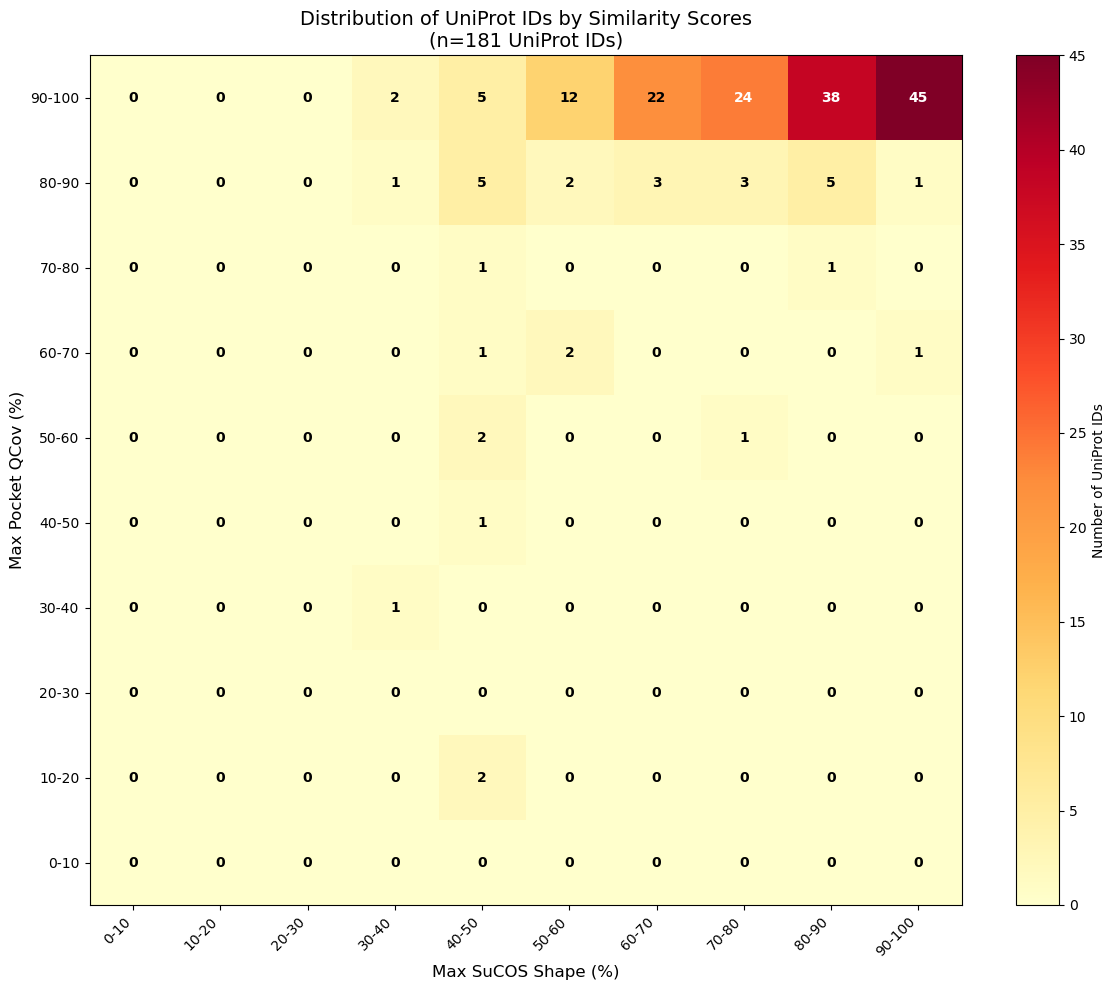


Heatmap Summary:
Total UniProt IDs: 181

Top 5 bin combinations (by count):
  Pocket QCov 90-100% & SuCOS Shape 90-100%: 45 UniProt IDs
  Pocket QCov 90-100% & SuCOS Shape 80-90%: 38 UniProt IDs
  Pocket QCov 90-100% & SuCOS Shape 70-80%: 24 UniProt IDs
  Pocket QCov 90-100% & SuCOS Shape 60-70%: 22 UniProt IDs
  Pocket QCov 90-100% & SuCOS Shape 50-60%: 12 UniProt IDs


In [48]:
# Heatmap: 2D distribution of UniProt IDs by pocket_qcov (y) and sucos_shape (x)
plt.close('all')
import matplotlib.colors as mcolors

# Define 10 bins from 0-100%
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Bin the data
summary_df['sucos_bin'] = pd.cut(summary_df['sucos_shape_max'], bins=bins, labels=bin_labels, include_lowest=True)
summary_df['pocket_bin'] = pd.cut(summary_df['pocket_qcov_max'], bins=bins, labels=bin_labels, include_lowest=True)

# Create a pivot table (count of UniProt IDs in each bin combination)
heatmap_data = summary_df.groupby(['pocket_bin', 'sucos_bin']).size().unstack(fill_value=0)

# Reindex to ensure all bins are present (even if empty)
heatmap_data = heatmap_data.reindex(index=bin_labels, columns=bin_labels, fill_value=0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Use imshow for the heatmap
im = ax.imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto', origin='lower')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Number of UniProt IDs')

# Set tick labels
ax.set_xticks(range(len(bin_labels)))
ax.set_xticklabels(bin_labels, rotation=45, ha='right')
ax.set_yticks(range(len(bin_labels)))
ax.set_yticklabels(bin_labels)

# Add labels
ax.set_xlabel('Max SuCOS Shape (%)', fontsize=12)
ax.set_ylabel('Max Pocket QCov (%)', fontsize=12)
ax.set_title(f'Distribution of UniProt IDs by Similarity Scores\n(n={len(summary_df)} UniProt IDs)', fontsize=14)

# Add text annotations showing the count in each cell
for i in range(len(bin_labels)):
    for j in range(len(bin_labels)):
        count = heatmap_data.values[i, j]
        # Choose text color based on cell value for visibility
        text_color = 'white' if count > heatmap_data.values.max() * 0.5 else 'black'
        ax.text(j, i, str(int(count)), ha='center', va='center', 
                color=text_color, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nHeatmap Summary:")
print(f"Total UniProt IDs: {heatmap_data.values.sum()}")
print(f"\nTop 5 bin combinations (by count):")
flat_data = []
for pocket_bin in bin_labels:
    for sucos_bin in bin_labels:
        count = heatmap_data.loc[pocket_bin, sucos_bin]
        if count > 0:
            flat_data.append((pocket_bin, sucos_bin, count))
flat_data.sort(key=lambda x: x[2], reverse=True)
for pocket_bin, sucos_bin, count in flat_data[:5]:
    print(f"  Pocket QCov {pocket_bin}% & SuCOS Shape {sucos_bin}%: {count} UniProt IDs")